In [798]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
loands=pd.read_csv("loan.csv")

loands["int_rate"]=[x[0:len(x)-1] for x in loands["int_rate"]]
loands["int_rate"]=loands["int_rate"].astype(float)
loands["monthly_inc"]=loands["annual_inc"]/12
#loands["netcash_monthly"]=(loands["monthly_inc"]-loands["revol_bal"])*100/(loands["monthly_inc"])
loands["netcash_monthly"]=(loands["monthly_inc"]-loands["installment"]-(loands["monthly_inc"]*loands["dti"])/100)*100/(loands["monthly_inc"])
loands2=loands[~(loands["emp_length"].isna())]
loands2=loands2[["loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","monthly_inc","netcash_monthly","verification_status","issue_d","loan_status","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","last_pymnt_d","last_credit_pull_d","chargeoff_within_12_mths"]]

date3=[]
from datetime import datetime
for date1 in loands2["issue_d"]:
    date2=datetime.strptime(date1,"%b-%y")
    #date4=date2.strftime("%d/%b/%Y")
    date3.append(date2)

loands2["date"]=date3
loands2["month"]=pd.DatetimeIndex(loands2["date"]).month
loands2["year"]=pd.DatetimeIndex(loands2["date"]).year
#loands2["netcash_monthly"]

In [802]:
#loands2["emp_length1"]=loands2["emp_length"].replace(" years","",regex=True)
#loands2["emp_length1"]=loands2["emp_length1"].replace(" year","",regex=True)
#loands2["emp_length1"]=loands2["emp_length1"].replace("< ","",regex=True)
loands2["emp_length1"]


0        10+
1          1
2        10+
3        10+
4          1
        ... 
39712      4
39713      3
39714      1
39715      1
39716      1
Name: emp_length1, Length: 38642, dtype: object

In [803]:
emp_length=[]
for yrs in loands2["emp_length1"]:
    #print(len(yrs))
    if "+" in yrs:
        emp_length.append(yrs[:len(yrs)-1])
        #print(yrs[:len(yrs)-1])
    else:
        emp_length.append(yrs)
        #print(yrs)
loands2["emp_length1"]=emp_length
loands2["emp_length1"]=loands2["emp_length1"].astype(int)
print(loands2["emp_length1"])
#print(len(loanfp),len(loancoff),len(loanNcur))
#print(len(loands))

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length1, Length: 38642, dtype: int32


In [804]:
#loands2["emp_exper"]=["low" if x <=1 else "med" if x >1 & x<=5 else "high" if x>5 & x<10 else "vhigh" for x in loands2["emp_length1"]]
loands2["emp_length1"]
emp_exper=[]
for x in loands2["emp_length1"]:
    if (x <=2):
        emp_exper.append("beginner")
    elif (x>2) & (x<=5):
        emp_exper.append("junior")
    elif (x>5) & (x<10):
        emp_exper.append("senior")
    else:
        emp_exper.append("vsenior")
        
loands2["emp_exper"]=emp_exper
loands2["emp_exper"]

0         vsenior
1        beginner
2         vsenior
3         vsenior
4        beginner
           ...   
39712      junior
39713      junior
39714    beginner
39715    beginner
39716    beginner
Name: emp_exper, Length: 38642, dtype: object

count    37544.000000
mean        80.178723
std          8.206329
min         57.037106
25%         74.223351
50%         80.233988
75%         86.340599
max         99.956432
Name: netcash_monthly, dtype: float64

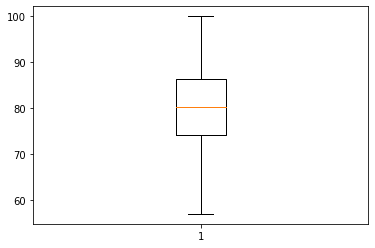

In [808]:
loancoff=loands2[loands2["loan_status"]=="Charged Off"]
loanfp=loands2[loands2["loan_status"]=="Fully Paid"]
loanNcur=loands2[loands2["loan_status"]!="Current"]
loanNcur=loanNcur[loanNcur["netcash_monthly"]>-500]
loanNV=loanNcur[(loanNcur["verification_status"]!="Verified") & (loanNcur["verification_status"]!="Source Verified")]
loanSV=loanNcur[(loanNcur["verification_status"]!="Verified") & (loanNcur["verification_status"]!="Not Verified")]
loanV=loanNcur[(loanNcur["verification_status"]=="Verified")]

loan_beg=loanNcur[loanNcur["emp_exper"]=="beginner"]
loan_jun=loanNcur[loanNcur["emp_exper"]=="junior"]
loan_sen=loanNcur[loanNcur["emp_exper"]=="senior"]
loan_vsen=loanNcur[loanNcur["emp_exper"]=="vsenior"]

loan36_beg=loan_beg[loan_beg["term"]==" 36 months"]
loan36_jun=loan_jun[loan_jun["term"]==" 36 months"]
loan36_sen=loan_sen[loan_sen["term"]==" 36 months"]
loan36_vsen=loan_vsen[loan_vsen["term"]==" 36 months"]

loan60_beg=loan_beg[loan_beg["term"]==" 60 months"]
loan60_jun=loan_jun[loan_jun["term"]==" 60 months"]
loan60_sen=loan_sen[loan_sen["term"]==" 60 months"]
loan60_vsen=loan_vsen[loan_vsen["term"]==" 60 months"]

loanNVCoff=loanNV[loanNV["loan_status"]=="Charged Off"]
loanNVFp=loanNV[loanNV["loan_status"]=="Fully Paid"]

loanSVCoff=loanSV[loanSV["loan_status"]=="Charged Off"]
loanSVFp=loanSV[loanSV["loan_status"]=="Fully Paid"]

loanVCoff=loanV[loanV["loan_status"]=="Charged Off"]
loanVFp=loanV[loanV["loan_status"]=="Fully Paid"]

loanNV_beg=loanNV[loanNV["emp_exper"]=="beginner"]
loanNV_jun=loanNV[loanNV["emp_exper"]=="junior"]
loanNV_sen=loanNV[loanNV["emp_exper"]=="senior"]
loanNV_vsen=loanNV[loanNV["emp_exper"]=="vsenior"]

loanSV_beg=loanSV[loanSV["emp_exper"]=="beginner"]
loanSV_jun=loanSV[loanSV["emp_exper"]=="junior"]
loanSV_sen=loanSV[loanSV["emp_exper"]=="senior"]
loanSV_vsen=loanSV[loanSV["emp_exper"]=="vsenior"]

loanV_beg=loanV[loanV["emp_exper"]=="beginner"]
loanV_jun=loanV[loanV["emp_exper"]=="junior"]
loanV_sen=loanV[loanV["emp_exper"]=="senior"]
loanV_vsen=loanV[loanV["emp_exper"]=="vsenior"]

loanSVCoff_beg=loanSV[(loanSV["loan_status"]=="Charged Off") & (loanSV["emp_exper"]=="beginner")]
loanNVCoff_beg=loanNV[(loanNV["loan_status"]=="Charged Off") & (loanNV["emp_exper"]=="beginner")]
loanVCoff_beg=loanV[(loanV["loan_status"]=="Charged Off") & (loanV["emp_exper"]=="beginner")]

loanSVCoff_jun=loanSV[(loanSV["loan_status"]=="Charged Off") & (loanSV["emp_exper"]=="junior")]
loanNVCoff_jun=loanNV[(loanNV["loan_status"]=="Charged Off") & (loanNV["emp_exper"]=="junior")]
loanVCoff_jun=loanV[(loanV["loan_status"]=="Charged Off") & (loanV["emp_exper"]=="junior")]

loanSVCoff_sen=loanSV[(loanSV["loan_status"]=="Charged Off") & (loanSV["emp_exper"]=="senior")]
loanNVCoff_sen=loanNV[(loanNV["loan_status"]=="Charged Off") & (loanNV["emp_exper"]=="senior")]
loanVCoff_sen=loanV[(loanV["loan_status"]=="Charged Off") & (loanV["emp_exper"]=="senior")]

loanSVCoff_vsen=loanSV[(loanSV["loan_status"]=="Charged Off") & (loanSV["emp_exper"]=="vsenior")]
loanNVCoff_vsen=loanNV[(loanNV["loan_status"]=="Charged Off") & (loanNV["emp_exper"]=="vsenior")]
loanVCoff_vsen=loanV[(loanV["loan_status"]=="Charged Off") & (loanV["emp_exper"]=="vsenior")]

loan_begcoff=loan_beg[loan_beg["loan_status"]=="Charged Off"]
loan_juncoff=loan_jun[loan_jun["loan_status"]=="Charged Off"]
loan_sencoff=loan_sen[loan_sen["loan_status"]=="Charged Off"]
loan_vsencoff=loan_vsen[loan_vsen["loan_status"]=="Charged Off"]

loan36_begcoff=loan36_beg[loan36_beg["loan_status"]=="Charged Off"]
loan36_juncoff=loan36_jun[loan36_jun["loan_status"]=="Charged Off"]
loan36_sencoff=loan36_sen[loan36_sen["loan_status"]=="Charged Off"]
loan36_vsencoff=loan36_vsen[loan36_vsen["loan_status"]=="Charged Off"]

loan60_begcoff=loan60_beg[loan60_beg["loan_status"]=="Charged Off"]
loan60_juncoff=loan60_jun[loan60_jun["loan_status"]=="Charged Off"]
loan60_sencoff=loan60_sen[loan60_sen["loan_status"]=="Charged Off"]
loan60_vsencoff=loan60_vsen[loan60_vsen["loan_status"]=="Charged Off"]

loan_60M=loanNcur[loanNcur["term"]==" 60 months"]
loan_36M=loanNcur[loanNcur["term"]==" 36 months"]

loan_60Mcoff=loan_60M[loan_60M["loan_status"]=="Charged Off"]
loan_36Mcoff=loan_60M[loan_60M["loan_status"]=="Charged Off"]
plt.boxplot(loanNcur["netcash_monthly"])
plt.show
loanNcur["netcash_monthly"].describe()

#loanNVCoff=len(loanNV[loanNV["loan_status"]=="Charged Off"]["loan_status"])*100/(len(loanNV["loan_status"]))
#loanVCoff=len(loanV[loanV["loan_status"]=="Charged Off"]["loan_status"])*100/len(loanV["loan_status"])
#print("NonVerified-ChargedOff :",len(loanNV[loanNV["loan_status"]=="Charged Off"]["loan_status"]),"NonVerified-Total :",len(loanNV["loan_status"]))
#print("Verified-ChargedOff :",len(loanV[loanV["loan_status"]=="Charged Off"]["loan_status"]),"Verified-Total :",len(loanV["loan_status"]))
#print("NonVerified-ChargedOff % :",round(loanNVCoff),"Verified-ChargedOff %:",round(loanVCoff))

In [809]:
#loanNVCoff.groupby(["emp_exper"], as_index=False).count()
#loanNcur["emp_exper"]
#print(len(loanNVCoff["loan_status"]),len(loanSVCoff["loan_status"]),len(loanVCoff["loan_status"]))
#print(len(loanNVFp["loan_status"]),len(loanSVFp["loan_status"]),len(loanVFp["loan_status"]))
loanNVCoffper=len(loanNVCoff["loan_status"])*100/len(loanNV["loan_status"])
loanSVCoffper=len(loanSVCoff["loan_status"])*100/len(loanSV["loan_status"])
loanVCoffper=len(loanVCoff["loan_status"])*100/len(loanV["loan_status"])
loanNVFPper=100-loanNVCoffper
loanSVFPper=100-loanSVCoffper
loanVFPper=100-loanVCoffper

loanNVCoffbegper=len(loanNVCoff_beg["loan_status"])*100/len(loanNV_beg["loan_status"])
loanSVCoffbegper=len(loanSVCoff_beg["loan_status"])*100/len(loanSV_beg["loan_status"])
loanVCoffbegper=len(loanVCoff_beg["loan_status"])*100/len(loanV_beg["loan_status"])
loanNVFPbegper=100-loanNVCoffbegper
loanSVFPbegper=100-loanSVCoffbegper
loanVFPbegper=100-loanVCoffbegper

loanNVCoffjunper=len(loanNVCoff_jun["loan_status"])*100/len(loanNV_jun["loan_status"])
loanSVCoffjunper=len(loanSVCoff_jun["loan_status"])*100/len(loanSV_jun["loan_status"])
loanVCoffjunper=len(loanVCoff_jun["loan_status"])*100/len(loanV_jun["loan_status"])
loanNVFPjunper=100-loanNVCoffjunper
loanSVFPjunper=100-loanSVCoffjunper
loanVFPjunper=100-loanVCoffjunper

loanNVCoffsenper=len(loanNVCoff_sen["loan_status"])*100/len(loanNV_sen["loan_status"])
loanSVCoffsenper=len(loanSVCoff_sen["loan_status"])*100/len(loanSV_sen["loan_status"])
loanVCoffsenper=len(loanVCoff_sen["loan_status"])*100/len(loanV_sen["loan_status"])
loanNVFPsenper=100-loanNVCoffsenper
loanSVFPsenper=100-loanSVCoffsenper
loanVFPsenper=100-loanVCoffsenper

loanNVCoffvsenper=len(loanNVCoff_vsen["loan_status"])*100/len(loanNV_vsen["loan_status"])
loanSVCoffvsenper=len(loanSVCoff_vsen["loan_status"])*100/len(loanSV_vsen["loan_status"])
loanVCoffvsenper=len(loanVCoff_vsen["loan_status"])*100/len(loanV_vsen["loan_status"])
loanNVFPvsenper=100-loanNVCoffvsenper
loanSVFPvsenper=100-loanSVCoffvsenper
loanVFPvsenper=100-loanVCoffvsenper

loanbegcoffper=len(loan_begcoff["loan_status"])*100/len(loan_beg["loan_status"])
loanjuncoffper=len(loan_juncoff["loan_status"])*100/len(loan_jun["loan_status"])
loansencoffper=len(loan_sencoff["loan_status"])*100/len(loan_sen["loan_status"])
loanvsencoffper=len(loan_vsencoff["loan_status"])*100/len(loan_vsen["loan_status"])
loanbegfpper=100-loanbegcoffper
loanjunfpper=100-loanjuncoffper
loansenfpper=100-loansencoffper
loanvsenfpper=100-loanvsencoffper

loan36begcoffper=len(loan36_begcoff["loan_status"])*100/len(loan36_beg["loan_status"])
loan36juncoffper=len(loan36_juncoff["loan_status"])*100/len(loan36_jun["loan_status"])
loan36sencoffper=len(loan36_sencoff["loan_status"])*100/len(loan36_sen["loan_status"])
loan36vsencoffper=len(loan36_vsencoff["loan_status"])*100/len(loan36_vsen["loan_status"])
loan36begfpper=100-loan36begcoffper
loan36junfpper=100-loan36juncoffper
loan36senfpper=100-loan36sencoffper
loan36vsenfpper=100-loan36vsencoffper

loan60begcoffper=len(loan60_begcoff["loan_status"])*100/len(loan60_beg["loan_status"])
loan60juncoffper=len(loan60_juncoff["loan_status"])*100/len(loan60_jun["loan_status"])
loan60sencoffper=len(loan60_sencoff["loan_status"])*100/len(loan60_sen["loan_status"])
loan60vsencoffper=len(loan60_vsencoff["loan_status"])*100/len(loan60_vsen["loan_status"])
loan60begfpper=100-loan60begcoffper
loan60junfpper=100-loan60juncoffper
loan60senfpper=100-loan60sencoffper
loan60vsenfpper=100-loan60vsencoffper

loan_60Mcoffper=len(loan_60Mcoff["loan_status"])*100/len(loan_60M["loan_status"])
loan_36Mcoffper=len(loan_36Mcoff["loan_status"])*100/len(loan_36M["loan_status"])
loan_60Mfpper=100-loan_60Mcoffper
loan_36Mfpper=100-loan_36Mcoffper

loanbegcoffper
#print(len(loanNVCoff["loan_status"])+len(loanSVCoff["loan_status"])+len(loanVCoff["loan_status"]))
#print(len(loanNVFp["loan_status"])+len(loanSVFp["loan_status"])+len(loanVFp["loan_status"]))
print(loan36begcoffper,loan36begfpper)
print(loan36juncoffper,loan36junfpper)
print(loan36sencoffper,loan36senfpper)
print(loan36vsencoffper,loan36vsenfpper)

print(loan60begcoffper,loan60begfpper)
print(loan60juncoffper,loan60junfpper)
print(loan60sencoffper,loan60senfpper)
print(loan60vsencoffper,loan60vsenfpper)

11.233980983877636 88.76601901612236
10.770960889666375 89.22903911033363
10.358565737051793 89.64143426294821
10.789518753211166 89.21048124678883
25.087260034904013 74.912739965096
24.086444007858546 75.91355599214145
24.675324675324674 75.32467532467533
26.462816157040393 73.5371838429596


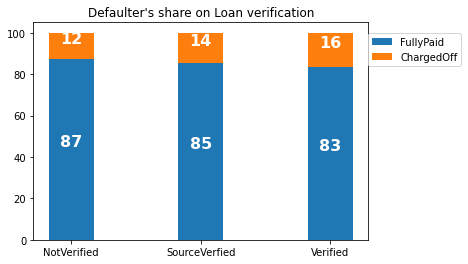

In [899]:
#loanVCoff.groupby(["emp_exper"],as_index=False)["loan_status"].count()
xlabels=["NotVerified","SourceVerfied","Verified"]
xCoff=[loanNVCoffper,loanSVCoffper,loanVCoffper]
xFP=[loanNVFPper,loanSVFPper,loanVFPper]
fig, ax1=plt.subplots()
width=0.35
ax2=ax1.bar(xlabels,xFP,width,label="FullyPaid")
ax3=ax1.bar(xlabels,xCoff,width,bottom=xFP,label="ChargedOff")
ax1.legend(loc=(1,.8))

for r1, r2 in zip(ax2, ax3):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")

plt.title("Defaulter's share on Loan verification")
plt.show()

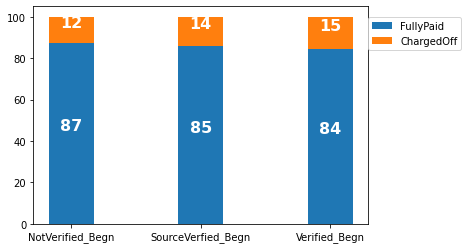

In [812]:
xlabels1=["NotVerified_Begn","SourceVerfied_Begn","Verified_Begn"]
xCoff1=[loanNVCoffbegper,loanSVCoffbegper,loanVCoffbegper]
xFP1=[loanNVFPbegper,loanSVFPbegper,loanVFPbegper]
fig, ax4=plt.subplots()
width=0.35
ax5=ax4.bar(xlabels1,xFP1,width,label="FullyPaid")
ax6=ax4.bar(xlabels1,xCoff1,width,bottom=xFP1,label="ChargedOff")
ax4.legend(loc=(1,0.8))

for r3, r4 in zip(ax5, ax6):
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r3.get_x() + r3.get_width() / 2., h3 / 2., "%d" % h3, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r4.get_x() + r4.get_width() / 2., h3 + h4 / 2., "%d" % h4, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")


plt.show()

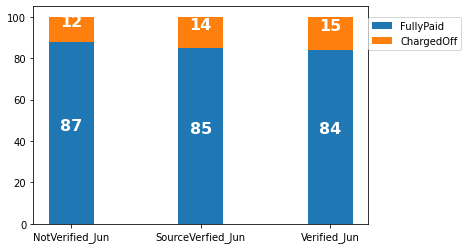

In [813]:
xlabels2=["NotVerified_Jun","SourceVerfied_Jun","Verified_Jun"]
xCoff2=[loanNVCoffjunper,loanSVCoffjunper,loanVCoffjunper]
xFP2=[loanNVFPjunper,loanSVFPjunper,loanVFPjunper]
fig, ax7=plt.subplots()
width=0.35
ax8=ax7.bar(xlabels2,xFP2,width,label="FullyPaid")
ax9=ax7.bar(xlabels2,xCoff2,width,bottom=xFP2,label="ChargedOff")
ax7.legend(loc=(1,0.8))

for r5, r6 in zip(ax8, ax9):
    h5 = r5.get_height()
    h6 = r6.get_height()
    plt.text(r5.get_x() + r5.get_width() / 2., h5 / 2., "%d" % h5, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r6.get_x() + r6.get_width() / 2., h5 + h6 / 2., "%d" % h6, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")

plt.show()

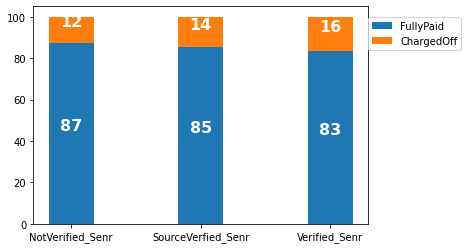

In [814]:
xlabels3=["NotVerified_Senr","SourceVerfied_Senr","Verified_Senr"]
xCoff3=[loanNVCoffsenper,loanSVCoffsenper,loanVCoffsenper]
xFP3=[loanNVFPsenper,loanSVFPsenper,loanVFPsenper]
fig, ax10=plt.subplots()
width=0.35
ax11=ax10.bar(xlabels3,xFP3,width,label="FullyPaid")
ax12=ax10.bar(xlabels3,xCoff3,width,bottom=xFP3,label="ChargedOff")
ax10.legend(loc=(1,0.8))

for r7, r8 in zip(ax11, ax12):
    h7 = r7.get_height()
    h8 = r8.get_height()
    plt.text(r7.get_x() + r7.get_width() / 2., h7 / 2., "%d" % h7, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r8.get_x() + r8.get_width() / 2., h7 + h8 / 2., "%d" % h8, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")

plt.show()

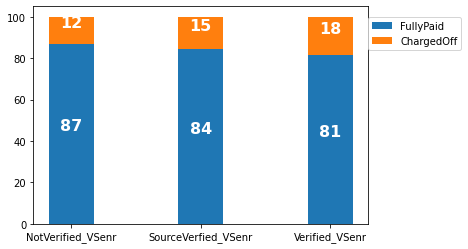

In [815]:
xlabels4=["NotVerified_VSenr","SourceVerfied_VSenr","Verified_VSenr"]
xCoff4=[loanNVCoffvsenper,loanSVCoffvsenper,loanVCoffvsenper]
xFP4=[loanNVFPvsenper,loanSVFPvsenper,loanVFPvsenper]
fig, ax13=plt.subplots()
width=0.35
ax14=ax13.bar(xlabels4,xFP4,width,label="FullyPaid")
ax15=ax13.bar(xlabels4,xCoff4,width,bottom=xFP4,label="ChargedOff")
ax13.legend(loc=(1,0.8))

for r9, r10 in zip(ax14, ax15):
    h9 = r9.get_height()
    h10 = r10.get_height()
    plt.text(r9.get_x() + r9.get_width() / 2., h9 / 2., "%d" % h9, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r10.get_x() + r10.get_width() / 2., h9 + h10 / 2., "%d" % h10, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")

plt.show()

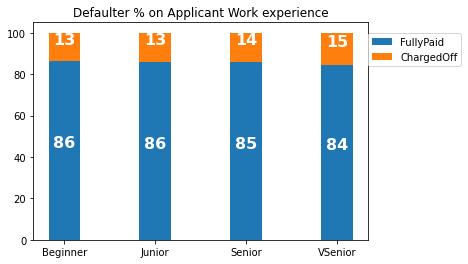

In [900]:
xlabels5=["Beginner","Junior","Senior","VSenior"]
xCoff5=[loanbegcoffper,loanjuncoffper,loansencoffper,loanvsencoffper]
xFP5=[loanbegfpper,loanjunfpper,loansenfpper,loanvsenfpper]
fig, ax16=plt.subplots()
width=0.35
ax17=ax16.bar(xlabels5,xFP5,width,label="FullyPaid")
ax18=ax16.bar(xlabels5,xCoff5,width,bottom=xFP5,label="ChargedOff")
ax16.legend(loc=(1,0.8))

for r11, r12 in zip(ax17, ax18):
    h11 = r11.get_height()
    h12 = r12.get_height()
    plt.text(r11.get_x() + r11.get_width() / 2., h11 / 2., "%d" % h11, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r12.get_x() + r12.get_width() / 2., h11 + h12 / 2., "%d" % h12, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
plt.title("Defaulter % on Applicant Work experience")
plt.show()

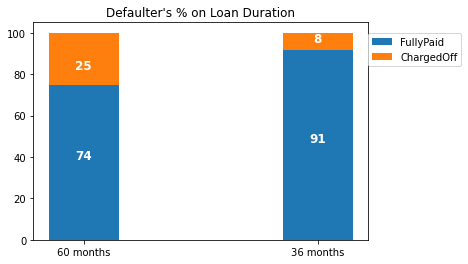

In [901]:
xlabels6=["60 months","36 months"]
xCoff6=[loan_60Mcoffper,loan_36Mcoffper]
xFP6=[loan_60Mfpper,loan_36Mfpper]
fig, ax19=plt.subplots()
width=0.3
ax20=ax19.bar(xlabels6,xFP6,width,label="FullyPaid")
ax21=ax19.bar(xlabels6,xCoff6,width,bottom=xFP6,label="ChargedOff")
ax19.legend(loc=(1,0.8))

for r13, r14 in zip(ax20, ax21):
    h13 = r13.get_height()
    h14 = r14.get_height()
    plt.text(r13.get_x() + r13.get_width() / 2., h13 / 2., "%d" % h13, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
    plt.text(r14.get_x() + r14.get_width() / 2., h13 + h14 / 4., "%d" % h14, ha="center", va="bottom", color="white", fontsize=12, fontweight="bold")
plt.title("Defaulter's % on Loan Duration")
plt.show()

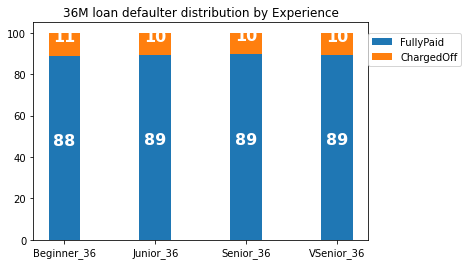

In [904]:
xlabels7=["Beginner_36","Junior_36","Senior_36","VSenior_36"]
xCoff7=[loan36begcoffper,loan36juncoffper,loan36sencoffper,loan36vsencoffper]
xFP7=[loan36begfpper,loan36junfpper,loan36senfpper,loan36vsenfpper]
fig, ax22=plt.subplots()
width=0.35
ax23=ax22.bar(xlabels7,xFP7,width,label="FullyPaid")
ax24=ax22.bar(xlabels7,xCoff7,width,bottom=xFP7,label="ChargedOff")
ax22.legend(loc=(1,0.8))

for r15, r16 in zip(ax23, ax24):
    h15 = r15.get_height()
    h16 = r16.get_height()
    plt.text(r15.get_x() + r15.get_width() / 2., h15 / 2., "%d" % h15, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r16.get_x() + r16.get_width() / 2., h15 + h16 / 2., "%d" % h16, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
plt.title("36M loan defaulter distribution by Experience")
plt.show()

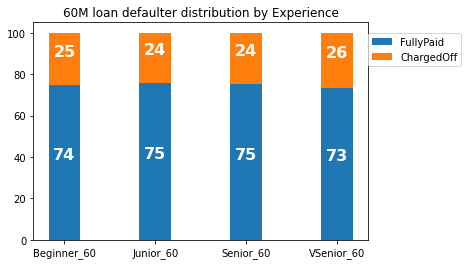

In [905]:
xlabels8=["Beginner_60","Junior_60","Senior_60","VSenior_60"]
xCoff8=[loan60begcoffper,loan60juncoffper,loan60sencoffper,loan60vsencoffper]
xFP8=[loan60begfpper,loan60junfpper,loan60senfpper,loan60vsenfpper]
fig, ax25=plt.subplots()
width=0.35
ax26=ax25.bar(xlabels8,xFP8,width,label="FullyPaid")
ax27=ax25.bar(xlabels8,xCoff8,width,bottom=xFP8,label="ChargedOff")
ax25.legend(loc=(1,0.8))

for r17, r18 in zip(ax26, ax27):
    h17 = r17.get_height()
    h18 = r18.get_height()
    plt.text(r17.get_x() + r17.get_width() / 2., h17 / 2., "%d" % h17, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
    plt.text(r18.get_x() + r18.get_width() / 2., h17 + h18 / 2., "%d" % h18, ha="center", va="bottom", color="white", fontsize=16, fontweight="bold")
plt.title("60M loan defaulter distribution by Experience")
plt.show()

C:\Users\e880156\AppData\Local\Temp/ipykernel_11704/3571550103.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax28.set_xticklabels(xlabels9,rotation=90)


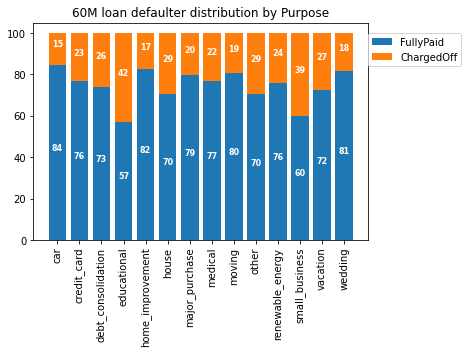

In [902]:
#loan60_begcoff.loc[:,["dti","netcash_monthly"]].head(10)
lb60coff=loan_60M[loan_60M["loan_status"]=="Charged Off"].groupby(["purpose"],as_index=False)["loan_status"].count()
lb36coff=loan_36M[loan_36M["loan_status"]=="Charged Off"].groupby(["purpose"],as_index=False)["loan_status"].count()
lb60tot=loan_60M.groupby(["purpose"],as_index=False)["loan_status"].count()
lb36tot=loan_36M.groupby(["purpose"],as_index=False)["loan_status"].count()
#lbfp=loan_60M[loan_60M["loan_status"]!="Charged Off"].groupby("purpose")["dti","netcash_monthly"].mean()
lb60coffper=lb60coff["loan_status"]*100/lb60tot["loan_status"]
lb60fpper=100-lb60coffper
lb36coffper=lb36coff["loan_status"]*100/lb36tot["loan_status"]
lb36fpper=100-lb36coffper
lb60coffper
#loan_60M[loan_60M["loan_status"]=="Charged Off"]

xlabels9=lb60coff["purpose"]
xCoff9=lb60coffper
xFP9=lb60fpper
fig, ax28=plt.subplots()
ax28.set_xticklabels(xlabels9,rotation=90)
width=0.80
ax29=ax28.bar(xlabels9,xFP9,width,label="FullyPaid")
ax30=ax28.bar(xlabels9,xCoff9,width,bottom=xFP9,label="ChargedOff")
ax28.legend(loc=(1,0.8))

for r19, r20 in zip(ax29, ax30):
    h19 = r19.get_height()
    h20 = r20.get_height()
    plt.text(r19.get_x() + r19.get_width() / 2., h19 / 2., "%d" % h19, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
    plt.text(r20.get_x() + r20.get_width() / 2., h19 + h20 / 2., "%d" % h20, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
plt.title("60M loan defaulter distribution by Purpose")
plt.show()

C:\Users\e880156\AppData\Local\Temp/ipykernel_11704/4175694791.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax28.set_xticklabels(xlabels9,rotation=90)


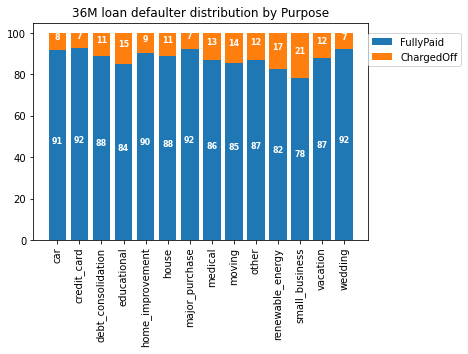

In [903]:
xlabels9=lb36coff["purpose"]
xCoff9=lb36coffper
xFP9=lb36fpper
fig, ax28=plt.subplots()
ax28.set_xticklabels(xlabels9,rotation=90)
width=0.80
ax29=ax28.bar(xlabels9,xFP9,width,label="FullyPaid")
ax30=ax28.bar(xlabels9,xCoff9,width,bottom=xFP9,label="ChargedOff")
ax28.legend(loc=(1,0.8))

for r19, r20 in zip(ax29, ax30):
    h19 = r19.get_height()
    h20 = r20.get_height()
    plt.text(r19.get_x() + r19.get_width() / 2., h19 / 2., "%d" % h19, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
    plt.text(r20.get_x() + r20.get_width() / 2., h19 + h20 / 2., "%d" % h20, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
plt.title("36M loan defaulter distribution by Purpose")
plt.show()

In [825]:
loan60M_educoff=loan_60M[(loan_60M["purpose"]=="educational") & (loan_60M["loan_status"]=="Charged Off")].groupby("emp_exper",as_index=False)["loan_status"].count()
loan60M_edutot=loan_60M[(loan_60M["purpose"]=="educational")].groupby("emp_exper",as_index=False)["loan_status"].count()
loan60M_educoffper=loan60M_educoff["loan_status"]*100/loan60M_edutot["loan_status"]
loan60M_edufpper=100-loan60M_educoffper

loan36M_educoff=loan_36M[(loan_36M["purpose"]=="educational") & (loan_36M["loan_status"]=="Charged Off")].groupby("emp_exper",as_index=False)["loan_status"].count()
loan36M_edutot=loan_36M[(loan_36M["purpose"]=="educational")].groupby("emp_exper",as_index=False)["loan_status"].count()
loan36M_educoffper=loan36M_educoff["loan_status"]*100/loan36M_edutot["loan_status"]
loan36M_edufpper=100-loan36M_educoffper

#loan_60M[(loan_60M["purpose"]=="educational")& (loan_60M["emp_exper"]=="vsenior") & (loan_60M["loan_status"]=="Charged Off")].iloc[0:25,0
loan60M_edufpper[0:3]

0    50.000000
1    66.666667
2    50.000000
Name: loan_status, dtype: float64

C:\Users\e880156\AppData\Local\Temp/ipykernel_11704/3327463628.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax31.set_xticklabels(xlabels10,rotation=90)


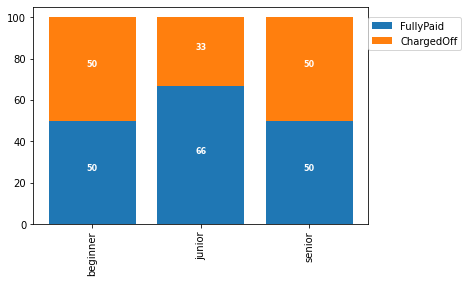

In [827]:
xlabels10=loan60M_educoff["emp_exper"]
xCoff10=loan60M_educoffper[0:3]
xFP10=loan60M_edufpper[0:3]
fig,ax31=plt.subplots()
ax31.set_xticklabels(xlabels10,rotation=90)
width=0.80
ax32=ax31.bar(xlabels10,xFP10,width,label="FullyPaid")
ax33=ax31.bar(xlabels10,xCoff10,width,bottom=xFP10,label="ChargedOff")
ax31.legend(loc=(1,0.8))

for r21, r22 in zip(ax32, ax33):
    h21 = r21.get_height()
    h22 = r22.get_height()
    plt.text(r21.get_x() + r21.get_width() / 2., h21 / 2., "%d" % h21, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
    plt.text(r22.get_x() + r22.get_width() / 2., h21 + h22 / 2., "%d" % h22, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")

plt.show()

C:\Users\e880156\AppData\Local\Temp/ipykernel_11704/3889796350.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax34.set_xticklabels(xlabels11,rotation=90)


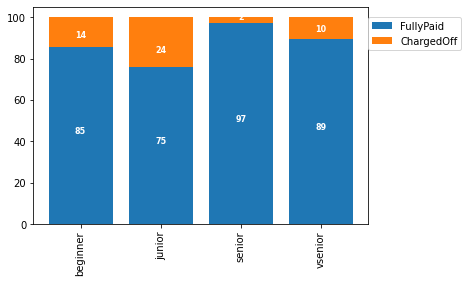

In [832]:
xlabels11=loan36M_educoff["emp_exper"]
xCoff11=loan36M_educoffper
xFP11=loan36M_edufpper
fig, ax34=plt.subplots()
ax34.set_xticklabels(xlabels11,rotation=90)
width=0.80
ax35=ax34.bar(xlabels11,xFP11,width,label="FullyPaid")
ax36=ax34.bar(xlabels11,xCoff11,width,bottom=xFP11,label="ChargedOff")
ax34.legend(loc=(1,0.8))

for r23, r24 in zip(ax35, ax36):
    h23 = r23.get_height()
    h24 = r24.get_height()
    plt.text(r23.get_x() + r23.get_width() / 2., h23 / 2., "%d" % h23, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")
    plt.text(r24.get_x() + r24.get_width() / 2., h23 + h24 / 4., "%d" % h24, ha="center", va="bottom", color="white", fontsize=8, fontweight="bold")

plt.show()

In [833]:
palette = {"Fully Paid":"tab:cyan","Charged Off":"tab:orange"}
loan36_begvac=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="beginner")]
loan60_begvac=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="beginner")]

loan36_junvac=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="junior")]
loan60_junvac=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="junior")]

loan36_senvac=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="senior")]
loan60_senvac=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenvac=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenvac=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="vsenior")]


In [834]:
loan_36M["purpose"].unique()
loan36_beg["purpose"].unique()

array(['debt_consolidation', 'medical', 'major_purchase', 'credit_card',
       'moving', 'small_business', 'other', 'house', 'home_improvement',
       'vacation', 'wedding', 'car', 'renewable_energy', 'educational'],
      dtype=object)

Text(0.5, 1.05, '  60M Vacation Loan-VSeniors')

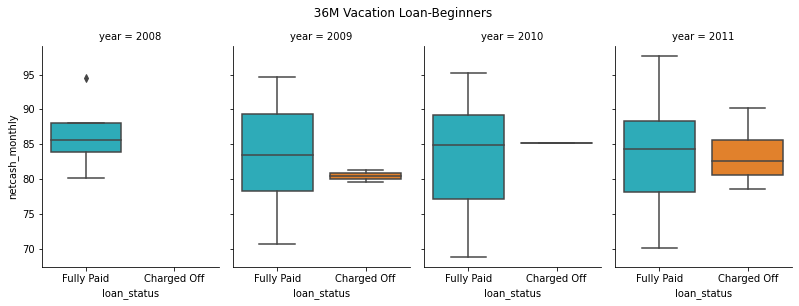

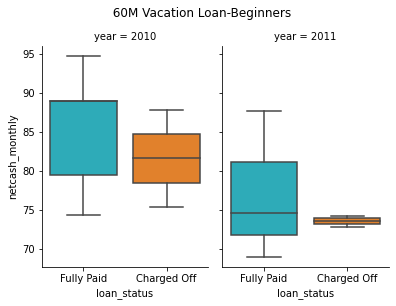

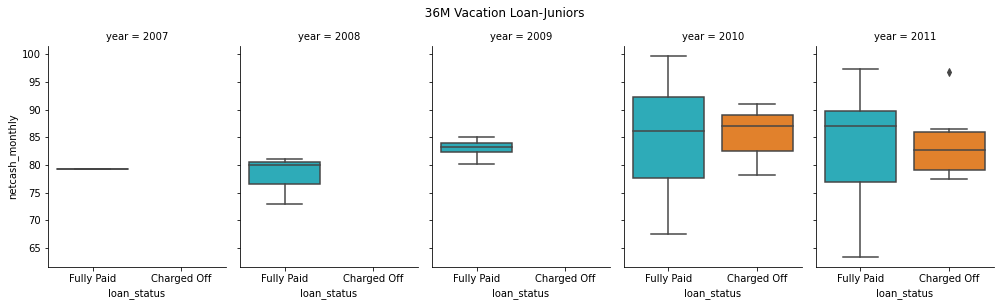

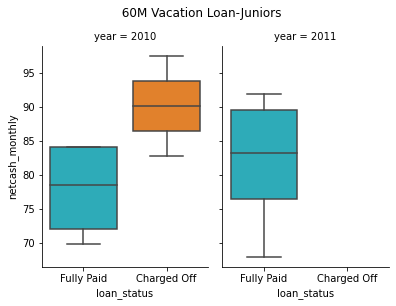

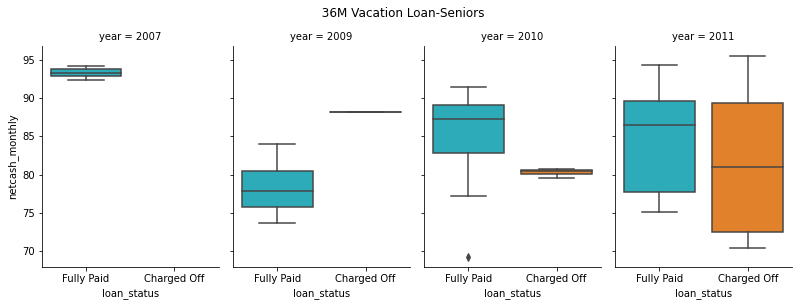

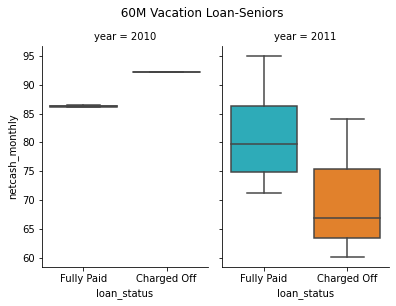

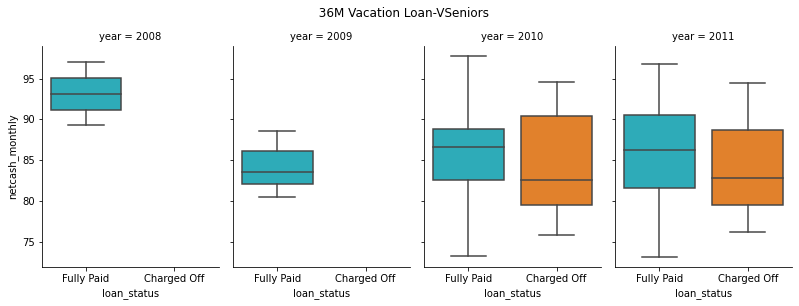

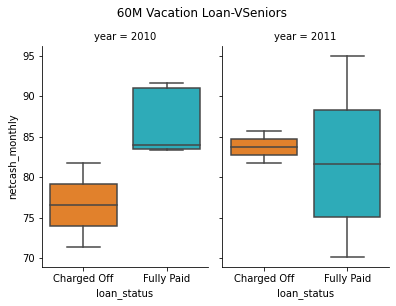

In [835]:
import seaborn as sbn
g1 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begvac, kind="box",height=4, aspect=.7,palette=palette)
g1.fig.suptitle("  36M Vacation Loan-Beginners",y=1.05)
g2=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begvac, kind="box",height=4, aspect=.7,palette=palette)
g2.fig.suptitle("  60M Vacation Loan-Beginners",y=1.05)

g3=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junvac, kind="box",height=4, aspect=.7,palette=palette)
g3.fig.suptitle("  36M Vacation Loan-Juniors",y=1.05)
g4=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junvac, kind="box",height=4, aspect=.7,palette=palette)
g4.fig.suptitle("  60M Vacation Loan-Juniors",y=1.05)

g5=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senvac, kind="box",height=4, aspect=.7,palette=palette)
g5.fig.suptitle("  36M Vacation Loan-Seniors",y=1.05)
g6=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senvac, kind="box",height=4, aspect=.7,palette=palette)
g6.fig.suptitle("  60M Vacation Loan-Seniors",y=1.05)

g7=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenvac, kind="box",height=4, aspect=.7,palette=palette)
g7.fig.suptitle("  36M Vacation Loan-VSeniors",y=1.05)
g8=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenvac, kind="box",height=4, aspect=.7,palette=palette)
g8.fig.suptitle("  60M Vacation Loan-VSeniors",y=1.05)

In [836]:
loan36_begdc=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="beginner")]
loan60_begdc=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="beginner")]

loan36_jundc=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="junior")]
loan60_jundc=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="junior")]

loan36_sendc=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="senior")]
loan60_sendc=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="senior")]

loan36_vsendc=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsendc=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M DebitConsolidation Loan-VSeniors')

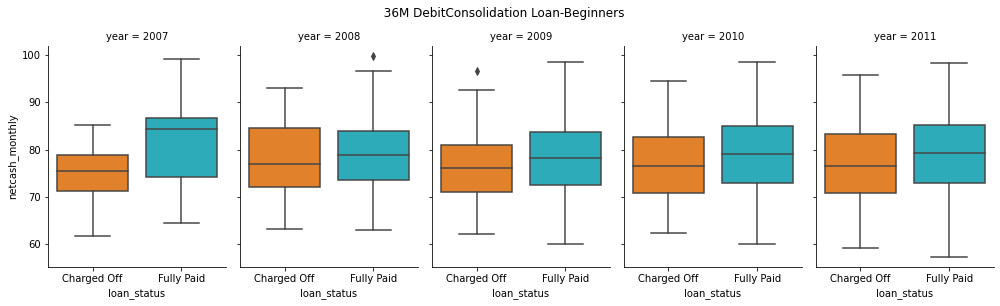

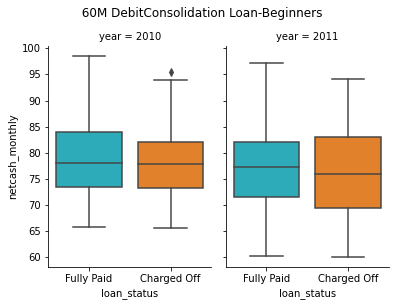

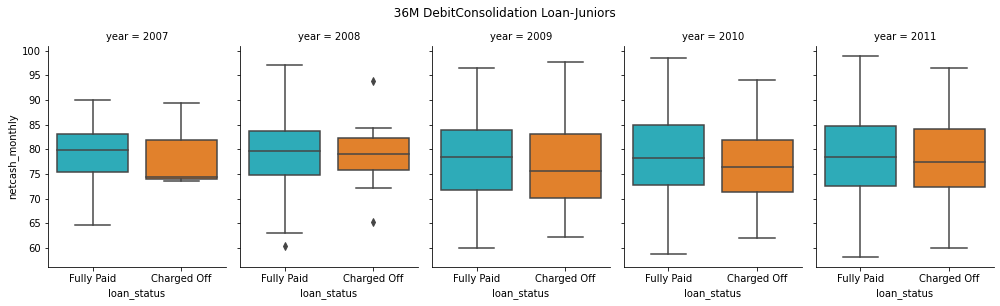

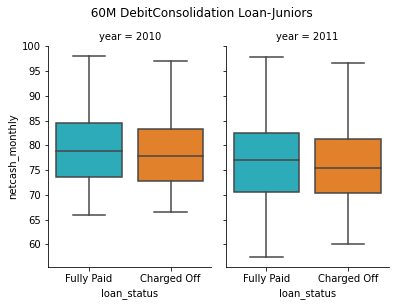

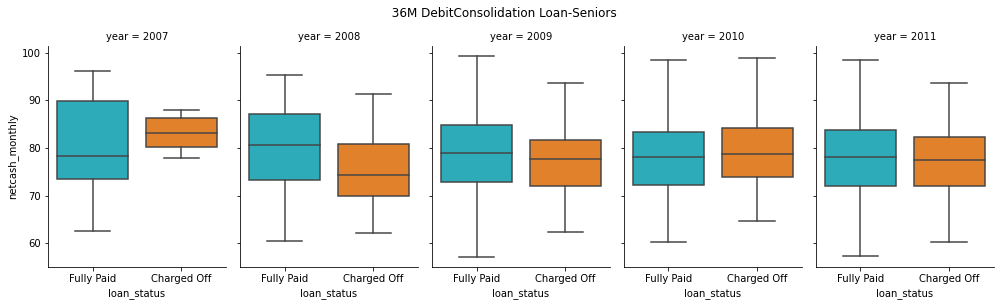

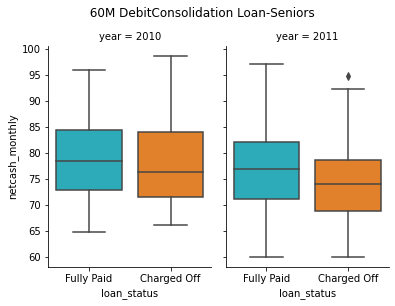

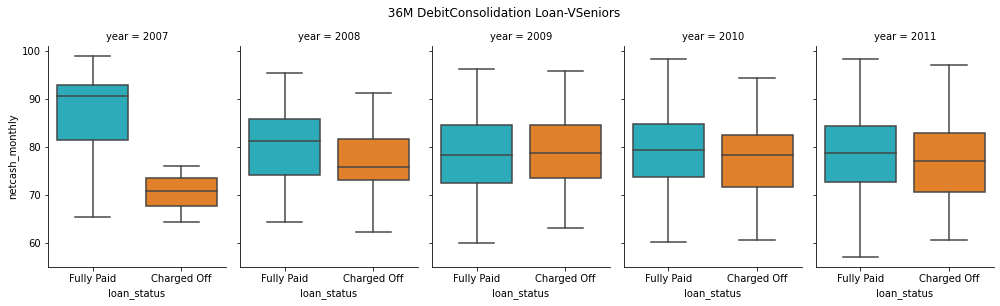

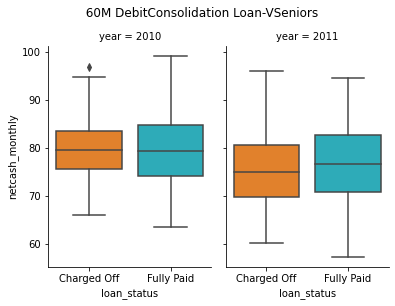

In [837]:
g11 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begdc, kind="box",height=4, aspect=.7,palette=palette)
g11.fig.suptitle("  36M DebitConsolidation Loan-Beginners",y=1.05)
g12=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begdc, kind="box",height=4, aspect=.7,palette=palette)
g12.fig.suptitle("  60M DebitConsolidation Loan-Beginners",y=1.05)

g13=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_jundc, kind="box",height=4, aspect=.7,palette=palette)
g13.fig.suptitle("  36M DebitConsolidation Loan-Juniors",y=1.05)
g14=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_jundc, kind="box",height=4, aspect=.7,palette=palette)
g14.fig.suptitle("  60M DebitConsolidation Loan-Juniors",y=1.05)

g15=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_sendc, kind="box",height=4, aspect=.7,palette=palette)
g15.fig.suptitle("  36M DebitConsolidation Loan-Seniors",y=1.05)
g16=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_sendc, kind="box",height=4, aspect=.7,palette=palette)
g16.fig.suptitle("  60M DebitConsolidation Loan-Seniors",y=1.05)

g17=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsendc, kind="box",height=4, aspect=.7,palette=palette)
g17.fig.suptitle("  36M DebitConsolidation Loan-VSeniors",y=1.05)
g18=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsendc, kind="box",height=4, aspect=.7,palette=palette)
g18.fig.suptitle("  60M DebitConsolidation Loan-VSeniors",y=1.05)

In [838]:
loan36_begwd=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="beginner")]
loan60_begwd=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="beginner")]

loan36_junwd=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="junior")]
loan60_junwd=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="junior")]

loan36_senwd=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="senior")]
loan60_senwd=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenwd=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenwd=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Wedding Loan-VSeniors')

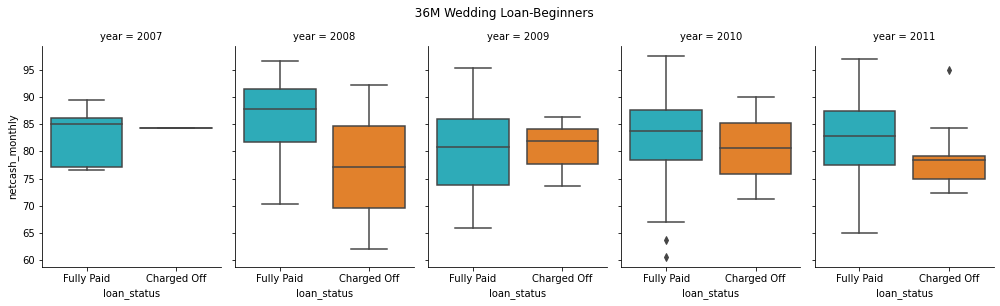

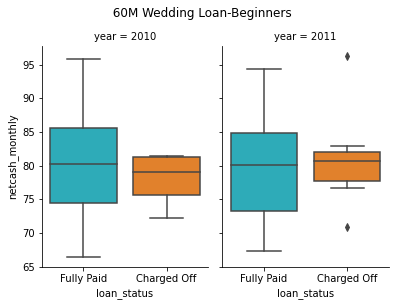

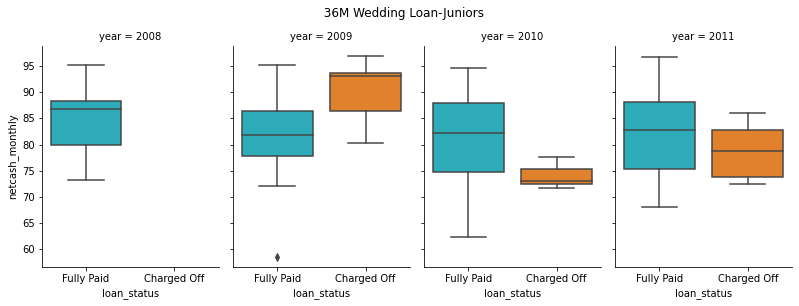

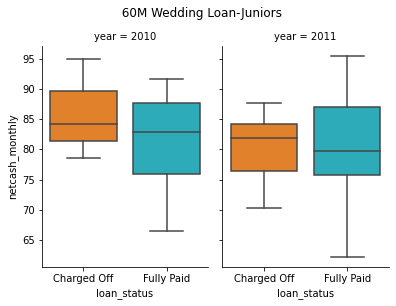

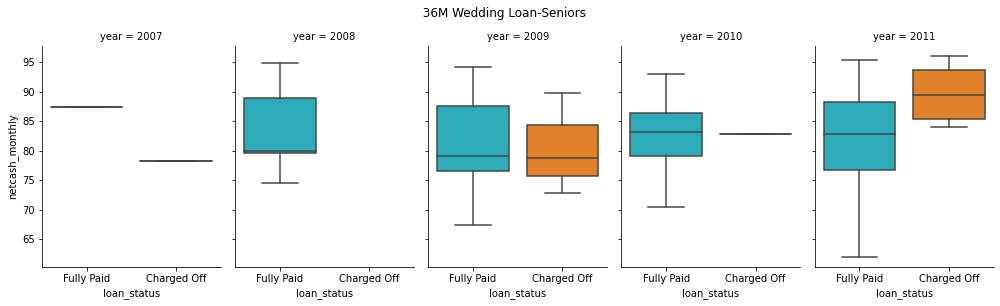

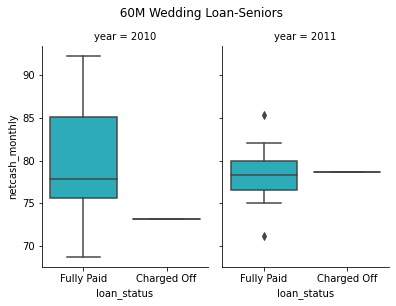

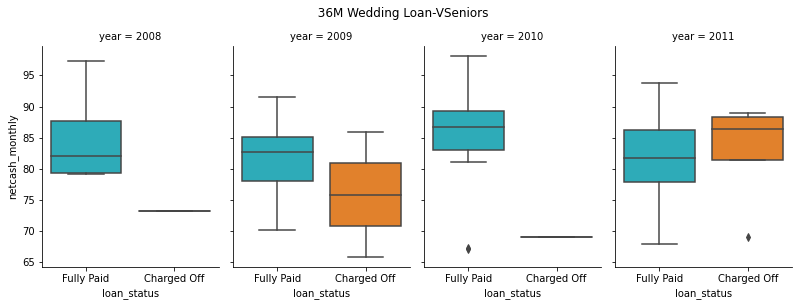

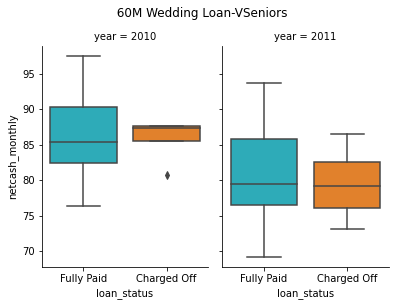

In [839]:
g21 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begwd, kind="box",height=4, aspect=.7,palette=palette)
g21.fig.suptitle("  36M Wedding Loan-Beginners",y=1.05)
g22=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begwd, kind="box",height=4, aspect=.7,palette=palette)
g22.fig.suptitle("  60M Wedding Loan-Beginners",y=1.05)

g23=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junwd, kind="box",height=4, aspect=.7,palette=palette)
g23.fig.suptitle("  36M Wedding Loan-Juniors",y=1.05)
g24=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junwd, kind="box",height=4, aspect=.7,palette=palette)
g24.fig.suptitle("  60M Wedding Loan-Juniors",y=1.05)

g25=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senwd, kind="box",height=4, aspect=.7,palette=palette)
g25.fig.suptitle("  36M Wedding Loan-Seniors",y=1.05)
g26=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senwd, kind="box",height=4, aspect=.7,palette=palette)
g26.fig.suptitle("  60M Wedding Loan-Seniors",y=1.05)

g27=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenwd, kind="box",height=4, aspect=.7,palette=palette)
g27.fig.suptitle("  36M Wedding Loan-VSeniors",y=1.05)
g28=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenwd, kind="box",height=4, aspect=.7,palette=palette)
g28.fig.suptitle("  60M Wedding Loan-VSeniors",y=1.05)

In [840]:
loan36_begcc=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="beginner")]
loan60_begcc=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="beginner")]

loan36_juncc=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="junior")]
loan60_juncc=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="junior")]

loan36_sencc=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="senior")]
loan60_sencc=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="senior")]

loan36_vsencc=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsencc=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M CreditCard Loan-VSeniors')

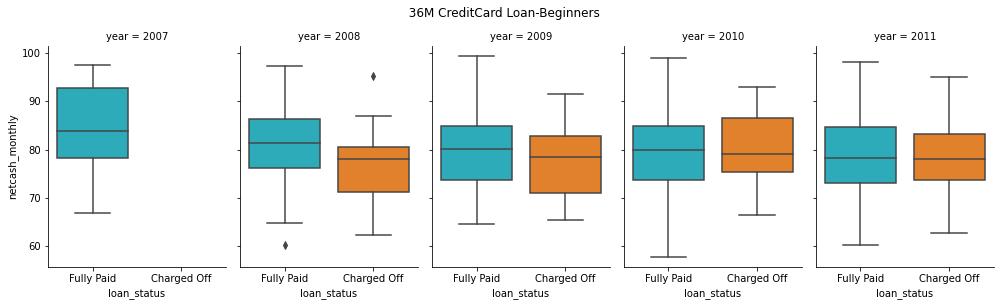

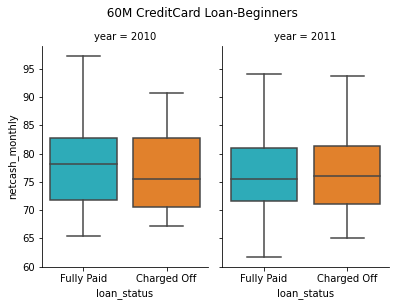

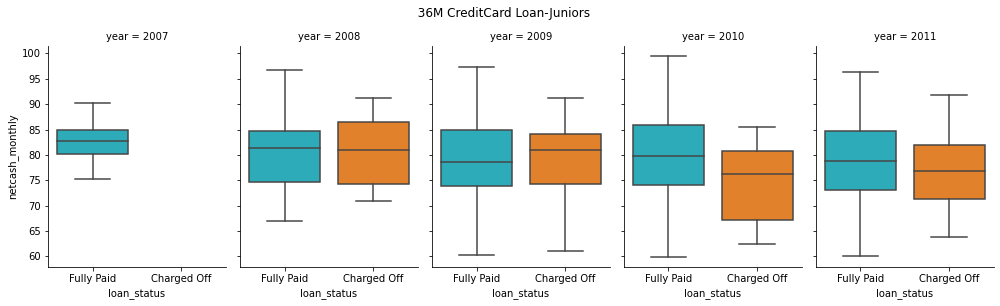

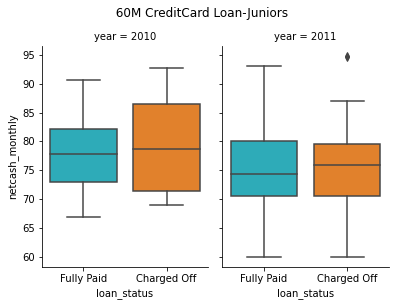

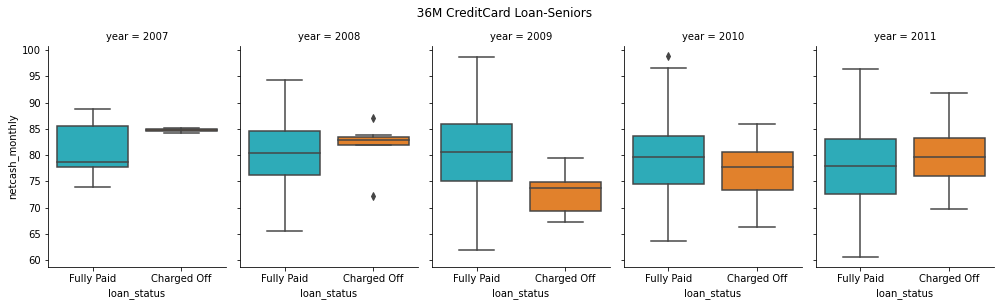

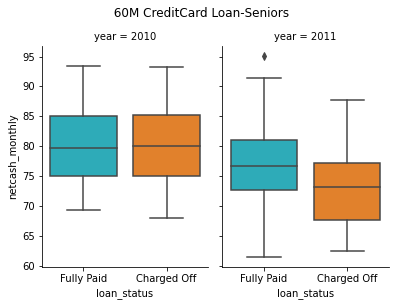

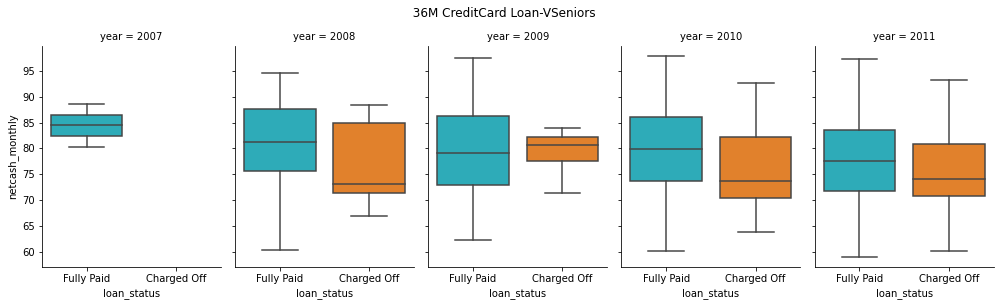

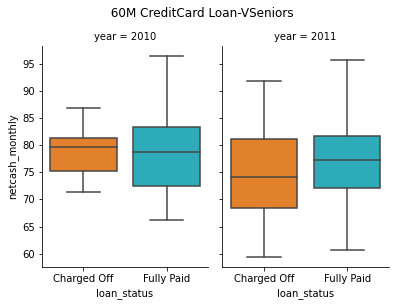

In [841]:
g31 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begcc, kind="box",height=4, aspect=.7,palette=palette)
g31.fig.suptitle("  36M CreditCard Loan-Beginners",y=1.05)
g32=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begcc, kind="box",height=4, aspect=.7,palette=palette)
g32.fig.suptitle("  60M CreditCard Loan-Beginners",y=1.05)

g33=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_juncc, kind="box",height=4, aspect=.7,palette=palette)
g33.fig.suptitle("  36M CreditCard Loan-Juniors",y=1.05)
g34=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_juncc, kind="box",height=4, aspect=.7,palette=palette)
g34.fig.suptitle("  60M CreditCard Loan-Juniors",y=1.05)

g35=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_sencc, kind="box",height=4, aspect=.7,palette=palette)
g35.fig.suptitle("  36M CreditCard Loan-Seniors",y=1.05)
g36=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_sencc, kind="box",height=4, aspect=.7,palette=palette)
g36.fig.suptitle("  60M CreditCard Loan-Seniors",y=1.05)

g37=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsencc, kind="box",height=4, aspect=.7,palette=palette)
g37.fig.suptitle("  36M CreditCard Loan-VSeniors",y=1.05)
g38=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsencc, kind="box",height=4, aspect=.7,palette=palette)
g38.fig.suptitle("  60M CreditCard Loan-VSeniors",y=1.05)

In [842]:
loan36_begcar=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="beginner")]
loan60_begcar=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="beginner")]

loan36_juncar=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="junior")]
loan60_juncar=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="junior")]

loan36_sencar=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="senior")]
loan60_sencar=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="senior")]

loan36_vsencar=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsencar=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Car Loan-VSeniors')

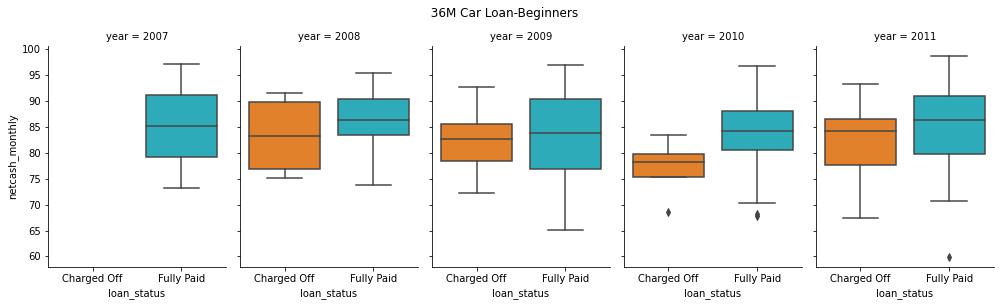

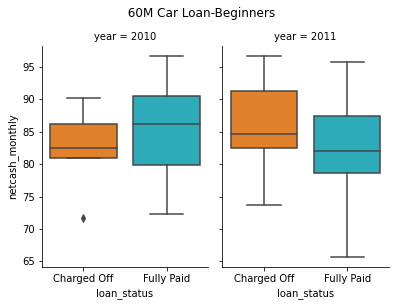

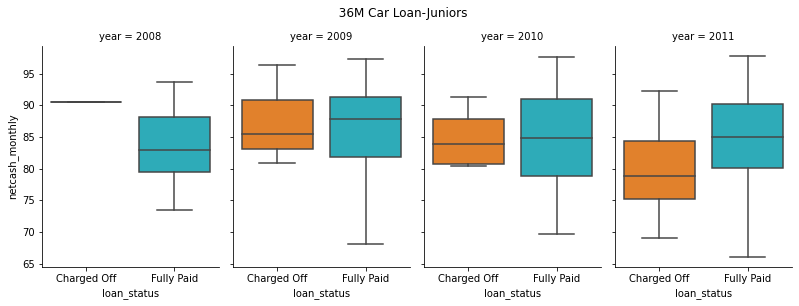

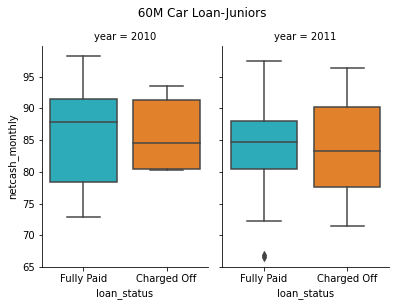

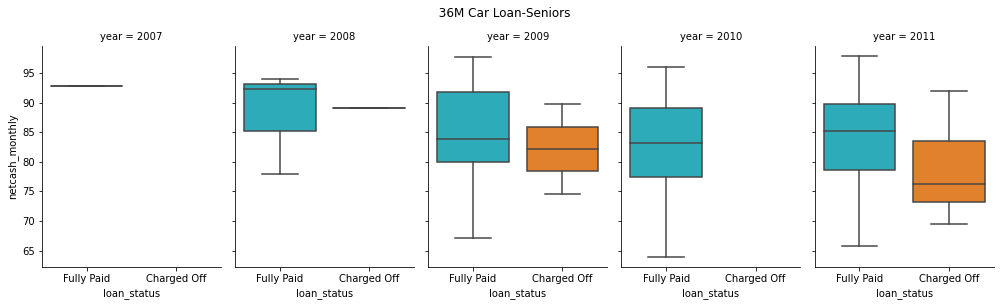

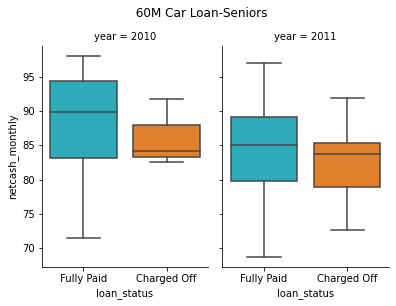

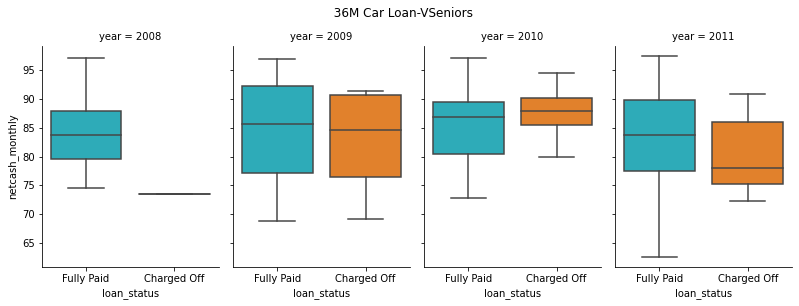

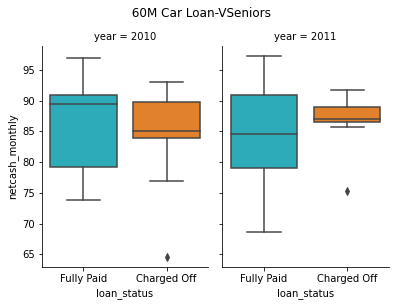

In [843]:
g41 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begcar, kind="box",height=4, aspect=.7,palette=palette)
g41.fig.suptitle("  36M Car Loan-Beginners",y=1.05)
g42=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begcar, kind="box",height=4, aspect=.7,palette=palette)
g42.fig.suptitle("  60M Car Loan-Beginners",y=1.05)

g43=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_juncar, kind="box",height=4, aspect=.7,palette=palette)
g43.fig.suptitle("  36M Car Loan-Juniors",y=1.05)
g44=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_juncar, kind="box",height=4, aspect=.7,palette=palette)
g44.fig.suptitle("  60M Car Loan-Juniors",y=1.05)

g45=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_sencar, kind="box",height=4, aspect=.7,palette=palette)
g45.fig.suptitle("  36M Car Loan-Seniors",y=1.05)
g46=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_sencar, kind="box",height=4, aspect=.7,palette=palette)
g46.fig.suptitle("  60M Car Loan-Seniors",y=1.05)

g47=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsencar, kind="box",height=4, aspect=.7,palette=palette)
g47.fig.suptitle("  36M Car Loan-VSeniors",y=1.05)
g48=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsencar, kind="box",height=4, aspect=.7,palette=palette)
g48.fig.suptitle("  60M Car Loan-VSeniors",y=1.05)

In [844]:
loan36_beghi=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="beginner")]
loan60_beghi=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="beginner")]

loan36_junhi=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="junior")]
loan60_junhi=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="junior")]

loan36_senhi=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="senior")]
loan60_senhi=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenhi=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenhi=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M HomeImprovement Loan-VSeniors')

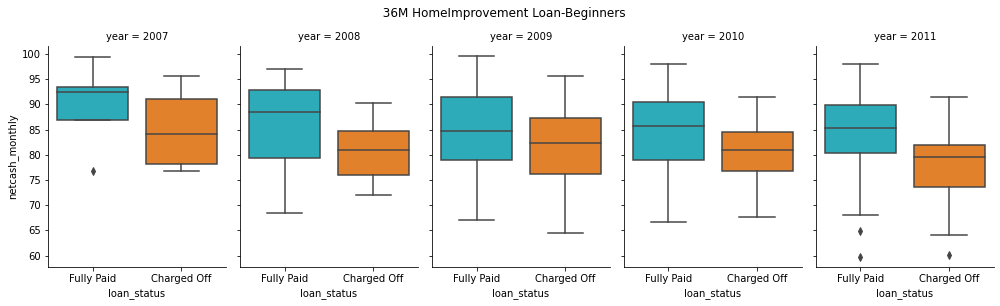

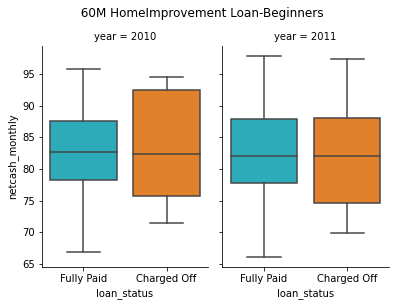

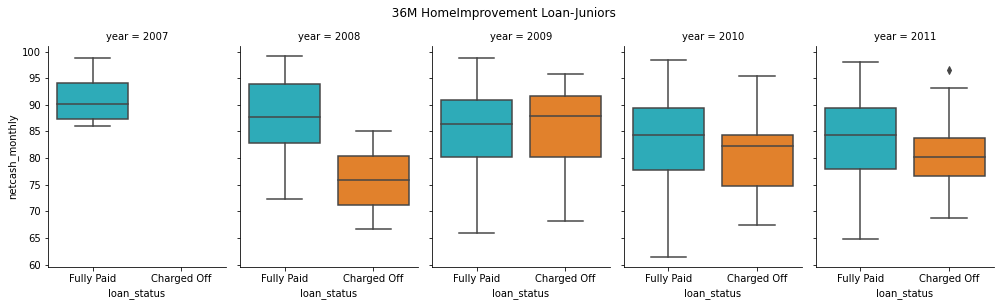

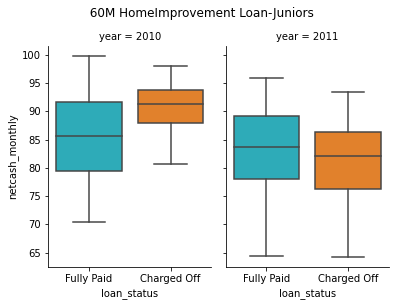

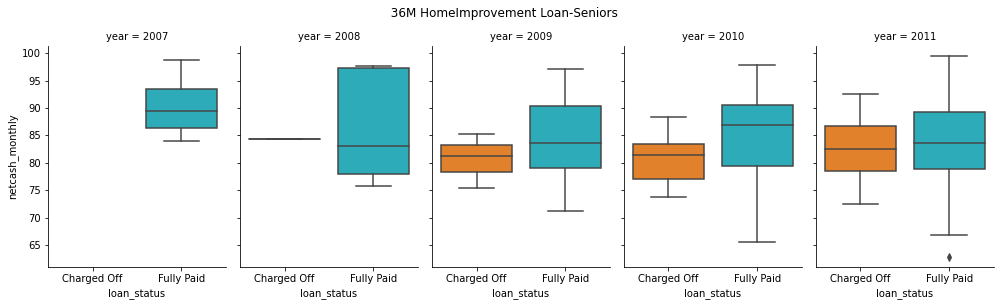

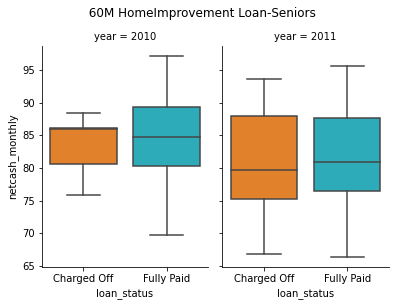

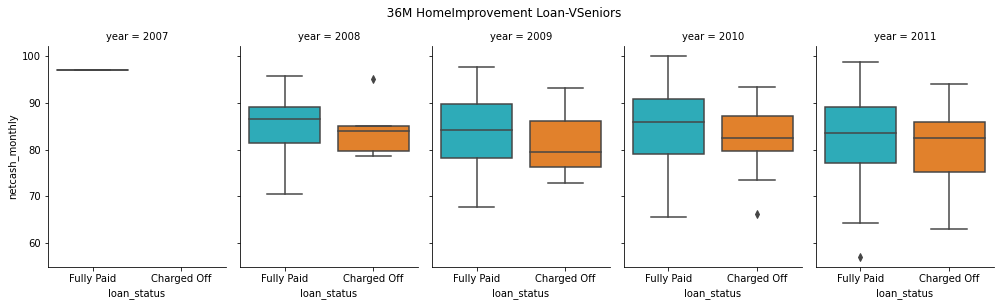

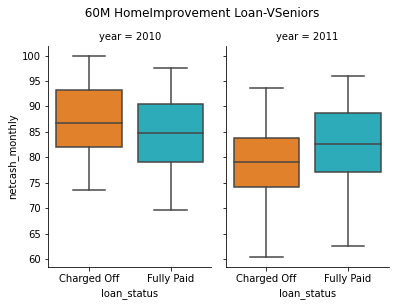

In [845]:
g51 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_beghi, kind="box",height=4, aspect=.7,palette=palette)
g51.fig.suptitle("  36M HomeImprovement Loan-Beginners",y=1.05)
g52=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_beghi, kind="box",height=4, aspect=.7,palette=palette)
g52.fig.suptitle("  60M HomeImprovement Loan-Beginners",y=1.05)

g53=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junhi, kind="box",height=4, aspect=.7,palette=palette)
g53.fig.suptitle("  36M HomeImprovement Loan-Juniors",y=1.05)
g54=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junhi, kind="box",height=4, aspect=.7,palette=palette)
g54.fig.suptitle("  60M HomeImprovement Loan-Juniors",y=1.05)

g55=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senhi, kind="box",height=4, aspect=.7,palette=palette)
g55.fig.suptitle("  36M HomeImprovement Loan-Seniors",y=1.05)
g56=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senhi, kind="box",height=4, aspect=.7,palette=palette)
g56.fig.suptitle("  60M HomeImprovement Loan-Seniors",y=1.05)

g57=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenhi, kind="box",height=4, aspect=.7,palette=palette)
g57.fig.suptitle("  36M HomeImprovement Loan-VSeniors",y=1.05)
g58=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenhi, kind="box",height=4, aspect=.7,palette=palette)
g58.fig.suptitle("  60M HomeImprovement Loan-VSeniors",y=1.05)

In [846]:
loan36_begmp=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="beginner")]
loan60_begmp=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="beginner")]

loan36_junmp=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="junior")]
loan60_junmp=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="junior")]

loan36_senmp=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="senior")]
loan60_senmp=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenmp=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenmp=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M MajorPurchase Loan-VSeniors')

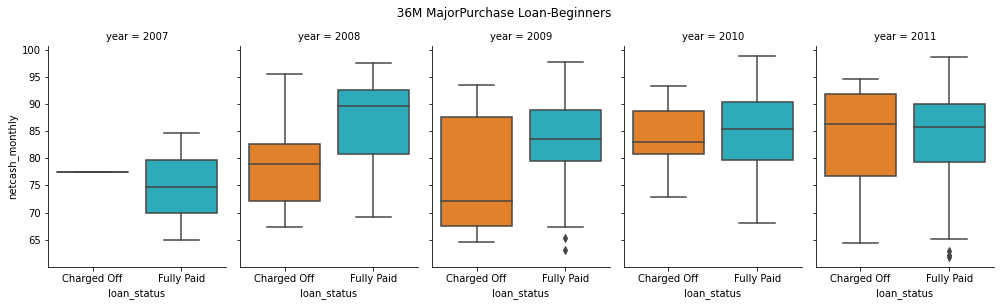

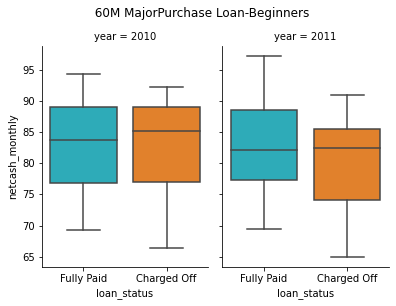

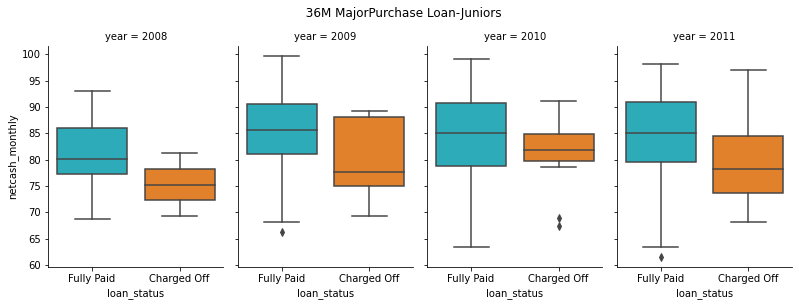

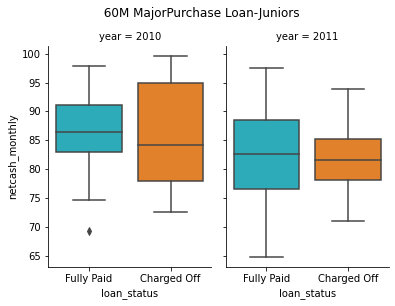

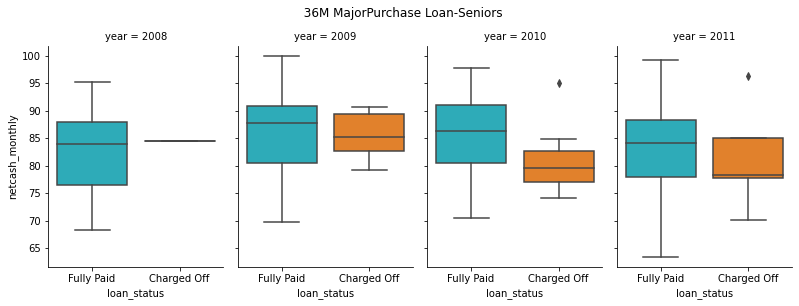

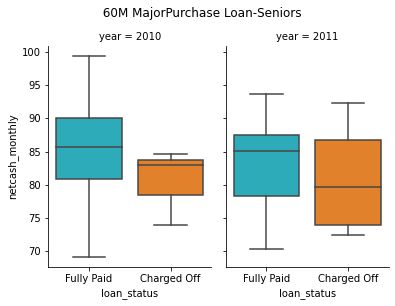

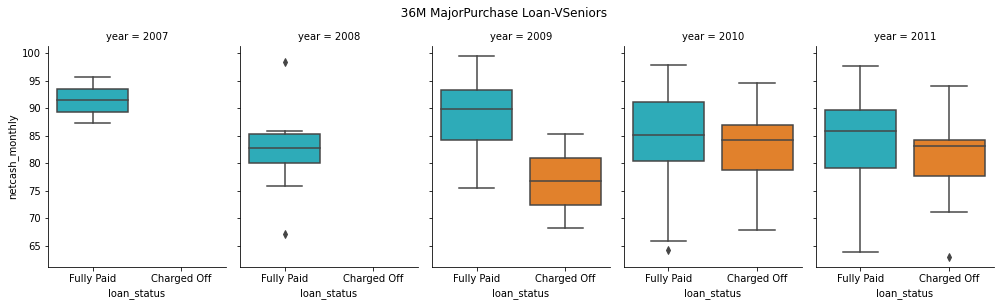

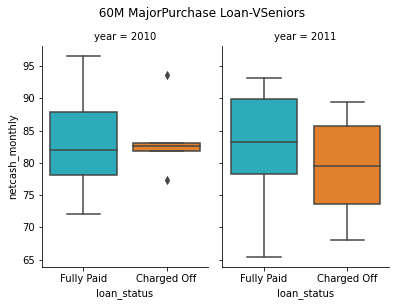

In [847]:
g61 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begmp, kind="box",height=4, aspect=.7,palette=palette)
g61.fig.suptitle("  36M MajorPurchase Loan-Beginners",y=1.05)
g62=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begmp, kind="box",height=4, aspect=.7,palette=palette)
g62.fig.suptitle("  60M MajorPurchase Loan-Beginners",y=1.05)

g63=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junmp, kind="box",height=4, aspect=.7,palette=palette)
g63.fig.suptitle("  36M MajorPurchase Loan-Juniors",y=1.05)
g64=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junmp, kind="box",height=4, aspect=.7,palette=palette)
g64.fig.suptitle("  60M MajorPurchase Loan-Juniors",y=1.05)

g65=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senmp, kind="box",height=4, aspect=.7,palette=palette)
g65.fig.suptitle("  36M MajorPurchase Loan-Seniors",y=1.05)
g66=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senmp, kind="box",height=4, aspect=.7,palette=palette)
g66.fig.suptitle("  60M MajorPurchase Loan-Seniors",y=1.05)

g67=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenmp, kind="box",height=4, aspect=.7,palette=palette)
g67.fig.suptitle("  36M MajorPurchase Loan-VSeniors",y=1.05)
g68=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenmp, kind="box",height=4, aspect=.7,palette=palette)
g68.fig.suptitle("  60M MajorPurchase Loan-VSeniors",y=1.05)

In [848]:
loan36_begmed=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="beginner")]
loan60_begmed=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="beginner")]

loan36_junmed=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="junior")]
loan60_junmed=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="junior")]

loan36_senmed=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="senior")]
loan60_senmed=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenmed=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenmed=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Medical Loan-VSeniors')

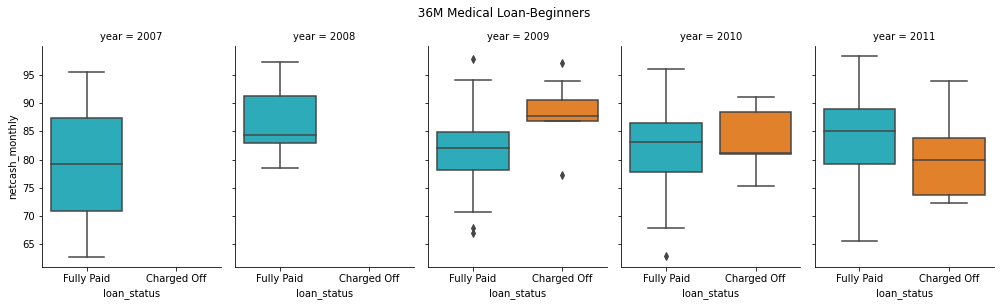

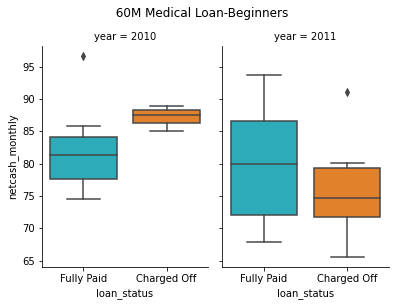

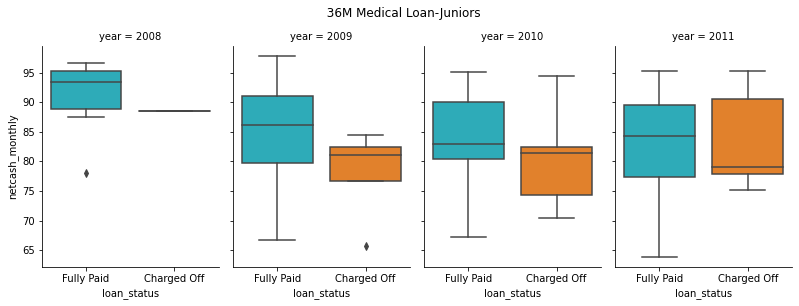

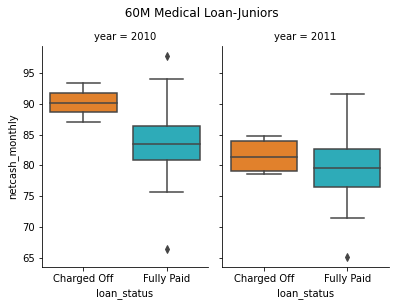

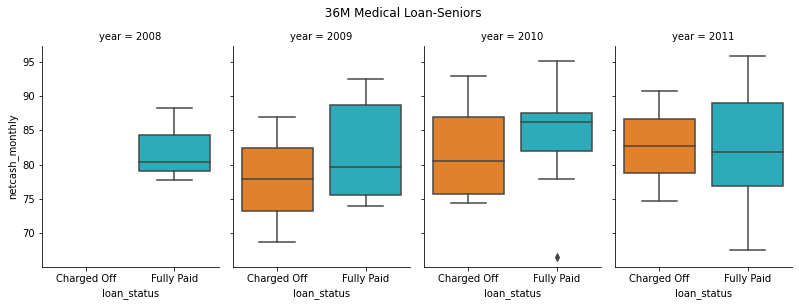

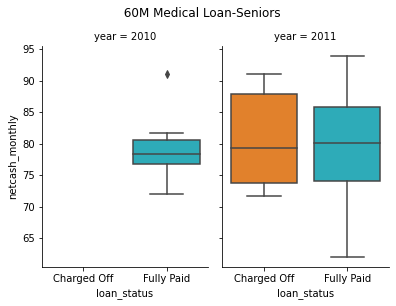

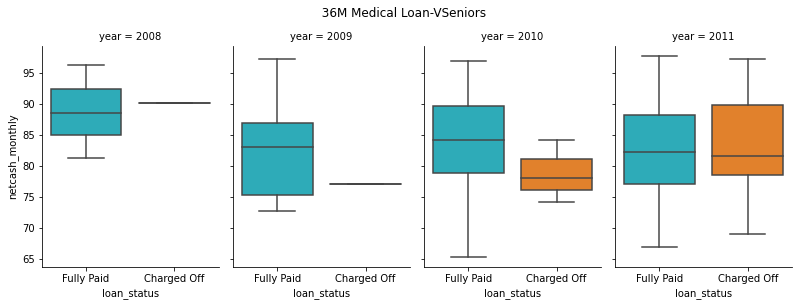

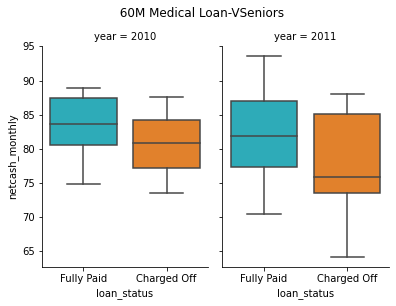

In [849]:
g71 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begmed, kind="box",height=4, aspect=.7,palette=palette)
g71.fig.suptitle("  36M Medical Loan-Beginners",y=1.05)
g72=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begmed, kind="box",height=4, aspect=.7,palette=palette)
g72.fig.suptitle("  60M Medical Loan-Beginners",y=1.05)

g73=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junmed, kind="box",height=4, aspect=.7,palette=palette)
g73.fig.suptitle("  36M Medical Loan-Juniors",y=1.05)
g74=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junmed, kind="box",height=4, aspect=.7,palette=palette)
g74.fig.suptitle("  60M Medical Loan-Juniors",y=1.05)

g75=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senmed, kind="box",height=4, aspect=.7,palette=palette)
g75.fig.suptitle("  36M Medical Loan-Seniors",y=1.05)
g76=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senmed, kind="box",height=4, aspect=.7,palette=palette)
g76.fig.suptitle("  60M Medical Loan-Seniors",y=1.05)

g77=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenmed, kind="box",height=4, aspect=.7,palette=palette)
g77.fig.suptitle("  36M Medical Loan-VSeniors",y=1.05)
g78=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenmed, kind="box",height=4, aspect=.7,palette=palette)
g78.fig.suptitle("  60M Medical Loan-VSeniors",y=1.05)

In [850]:
loan36_beghou=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="beginner")]
loan60_beghou=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="beginner")]

loan36_junhou=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="junior")]
loan60_junhou=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="junior")]

loan36_senhou=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="senior")]
loan60_senhou=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenhou=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenhou=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M House Loan-VSeniors')

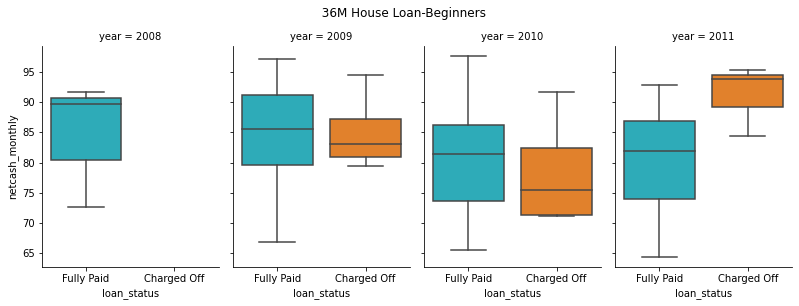

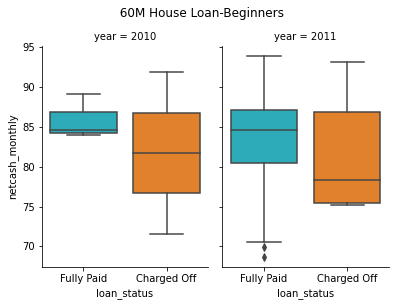

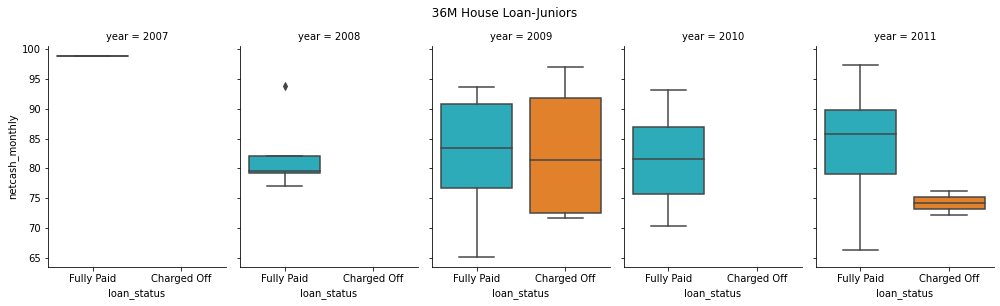

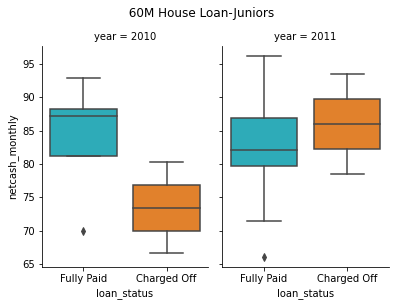

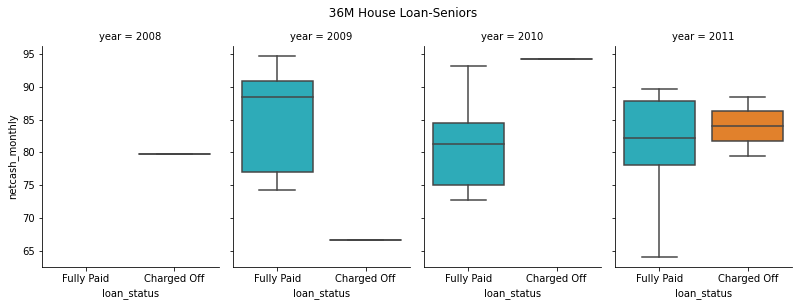

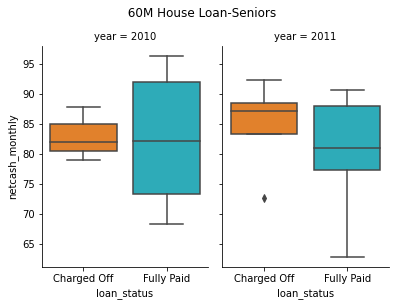

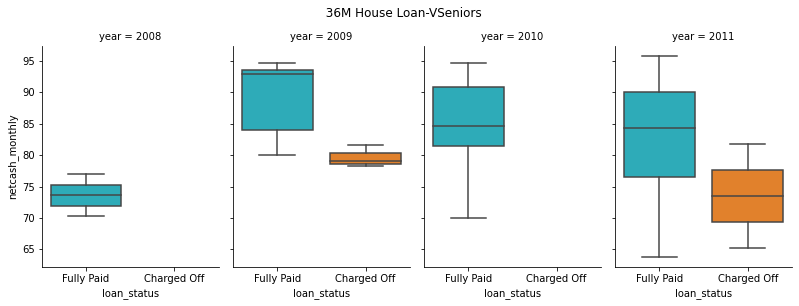

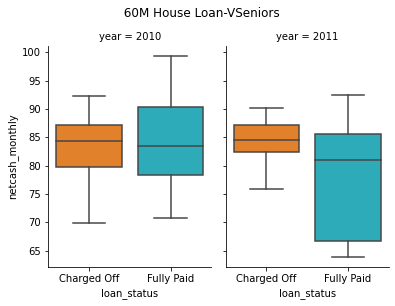

In [851]:
g81 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_beghou, kind="box",height=4, aspect=.7,palette=palette)
g81.fig.suptitle("  36M House Loan-Beginners",y=1.05)
g82=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_beghou, kind="box",height=4, aspect=.7,palette=palette)
g82.fig.suptitle("  60M House Loan-Beginners",y=1.05)

g83=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junhou, kind="box",height=4, aspect=.7,palette=palette)
g83.fig.suptitle("  36M House Loan-Juniors",y=1.05)
g84=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junhou, kind="box",height=4, aspect=.7,palette=palette)
g84.fig.suptitle("  60M House Loan-Juniors",y=1.05)

g85=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senhou, kind="box",height=4, aspect=.7,palette=palette)
g85.fig.suptitle("  36M House Loan-Seniors",y=1.05)
g86=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senhou, kind="box",height=4, aspect=.7,palette=palette)
g86.fig.suptitle("  60M House Loan-Seniors",y=1.05)

g87=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenhou, kind="box",height=4, aspect=.7,palette=palette)
g87.fig.suptitle("  36M House Loan-VSeniors",y=1.05)
g88=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenhou, kind="box",height=4, aspect=.7,palette=palette)
g88.fig.suptitle("  60M House Loan-VSeniors",y=1.05)

In [852]:
loan36_begre=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="beginner")]
loan60_begre=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="beginner")]

loan36_junre=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="junior")]
loan60_junre=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="junior")]

loan36_senre=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="senior")]
loan60_senre=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenre=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenre=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Renewable Energy Loan-VSeniors')

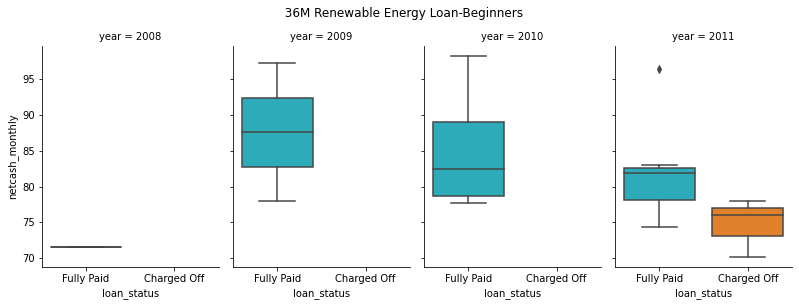

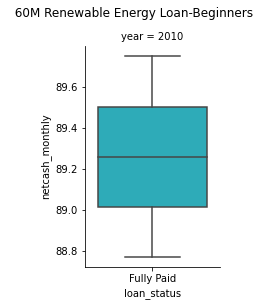

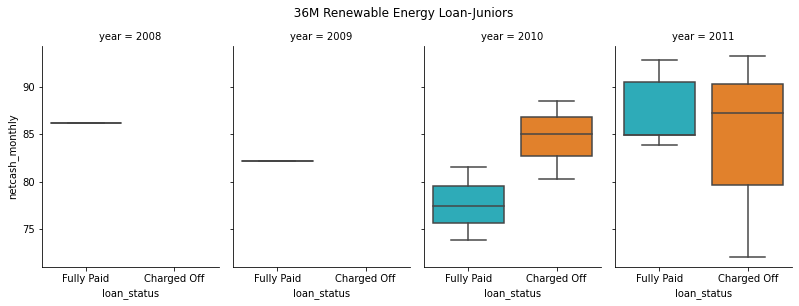

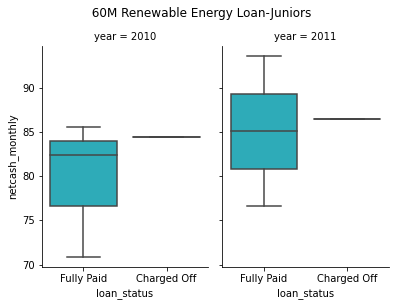

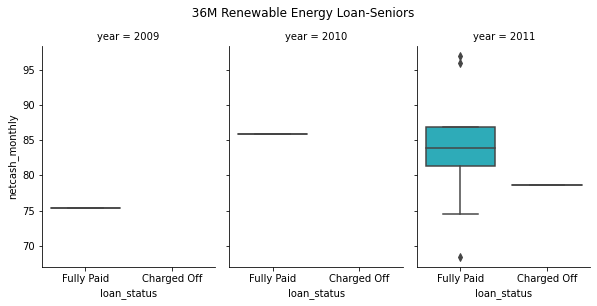

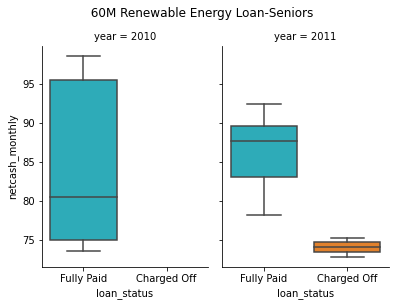

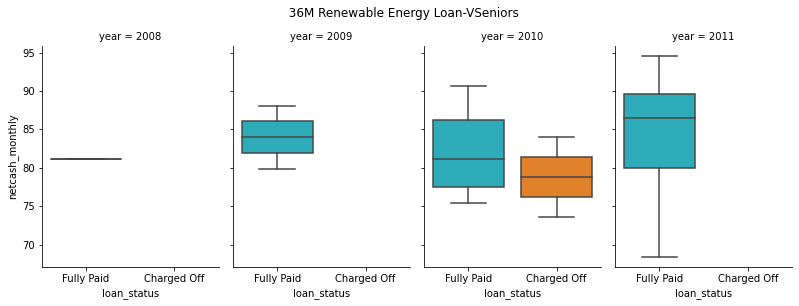

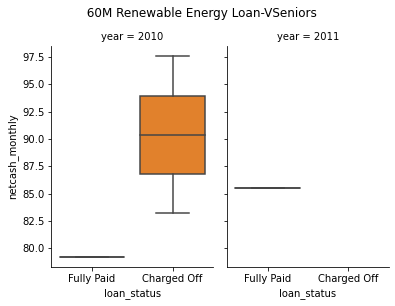

In [853]:
g91 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begre, kind="box",height=4, aspect=.7,palette=palette)
g91.fig.suptitle("  36M Renewable Energy Loan-Beginners",y=1.05)
g92=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begre, kind="box",height=4, aspect=.7,palette=palette)
g92.fig.suptitle("  60M Renewable Energy Loan-Beginners",y=1.05)

g93=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junre, kind="box",height=4, aspect=.7,palette=palette)
g93.fig.suptitle("  36M Renewable Energy Loan-Juniors",y=1.05)
g94=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junre, kind="box",height=4, aspect=.7,palette=palette)
g94.fig.suptitle("  60M Renewable Energy Loan-Juniors",y=1.05)

g95=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senre, kind="box",height=4, aspect=.7,palette=palette)
g95.fig.suptitle("  36M Renewable Energy Loan-Seniors",y=1.05)
g96=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senre, kind="box",height=4, aspect=.7,palette=palette)
g96.fig.suptitle("  60M Renewable Energy Loan-Seniors",y=1.05)

g97=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenre, kind="box",height=4, aspect=.7,palette=palette)
g97.fig.suptitle("  36M Renewable Energy Loan-VSeniors",y=1.05)
g98=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenre, kind="box",height=4, aspect=.7,palette=palette)
g98.fig.suptitle("  60M Renewable Energy Loan-VSeniors",y=1.05)

In [854]:
loan36_begsb=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="beginner")]
loan60_begsb=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="beginner")]

loan36_junsb=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="junior")]
loan60_junsb=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="junior")]

loan36_sensb=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="senior")]
loan60_sensb=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="senior")]

loan36_vsensb=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsensb=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M SmallBusiness Loan-VSeniors')

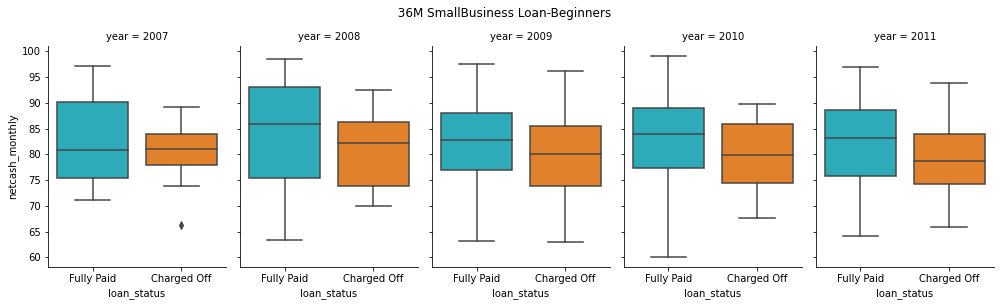

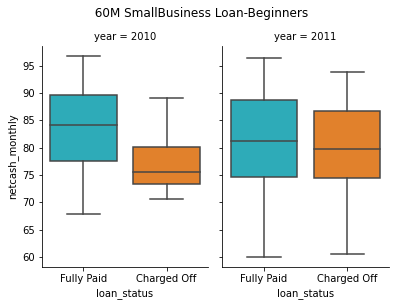

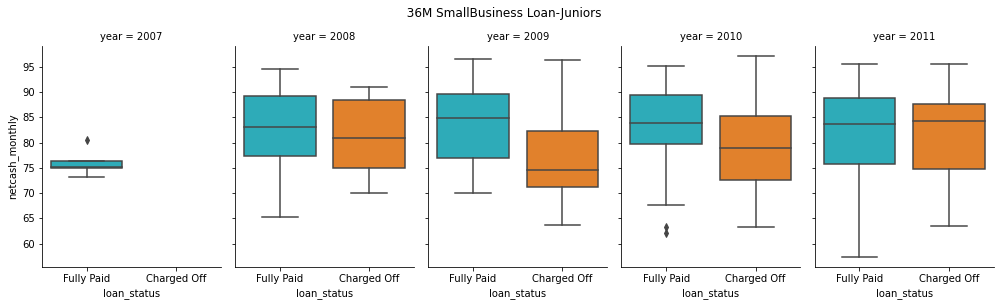

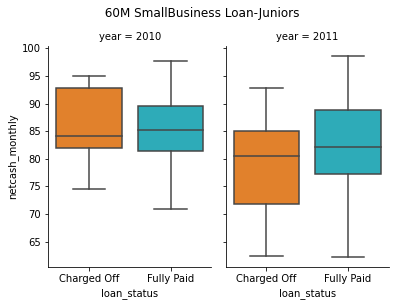

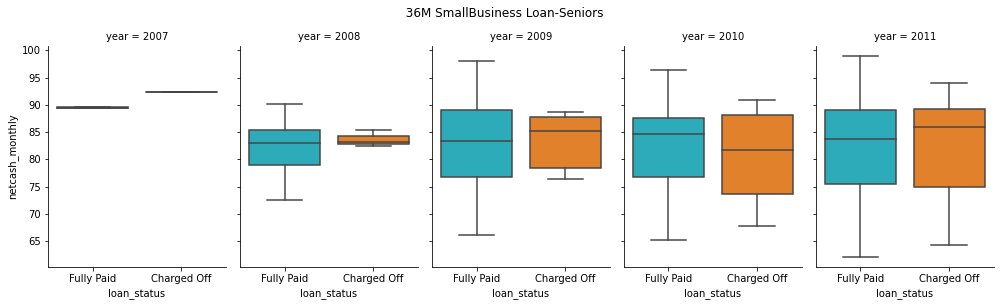

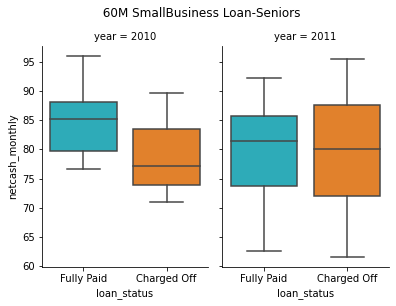

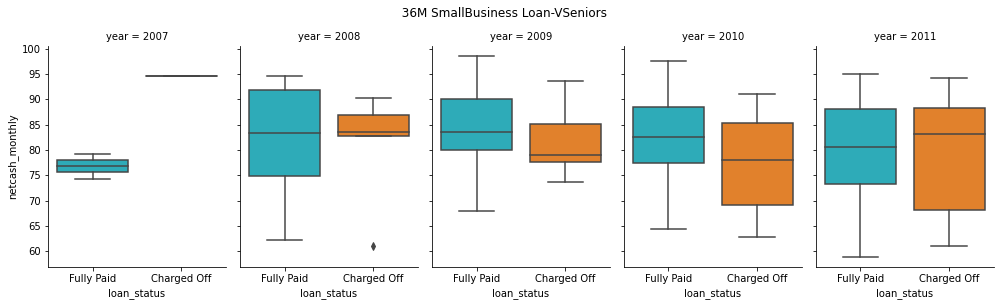

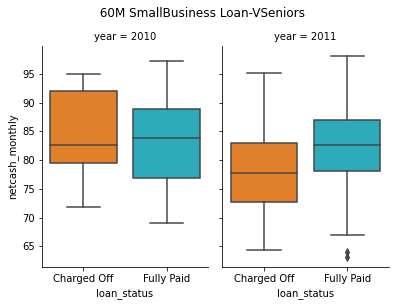

In [855]:
g101 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begsb, kind="box",height=4, aspect=.7,palette=palette)
g101.fig.suptitle("  36M SmallBusiness Loan-Beginners",y=1.05)
g102=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begsb, kind="box",height=4, aspect=.7,palette=palette)
g102.fig.suptitle("  60M SmallBusiness Loan-Beginners",y=1.05)

g103=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junsb, kind="box",height=4, aspect=.7,palette=palette)
g103.fig.suptitle("  36M SmallBusiness Loan-Juniors",y=1.05)
g104=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junsb, kind="box",height=4, aspect=.7,palette=palette)
g104.fig.suptitle("  60M SmallBusiness Loan-Juniors",y=1.05)

g105=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_sensb, kind="box",height=4, aspect=.7,palette=palette)
g105.fig.suptitle("  36M SmallBusiness Loan-Seniors",y=1.05)
g106=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_sensb, kind="box",height=4, aspect=.7,palette=palette)
g106.fig.suptitle("  60M SmallBusiness Loan-Seniors",y=1.05)

g107=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsensb, kind="box",height=4, aspect=.7,palette=palette)
g107.fig.suptitle("  36M SmallBusiness Loan-VSeniors",y=1.05)
g108=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsensb, kind="box",height=4, aspect=.7,palette=palette)
g108.fig.suptitle("  60M SmallBusiness Loan-VSeniors",y=1.05)

In [856]:
loan36_begoth=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="beginner")]
loan60_begoth=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="beginner")]

loan36_junoth=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="junior")]
loan60_junoth=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="junior")]

loan36_senoth=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="senior")]
loan60_senoth=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenoth=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenoth=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Other Loan-VSeniors')

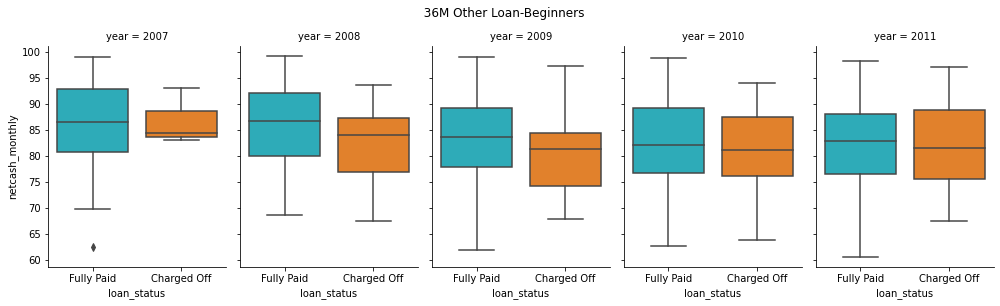

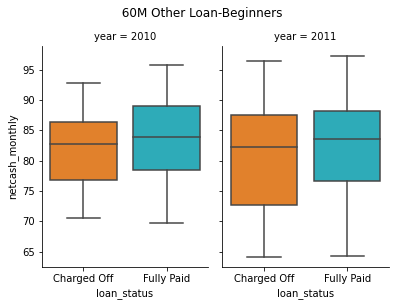

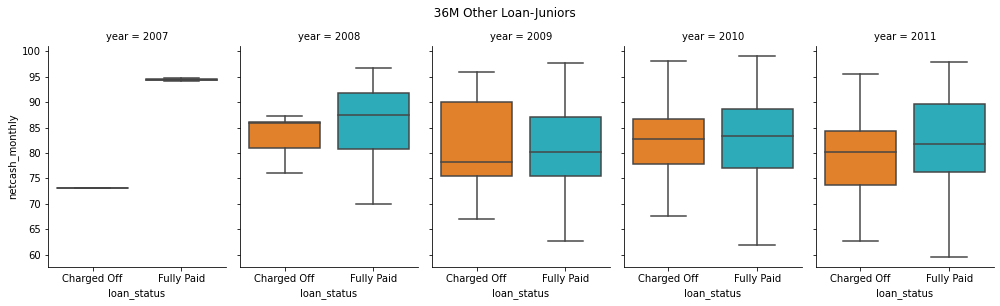

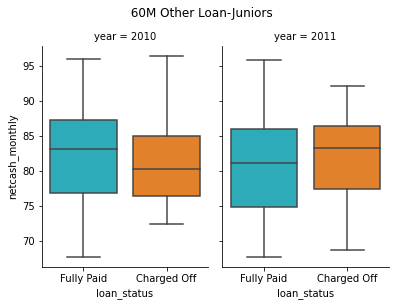

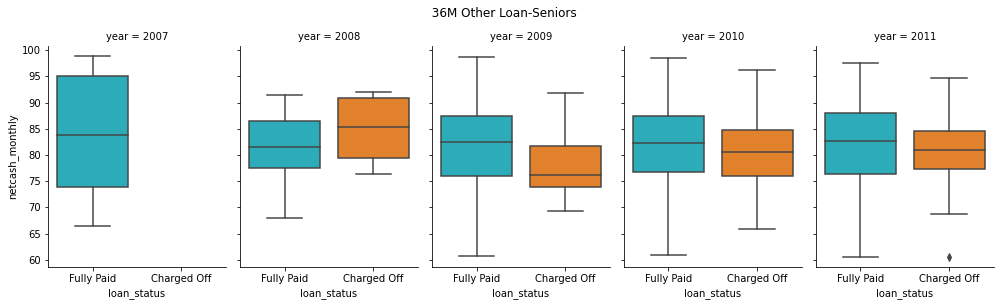

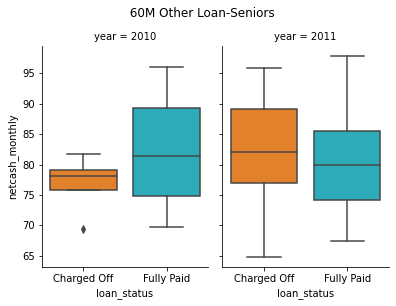

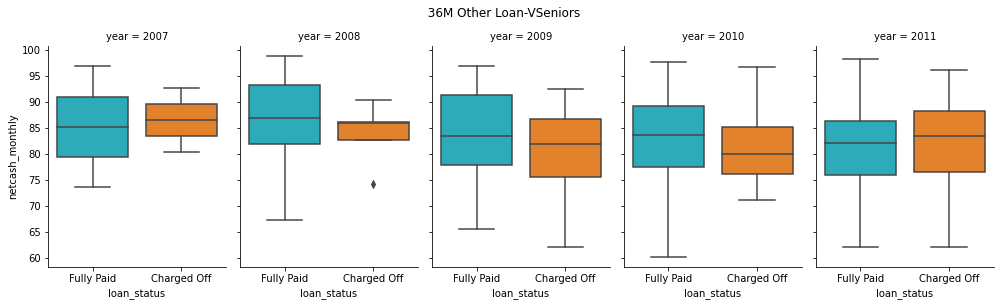

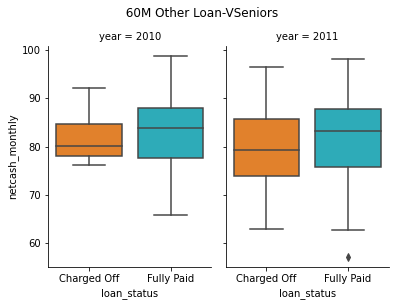

In [857]:
g111 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begoth, kind="box",height=4, aspect=.7,palette=palette)
g111.fig.suptitle("  36M Other Loan-Beginners",y=1.05)
g112=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begoth, kind="box",height=4, aspect=.7,palette=palette)
g112.fig.suptitle("  60M Other Loan-Beginners",y=1.05)

g113=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junoth, kind="box",height=4, aspect=.7,palette=palette)
g113.fig.suptitle("  36M Other Loan-Juniors",y=1.05)
g114=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junoth, kind="box",height=4, aspect=.7,palette=palette)
g114.fig.suptitle("  60M Other Loan-Juniors",y=1.05)

g115=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senoth, kind="box",height=4, aspect=.7,palette=palette)
g115.fig.suptitle("  36M Other Loan-Seniors",y=1.05)
g116=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senoth, kind="box",height=4, aspect=.7,palette=palette)
g116.fig.suptitle("  60M Other Loan-Seniors",y=1.05)

g117=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenoth, kind="box",height=4, aspect=.7,palette=palette)
g117.fig.suptitle("  36M Other Loan-VSeniors",y=1.05)
g118=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenoth, kind="box",height=4, aspect=.7,palette=palette)
g118.fig.suptitle("  60M Other Loan-VSeniors",y=1.05)

In [858]:
loan36_begmov=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="beginner")]
loan60_begmov=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="beginner")]

loan36_junmov=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="junior")]
loan60_junmov=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="junior")]

loan36_senmov=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="senior")]
loan60_senmov=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenmov=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenmov=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="vsenior")]

Text(0.5, 1.05, '  60M Moving Loan-VSeniors')

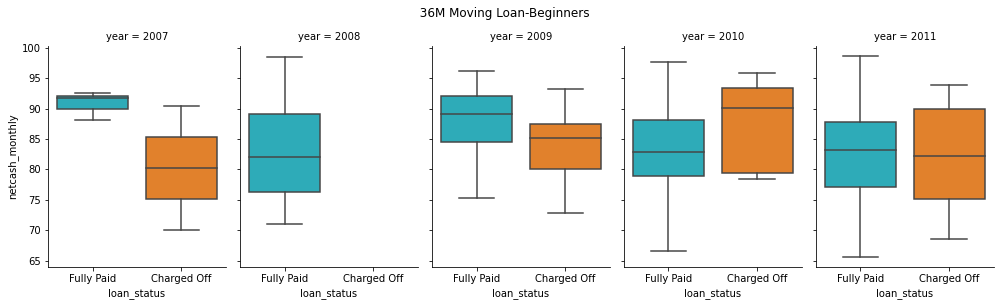

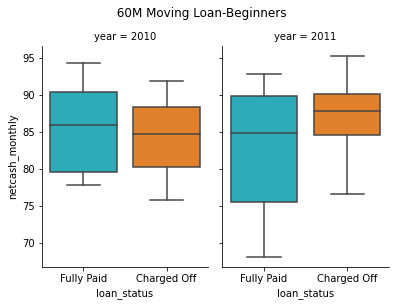

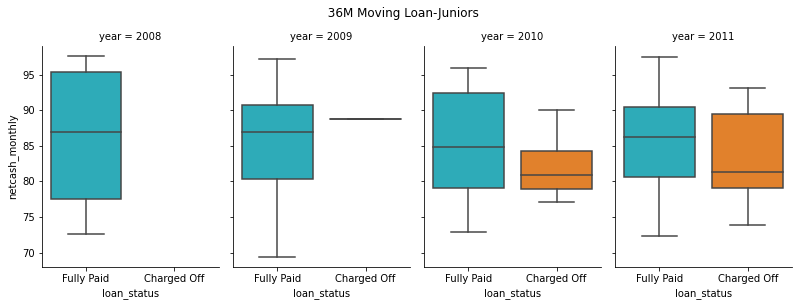

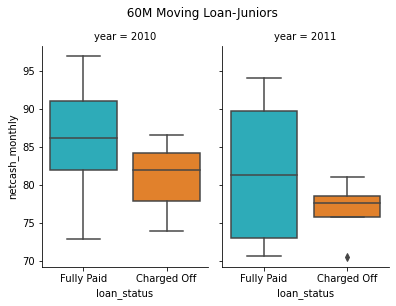

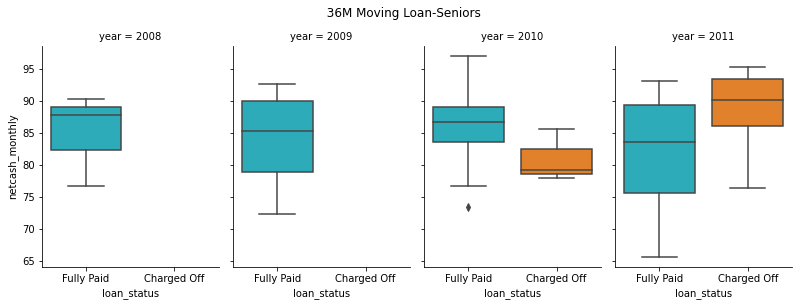

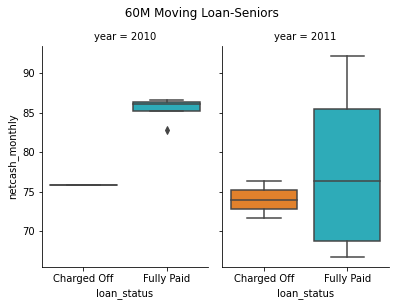

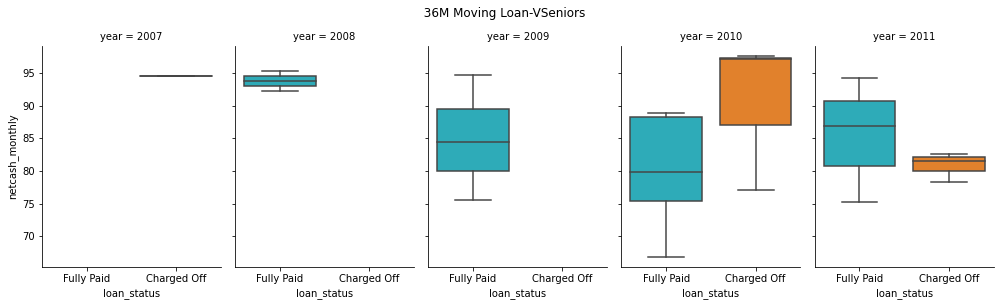

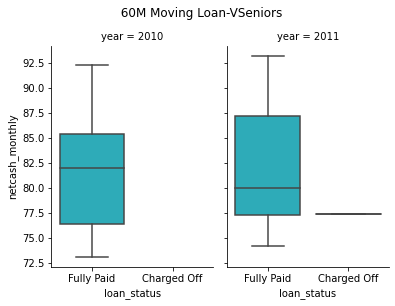

In [859]:
g121 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begmov, kind="box",height=4, aspect=.7,palette=palette)
g121.fig.suptitle("  36M Moving Loan-Beginners",y=1.05)
g122=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begmov, kind="box",height=4, aspect=.7,palette=palette)
g122.fig.suptitle("  60M Moving Loan-Beginners",y=1.05)

g123=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junmov, kind="box",height=4, aspect=.7,palette=palette)
g123.fig.suptitle("  36M Moving Loan-Juniors",y=1.05)
g124=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junmov, kind="box",height=4, aspect=.7,palette=palette)
g124.fig.suptitle("  60M Moving Loan-Juniors",y=1.05)

g125=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senmov, kind="box",height=4, aspect=.7,palette=palette)
g125.fig.suptitle("  36M Moving Loan-Seniors",y=1.05)
g126=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senmov, kind="box",height=4, aspect=.7,palette=palette)
g126.fig.suptitle("  60M Moving Loan-Seniors",y=1.05)

g127=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenmov, kind="box",height=4, aspect=.7,palette=palette)
g127.fig.suptitle("  36M Moving Loan-VSeniors",y=1.05)
g128=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenmov, kind="box",height=4, aspect=.7,palette=palette)
g128.fig.suptitle("  60M Moving Loan-VSeniors",y=1.05)

In [860]:
loan36_begedu=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="beginner")]
loan60_begedu=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="beginner")]

loan36_junedu=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="junior")]
loan60_junedu=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="junior")]

loan36_senedu=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="senior")]
loan60_senedu=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="senior")]

loan36_vsenedu=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="vsenior")]
loan60_vsenedu=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="vsenior")]


Text(0.5, 1.05, '  60M Educational Loan-VSeniors')

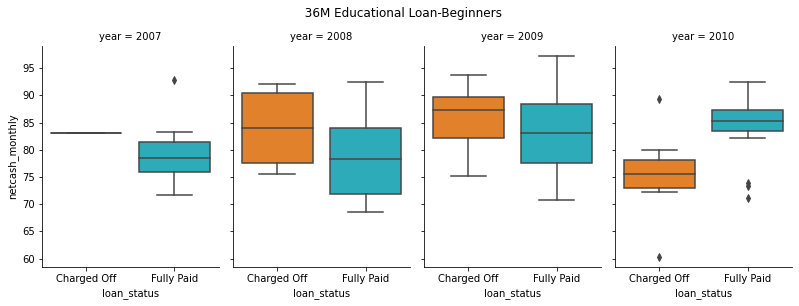

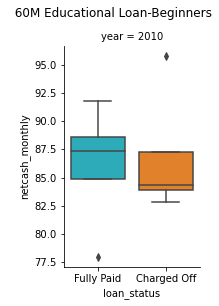

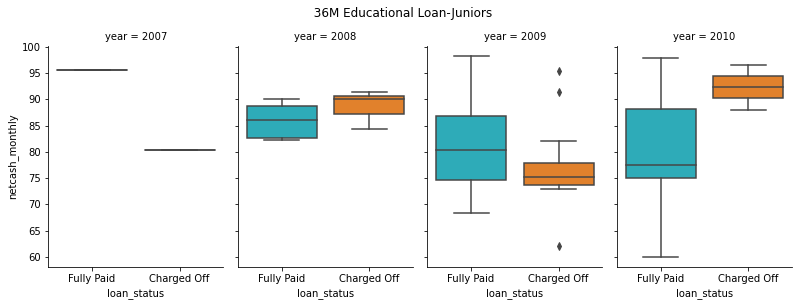

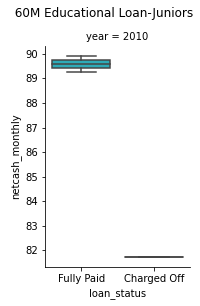

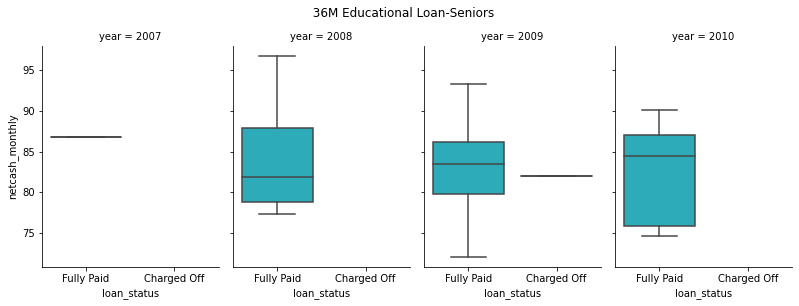

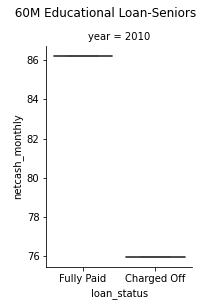

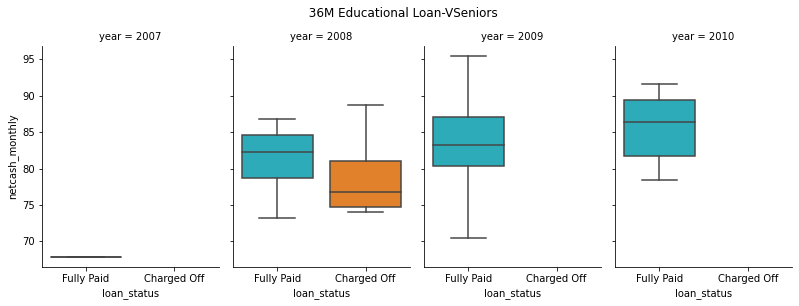

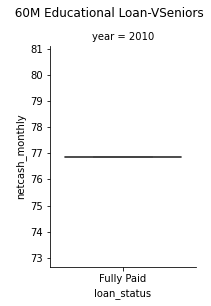

In [861]:
g131 = sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_begedu, kind="box",height=4, aspect=.7,palette=palette)
g131.fig.suptitle("  36M Educational Loan-Beginners",y=1.05)
g132=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_begedu, kind="box",height=4, aspect=.7,palette=palette)
g132.fig.suptitle("  60M Educational Loan-Beginners",y=1.05)

g133=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_junedu, kind="box",height=4, aspect=.7,palette=palette)
g133.fig.suptitle("  36M Educational Loan-Juniors",y=1.05)
g134=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_junedu, kind="box",height=4, aspect=.7,palette=palette)
g134.fig.suptitle("  60M Educational Loan-Juniors",y=1.05)

g135=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_senedu, kind="box",height=4, aspect=.7,palette=palette)
g135.fig.suptitle("  36M Educational Loan-Seniors",y=1.05)
g136=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_senedu, kind="box",height=4, aspect=.7,palette=palette)
g136.fig.suptitle("  60M Educational Loan-Seniors",y=1.05)

g137=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan36_vsenedu, kind="box",height=4, aspect=.7,palette=palette)
g137.fig.suptitle("  36M Educational Loan-VSeniors",y=1.05)
g138=sbn.catplot(x="loan_status", y="netcash_monthly", col="year",data=loan60_vsenedu, kind="box",height=4, aspect=.7,palette=palette)
g138.fig.suptitle("  60M Educational Loan-VSeniors",y=1.05)

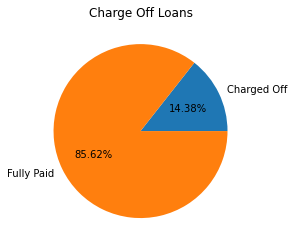

In [862]:
pivotCOff=pd.pivot_table(loanNcur,index=[],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
#pivotCOff.reset_index(inplace=True)
pivotCOff["Charged Off Per"]=pivotCOff["Charged Off"]*100/(pivotCOff["Charged Off"]+pivotCOff["Fully Paid"])
pivotCOff["Fully Paid Per"]=100-pivotCOff["Charged Off Per"]
data=[pivotCOff["Charged Off"][0],pivotCOff["Fully Paid"][0]]
labels=["Charged Off","Fully Paid"]
plt.pie(data,labels=labels,autopct="%1.2f%%")
plt.title("Charge Off Loans")
plt.show()

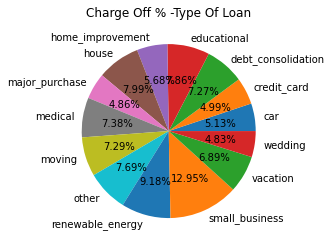

In [863]:
pivotpurCOff=pd.pivot_table(loanNcur,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivotpurCOff.reset_index(inplace=True)
pivotpurCOff["Charged Off Per"]=pivotpurCOff["annual_inc"]["Charged Off"]*100/(pivotpurCOff["annual_inc"]["Charged Off"]+pivotpurCOff["annual_inc"]["Fully Paid"])
plt.pie(pivotpurCOff["Charged Off Per"],labels=pivotpurCOff.iloc[:,0],autopct="%1.2f%%")
plt.title("Charge Off % -Type Of Loan")
plt.show()

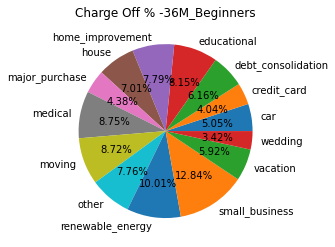

In [864]:
pivot36beg=pd.pivot_table(loan36_beg,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot36beg.reset_index(inplace=True)
pivot36beg["Charged Off Per"]=pivot36beg["annual_inc"]["Charged Off"]*100/(pivot36beg["annual_inc"]["Charged Off"]+pivot36beg["annual_inc"]["Fully Paid"])

plt.pie(pivot36beg["Charged Off Per"],labels=pivot36beg.iloc[:,0],autopct="%1.2f%%")
plt.title("Charge Off % -36M_Beginners")
plt.show()

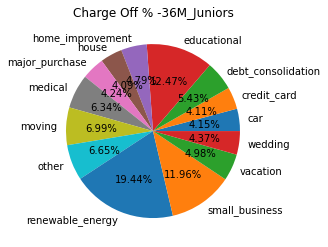

In [865]:
pivot36jun=pd.pivot_table(loan36_jun,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot36jun.reset_index(inplace=True)
pivot36jun["Charged Off Per"]=pivot36jun["annual_inc"]["Charged Off"]*100/(pivot36jun["annual_inc"]["Charged Off"]+pivot36jun["annual_inc"]["Fully Paid"])

plt.pie(pivot36jun["Charged Off Per"],labels=pivot36jun.iloc[:,0],autopct="%1.2f%%")
plt.title("Charge Off % -36M_Juniors")
plt.show()

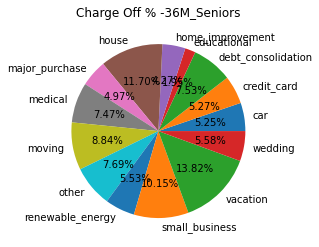

In [866]:
pivot36sen=pd.pivot_table(loan36_sen,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot36sen.reset_index(inplace=True)
pivot36sen["Charged Off Per"]=pivot36sen["annual_inc"]["Charged Off"]*100/(pivot36sen["annual_inc"]["Charged Off"]+pivot36sen["annual_inc"]["Fully Paid"])

plt.pie(pivot36sen["Charged Off Per"],labels=pivot36sen.iloc[:,0],autopct="%1.2f%%")
plt.title("Charge Off % -36M_Seniors")
plt.show()

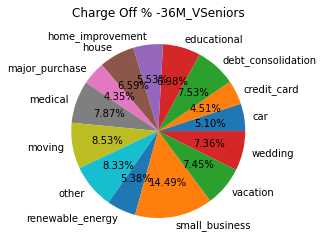

In [867]:
pivot36vsen=pd.pivot_table(loan36_vsen,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot36vsen.reset_index(inplace=True)
pivot36vsen["Charged Off Per"]=pivot36vsen["annual_inc"]["Charged Off"]*100/(pivot36vsen["annual_inc"]["Charged Off"]+pivot36vsen["annual_inc"]["Fully Paid"])

plt.pie(pivot36vsen["Charged Off Per"],labels=pivot36vsen.iloc[:,0],autopct="%1.2f%%")
plt.title("Charge Off % -36M_VSeniors")
plt.show()

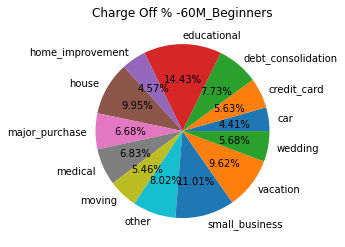

In [868]:
pivot60beg=pd.pivot_table(loan60_beg,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot60beg.reset_index(inplace=True)
pivot60beg["Charged Off Per"]=pivot60beg["annual_inc"]["Charged Off"]*100/(pivot60beg["annual_inc"]["Charged Off"]+pivot60beg["annual_inc"]["Fully Paid"])

pivot60beg2=pivot60beg.dropna(axis=0)
plt.pie(pivot60beg2["Charged Off Per"],labels=pivot60beg2.iloc[:,0],autopct="%1.2f%%")#
plt.title("Charge Off % -60M_Beginners")
plt.show()

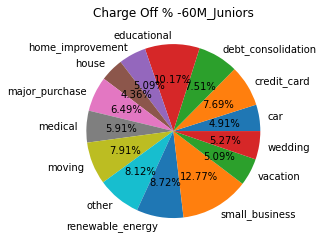

In [869]:
pivot60jun=pd.pivot_table(loan60_jun,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot60jun.reset_index(inplace=True)
pivot60jun["Charged Off Per"]=pivot60jun["annual_inc"]["Charged Off"]*100/(pivot60jun["annual_inc"]["Charged Off"]+pivot60jun["annual_inc"]["Fully Paid"])

pivot60jun2=pivot60jun.dropna(axis=0)
plt.pie(pivot60jun2["Charged Off Per"],labels=pivot60jun2.iloc[:,0],autopct="%1.2f%%")#
plt.title("Charge Off % -60M_Juniors")
plt.show()

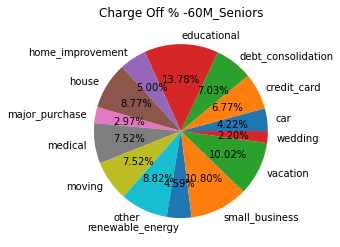

In [870]:
pivot60sen=pd.pivot_table(loan60_sen,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot60sen.reset_index(inplace=True)
pivot60sen["Charged Off Per"]=pivot60sen["annual_inc"]["Charged Off"]*100/(pivot60sen["annual_inc"]["Charged Off"]+pivot60sen["annual_inc"]["Fully Paid"])

pivot60sen2=pivot60sen.dropna(axis=0)
plt.pie(pivot60sen2["Charged Off Per"],labels=pivot60sen2.iloc[:,0],autopct="%1.2f%%")#
plt.title("Charge Off % -60M_Seniors")
plt.show()

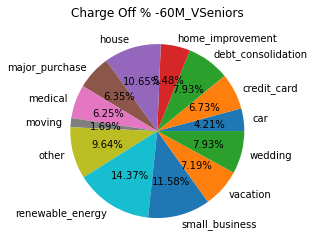

In [871]:
pivot60vsen=pd.pivot_table(loan60_vsen,index=["purpose"],values=["annual_inc"],columns=["loan_status"],aggfunc="count")
pivot60vsen.reset_index(inplace=True)
pivot60vsen["Charged Off Per"]=pivot60vsen["annual_inc"]["Charged Off"]*100/(pivot60vsen["annual_inc"]["Charged Off"]+pivot60vsen["annual_inc"]["Fully Paid"])

pivot60vsen2=pivot60vsen.dropna(axis=0)
plt.pie(pivot60vsen2["Charged Off Per"],labels=pivot60vsen2.iloc[:,0],autopct="%1.2f%%")#
plt.title("Charge Off % -60M_VSeniors")
plt.show()

In [872]:
loan36cc_begv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36cc_begnv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36cc_begsv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60cc_begv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60cc_begnv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60cc_begsv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36sb_begv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36sb_begnv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36sb_begsv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60sb_begv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60sb_begnv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60sb_begsv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36oth_begv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36oth_begnv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36oth_begsv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60oth_begv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60oth_begnv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60oth_begsv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36wd_begv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36wd_begnv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36wd_begsv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60wd_begv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60wd_begnv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60wd_begsv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36car_begv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36car_begnv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36car_begsv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60car_begv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60car_begnv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60car_begsv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36dc_begv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36dc_begnv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36dc_begsv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60dc_begv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60dc_begnv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60dc_begsv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36hi_begv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36hi_begnv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36hi_begsv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60hi_begv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60hi_begnv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60hi_begsv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36mp_begv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36mp_begnv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36mp_begsv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60mp_begv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60mp_begnv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60mp_begsv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36med_begv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36med_begnv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36med_begsv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60med_begv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60med_begnv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60med_begsv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36mov_begv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36mov_begnv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36mov_begsv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60mov_begv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60mov_begnv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60mov_begsv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36vac_begv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36vac_begnv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36vac_begsv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60vac_begv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60vac_begnv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60vac_begsv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36hou_begv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36hou_begnv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36hou_begsv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60hou_begv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60hou_begnv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60hou_begsv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36re_begv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36re_begnv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36re_begsv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60re_begv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60re_begnv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60re_begsv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]

loan36edu_begv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Verified")]
loan36edu_begnv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Not Verified")]

loan36edu_begsv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="beginner")&(loan_36M["verification_status"]=="Source Verified")]
loan60edu_begv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Verified")]

loan60edu_begnv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Not Verified")]
loan60edu_begsv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="beginner")&(loan_60M["verification_status"]=="Source Verified")]


C:\Users\e880156\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


ValueError: min() arg is an empty sequence

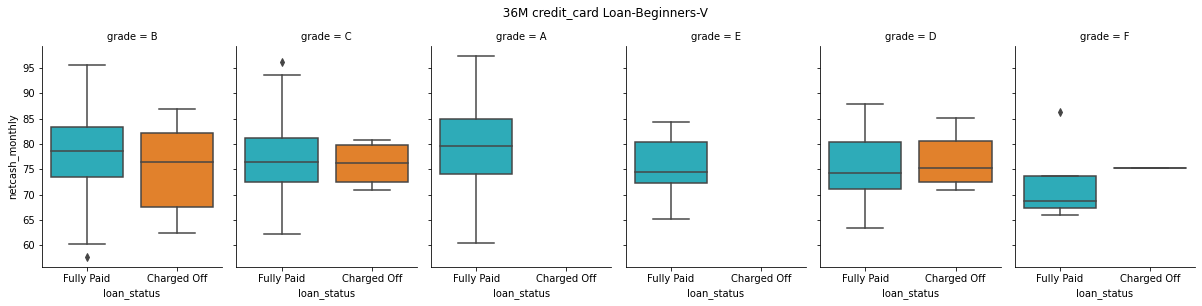

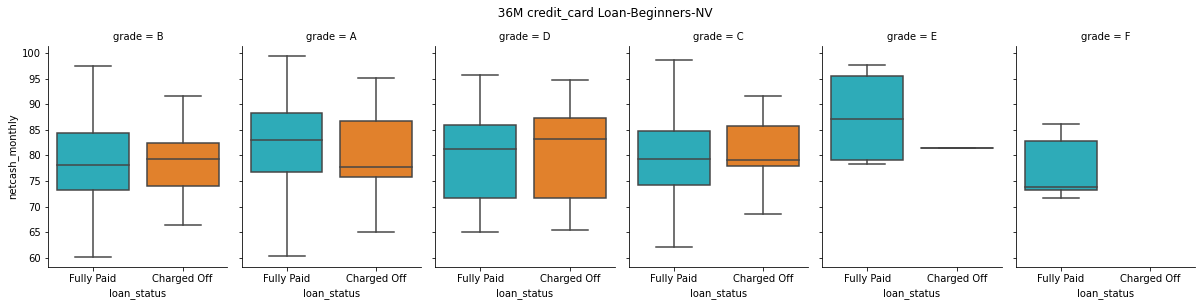

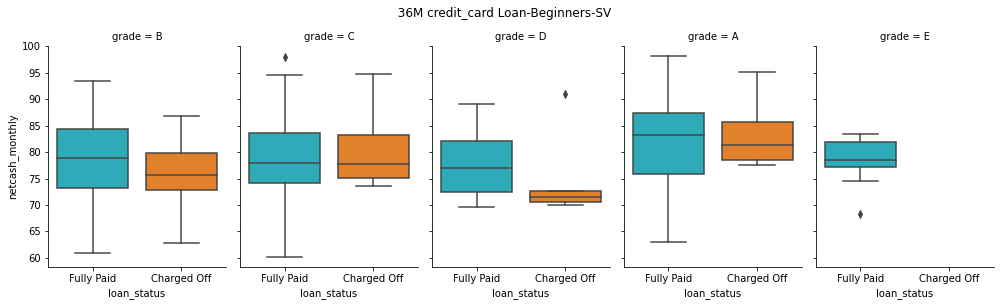

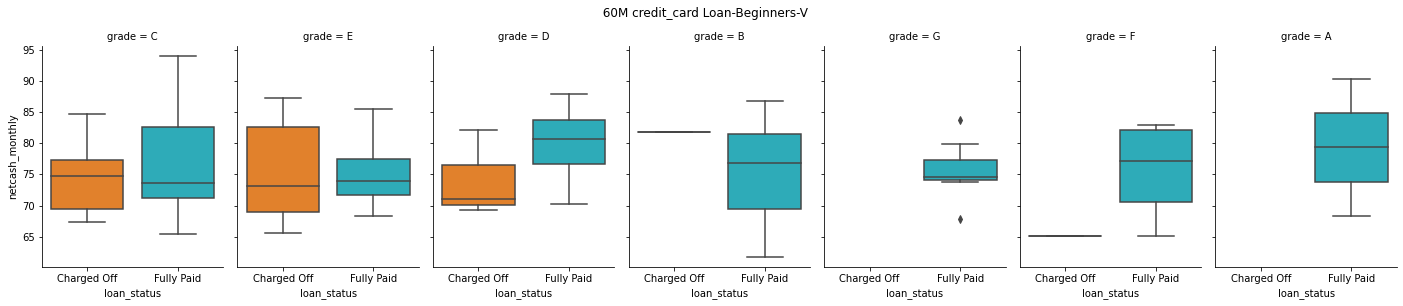

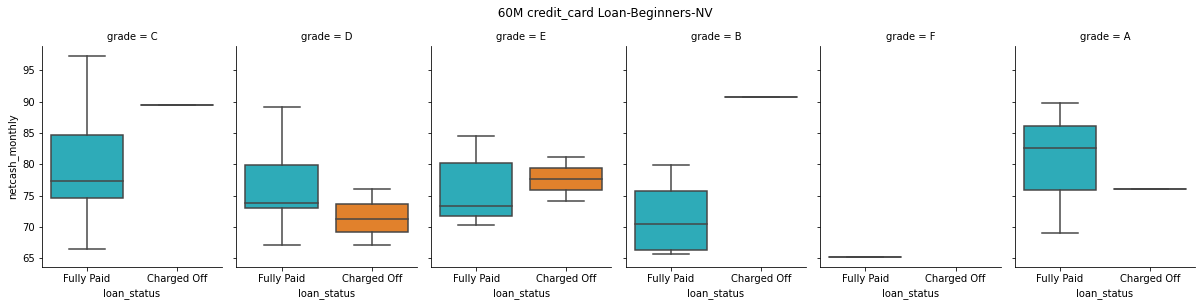

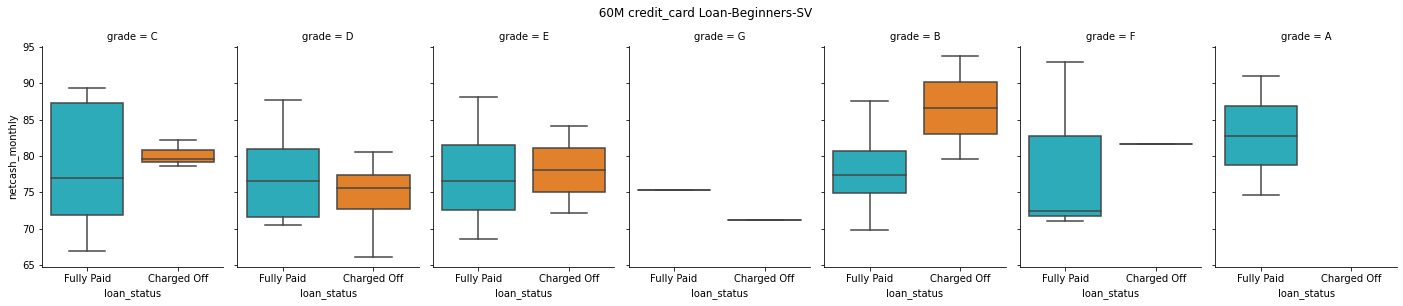

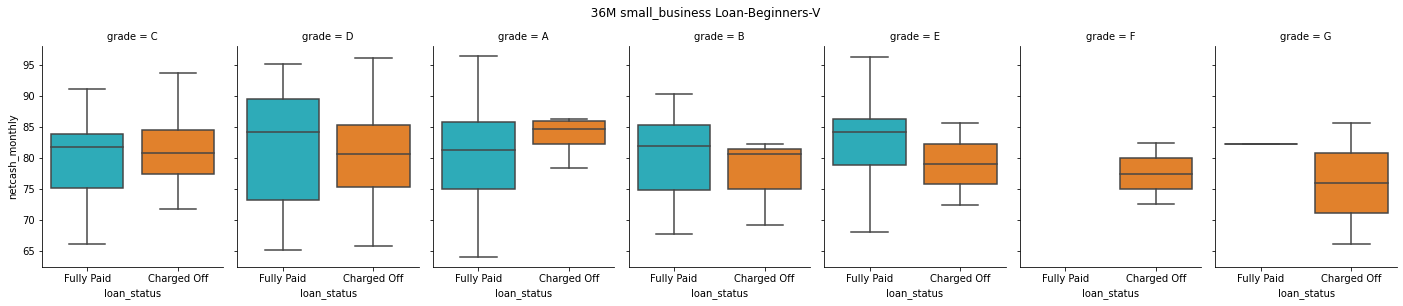

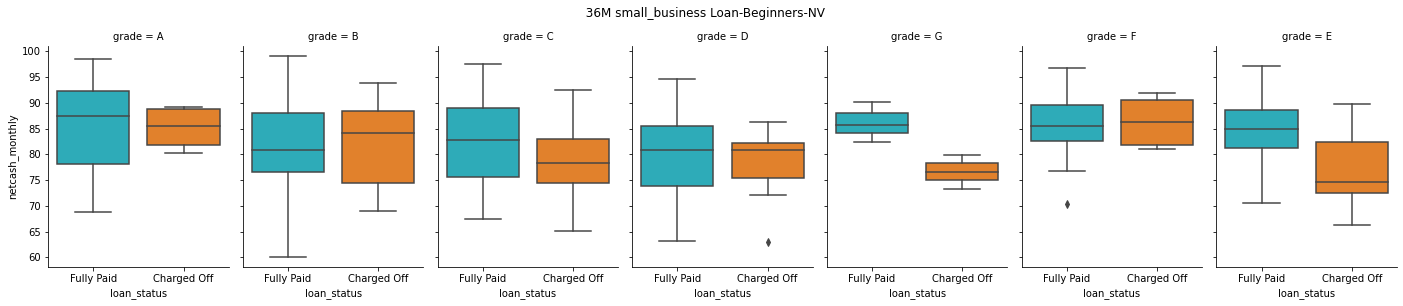

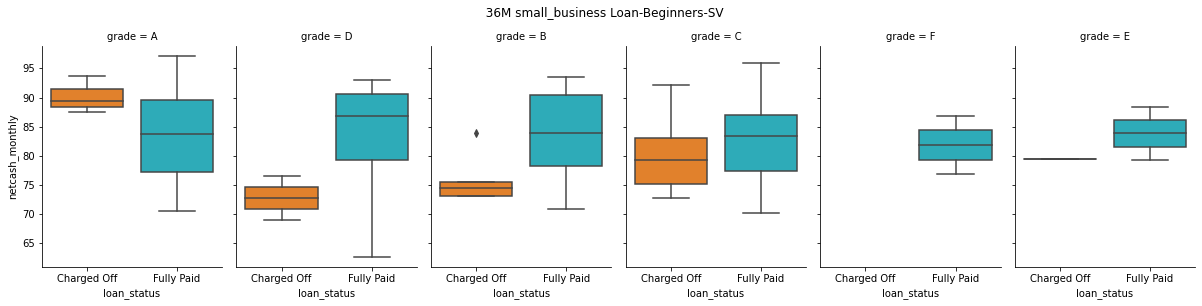

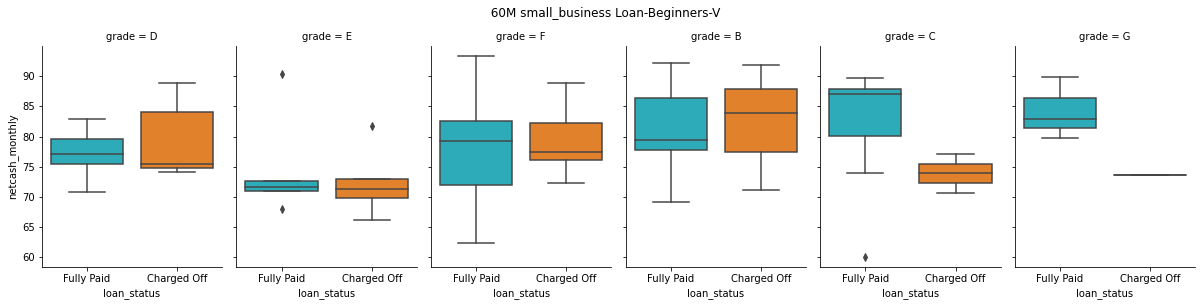

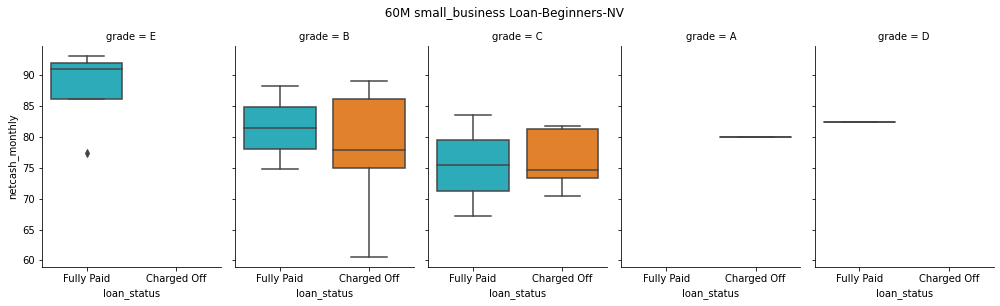

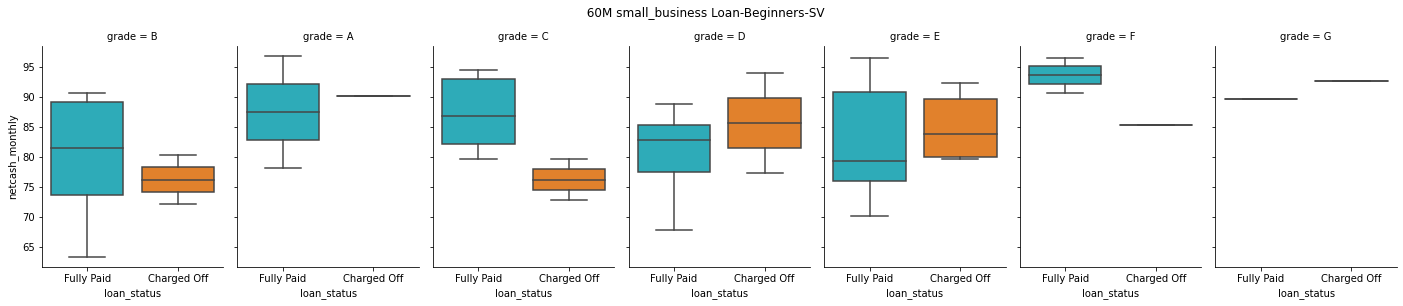

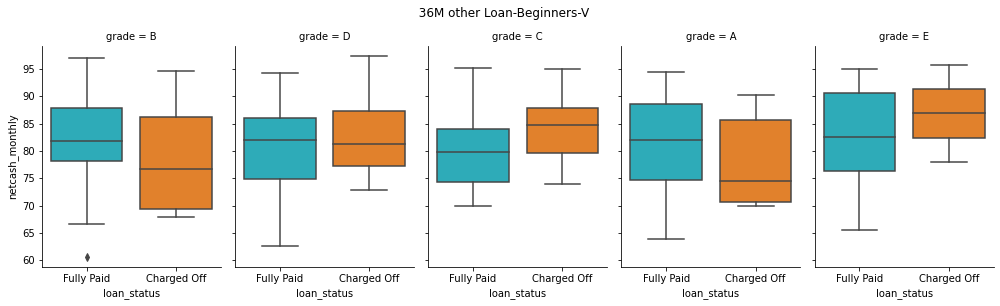

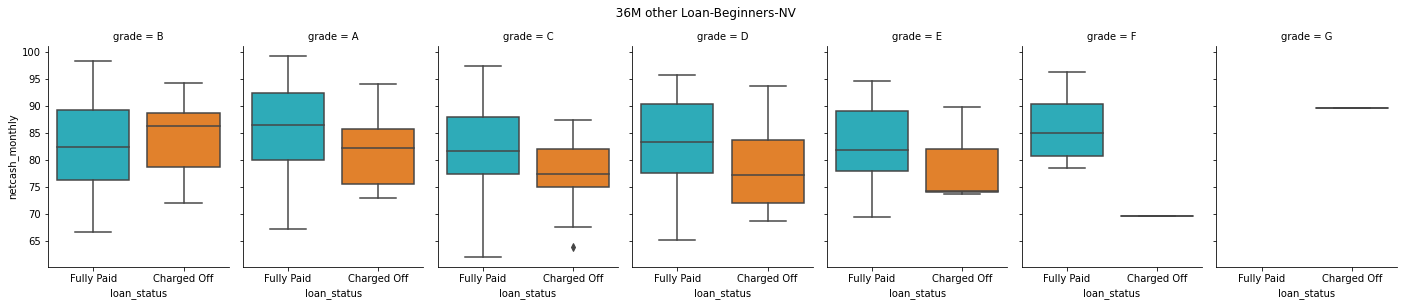

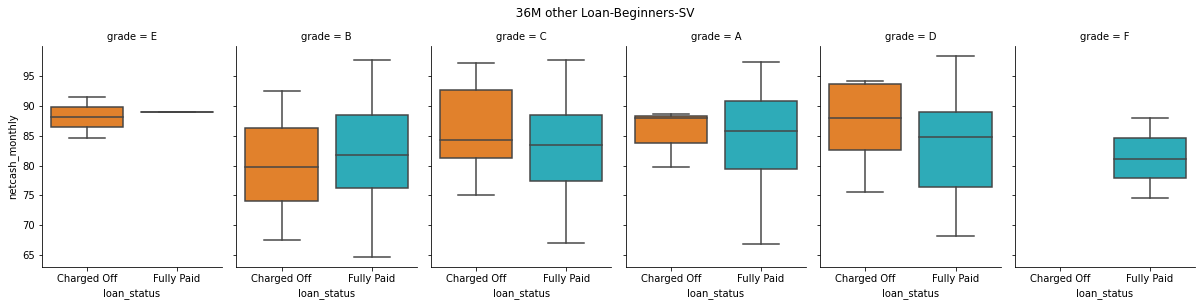

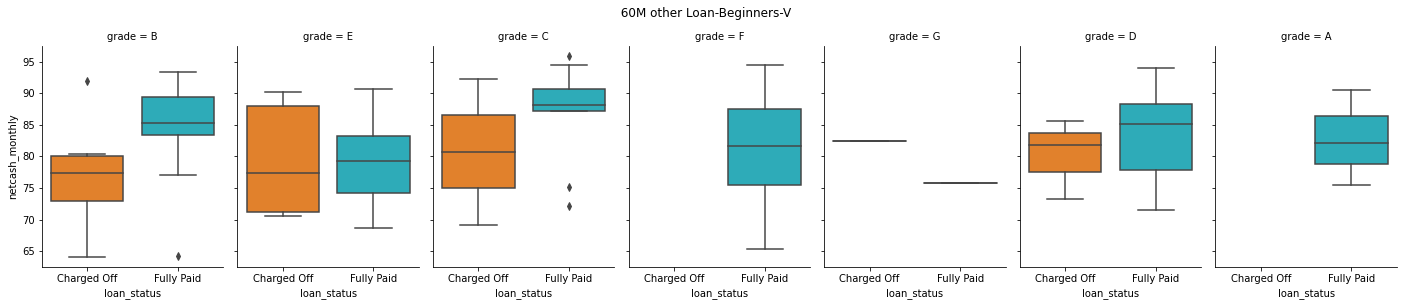

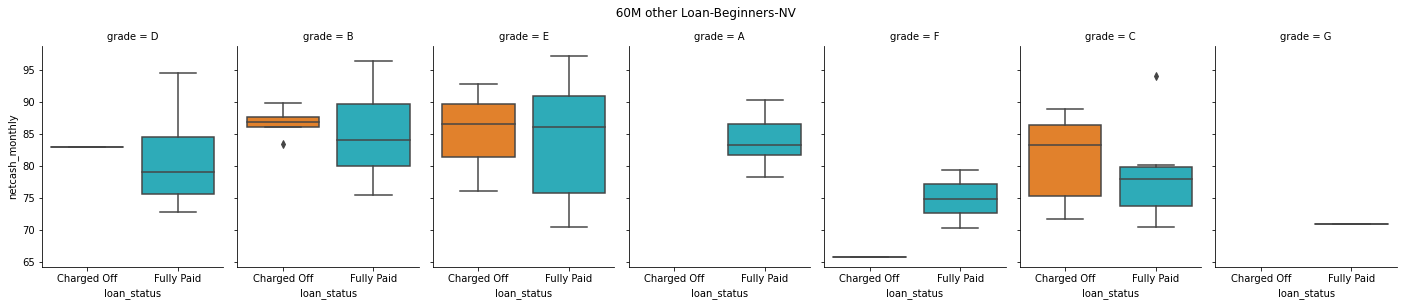

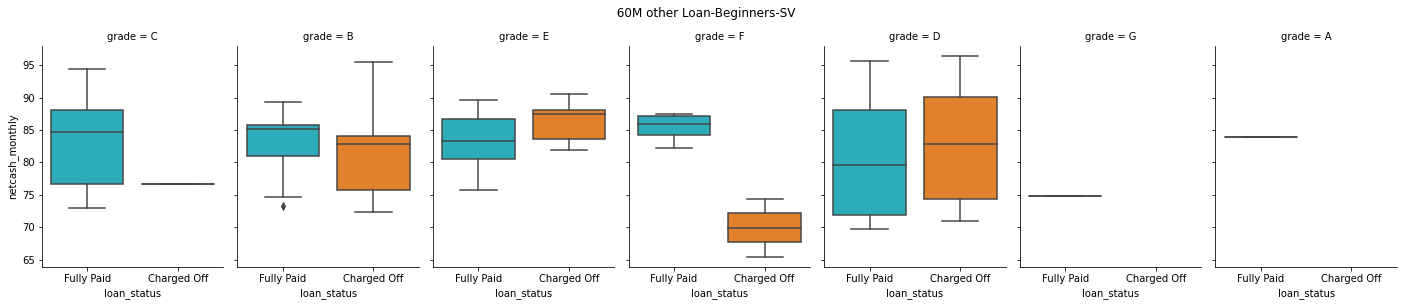

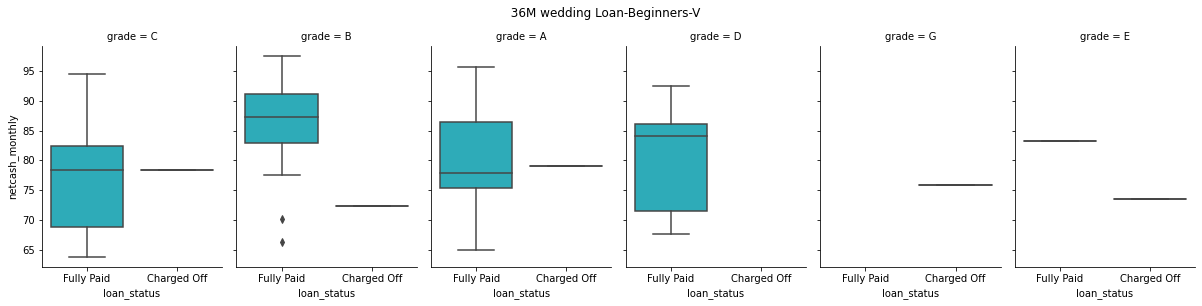

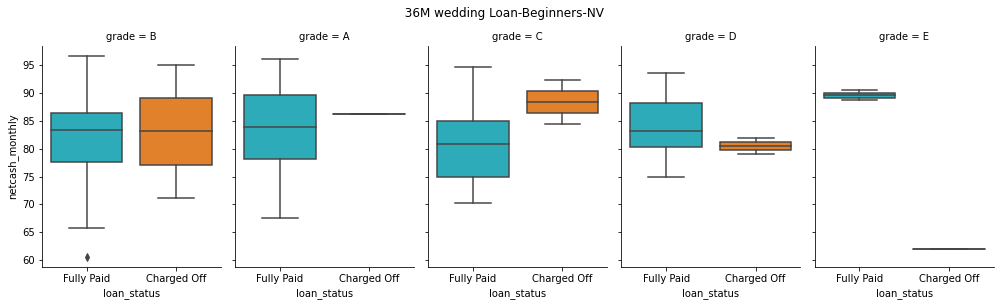

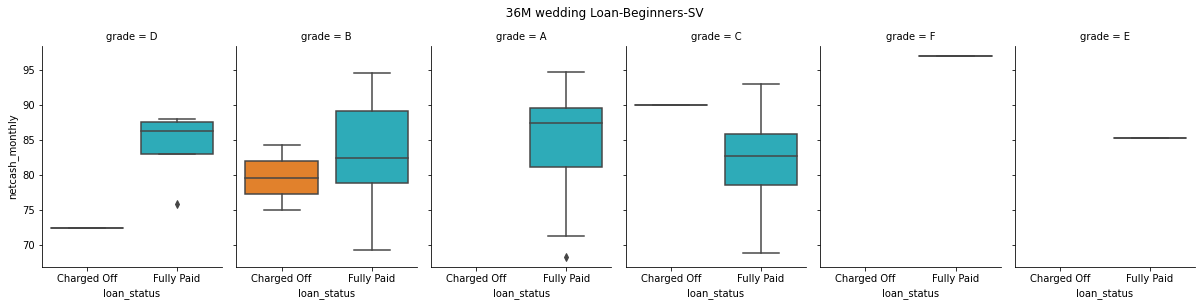

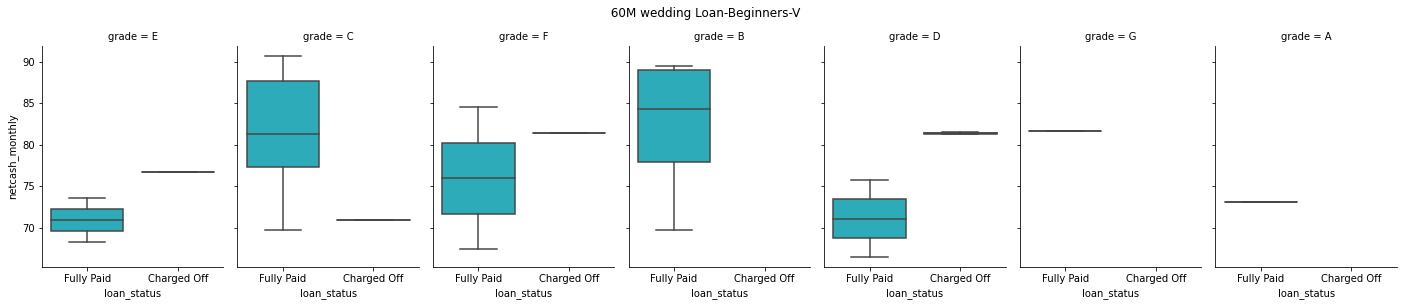

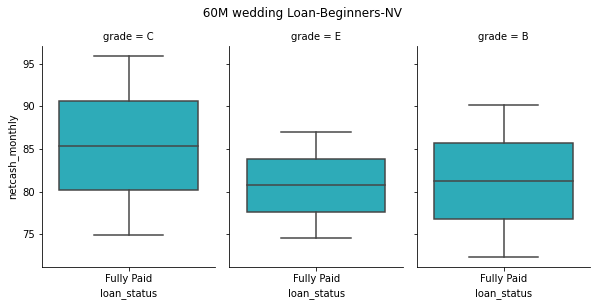

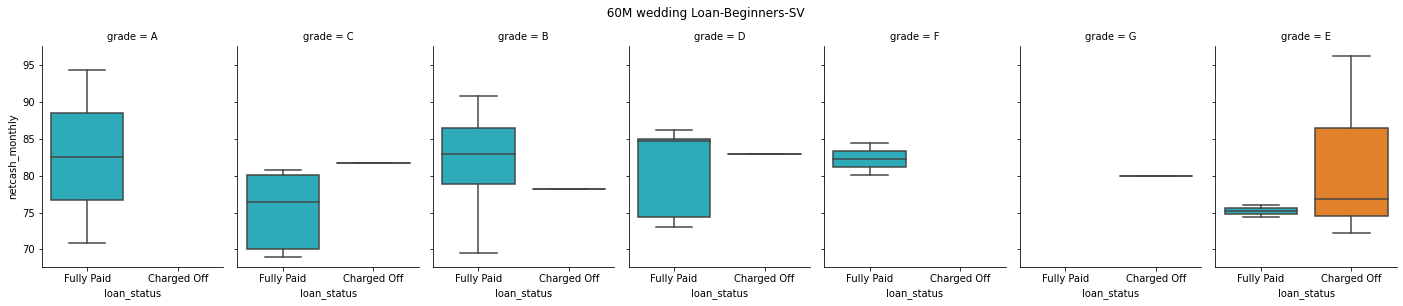

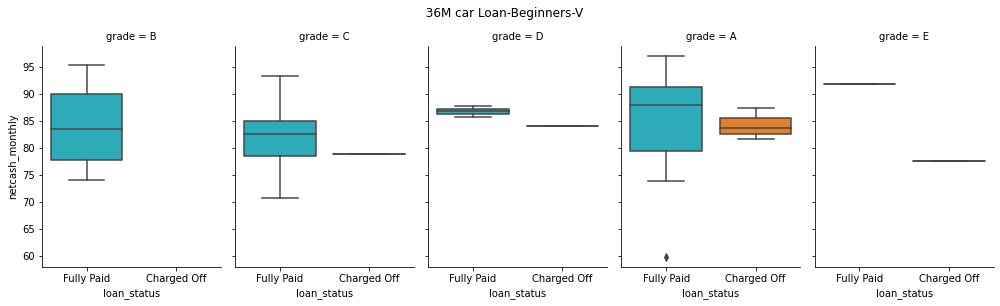

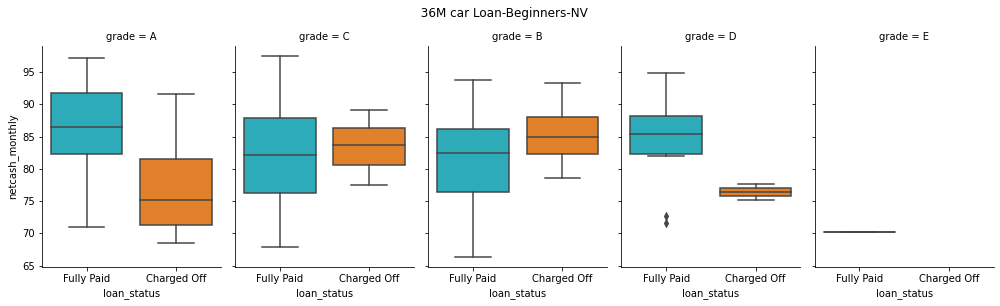

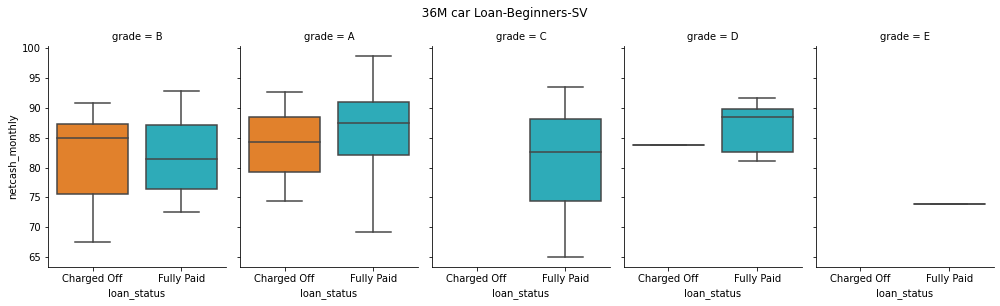

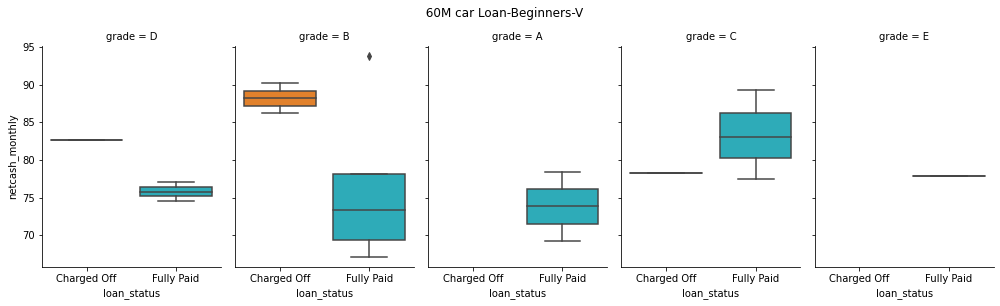

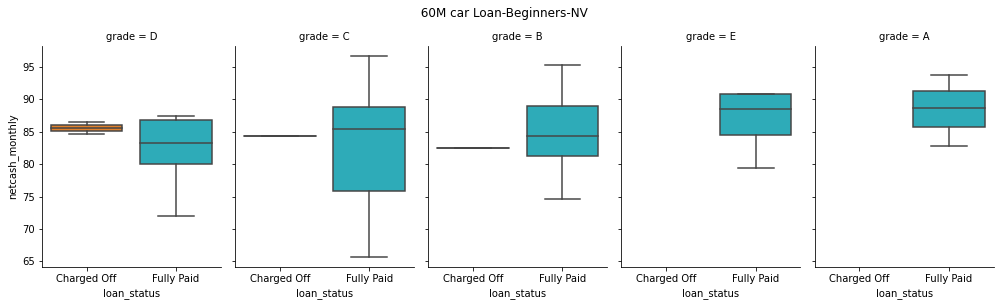

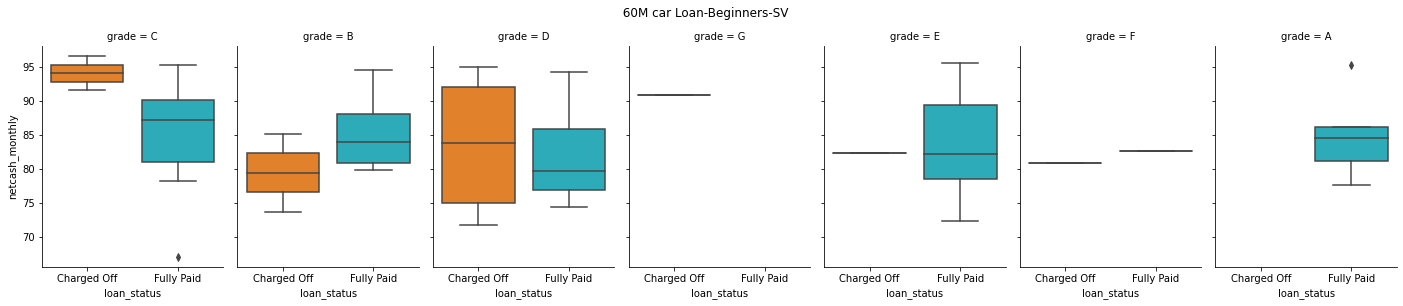

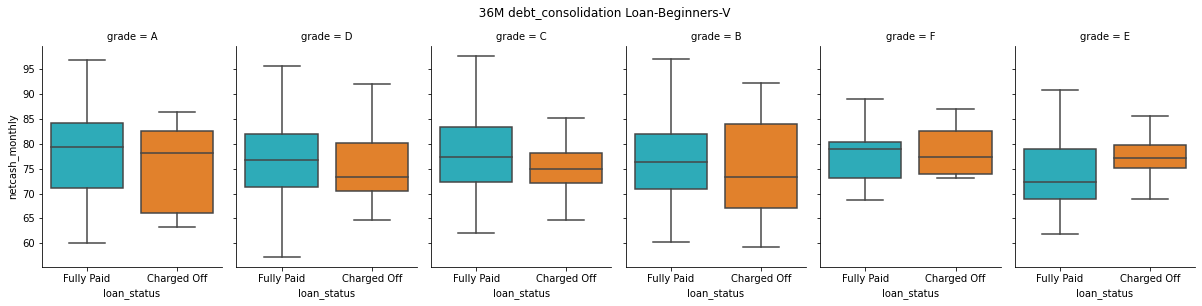

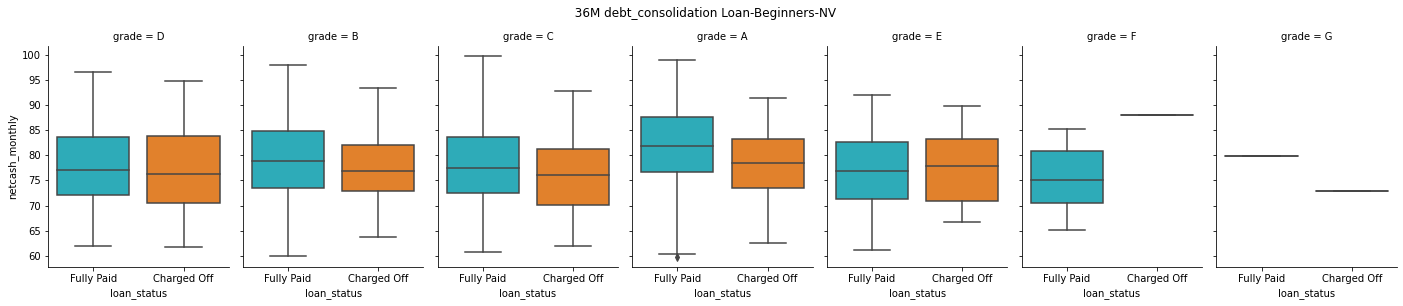

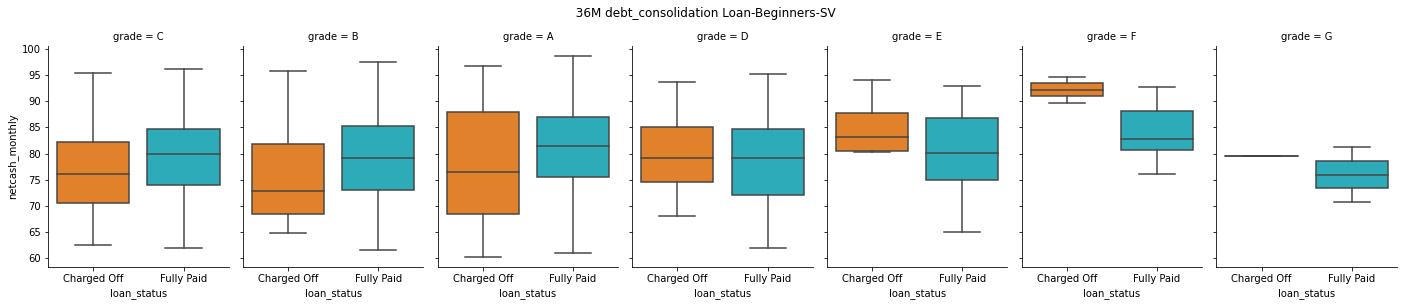

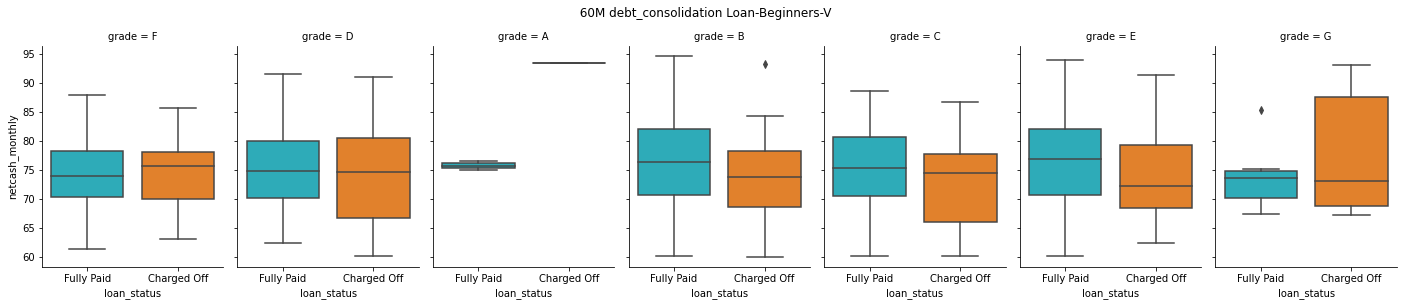

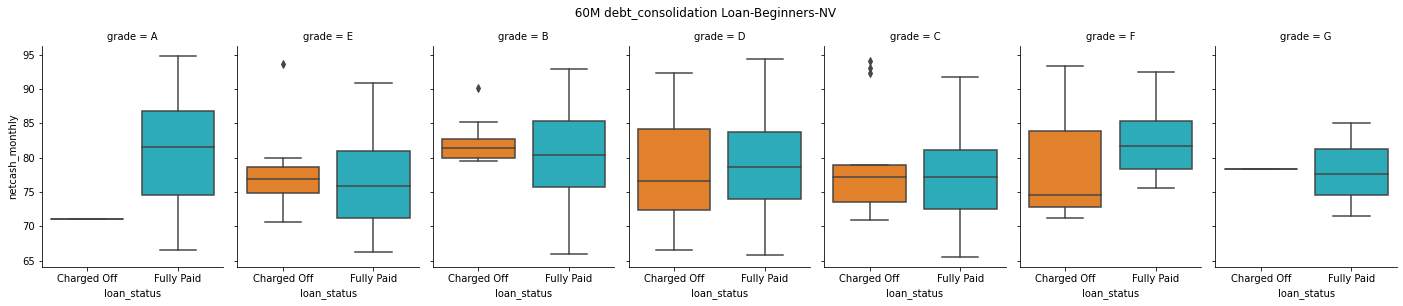

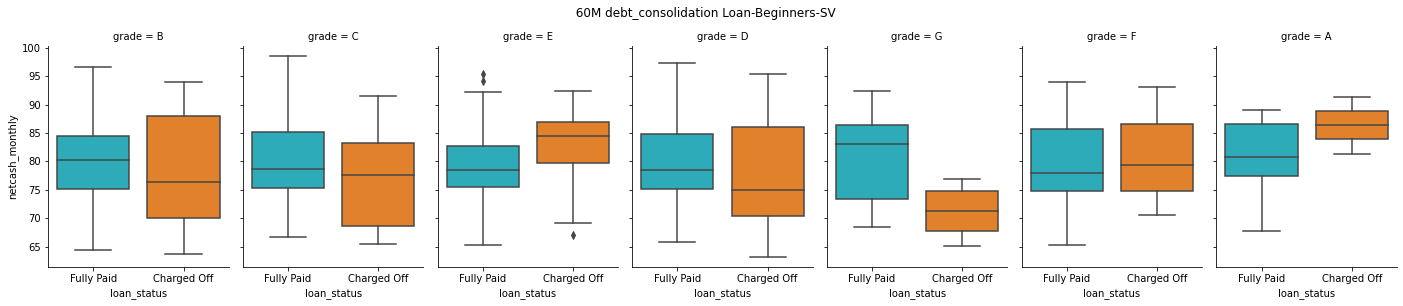

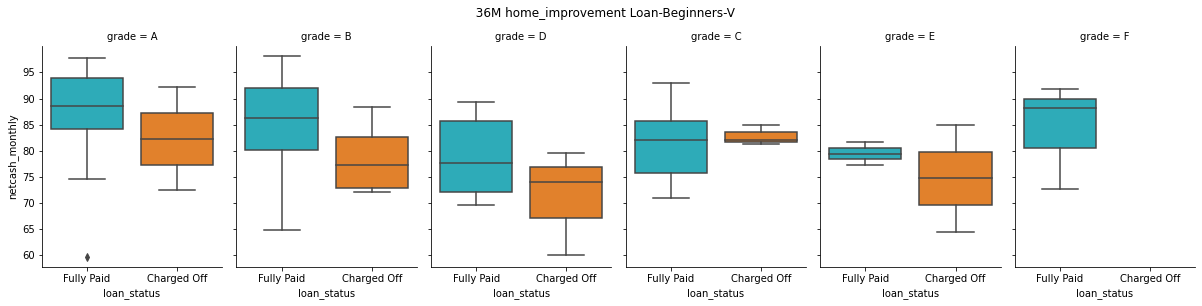

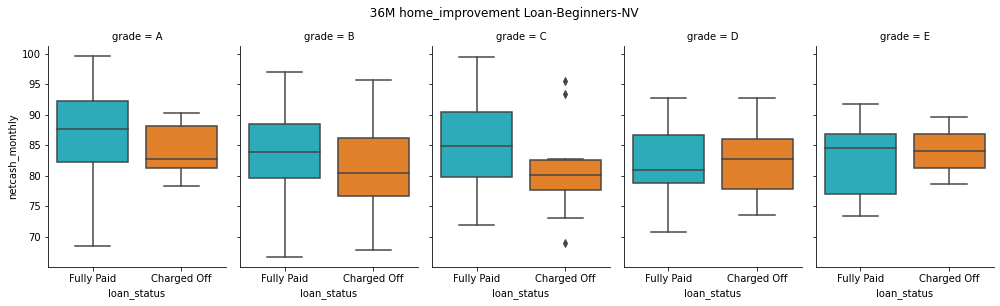

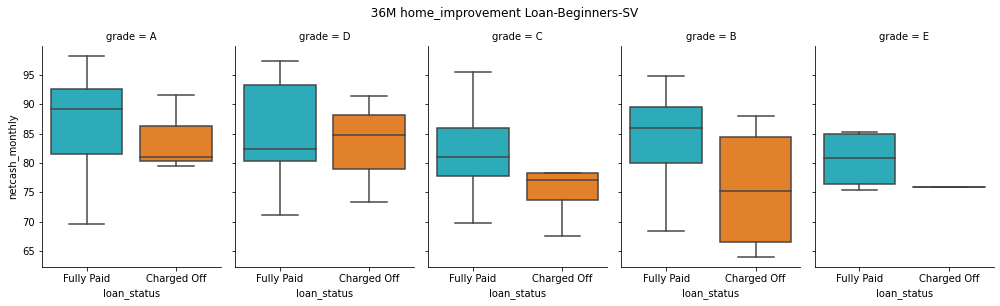

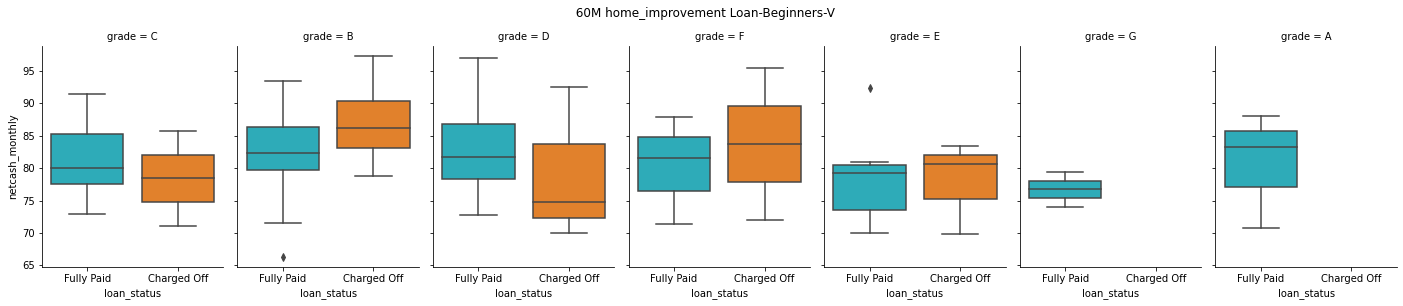

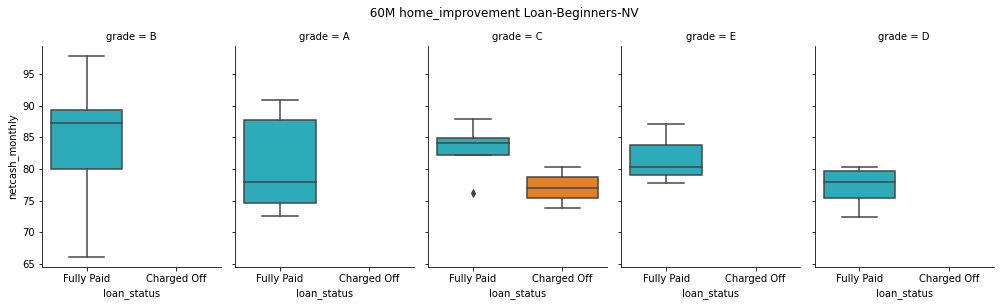

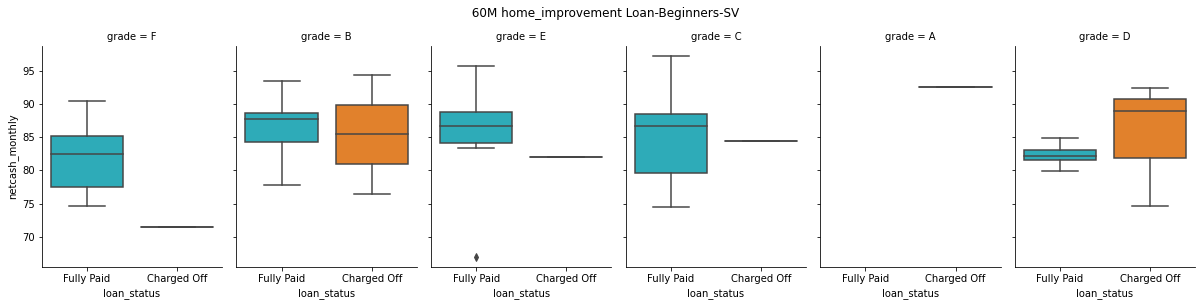

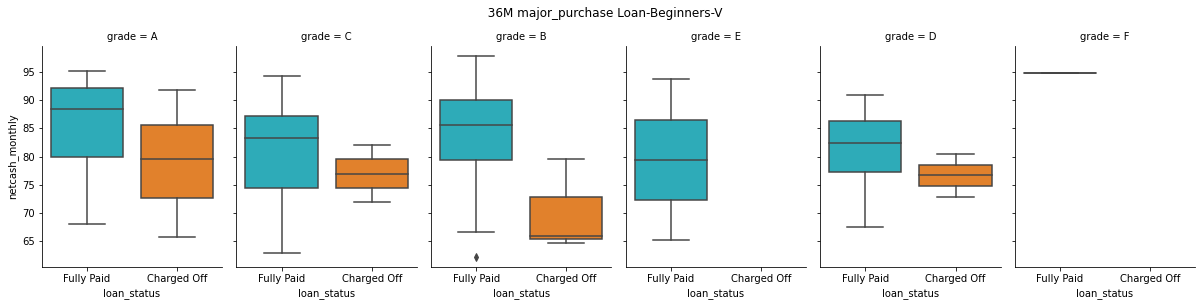

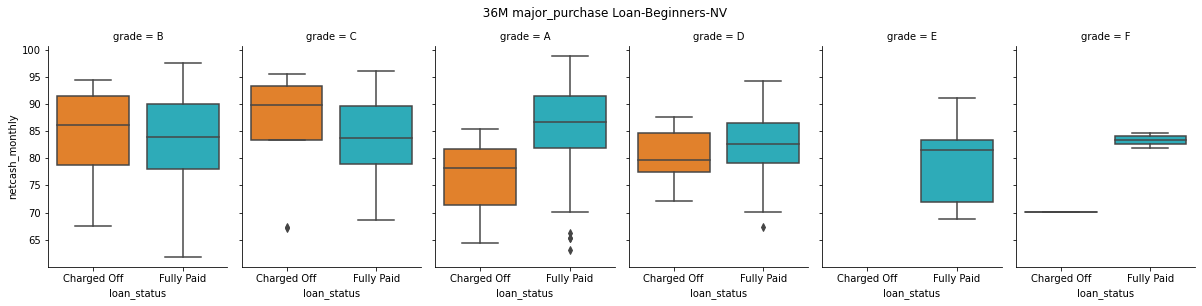

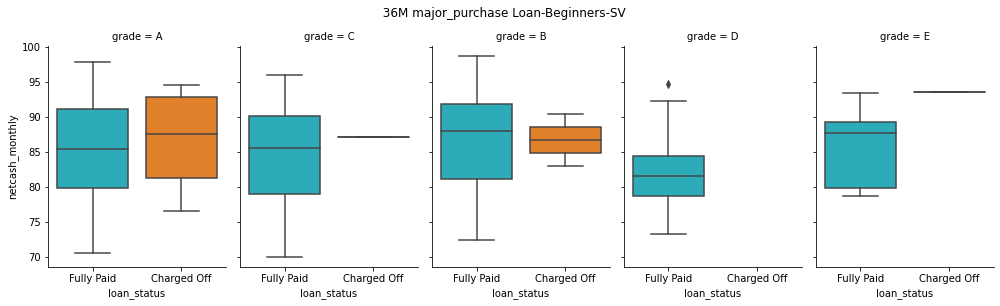

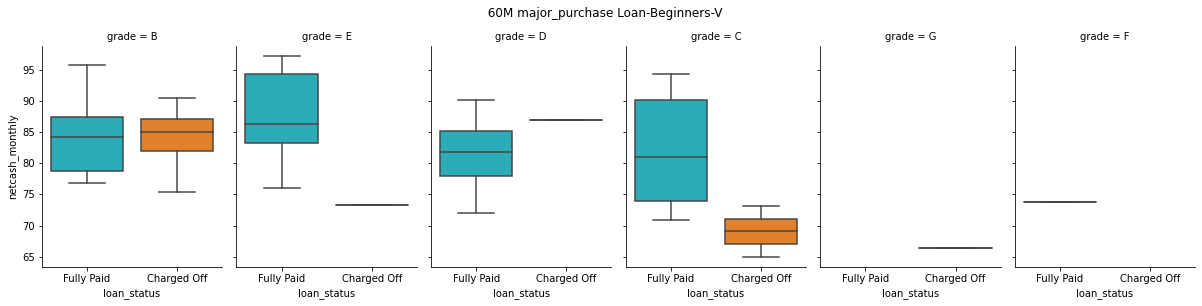

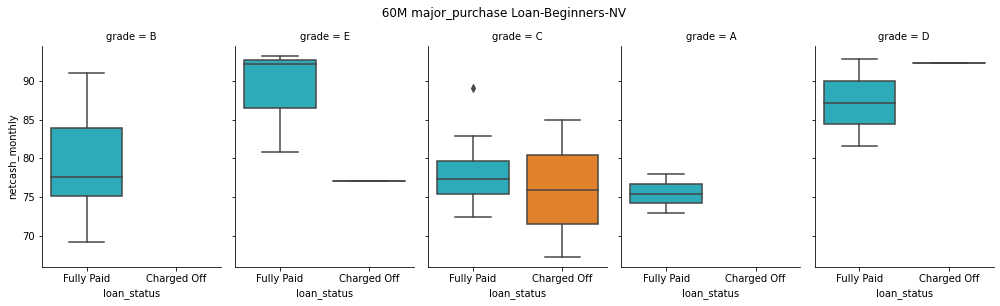

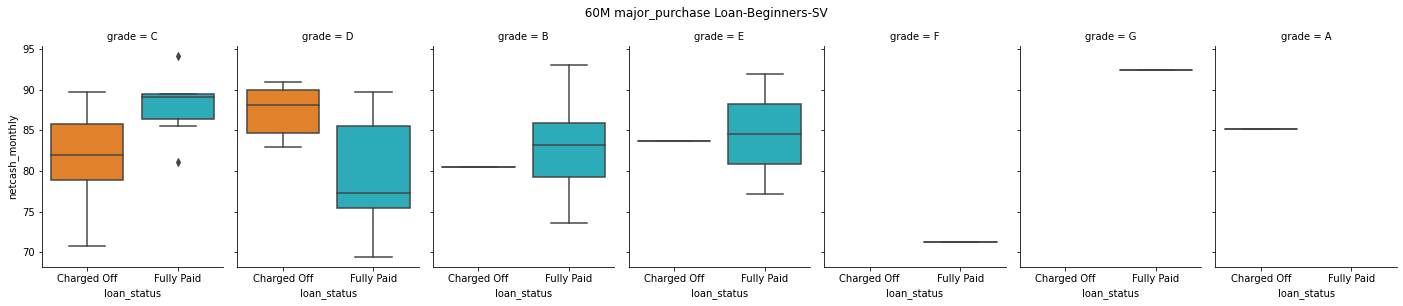

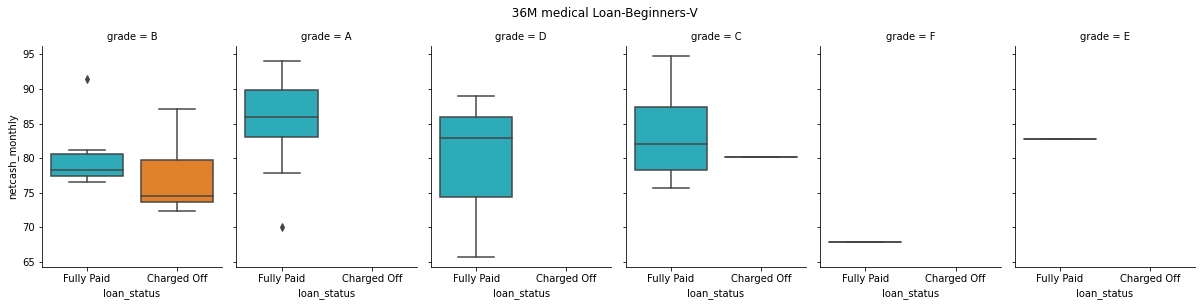

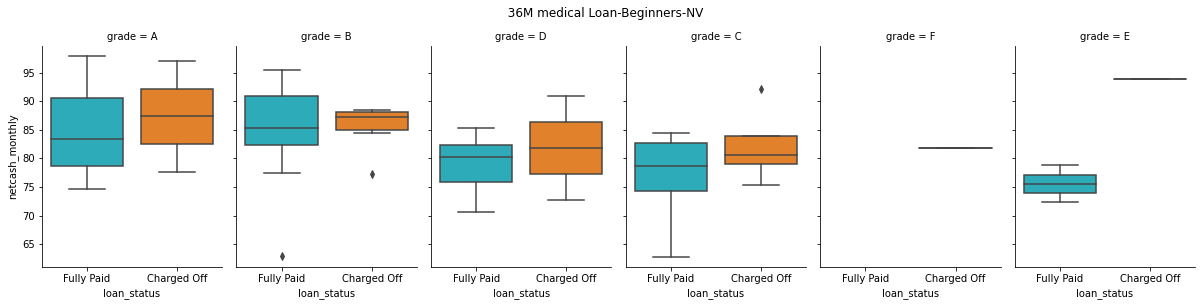

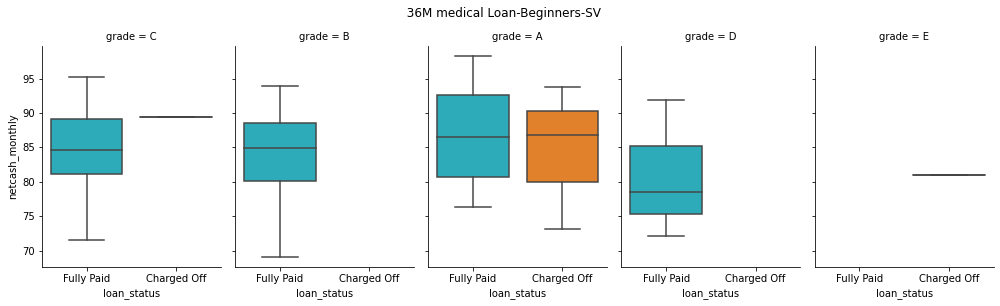

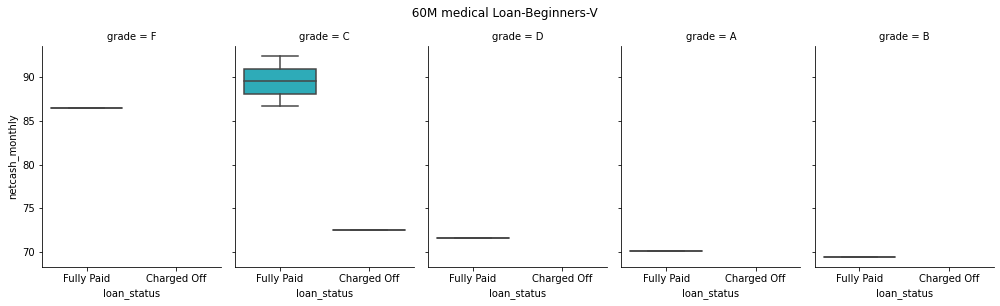

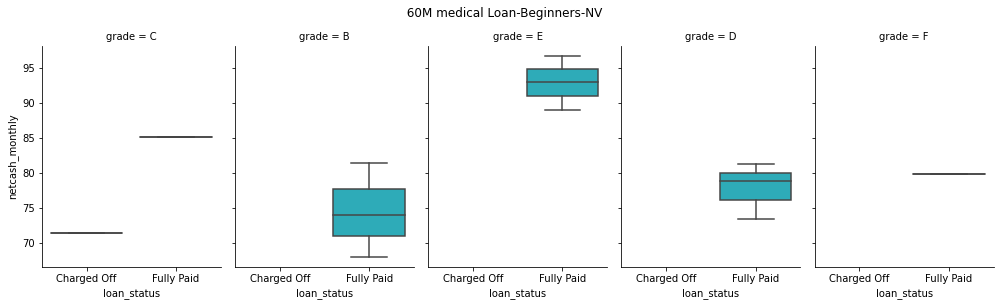

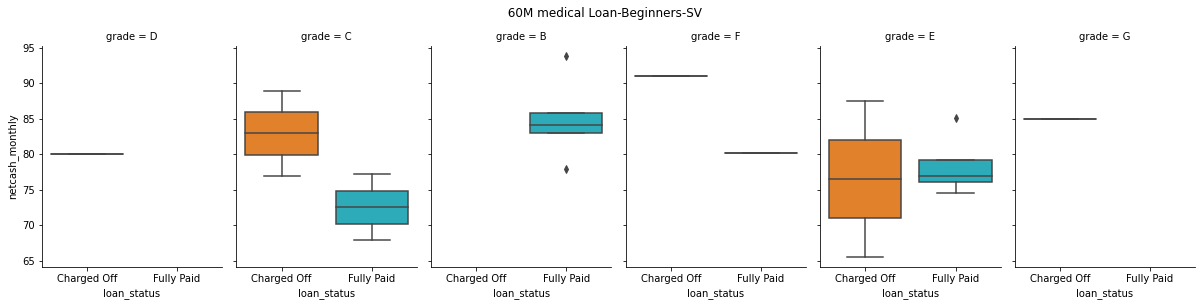

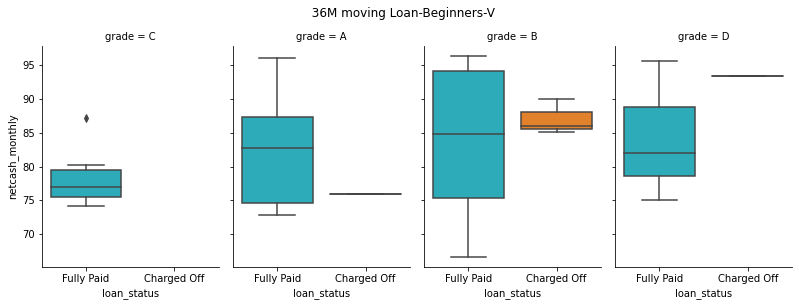

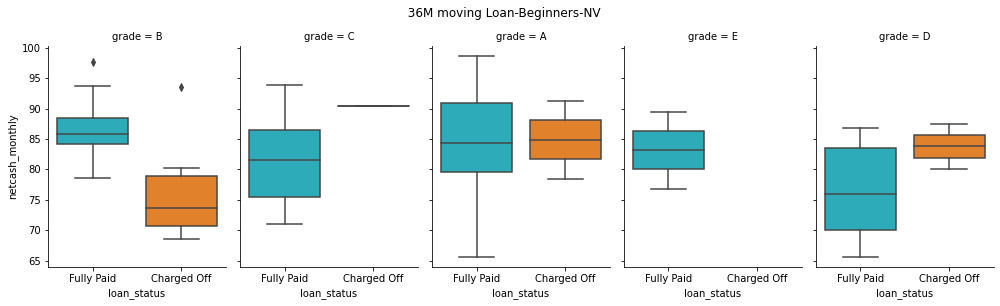

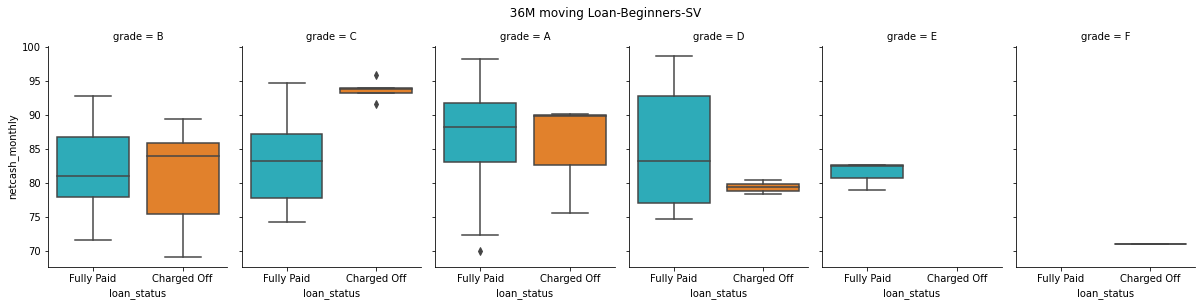

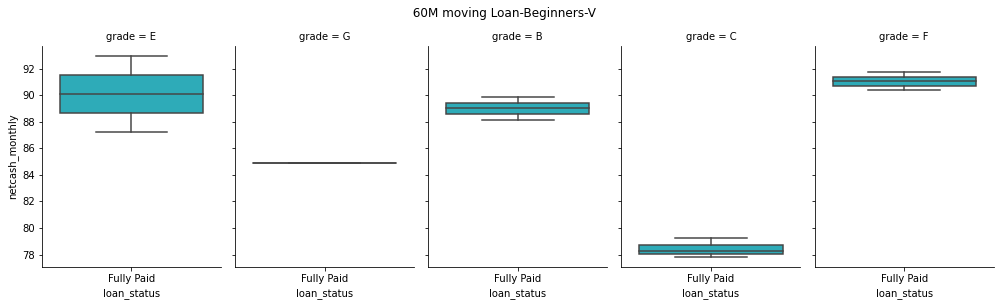

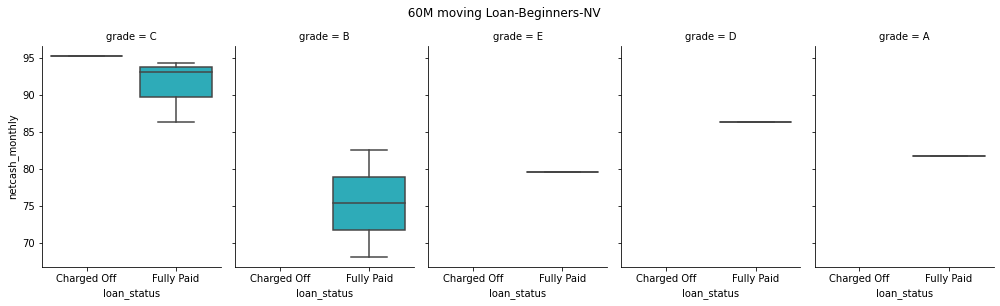

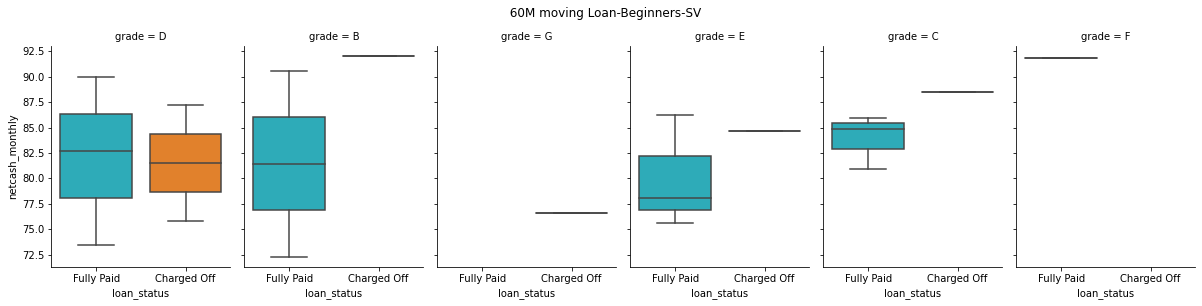

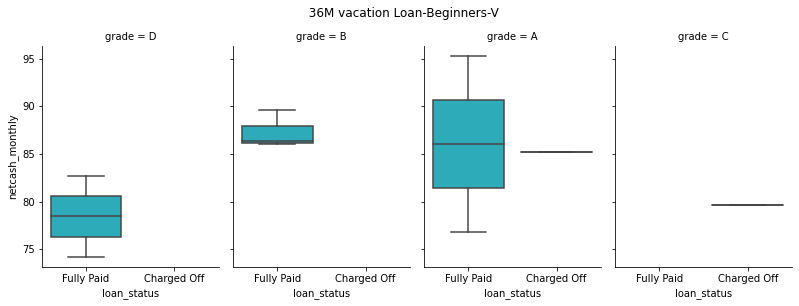

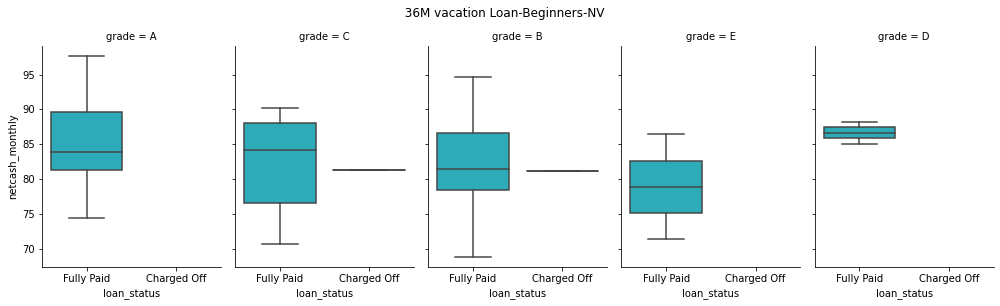

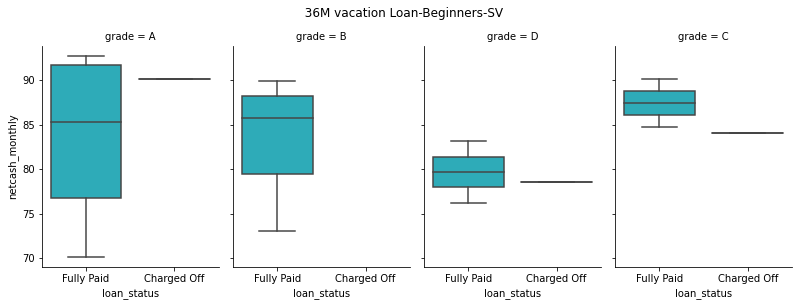

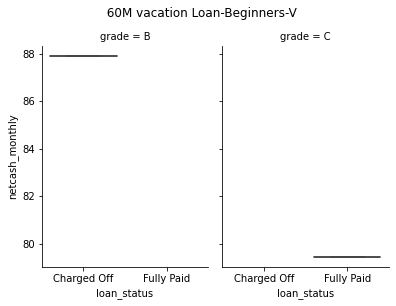

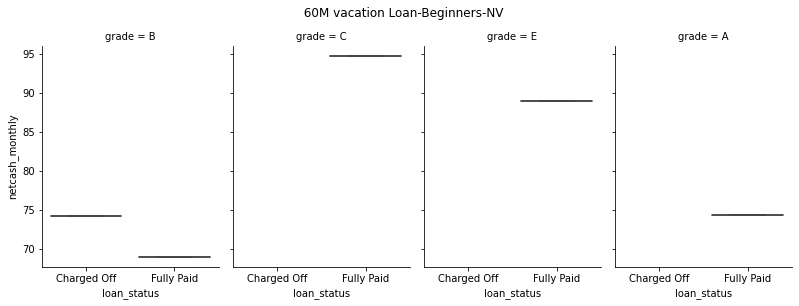

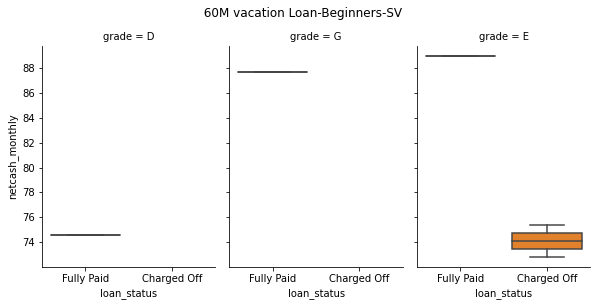

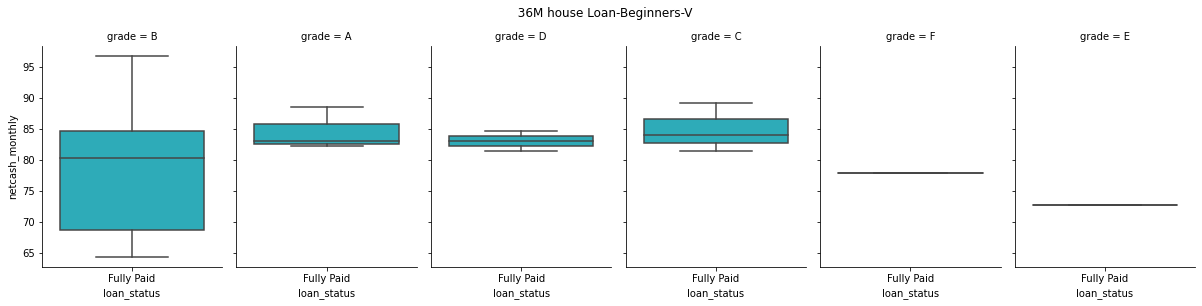

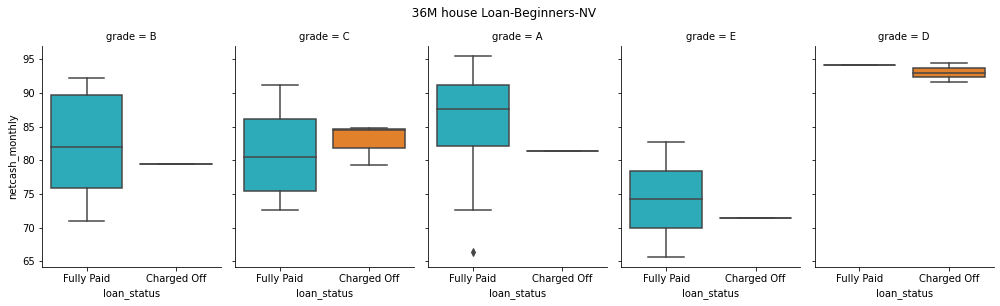

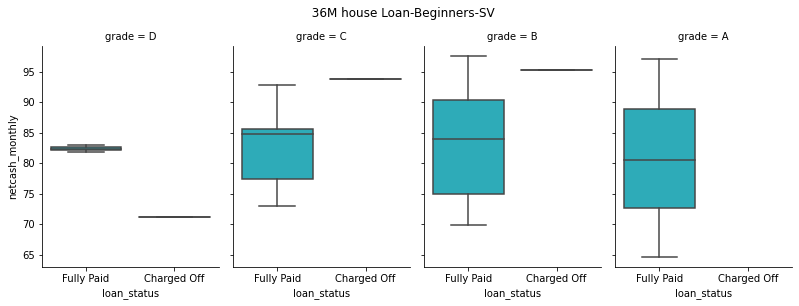

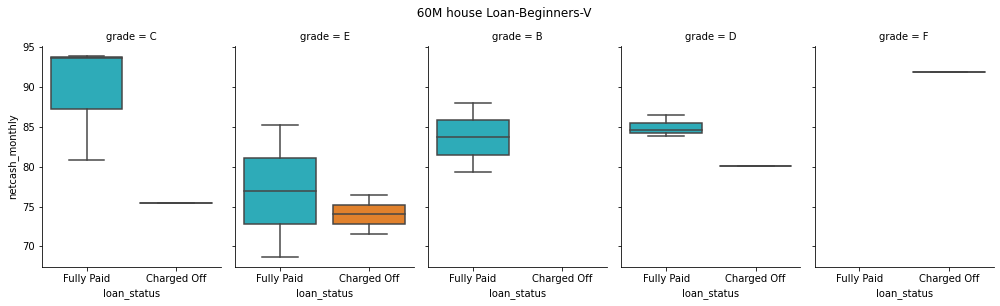

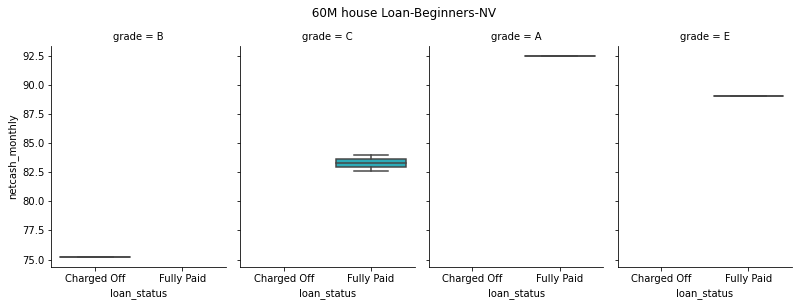

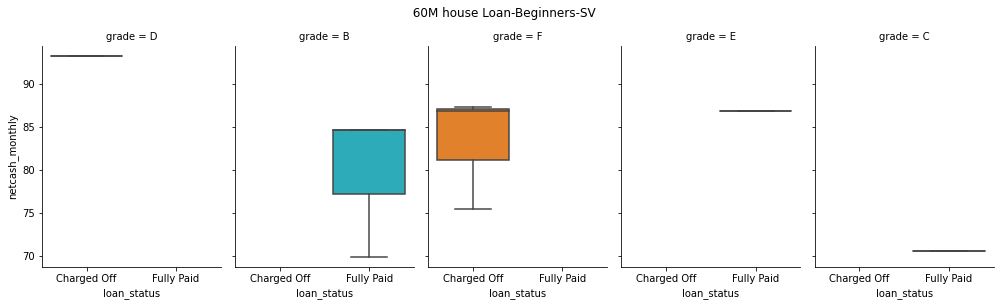

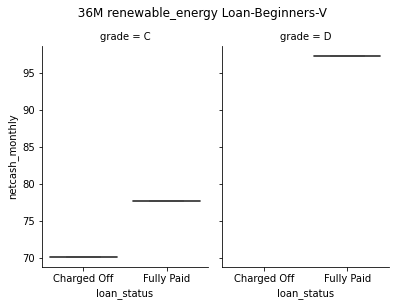

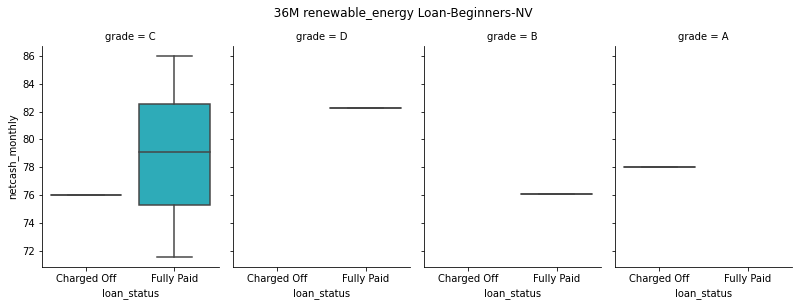

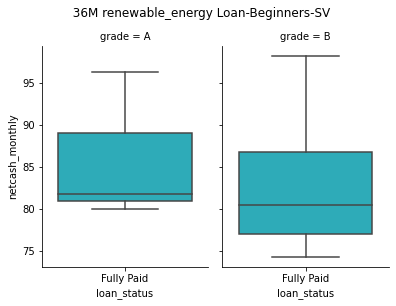

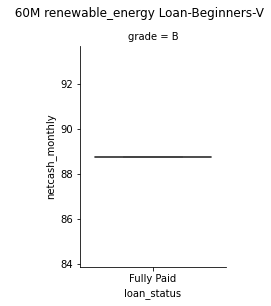

In [873]:
g151 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_begv, kind="box",height=4, aspect=.7,palette=palette)
g151.fig.suptitle("  36M credit_card Loan-Beginners-V",y=1.05)
g152=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_begnv, kind="box",height=4, aspect=.7,palette=palette)
g152.fig.suptitle("  36M credit_card Loan-Beginners-NV",y=1.05)

g153=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_begsv, kind="box",height=4, aspect=.7,palette=palette)
g153.fig.suptitle("  36M credit_card Loan-Beginners-SV",y=1.05)
g154=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_begv, kind="box",height=4, aspect=.7,palette=palette)
g154.fig.suptitle("  60M credit_card Loan-Beginners-V",y=1.05)

g155=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_begnv, kind="box",height=4, aspect=.7,palette=palette)
g155.fig.suptitle("  60M credit_card Loan-Beginners-NV",y=1.05)
g156=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_begsv, kind="box",height=4, aspect=.7,palette=palette)
g156.fig.suptitle("  60M credit_card Loan-Beginners-SV",y=1.05)

g161 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_begv, kind="box",height=4, aspect=.7,palette=palette)
g161.fig.suptitle("  36M small_business Loan-Beginners-V",y=1.05)
g162=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_begnv, kind="box",height=4, aspect=.7,palette=palette)
g162.fig.suptitle("  36M small_business Loan-Beginners-NV",y=1.05)

g163=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_begsv, kind="box",height=4, aspect=.7,palette=palette)
g163.fig.suptitle("  36M small_business Loan-Beginners-SV",y=1.05)
g164=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_begv, kind="box",height=4, aspect=.7,palette=palette)
g164.fig.suptitle("  60M small_business Loan-Beginners-V",y=1.05)

g165=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_begnv, kind="box",height=4, aspect=.7,palette=palette)
g165.fig.suptitle("  60M small_business Loan-Beginners-NV",y=1.05)
g166=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_begsv, kind="box",height=4, aspect=.7,palette=palette)
g166.fig.suptitle("  60M small_business Loan-Beginners-SV",y=1.05)

g171 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_begv, kind="box",height=4, aspect=.7,palette=palette)
g171.fig.suptitle("  36M other Loan-Beginners-V",y=1.05)
g172=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_begnv, kind="box",height=4, aspect=.7,palette=palette)
g172.fig.suptitle("  36M other Loan-Beginners-NV",y=1.05)

g173=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_begsv, kind="box",height=4, aspect=.7,palette=palette)
g173.fig.suptitle("  36M other Loan-Beginners-SV",y=1.05)
g174=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_begv, kind="box",height=4, aspect=.7,palette=palette)
g174.fig.suptitle("  60M other Loan-Beginners-V",y=1.05)

g175=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_begnv, kind="box",height=4, aspect=.7,palette=palette)
g175.fig.suptitle("  60M other Loan-Beginners-NV",y=1.05)
g176=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_begsv, kind="box",height=4, aspect=.7,palette=palette)
g176.fig.suptitle("  60M other Loan-Beginners-SV",y=1.05)

g181 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_begv, kind="box",height=4, aspect=.7,palette=palette)
g181.fig.suptitle("  36M wedding Loan-Beginners-V",y=1.05)
g182=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_begnv, kind="box",height=4, aspect=.7,palette=palette)
g182.fig.suptitle("  36M wedding Loan-Beginners-NV",y=1.05)

g183=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_begsv, kind="box",height=4, aspect=.7,palette=palette)
g183.fig.suptitle("  36M wedding Loan-Beginners-SV",y=1.05)
g184=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_begv, kind="box",height=4, aspect=.7,palette=palette)
g184.fig.suptitle("  60M wedding Loan-Beginners-V",y=1.05)

g185=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_begnv, kind="box",height=4, aspect=.7,palette=palette)
g185.fig.suptitle("  60M wedding Loan-Beginners-NV",y=1.05)
g186=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_begsv, kind="box",height=4, aspect=.7,palette=palette)
g186.fig.suptitle("  60M wedding Loan-Beginners-SV",y=1.05)

g191 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_begv, kind="box",height=4, aspect=.7,palette=palette)
g191.fig.suptitle("  36M car Loan-Beginners-V",y=1.05)
g192=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_begnv, kind="box",height=4, aspect=.7,palette=palette)
g192.fig.suptitle("  36M car Loan-Beginners-NV",y=1.05)

g193=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_begsv, kind="box",height=4, aspect=.7,palette=palette)
g193.fig.suptitle("  36M car Loan-Beginners-SV",y=1.05)
g194=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_begv, kind="box",height=4, aspect=.7,palette=palette)
g194.fig.suptitle("  60M car Loan-Beginners-V",y=1.05)

g195=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_begnv, kind="box",height=4, aspect=.7,palette=palette)
g195.fig.suptitle("  60M car Loan-Beginners-NV",y=1.05)
g196=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_begsv, kind="box",height=4, aspect=.7,palette=palette)
g196.fig.suptitle("  60M car Loan-Beginners-SV",y=1.05)

g201 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_begv, kind="box",height=4, aspect=.7,palette=palette)
g201.fig.suptitle("  36M debt_consolidation Loan-Beginners-V",y=1.05)
g202=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_begnv, kind="box",height=4, aspect=.7,palette=palette)
g202.fig.suptitle("  36M debt_consolidation Loan-Beginners-NV",y=1.05)

g203=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_begsv, kind="box",height=4, aspect=.7,palette=palette)
g203.fig.suptitle("  36M debt_consolidation Loan-Beginners-SV",y=1.05)
g204=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_begv, kind="box",height=4, aspect=.7,palette=palette)
g204.fig.suptitle("  60M debt_consolidation Loan-Beginners-V",y=1.05)

g205=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_begnv, kind="box",height=4, aspect=.7,palette=palette)
g205.fig.suptitle("  60M debt_consolidation Loan-Beginners-NV",y=1.05)
g206=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_begsv, kind="box",height=4, aspect=.7,palette=palette)
g206.fig.suptitle("  60M debt_consolidation Loan-Beginners-SV",y=1.05)

g211 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_begv, kind="box",height=4, aspect=.7,palette=palette)
g211.fig.suptitle("  36M home_improvement Loan-Beginners-V",y=1.05)
g212=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_begnv, kind="box",height=4, aspect=.7,palette=palette)
g212.fig.suptitle("  36M home_improvement Loan-Beginners-NV",y=1.05)

g213=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_begsv, kind="box",height=4, aspect=.7,palette=palette)
g213.fig.suptitle("  36M home_improvement Loan-Beginners-SV",y=1.05)
g214=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_begv, kind="box",height=4, aspect=.7,palette=palette)
g214.fig.suptitle("  60M home_improvement Loan-Beginners-V",y=1.05)

g215=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_begnv, kind="box",height=4, aspect=.7,palette=palette)
g215.fig.suptitle("  60M home_improvement Loan-Beginners-NV",y=1.05)
g216=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_begsv, kind="box",height=4, aspect=.7,palette=palette)
g216.fig.suptitle("  60M home_improvement Loan-Beginners-SV",y=1.05)

g221 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_begv, kind="box",height=4, aspect=.7,palette=palette)
g221.fig.suptitle("  36M major_purchase Loan-Beginners-V",y=1.05)
g222=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_begnv, kind="box",height=4, aspect=.7,palette=palette)
g222.fig.suptitle("  36M major_purchase Loan-Beginners-NV",y=1.05)

g223=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_begsv, kind="box",height=4, aspect=.7,palette=palette)
g223.fig.suptitle("  36M major_purchase Loan-Beginners-SV",y=1.05)
g224=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_begv, kind="box",height=4, aspect=.7,palette=palette)
g224.fig.suptitle("  60M major_purchase Loan-Beginners-V",y=1.05)

g225=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_begnv, kind="box",height=4, aspect=.7,palette=palette)
g225.fig.suptitle("  60M major_purchase Loan-Beginners-NV",y=1.05)
g226=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_begsv, kind="box",height=4, aspect=.7,palette=palette)
g226.fig.suptitle("  60M major_purchase Loan-Beginners-SV",y=1.05)

g231 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_begv, kind="box",height=4, aspect=.7,palette=palette)
g231.fig.suptitle("  36M medical Loan-Beginners-V",y=1.05)
g232=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_begnv, kind="box",height=4, aspect=.7,palette=palette)
g232.fig.suptitle("  36M medical Loan-Beginners-NV",y=1.05)

g233=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_begsv, kind="box",height=4, aspect=.7,palette=palette)
g233.fig.suptitle("  36M medical Loan-Beginners-SV",y=1.05)
g234=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_begv, kind="box",height=4, aspect=.7,palette=palette)
g234.fig.suptitle("  60M medical Loan-Beginners-V",y=1.05)

g235=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_begnv, kind="box",height=4, aspect=.7,palette=palette)
g235.fig.suptitle("  60M medical Loan-Beginners-NV",y=1.05)
g236=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_begsv, kind="box",height=4, aspect=.7,palette=palette)
g236.fig.suptitle("  60M medical Loan-Beginners-SV",y=1.05)

g241 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_begv, kind="box",height=4, aspect=.7,palette=palette)
g241.fig.suptitle("  36M moving Loan-Beginners-V",y=1.05)
g242=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_begnv, kind="box",height=4, aspect=.7,palette=palette)
g242.fig.suptitle("  36M moving Loan-Beginners-NV",y=1.05)

g243=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_begsv, kind="box",height=4, aspect=.7,palette=palette)
g243.fig.suptitle("  36M moving Loan-Beginners-SV",y=1.05)
g244=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_begv, kind="box",height=4, aspect=.7,palette=palette)
g244.fig.suptitle("  60M moving Loan-Beginners-V",y=1.05)

g245=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_begnv, kind="box",height=4, aspect=.7,palette=palette)
g245.fig.suptitle("  60M moving Loan-Beginners-NV",y=1.05)
g246=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_begsv, kind="box",height=4, aspect=.7,palette=palette)
g246.fig.suptitle("  60M moving Loan-Beginners-SV",y=1.05)

g251 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_begv, kind="box",height=4, aspect=.7,palette=palette)
g251.fig.suptitle("  36M vacation Loan-Beginners-V",y=1.05)
g252=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_begnv, kind="box",height=4, aspect=.7,palette=palette)
g252.fig.suptitle("  36M vacation Loan-Beginners-NV",y=1.05)

g253=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_begsv, kind="box",height=4, aspect=.7,palette=palette)
g253.fig.suptitle("  36M vacation Loan-Beginners-SV",y=1.05)
g254=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_begv, kind="box",height=4, aspect=.7,palette=palette)
g254.fig.suptitle("  60M vacation Loan-Beginners-V",y=1.05)

g255=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_begnv, kind="box",height=4, aspect=.7,palette=palette)
g255.fig.suptitle("  60M vacation Loan-Beginners-NV",y=1.05)
g256=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_begsv, kind="box",height=4, aspect=.7,palette=palette)
g256.fig.suptitle("  60M vacation Loan-Beginners-SV",y=1.05)

g261 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_begv, kind="box",height=4, aspect=.7,palette=palette)
g261.fig.suptitle("  36M house Loan-Beginners-V",y=1.05)
g262=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_begnv, kind="box",height=4, aspect=.7,palette=palette)
g262.fig.suptitle("  36M house Loan-Beginners-NV",y=1.05)

g263=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_begsv, kind="box",height=4, aspect=.7,palette=palette)
g263.fig.suptitle("  36M house Loan-Beginners-SV",y=1.05)
g264=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_begv, kind="box",height=4, aspect=.7,palette=palette)
g264.fig.suptitle("  60M house Loan-Beginners-V",y=1.05)

g265=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_begnv, kind="box",height=4, aspect=.7,palette=palette)
g265.fig.suptitle("  60M house Loan-Beginners-NV",y=1.05)
g266=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_begsv, kind="box",height=4, aspect=.7,palette=palette)
g266.fig.suptitle("  60M house Loan-Beginners-SV",y=1.05)

g271 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_begv, kind="box",height=4, aspect=.7,palette=palette)
g271.fig.suptitle("  36M renewable_energy Loan-Beginners-V",y=1.05)
g272=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_begnv, kind="box",height=4, aspect=.7,palette=palette)
g272.fig.suptitle("  36M renewable_energy Loan-Beginners-NV",y=1.05)

g273=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_begsv, kind="box",height=4, aspect=.7,palette=palette)
g273.fig.suptitle("  36M renewable_energy Loan-Beginners-SV",y=1.05)
g274=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_begv, kind="box",height=4, aspect=.7,palette=palette)
g274.fig.suptitle("  60M renewable_energy Loan-Beginners-V",y=1.05)

g275=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_begnv, kind="box",height=4, aspect=.7,palette=palette)
g275.fig.suptitle("  60M renewable_energy Loan-Beginners-NV",y=1.05)
g276=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_begsv, kind="box",height=4, aspect=.7,palette=palette)
g276.fig.suptitle("  60M renewable_energy Loan-Beginners-SV",y=1.05)

g281 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_begv, kind="box",height=4, aspect=.7,palette=palette)
g281.fig.suptitle("  36M educational Loan-Beginners-V",y=1.05)
g282=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_begnv, kind="box",height=4, aspect=.7,palette=palette)
g282.fig.suptitle("  36M educational Loan-Beginners-NV",y=1.05)

g283=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_begsv, kind="box",height=4, aspect=.7,palette=palette)
g283.fig.suptitle("  36M educational Loan-Beginners-SV",y=1.05)
g284=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_begv, kind="box",height=4, aspect=.7,palette=palette)
g284.fig.suptitle("  60M educational Loan-Beginners-V",y=1.05)

g285=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_begnv, kind="box",height=4, aspect=.7,palette=palette)
g285.fig.suptitle("  60M educational Loan-Beginners-NV",y=1.05)
g286=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_begsv, kind="box",height=4, aspect=.7,palette=palette)
g286.fig.suptitle("  60M educational Loan-Beginners-SV",y=1.05)


In [874]:
loan36cc_junv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36cc_junnv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36cc_junsv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60cc_junv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60cc_junnv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60cc_junsv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36sb_junv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36sb_junnv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36sb_junsv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60sb_junv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60sb_junnv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60sb_junsv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36oth_junv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36oth_junnv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36oth_junsv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60oth_junv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60oth_junnv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60oth_junsv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36wd_junv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36wd_junnv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36wd_junsv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60wd_junv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60wd_junnv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60wd_junsv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36car_junv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36car_junnv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36car_junsv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60car_junv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60car_junnv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60car_junsv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36dc_junv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36dc_junnv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36dc_junsv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60dc_junv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60dc_junnv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60dc_junsv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hi_junv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36hi_junnv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hi_junsv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hi_junv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60hi_junnv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hi_junsv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mp_junv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36mp_junnv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mp_junsv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mp_junv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60mp_junnv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mp_junsv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36med_junv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36med_junnv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36med_junsv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60med_junv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60med_junnv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60med_junsv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mov_junv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36mov_junnv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mov_junsv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mov_junv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60mov_junnv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mov_junsv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36vac_junv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36vac_junnv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36vac_junsv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60vac_junv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60vac_junnv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60vac_junsv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hou_junv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36hou_junnv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hou_junsv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hou_junv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60hou_junnv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hou_junsv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36re_junv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36re_junnv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36re_junsv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60re_junv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60re_junnv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60re_junsv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]

loan36edu_junv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Verified")]
loan36edu_junnv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Not Verified")]

loan36edu_junsv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="junior")&(loan_36M["verification_status"]=="Source Verified")]
loan60edu_junv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Verified")]

loan60edu_junnv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Not Verified")]
loan60edu_junsv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="junior")&(loan_60M["verification_status"]=="Source Verified")]


C:\Users\e880156\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Text(0.5, 1.05, '  60M educational Loan-Juniors-SV')

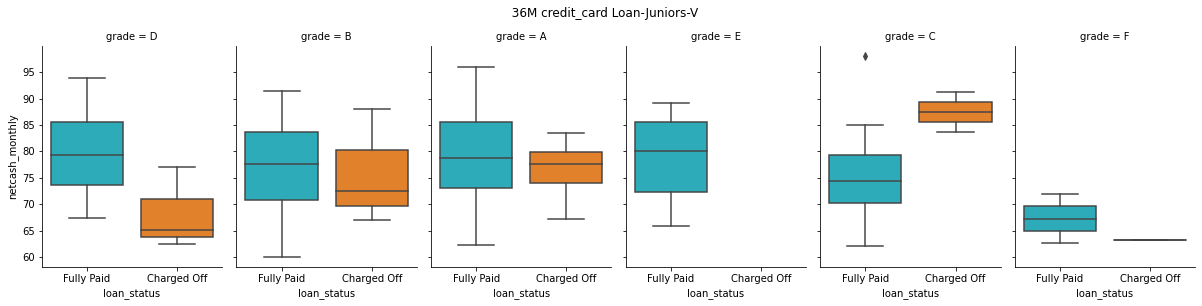

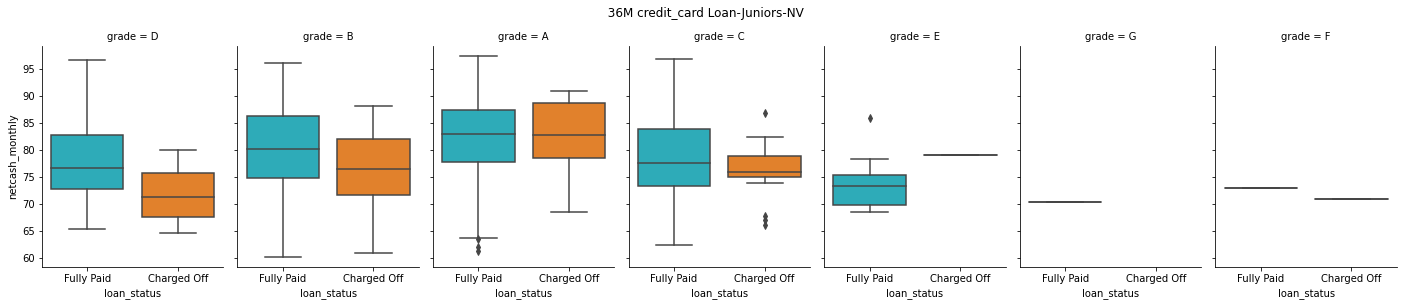

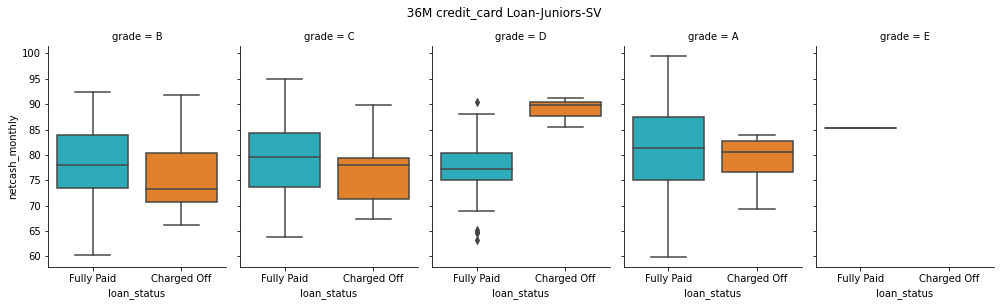

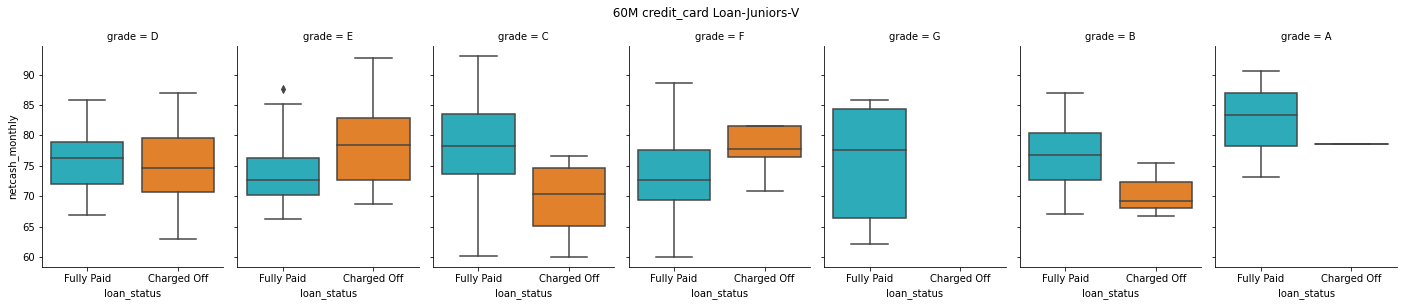

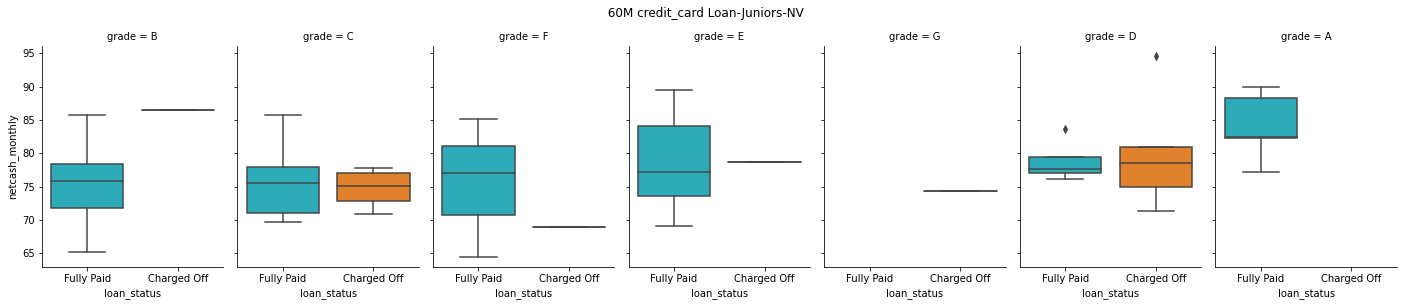

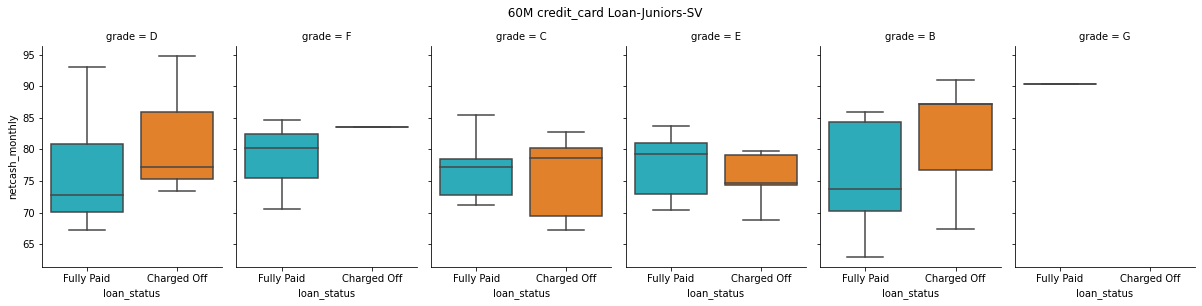

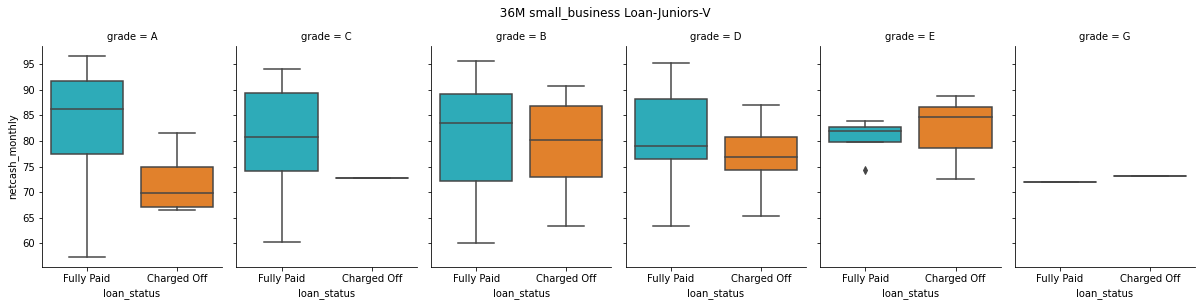

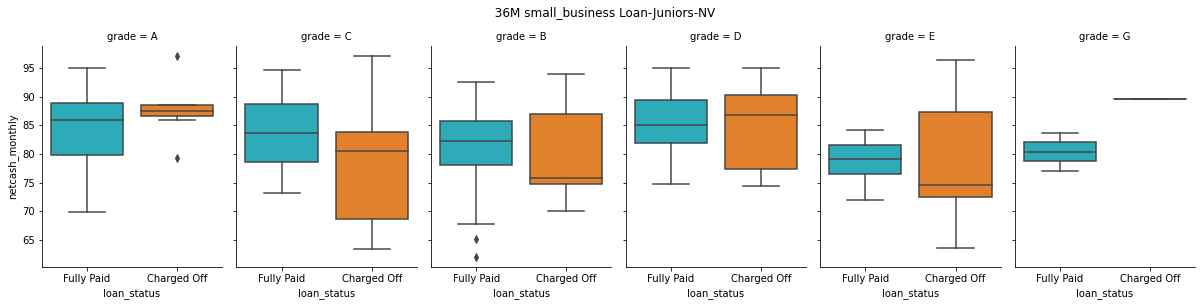

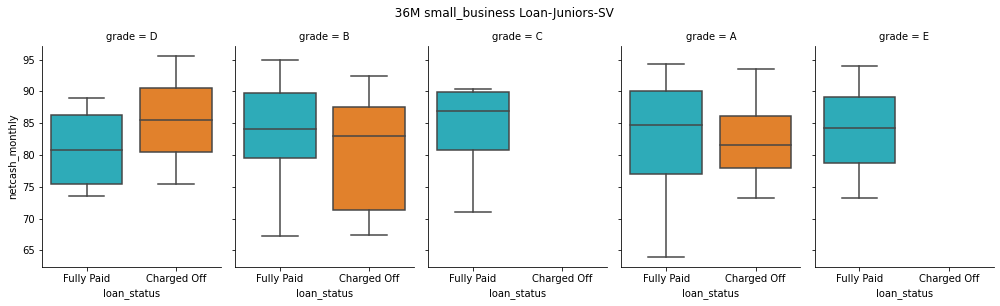

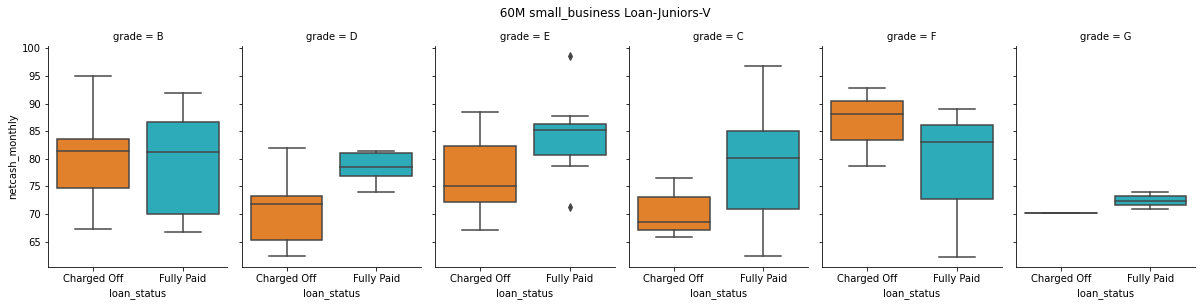

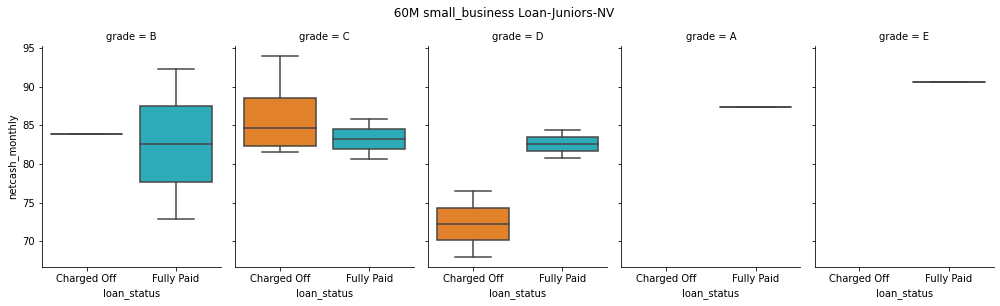

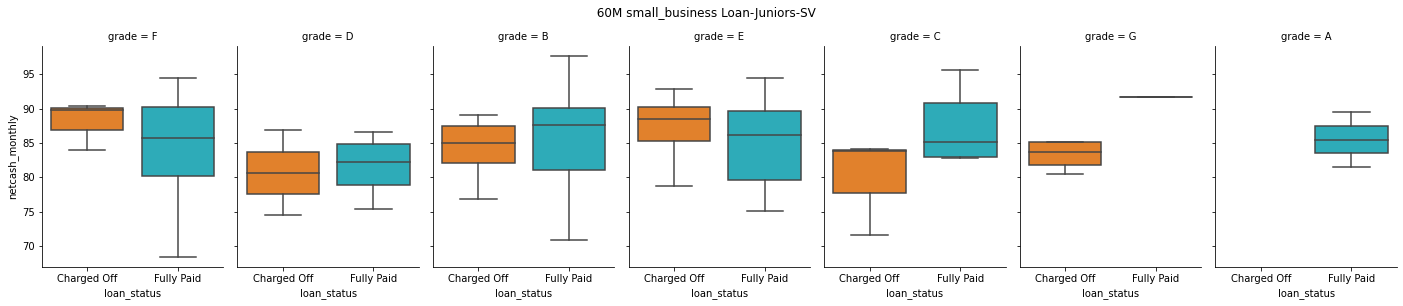

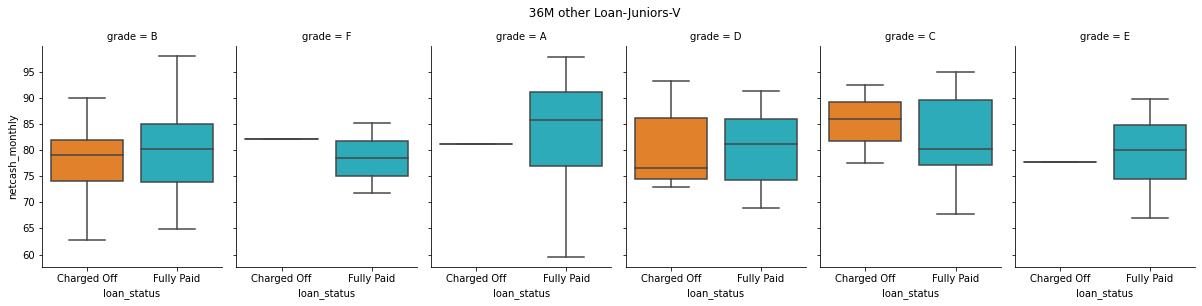

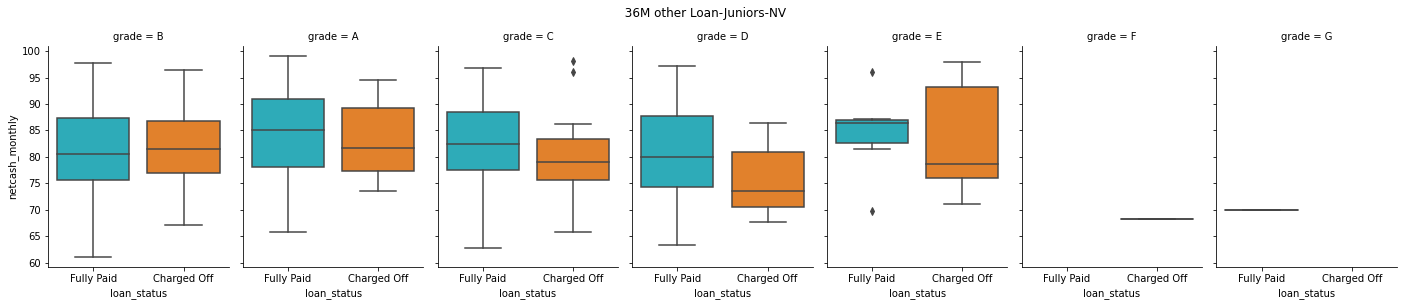

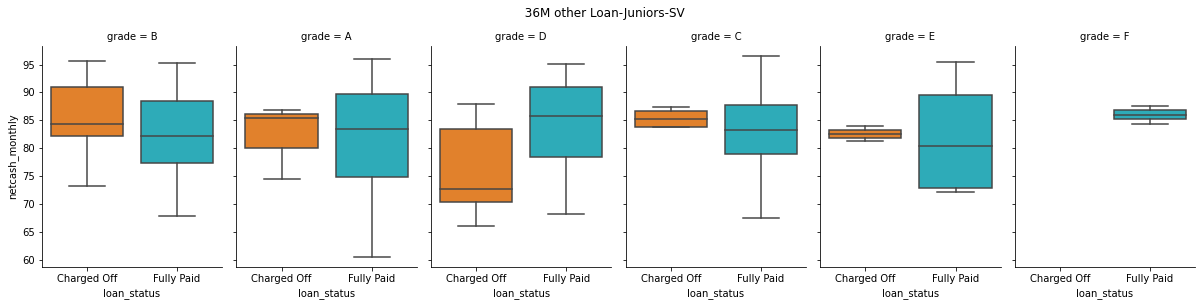

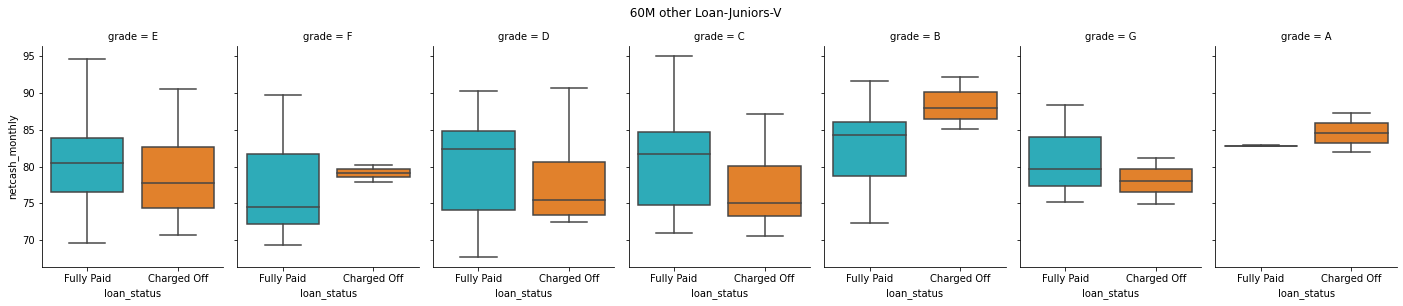

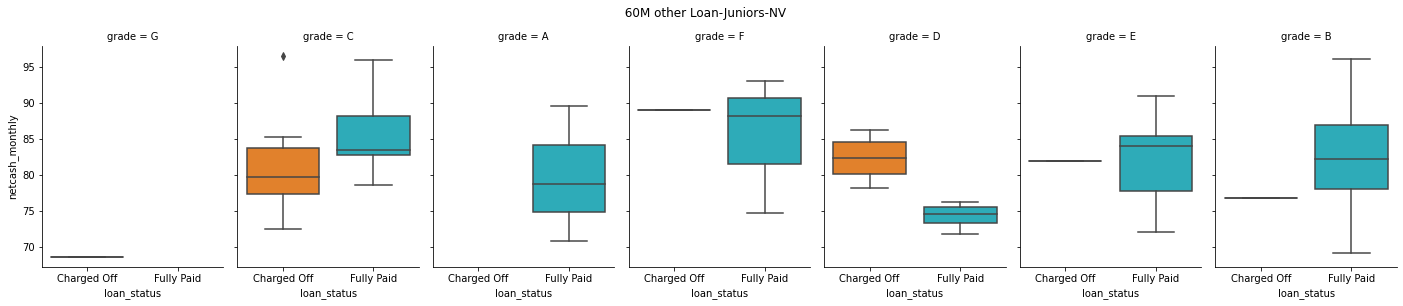

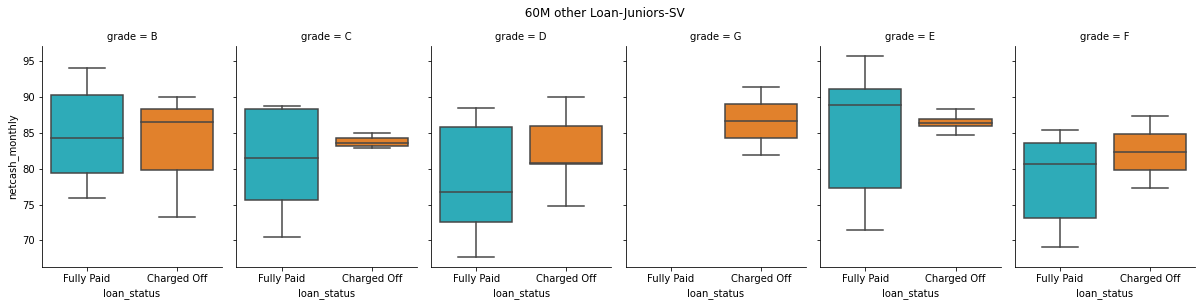

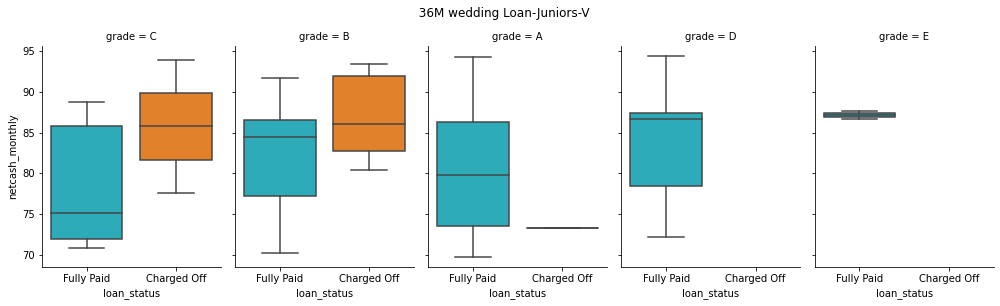

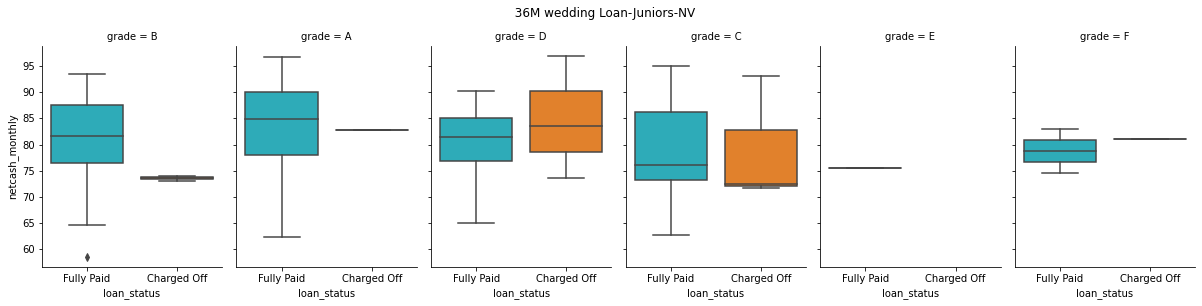

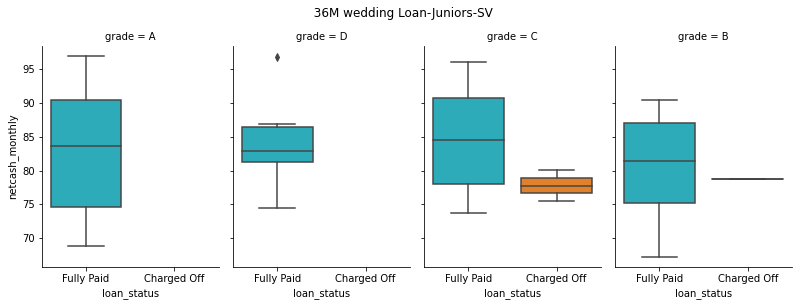

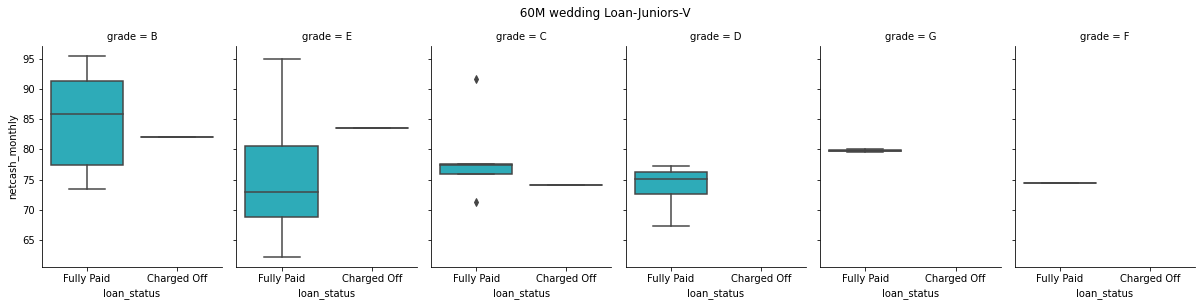

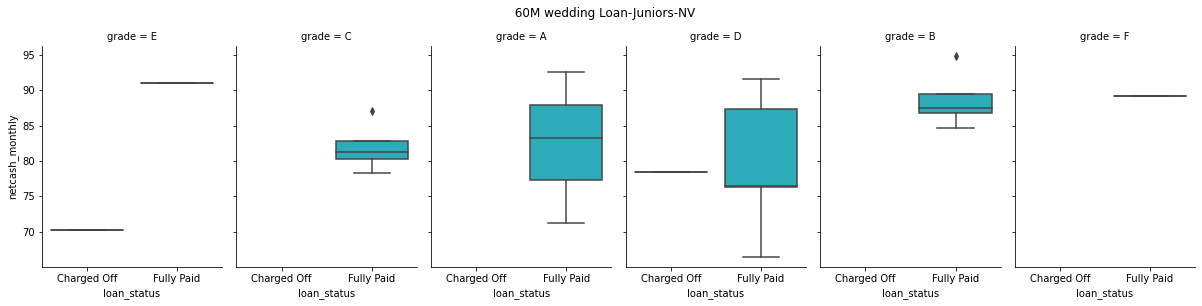

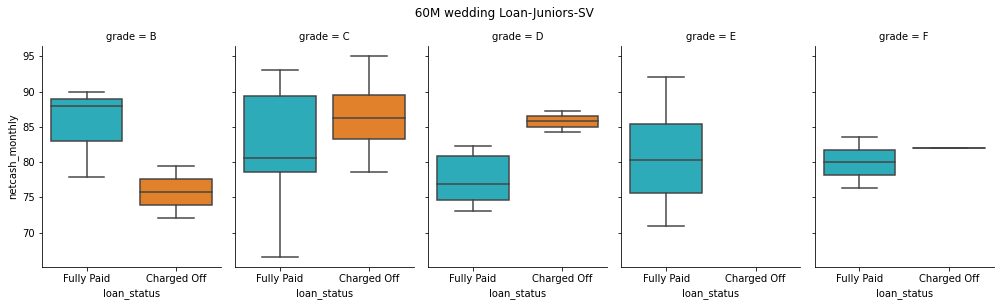

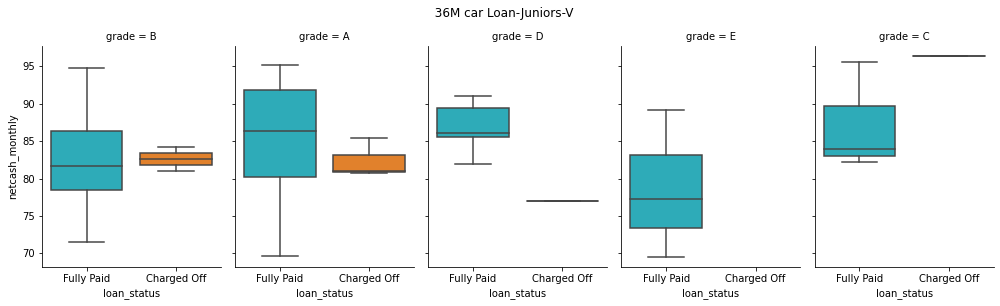

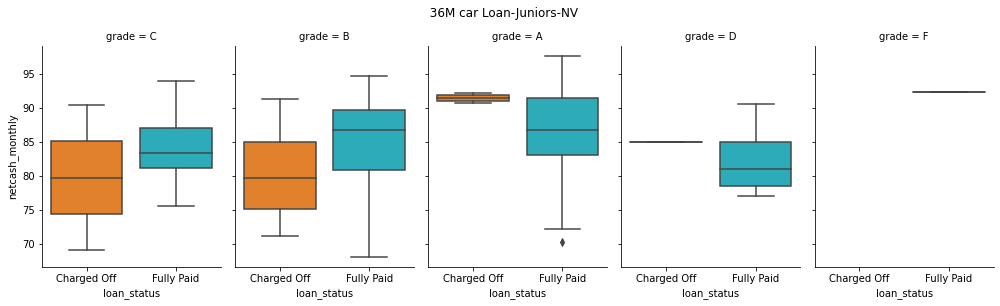

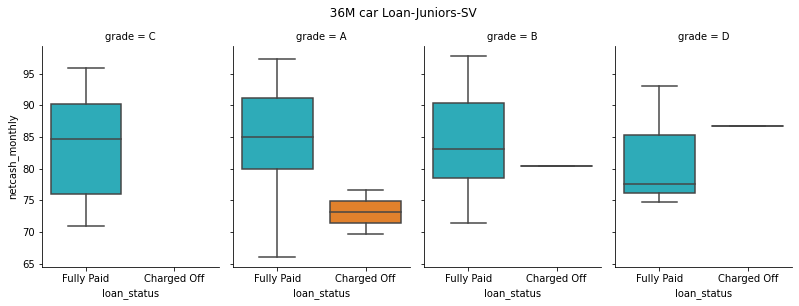

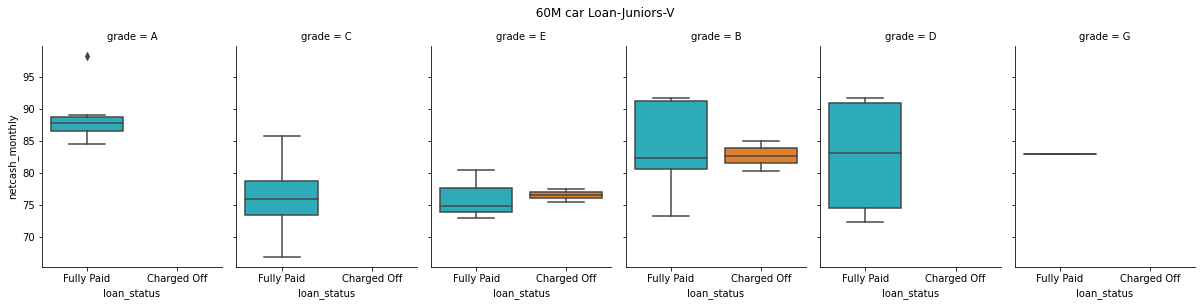

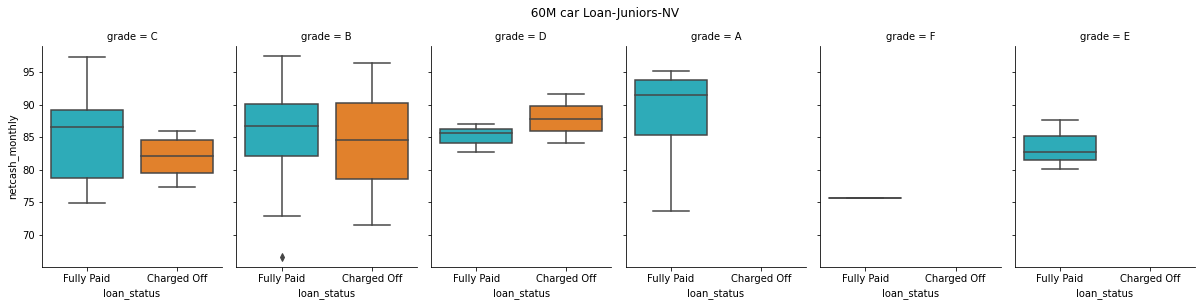

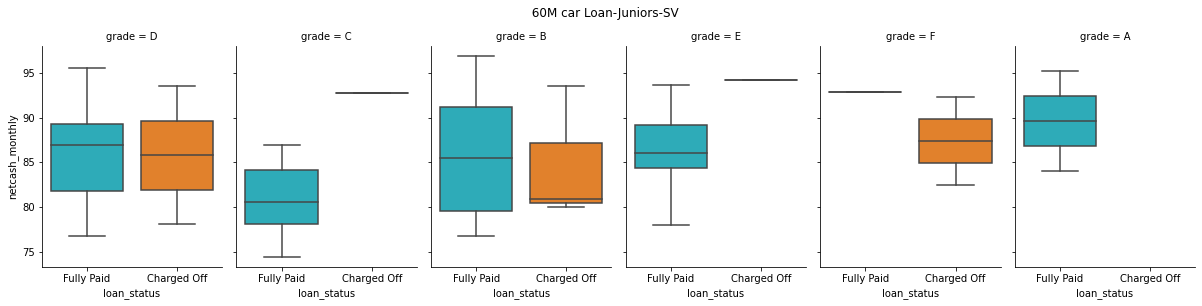

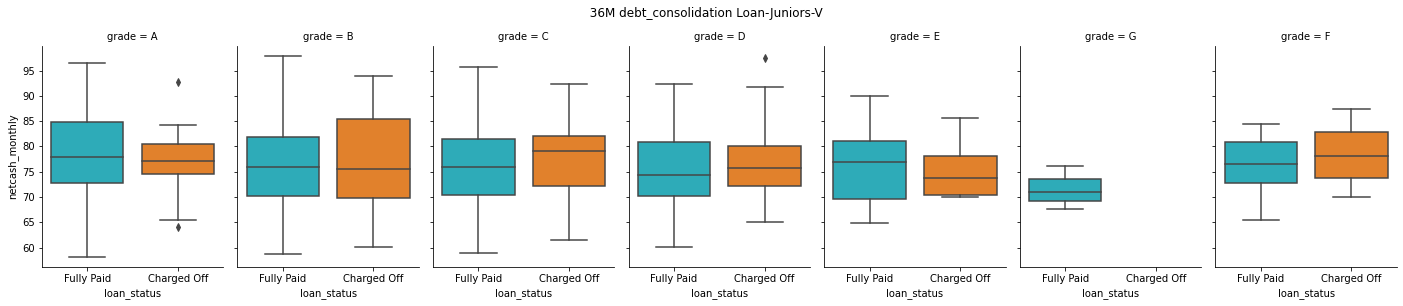

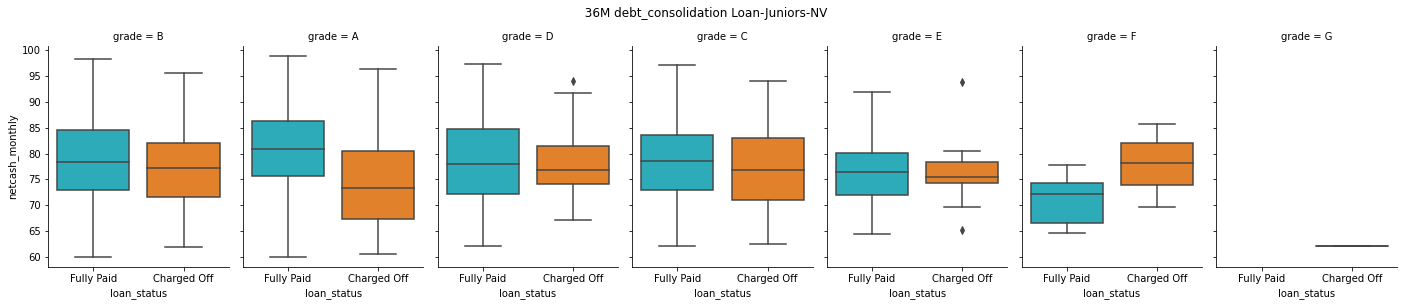

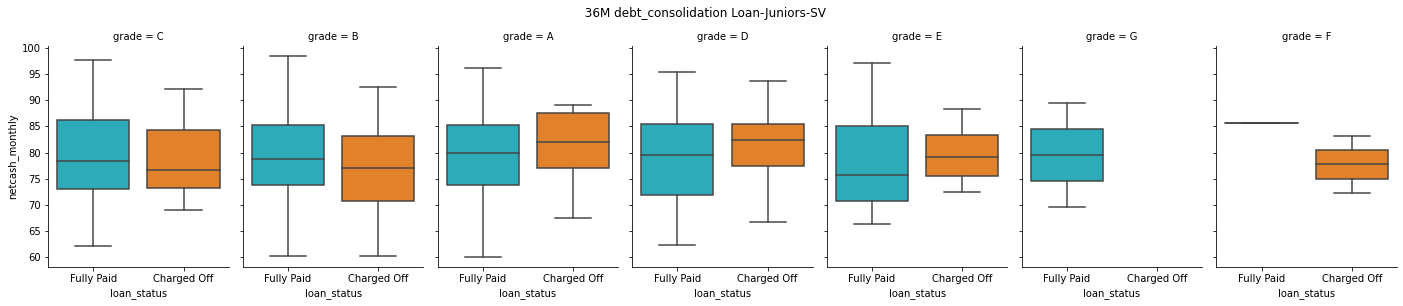

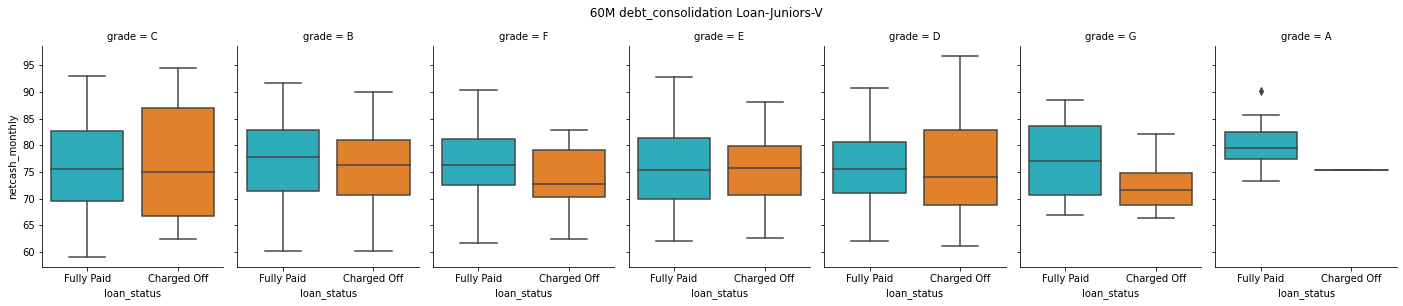

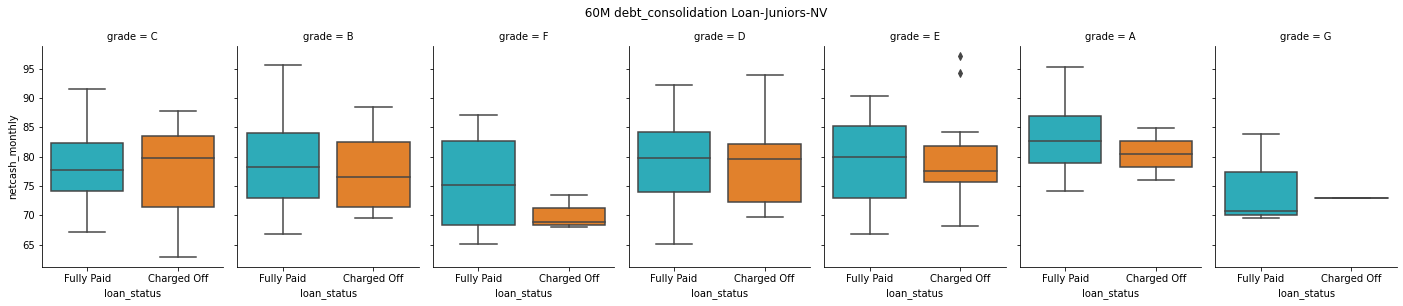

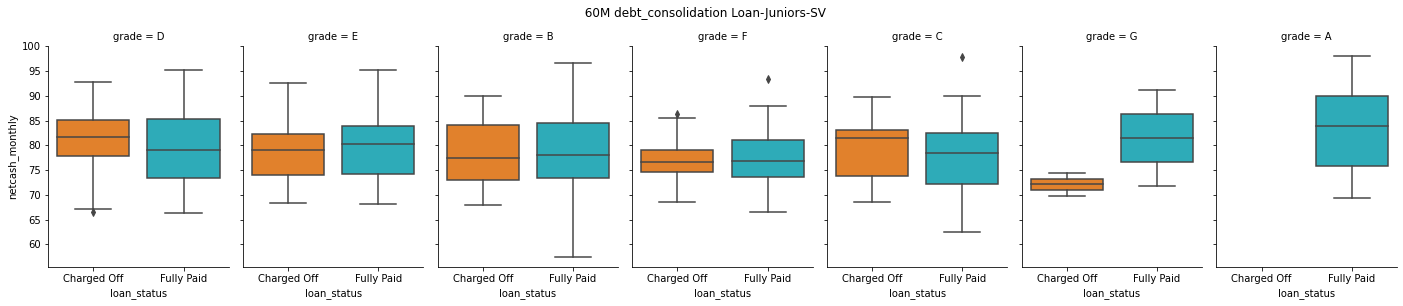

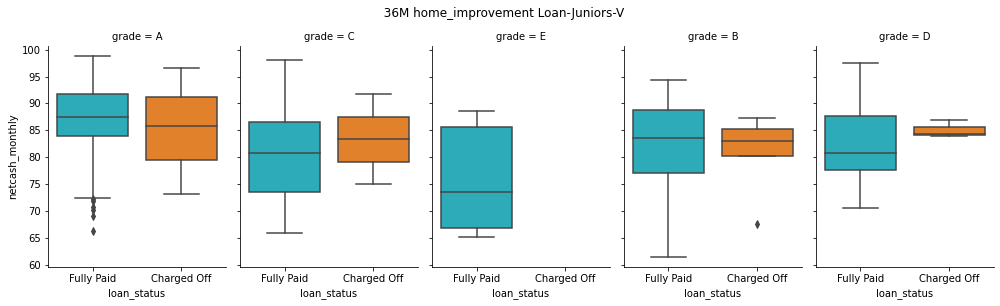

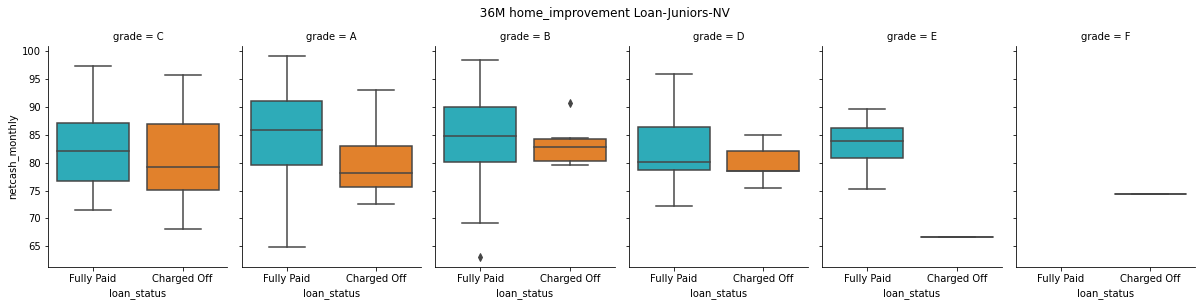

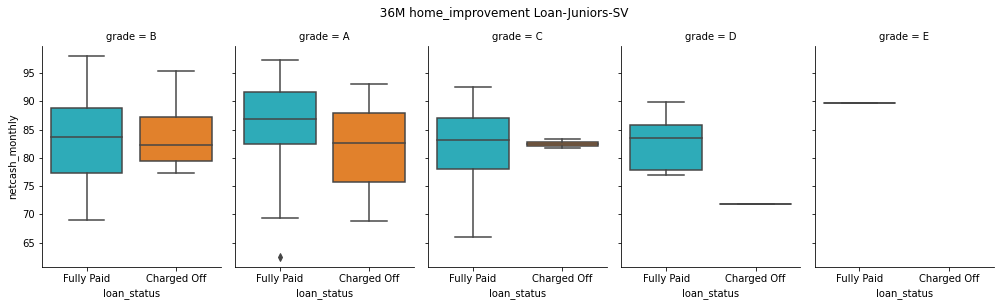

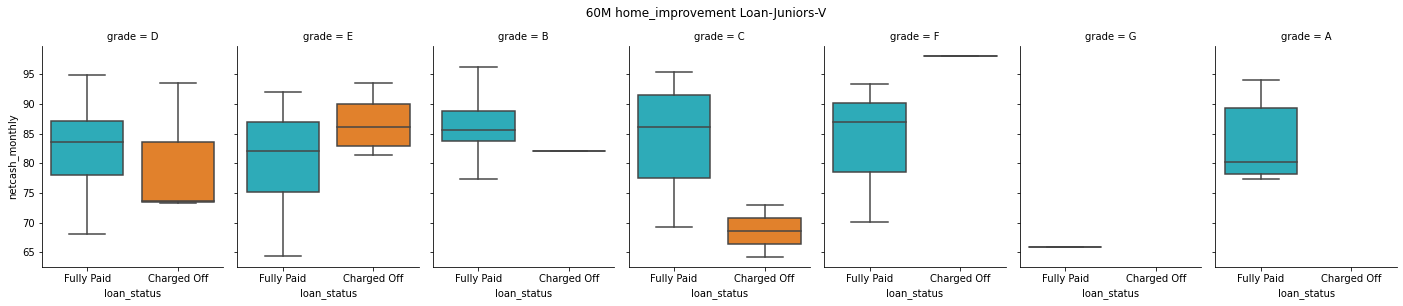

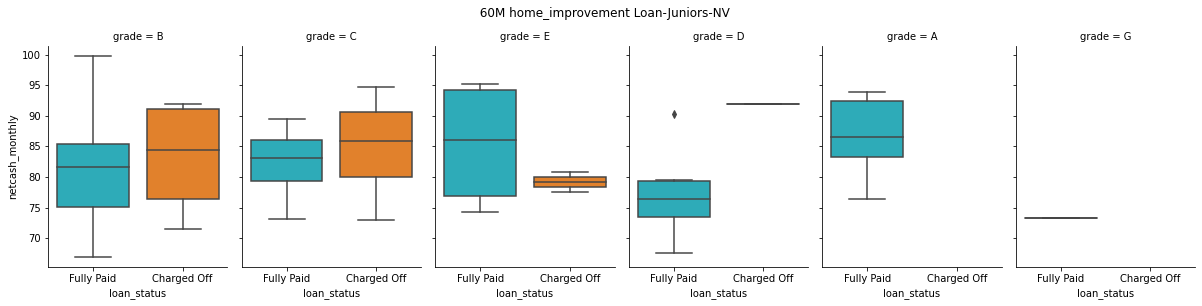

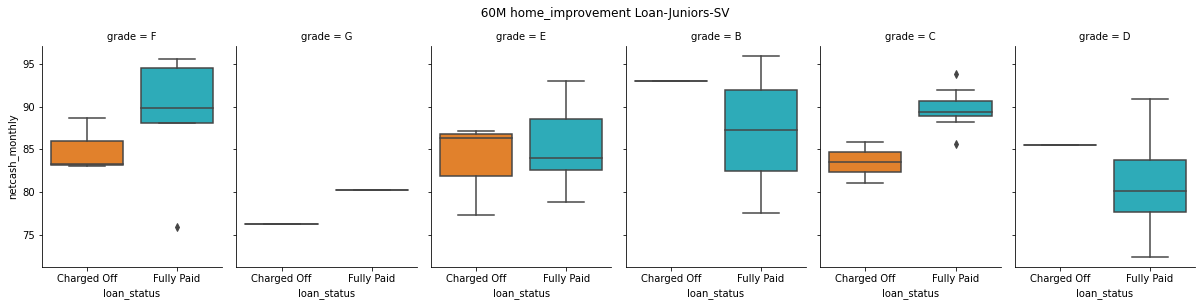

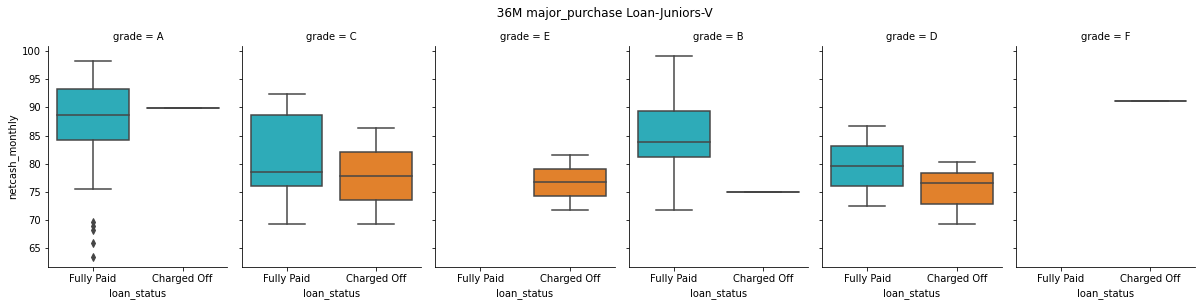

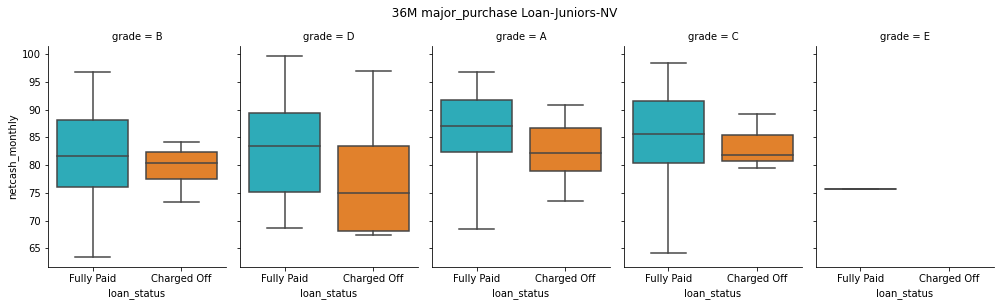

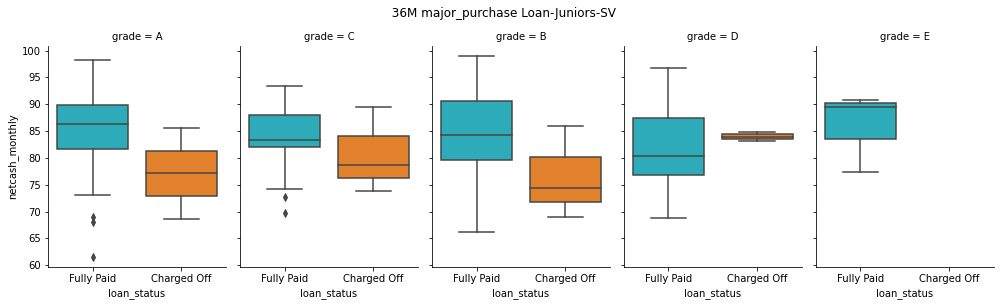

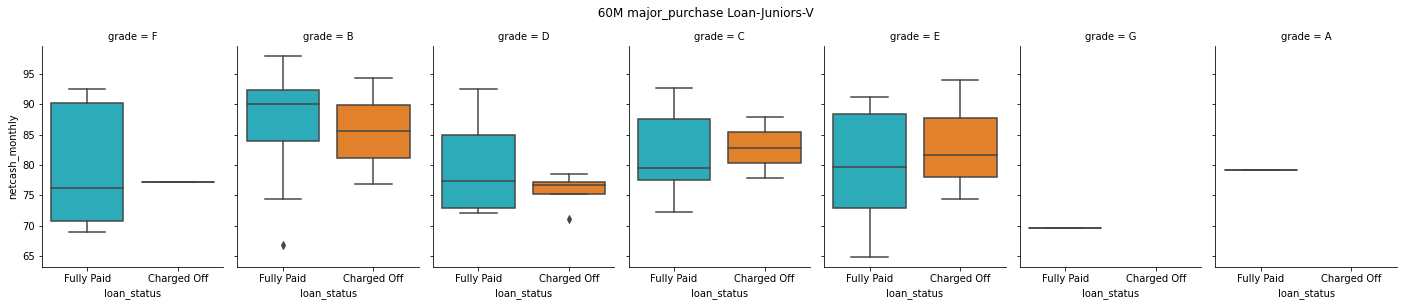

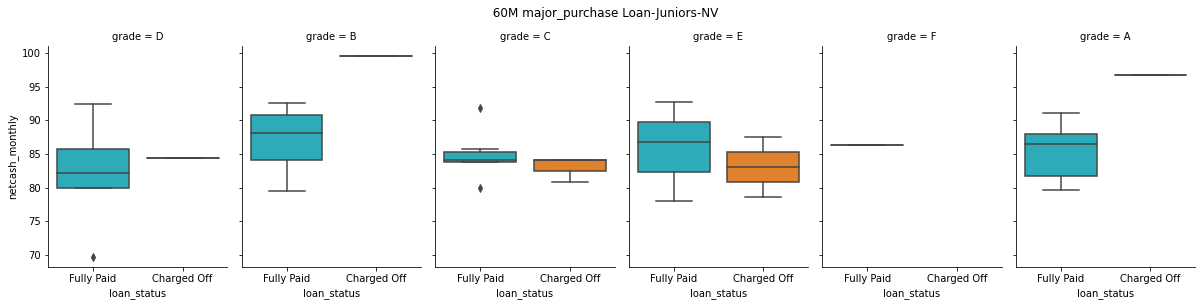

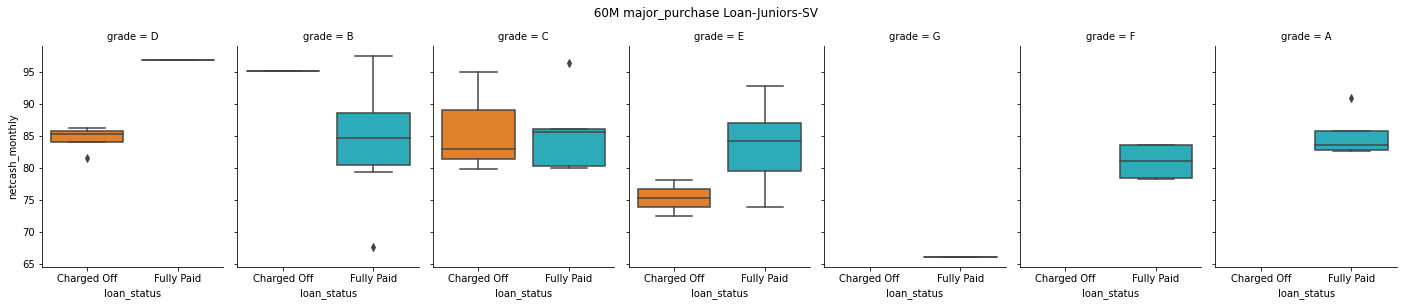

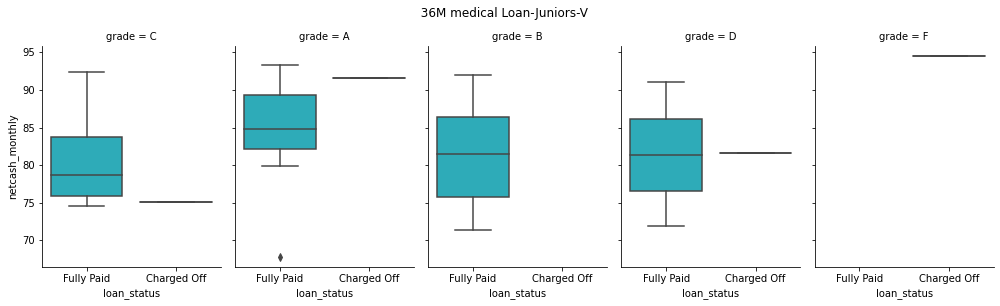

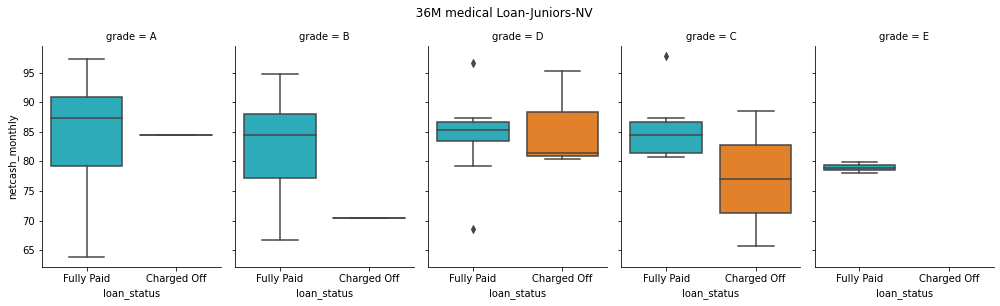

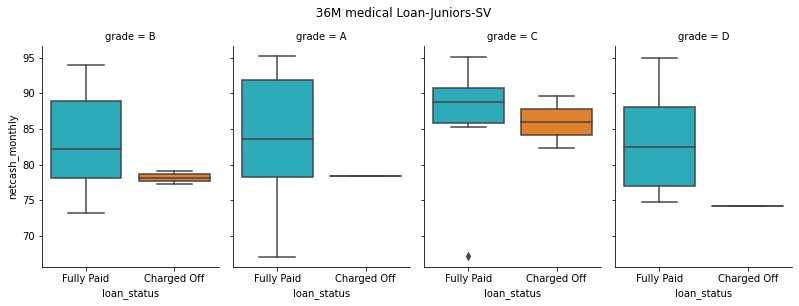

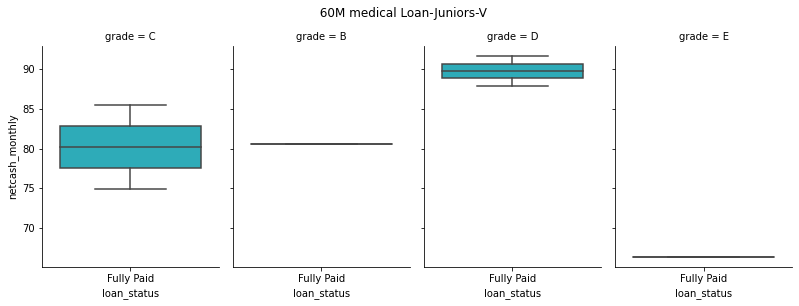

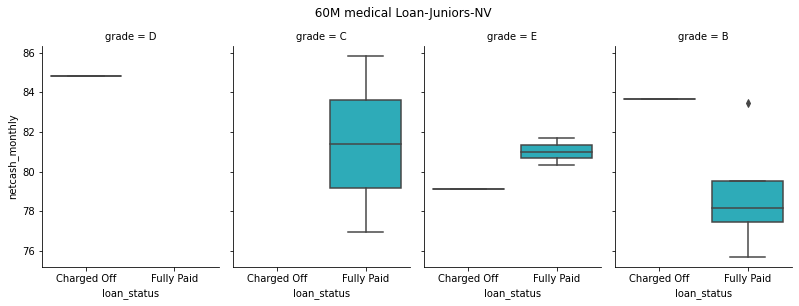

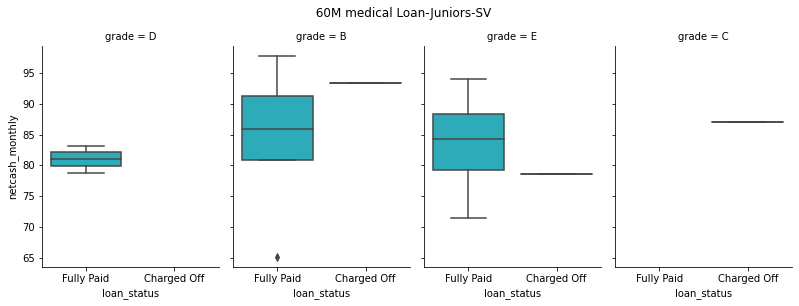

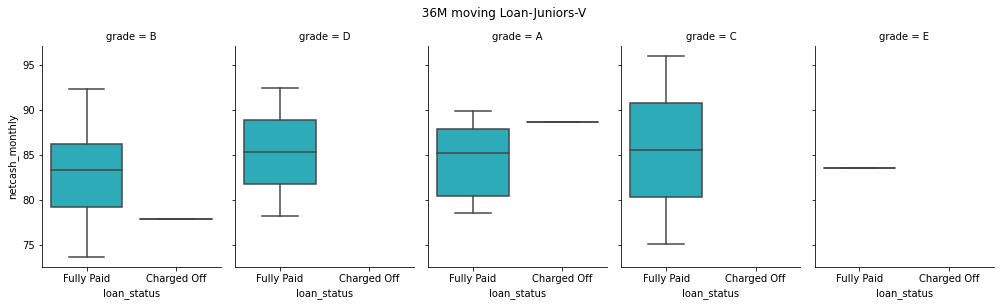

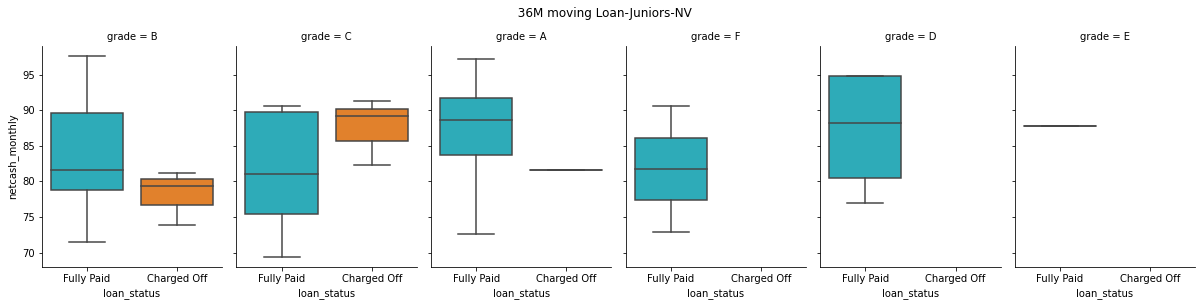

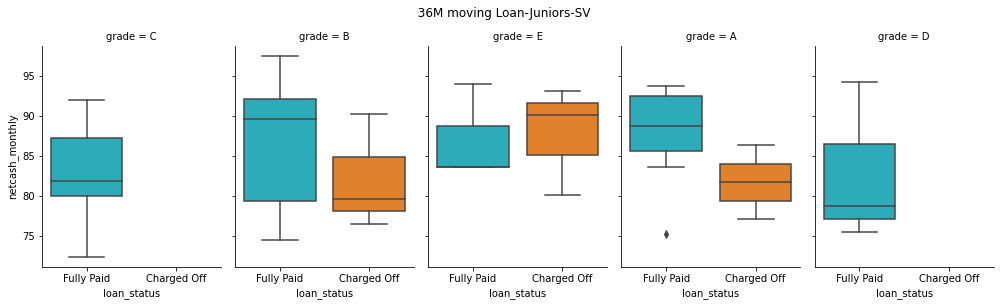

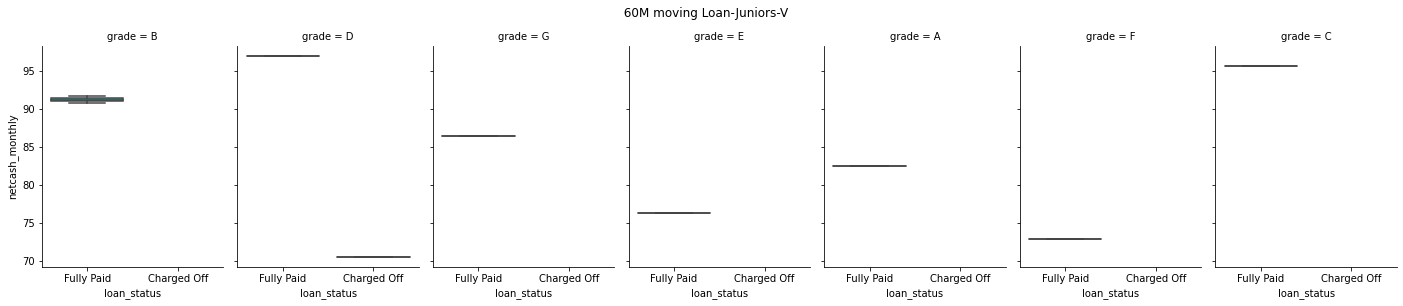

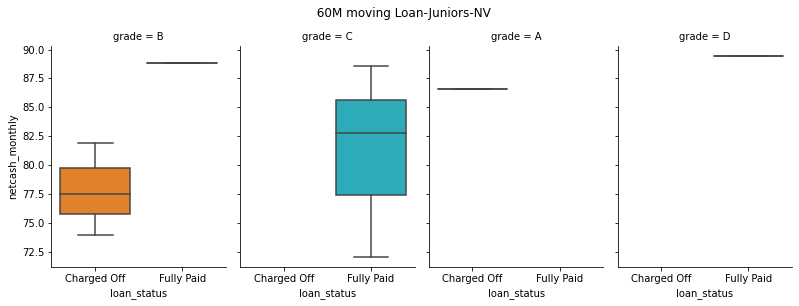

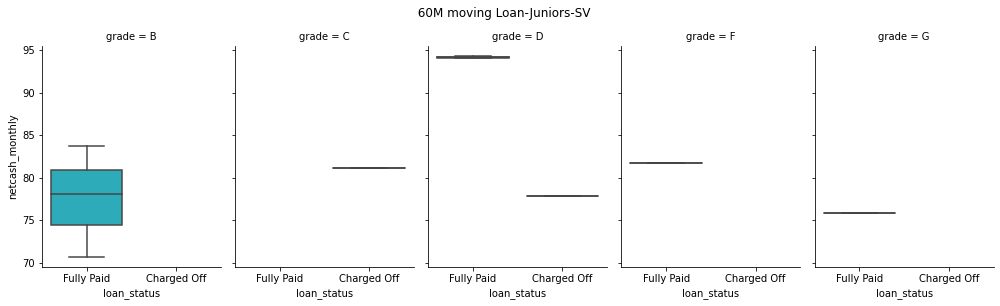

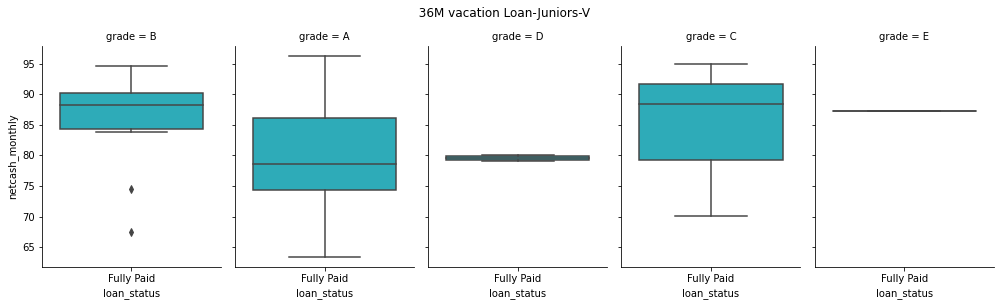

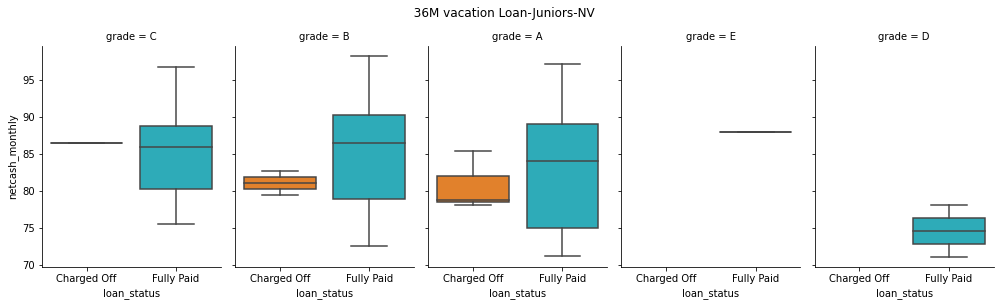

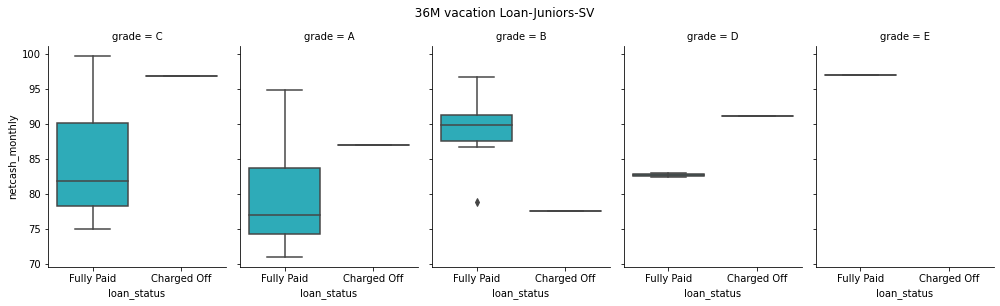

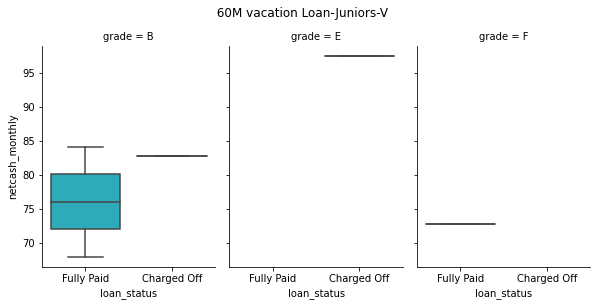

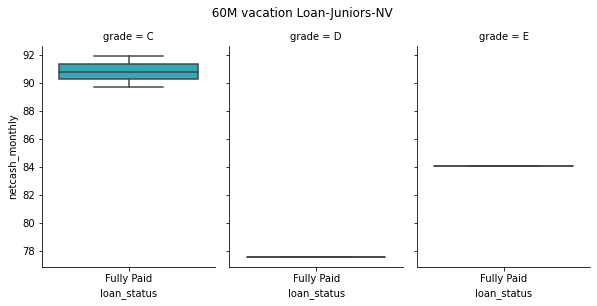

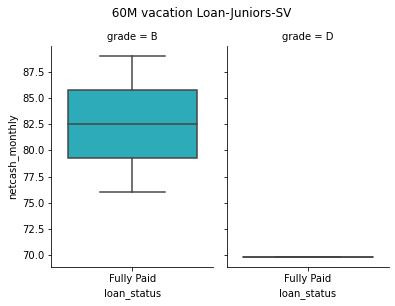

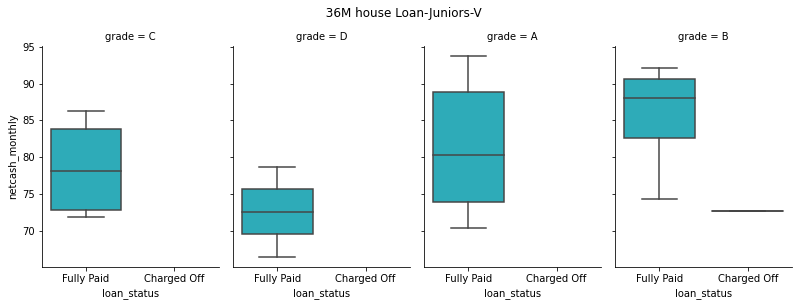

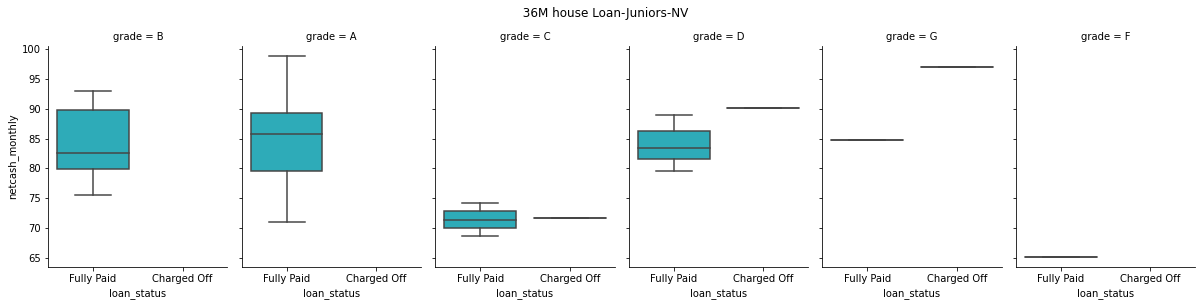

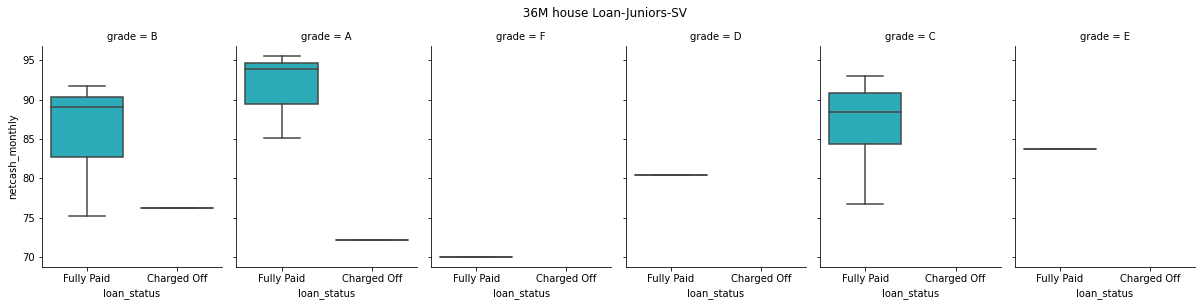

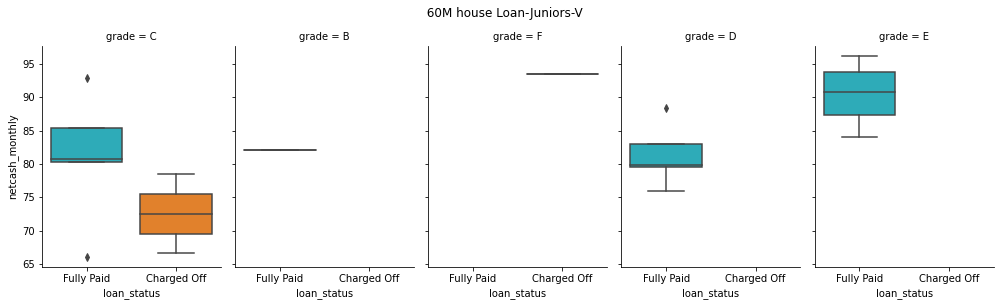

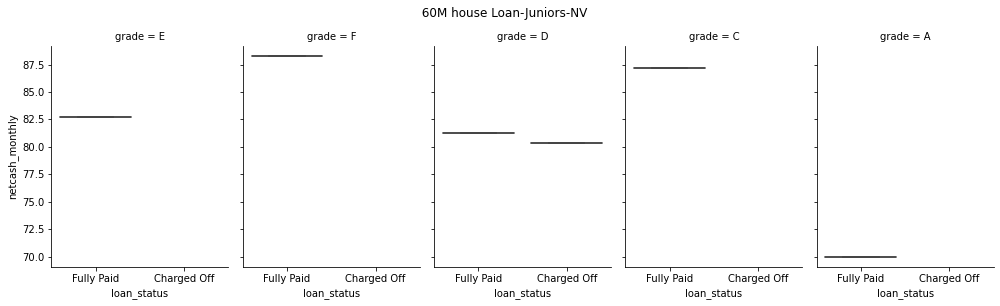

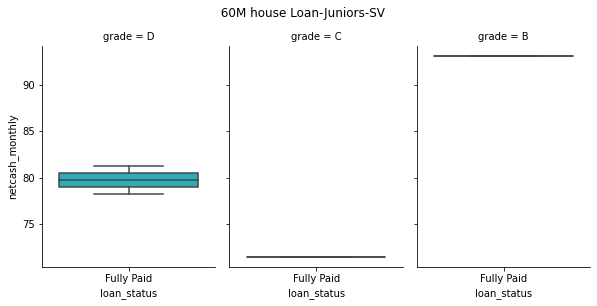

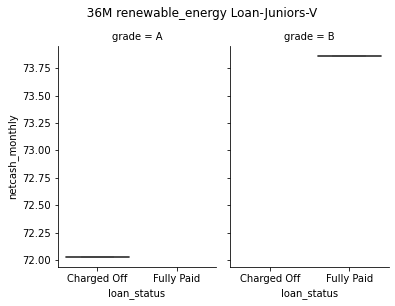

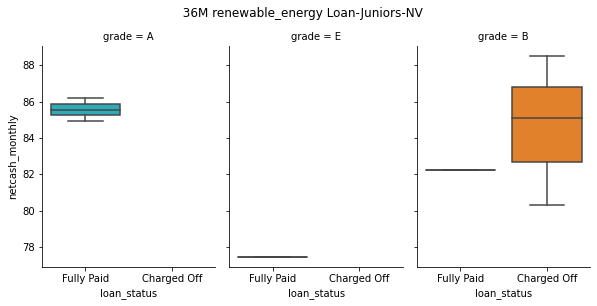

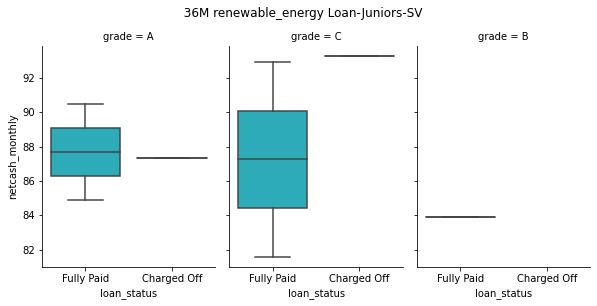

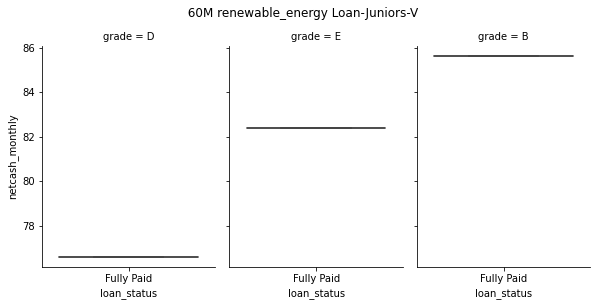

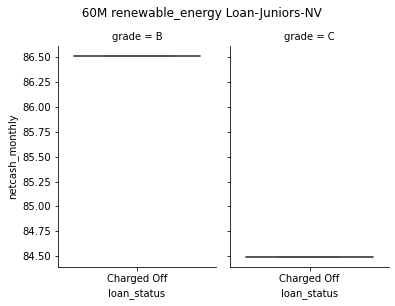

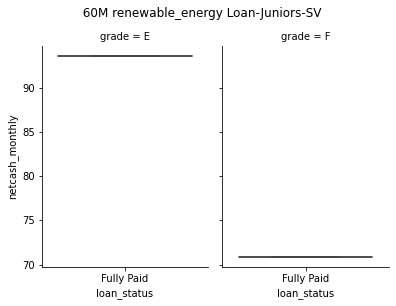

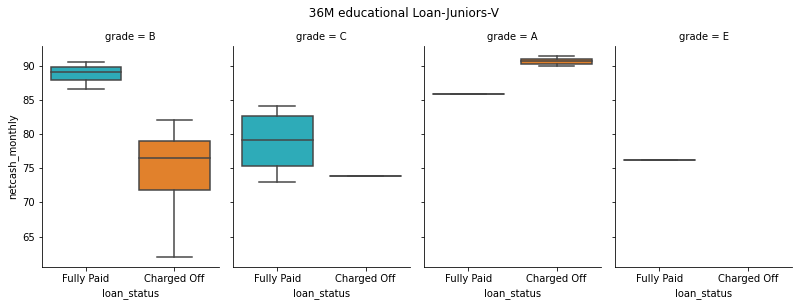

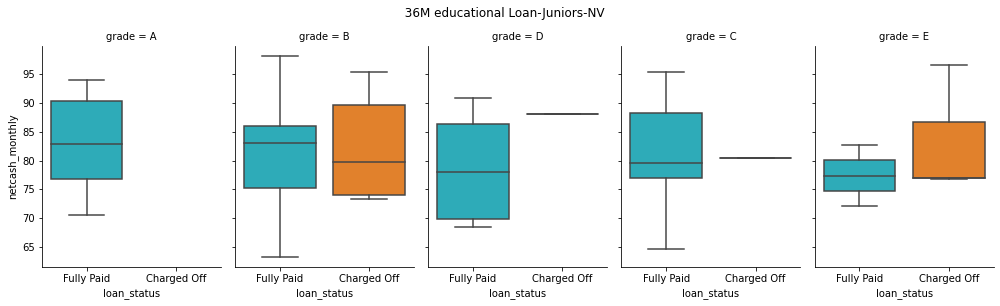

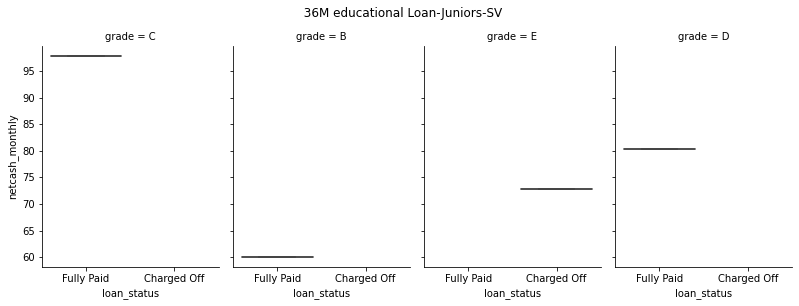

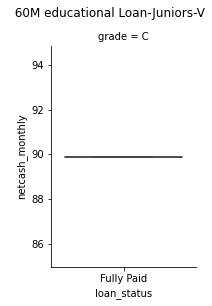

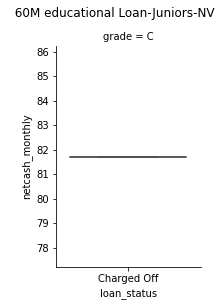

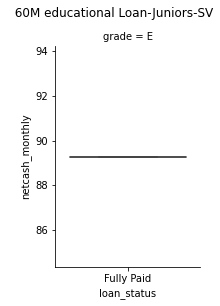

In [875]:
j151 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_junv, kind="box",height=4, aspect=.7,palette=palette)
j151.fig.suptitle("  36M credit_card Loan-Juniors-V",y=1.05)
j152=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_junnv, kind="box",height=4, aspect=.7,palette=palette)
j152.fig.suptitle("  36M credit_card Loan-Juniors-NV",y=1.05)

j153=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_junsv, kind="box",height=4, aspect=.7,palette=palette)
j153.fig.suptitle("  36M credit_card Loan-Juniors-SV",y=1.05)
j154=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_junv, kind="box",height=4, aspect=.7,palette=palette)
j154.fig.suptitle("  60M credit_card Loan-Juniors-V",y=1.05)

j155=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_junnv, kind="box",height=4, aspect=.7,palette=palette)
j155.fig.suptitle("  60M credit_card Loan-Juniors-NV",y=1.05)
j156=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_junsv, kind="box",height=4, aspect=.7,palette=palette)
j156.fig.suptitle("  60M credit_card Loan-Juniors-SV",y=1.05)

j161 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_junv, kind="box",height=4, aspect=.7,palette=palette)
j161.fig.suptitle("  36M small_business Loan-Juniors-V",y=1.05)
j162=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_junnv, kind="box",height=4, aspect=.7,palette=palette)
j162.fig.suptitle("  36M small_business Loan-Juniors-NV",y=1.05)

j163=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_junsv, kind="box",height=4, aspect=.7,palette=palette)
j163.fig.suptitle("  36M small_business Loan-Juniors-SV",y=1.05)
j164=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_junv, kind="box",height=4, aspect=.7,palette=palette)
j164.fig.suptitle("  60M small_business Loan-Juniors-V",y=1.05)

j165=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_junnv, kind="box",height=4, aspect=.7,palette=palette)
j165.fig.suptitle("  60M small_business Loan-Juniors-NV",y=1.05)
j166=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_junsv, kind="box",height=4, aspect=.7,palette=palette)
j166.fig.suptitle("  60M small_business Loan-Juniors-SV",y=1.05)

j171 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_junv, kind="box",height=4, aspect=.7,palette=palette)
j171.fig.suptitle("  36M other Loan-Juniors-V",y=1.05)
j172=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_junnv, kind="box",height=4, aspect=.7,palette=palette)
j172.fig.suptitle("  36M other Loan-Juniors-NV",y=1.05)

j173=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_junsv, kind="box",height=4, aspect=.7,palette=palette)
j173.fig.suptitle("  36M other Loan-Juniors-SV",y=1.05)
j174=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_junv, kind="box",height=4, aspect=.7,palette=palette)
j174.fig.suptitle("  60M other Loan-Juniors-V",y=1.05)

j175=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_junnv, kind="box",height=4, aspect=.7,palette=palette)
j175.fig.suptitle("  60M other Loan-Juniors-NV",y=1.05)
j176=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_junsv, kind="box",height=4, aspect=.7,palette=palette)
j176.fig.suptitle("  60M other Loan-Juniors-SV",y=1.05)

j181 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_junv, kind="box",height=4, aspect=.7,palette=palette)
j181.fig.suptitle("  36M wedding Loan-Juniors-V",y=1.05)
j182=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_junnv, kind="box",height=4, aspect=.7,palette=palette)
j182.fig.suptitle("  36M wedding Loan-Juniors-NV",y=1.05)

j183=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_junsv, kind="box",height=4, aspect=.7,palette=palette)
j183.fig.suptitle("  36M wedding Loan-Juniors-SV",y=1.05)
j184=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_junv, kind="box",height=4, aspect=.7,palette=palette)
j184.fig.suptitle("  60M wedding Loan-Juniors-V",y=1.05)

j185=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_junnv, kind="box",height=4, aspect=.7,palette=palette)
j185.fig.suptitle("  60M wedding Loan-Juniors-NV",y=1.05)
j186=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_junsv, kind="box",height=4, aspect=.7,palette=palette)
j186.fig.suptitle("  60M wedding Loan-Juniors-SV",y=1.05)

j191 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_junv, kind="box",height=4, aspect=.7,palette=palette)
j191.fig.suptitle("  36M car Loan-Juniors-V",y=1.05)
j192=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_junnv, kind="box",height=4, aspect=.7,palette=palette)
j192.fig.suptitle("  36M car Loan-Juniors-NV",y=1.05)

j193=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_junsv, kind="box",height=4, aspect=.7,palette=palette)
j193.fig.suptitle("  36M car Loan-Juniors-SV",y=1.05)
j194=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_junv, kind="box",height=4, aspect=.7,palette=palette)
j194.fig.suptitle("  60M car Loan-Juniors-V",y=1.05)

j195=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_junnv, kind="box",height=4, aspect=.7,palette=palette)
j195.fig.suptitle("  60M car Loan-Juniors-NV",y=1.05)
j196=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_junsv, kind="box",height=4, aspect=.7,palette=palette)
j196.fig.suptitle("  60M car Loan-Juniors-SV",y=1.05)

j201 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_junv, kind="box",height=4, aspect=.7,palette=palette)
j201.fig.suptitle("  36M debt_consolidation Loan-Juniors-V",y=1.05)
j202=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_junnv, kind="box",height=4, aspect=.7,palette=palette)
j202.fig.suptitle("  36M debt_consolidation Loan-Juniors-NV",y=1.05)

j203=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_junsv, kind="box",height=4, aspect=.7,palette=palette)
j203.fig.suptitle("  36M debt_consolidation Loan-Juniors-SV",y=1.05)
j204=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_junv, kind="box",height=4, aspect=.7,palette=palette)
j204.fig.suptitle("  60M debt_consolidation Loan-Juniors-V",y=1.05)

j205=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_junnv, kind="box",height=4, aspect=.7,palette=palette)
j205.fig.suptitle("  60M debt_consolidation Loan-Juniors-NV",y=1.05)
j206=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_junsv, kind="box",height=4, aspect=.7,palette=palette)
j206.fig.suptitle("  60M debt_consolidation Loan-Juniors-SV",y=1.05)

j211 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_junv, kind="box",height=4, aspect=.7,palette=palette)
j211.fig.suptitle("  36M home_improvement Loan-Juniors-V",y=1.05)
j212=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_junnv, kind="box",height=4, aspect=.7,palette=palette)
j212.fig.suptitle("  36M home_improvement Loan-Juniors-NV",y=1.05)

j213=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_junsv, kind="box",height=4, aspect=.7,palette=palette)
j213.fig.suptitle("  36M home_improvement Loan-Juniors-SV",y=1.05)
j214=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_junv, kind="box",height=4, aspect=.7,palette=palette)
j214.fig.suptitle("  60M home_improvement Loan-Juniors-V",y=1.05)

j215=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_junnv, kind="box",height=4, aspect=.7,palette=palette)
j215.fig.suptitle("  60M home_improvement Loan-Juniors-NV",y=1.05)
j216=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_junsv, kind="box",height=4, aspect=.7,palette=palette)
j216.fig.suptitle("  60M home_improvement Loan-Juniors-SV",y=1.05)

j221 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_junv, kind="box",height=4, aspect=.7,palette=palette)
j221.fig.suptitle("  36M major_purchase Loan-Juniors-V",y=1.05)
j222=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_junnv, kind="box",height=4, aspect=.7,palette=palette)
j222.fig.suptitle("  36M major_purchase Loan-Juniors-NV",y=1.05)

j223=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_junsv, kind="box",height=4, aspect=.7,palette=palette)
j223.fig.suptitle("  36M major_purchase Loan-Juniors-SV",y=1.05)
j224=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_junv, kind="box",height=4, aspect=.7,palette=palette)
j224.fig.suptitle("  60M major_purchase Loan-Juniors-V",y=1.05)

j225=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_junnv, kind="box",height=4, aspect=.7,palette=palette)
j225.fig.suptitle("  60M major_purchase Loan-Juniors-NV",y=1.05)
j226=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_junsv, kind="box",height=4, aspect=.7,palette=palette)
j226.fig.suptitle("  60M major_purchase Loan-Juniors-SV",y=1.05)

j231 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_junv, kind="box",height=4, aspect=.7,palette=palette)
j231.fig.suptitle("  36M medical Loan-Juniors-V",y=1.05)
j232=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_junnv, kind="box",height=4, aspect=.7,palette=palette)
j232.fig.suptitle("  36M medical Loan-Juniors-NV",y=1.05)

j233=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_junsv, kind="box",height=4, aspect=.7,palette=palette)
j233.fig.suptitle("  36M medical Loan-Juniors-SV",y=1.05)
j234=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_junv, kind="box",height=4, aspect=.7,palette=palette)
j234.fig.suptitle("  60M medical Loan-Juniors-V",y=1.05)

j235=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_junnv, kind="box",height=4, aspect=.7,palette=palette)
j235.fig.suptitle("  60M medical Loan-Juniors-NV",y=1.05)
j236=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_junsv, kind="box",height=4, aspect=.7,palette=palette)
j236.fig.suptitle("  60M medical Loan-Juniors-SV",y=1.05)

j241 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_junv, kind="box",height=4, aspect=.7,palette=palette)
j241.fig.suptitle("  36M moving Loan-Juniors-V",y=1.05)
j242=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_junnv, kind="box",height=4, aspect=.7,palette=palette)
j242.fig.suptitle("  36M moving Loan-Juniors-NV",y=1.05)

j243=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_junsv, kind="box",height=4, aspect=.7,palette=palette)
j243.fig.suptitle("  36M moving Loan-Juniors-SV",y=1.05)
j244=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_junv, kind="box",height=4, aspect=.7,palette=palette)
j244.fig.suptitle("  60M moving Loan-Juniors-V",y=1.05)

j245=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_junnv, kind="box",height=4, aspect=.7,palette=palette)
j245.fig.suptitle("  60M moving Loan-Juniors-NV",y=1.05)
j246=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_junsv, kind="box",height=4, aspect=.7,palette=palette)
j246.fig.suptitle("  60M moving Loan-Juniors-SV",y=1.05)

j251 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_junv, kind="box",height=4, aspect=.7,palette=palette)
j251.fig.suptitle("  36M vacation Loan-Juniors-V",y=1.05)
j252=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_junnv, kind="box",height=4, aspect=.7,palette=palette)
j252.fig.suptitle("  36M vacation Loan-Juniors-NV",y=1.05)

j253=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_junsv, kind="box",height=4, aspect=.7,palette=palette)
j253.fig.suptitle("  36M vacation Loan-Juniors-SV",y=1.05)
j254=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_junv, kind="box",height=4, aspect=.7,palette=palette)
j254.fig.suptitle("  60M vacation Loan-Juniors-V",y=1.05)

j255=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_junnv, kind="box",height=4, aspect=.7,palette=palette)
j255.fig.suptitle("  60M vacation Loan-Juniors-NV",y=1.05)
j256=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_junsv, kind="box",height=4, aspect=.7,palette=palette)
j256.fig.suptitle("  60M vacation Loan-Juniors-SV",y=1.05)

j261 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_junv, kind="box",height=4, aspect=.7,palette=palette)
j261.fig.suptitle("  36M house Loan-Juniors-V",y=1.05)
j262=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_junnv, kind="box",height=4, aspect=.7,palette=palette)
j262.fig.suptitle("  36M house Loan-Juniors-NV",y=1.05)

j263=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_junsv, kind="box",height=4, aspect=.7,palette=palette)
j263.fig.suptitle("  36M house Loan-Juniors-SV",y=1.05)
j264=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_junv, kind="box",height=4, aspect=.7,palette=palette)
j264.fig.suptitle("  60M house Loan-Juniors-V",y=1.05)

j265=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_junnv, kind="box",height=4, aspect=.7,palette=palette)
j265.fig.suptitle("  60M house Loan-Juniors-NV",y=1.05)
j266=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_junsv, kind="box",height=4, aspect=.7,palette=palette)
j266.fig.suptitle("  60M house Loan-Juniors-SV",y=1.05)

j271 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_junv, kind="box",height=4, aspect=.7,palette=palette)
j271.fig.suptitle("  36M renewable_energy Loan-Juniors-V",y=1.05)
j272=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_junnv, kind="box",height=4, aspect=.7,palette=palette)
j272.fig.suptitle("  36M renewable_energy Loan-Juniors-NV",y=1.05)

j273=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_junsv, kind="box",height=4, aspect=.7,palette=palette)
j273.fig.suptitle("  36M renewable_energy Loan-Juniors-SV",y=1.05)
j274=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_junv, kind="box",height=4, aspect=.7,palette=palette)
j274.fig.suptitle("  60M renewable_energy Loan-Juniors-V",y=1.05)

j275=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_junnv, kind="box",height=4, aspect=.7,palette=palette)
j275.fig.suptitle("  60M renewable_energy Loan-Juniors-NV",y=1.05)
j276=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_junsv, kind="box",height=4, aspect=.7,palette=palette)
j276.fig.suptitle("  60M renewable_energy Loan-Juniors-SV",y=1.05)

j281 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_junv, kind="box",height=4, aspect=.7,palette=palette)
j281.fig.suptitle("  36M educational Loan-Juniors-V",y=1.05)
j282=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_junnv, kind="box",height=4, aspect=.7,palette=palette)
j282.fig.suptitle("  36M educational Loan-Juniors-NV",y=1.05)

j283=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_junsv, kind="box",height=4, aspect=.7,palette=palette)
j283.fig.suptitle("  36M educational Loan-Juniors-SV",y=1.05)
j284=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_junv, kind="box",height=4, aspect=.7,palette=palette)
j284.fig.suptitle("  60M educational Loan-Juniors-V",y=1.05)

j285=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_junnv, kind="box",height=4, aspect=.7,palette=palette)
j285.fig.suptitle("  60M educational Loan-Juniors-NV",y=1.05)
j286=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_junsv, kind="box",height=4, aspect=.7,palette=palette)
j286.fig.suptitle("  60M educational Loan-Juniors-SV",y=1.05)


In [877]:
loan36cc_senv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36cc_sennv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36cc_sensv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60cc_senv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60cc_sennv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60cc_sensv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36sb_senv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36sb_sennv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36sb_sensv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60sb_senv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60sb_sennv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60sb_sensv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36oth_senv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36oth_sennv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36oth_sensv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60oth_senv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60oth_sennv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60oth_sensv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36wd_senv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36wd_sennv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36wd_sensv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60wd_senv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60wd_sennv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60wd_sensv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36car_senv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36car_sennv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36car_sensv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60car_senv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60car_sennv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60car_sensv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36dc_senv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36dc_sennv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36dc_sensv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60dc_senv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60dc_sennv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60dc_sensv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hi_senv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36hi_sennv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hi_sensv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hi_senv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60hi_sennv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hi_sensv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mp_senv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36mp_sennv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mp_sensv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mp_senv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60mp_sennv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mp_sensv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36med_senv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36med_sennv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36med_sensv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60med_senv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60med_sennv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60med_sensv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mov_senv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36mov_sennv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mov_sensv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mov_senv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60mov_sennv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mov_sensv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36vac_senv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36vac_sennv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36vac_sensv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60vac_senv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60vac_sennv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60vac_sensv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hou_senv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36hou_sennv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hou_sensv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hou_senv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60hou_sennv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hou_sensv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36re_senv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36re_sennv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36re_sensv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60re_senv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60re_sennv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60re_sensv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]

loan36edu_senv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Verified")]
loan36edu_sennv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Not Verified")]

loan36edu_sensv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="senior")&(loan_36M["verification_status"]=="Source Verified")]
loan60edu_senv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Verified")]

loan60edu_sennv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Not Verified")]
loan60edu_sensv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="senior")&(loan_60M["verification_status"]=="Source Verified")]


C:\Users\e880156\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


ValueError: min() arg is an empty sequence

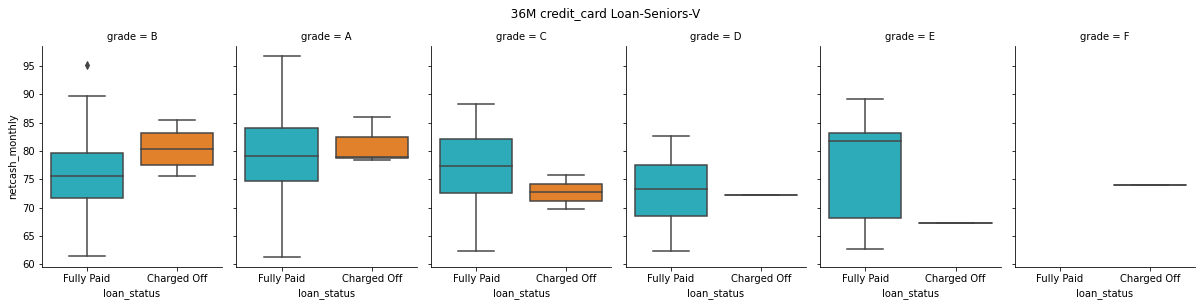

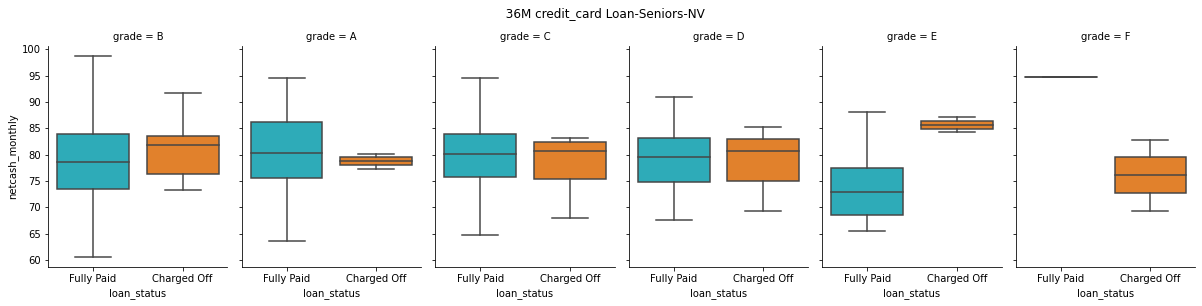

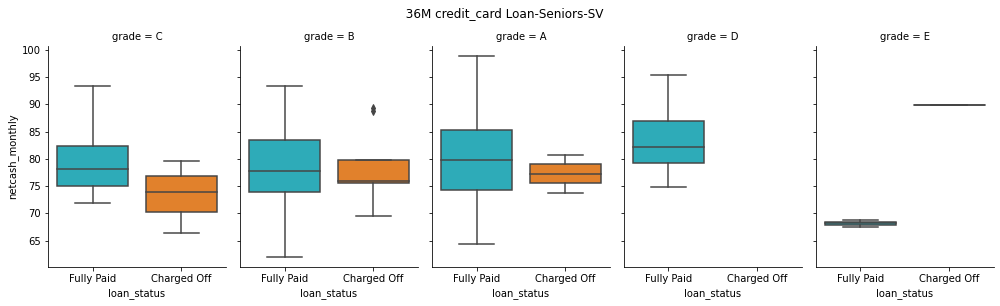

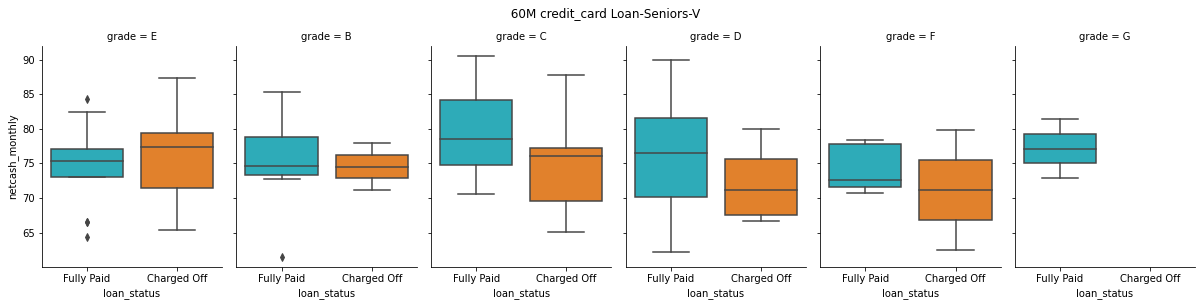

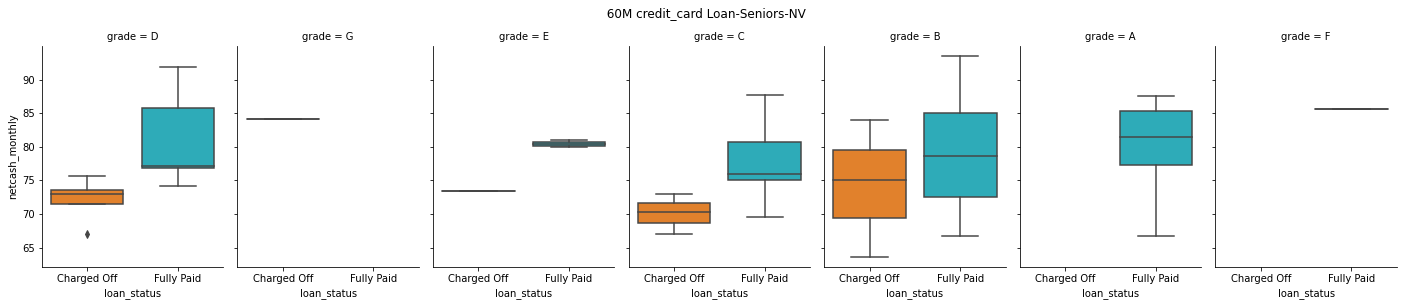

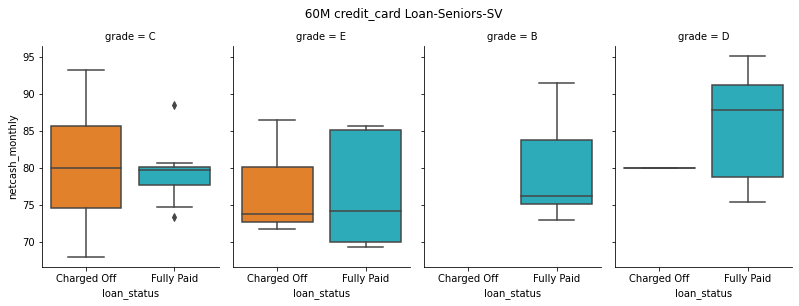

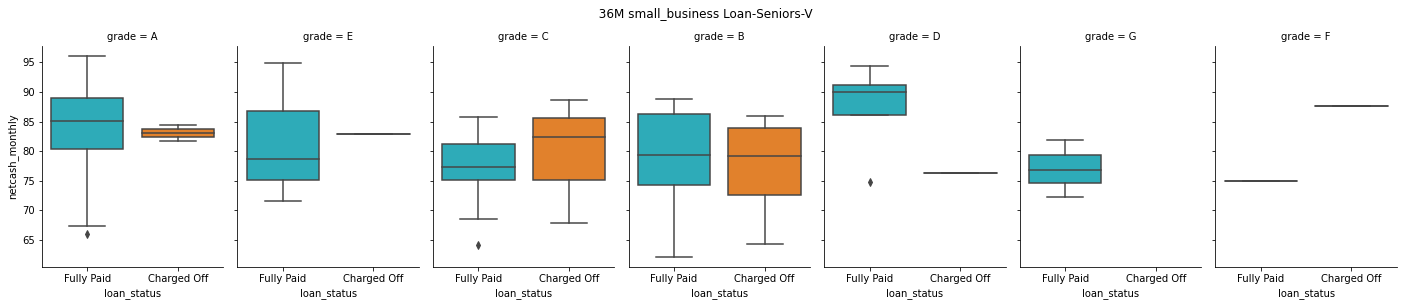

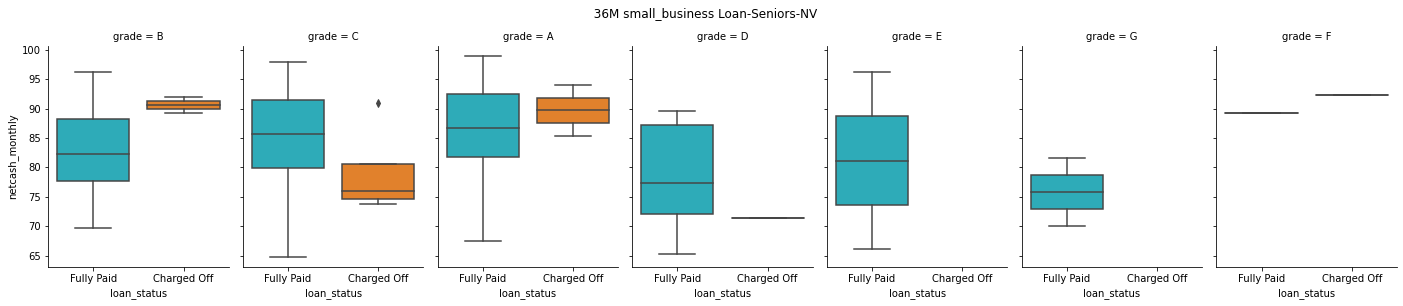

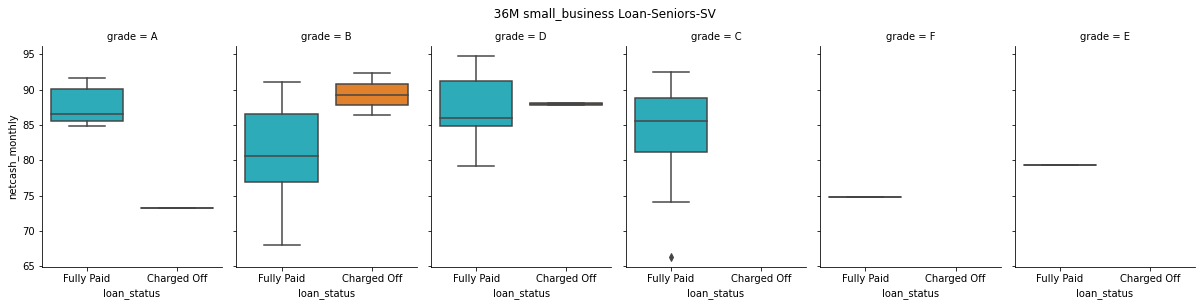

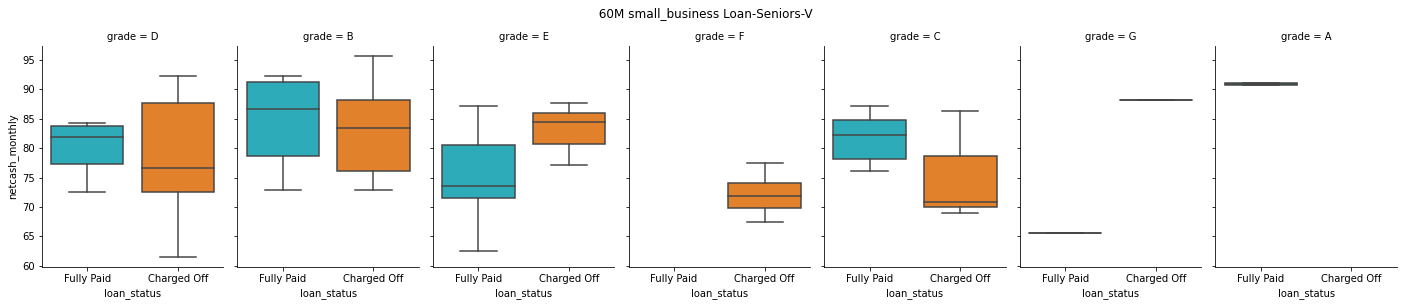

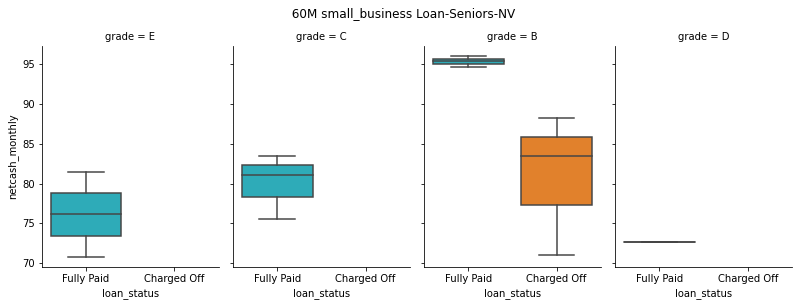

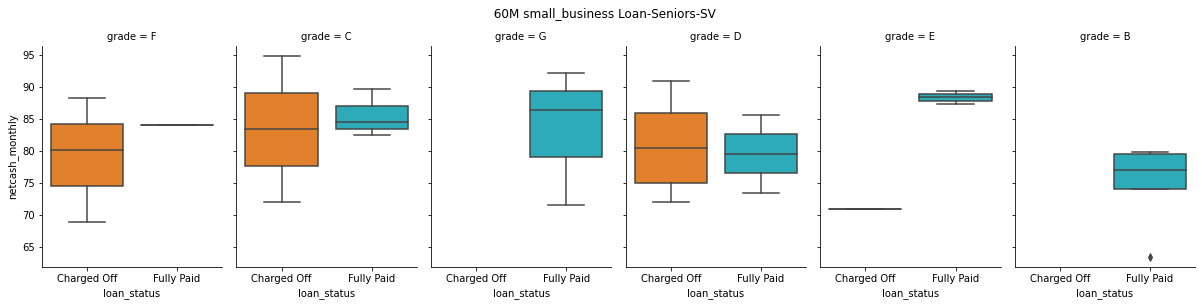

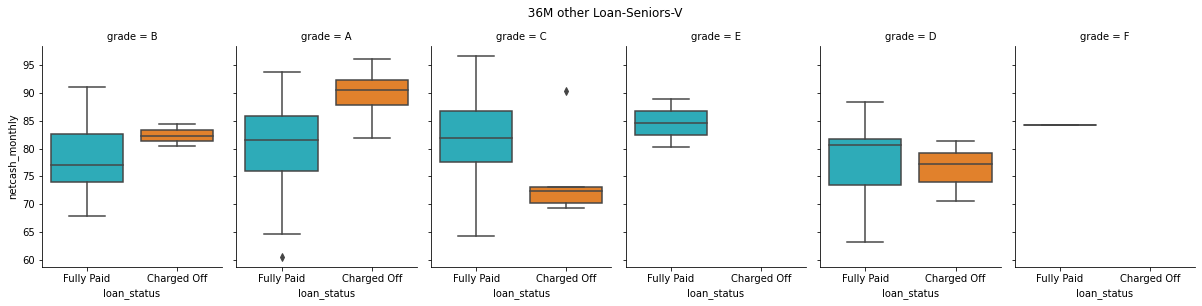

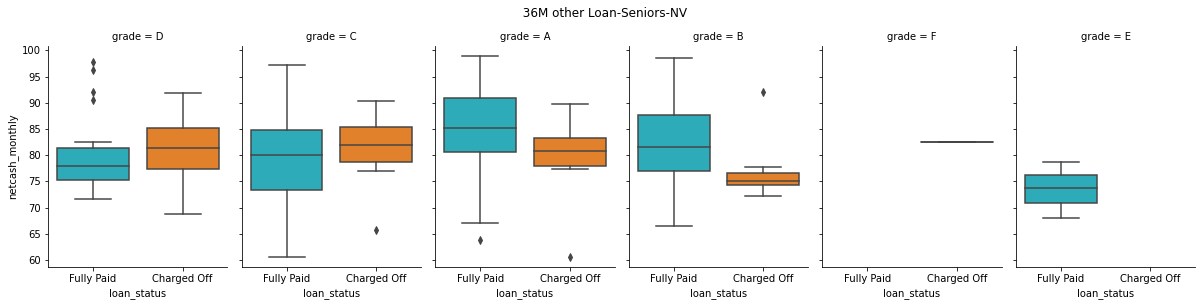

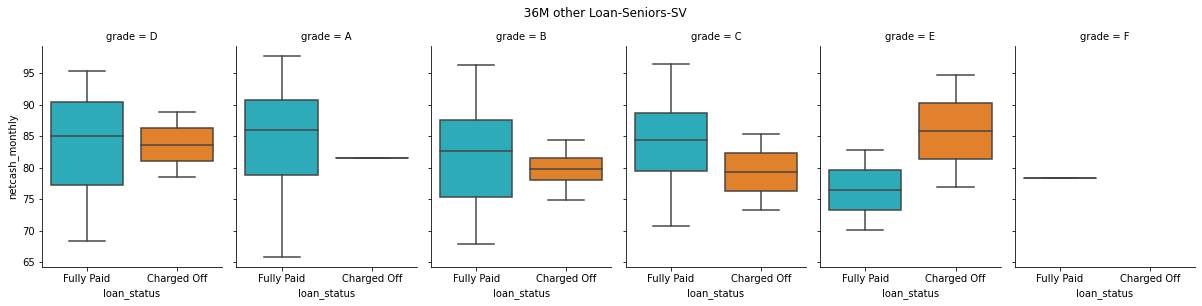

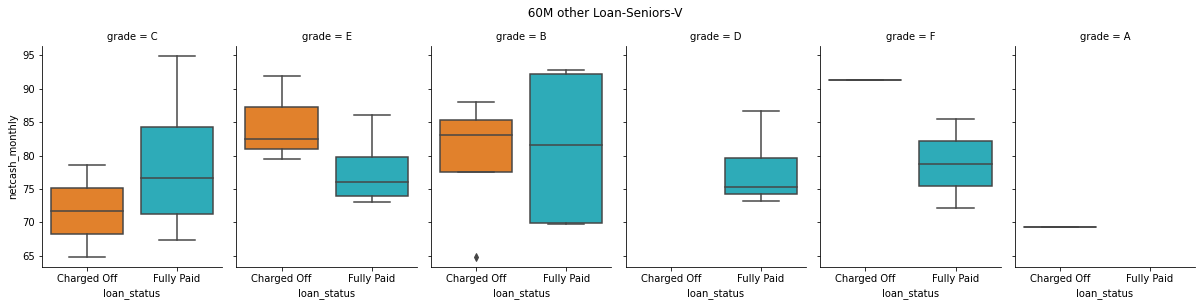

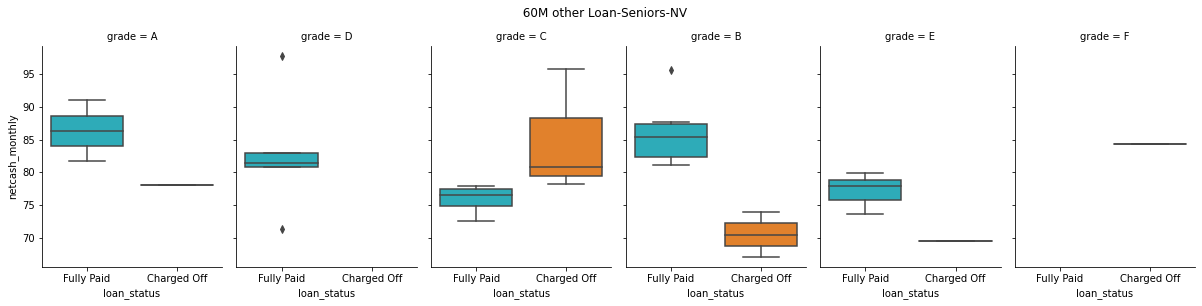

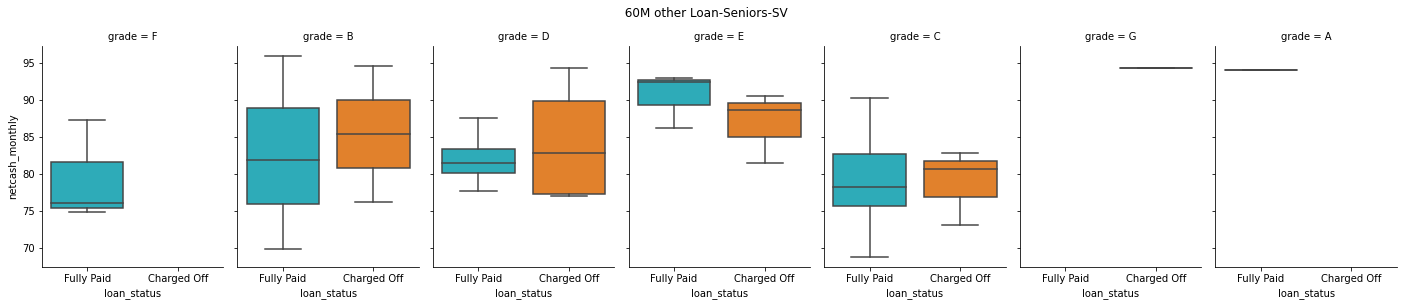

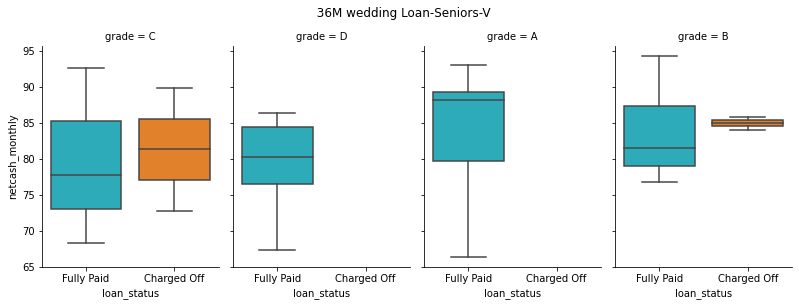

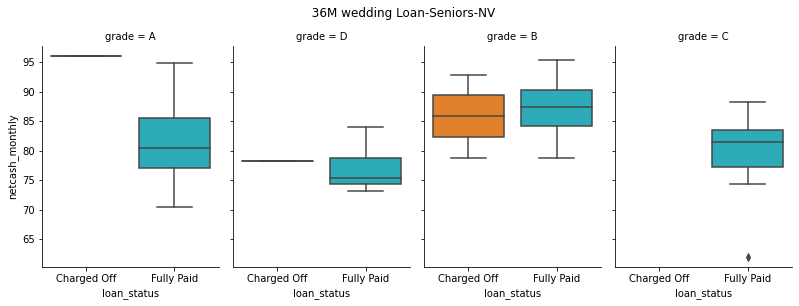

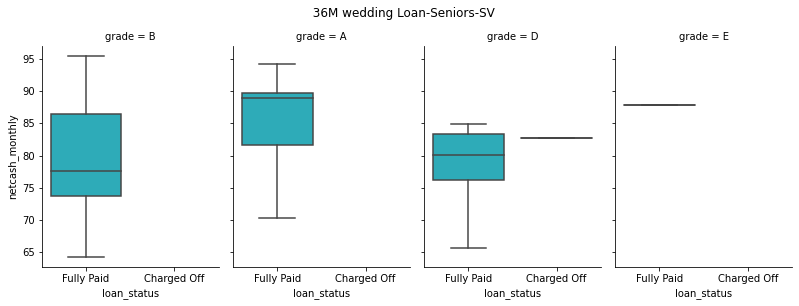

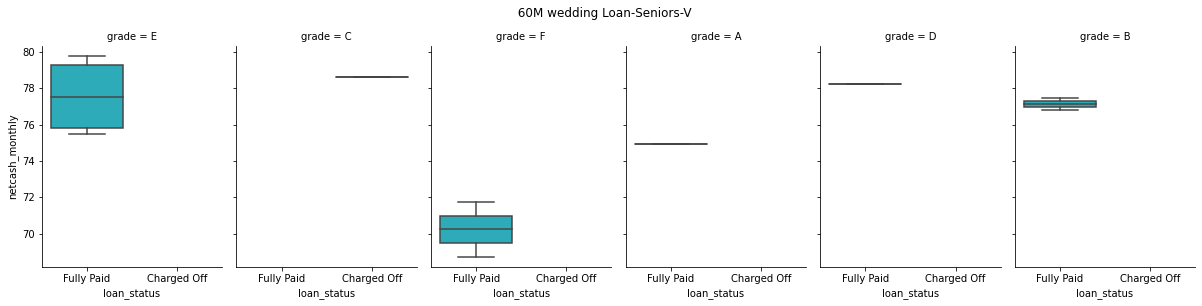

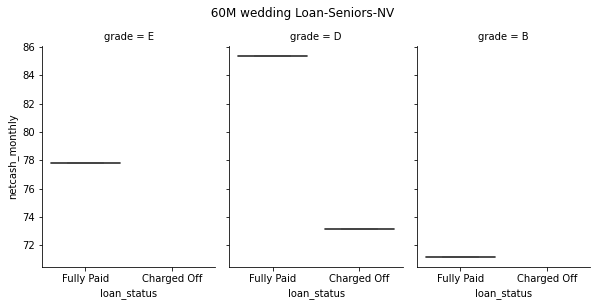

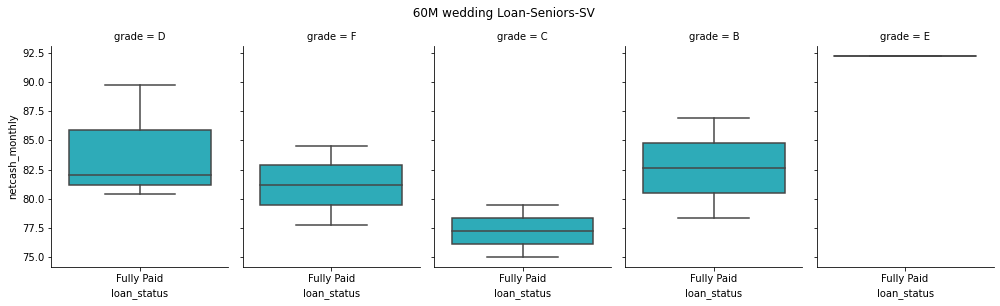

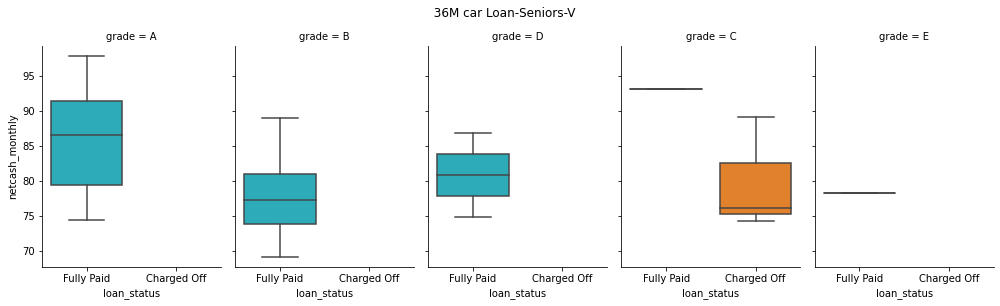

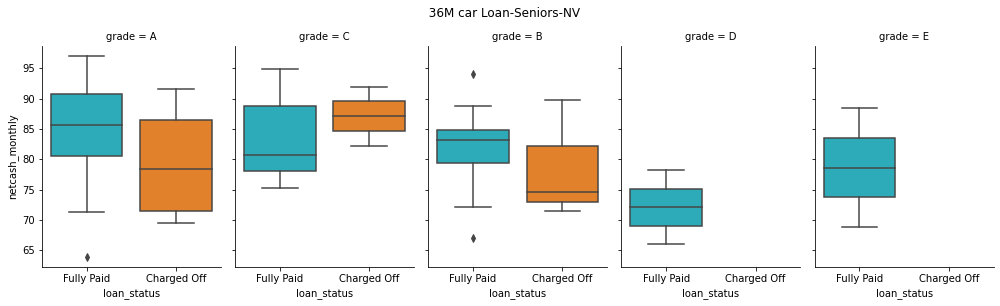

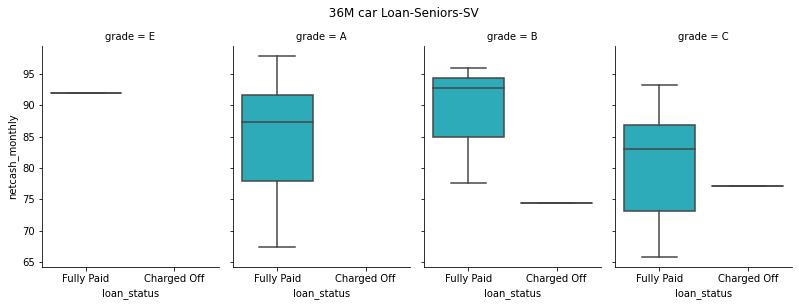

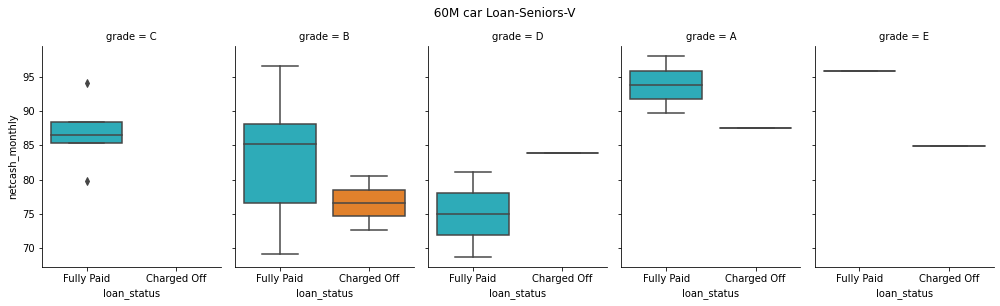

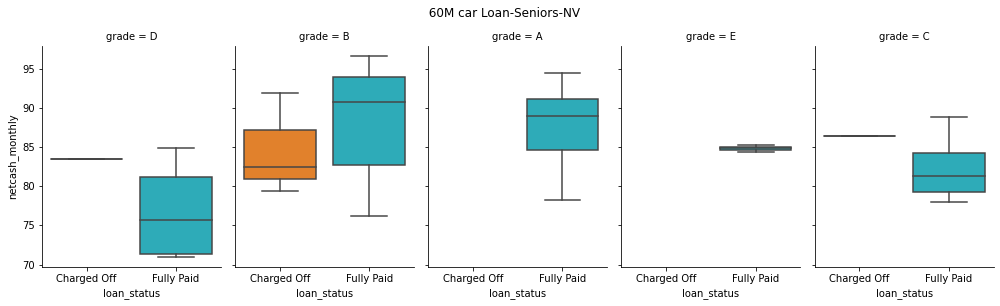

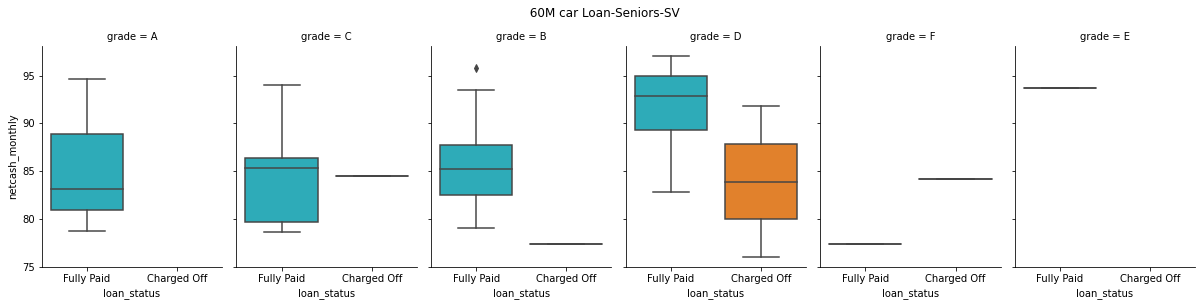

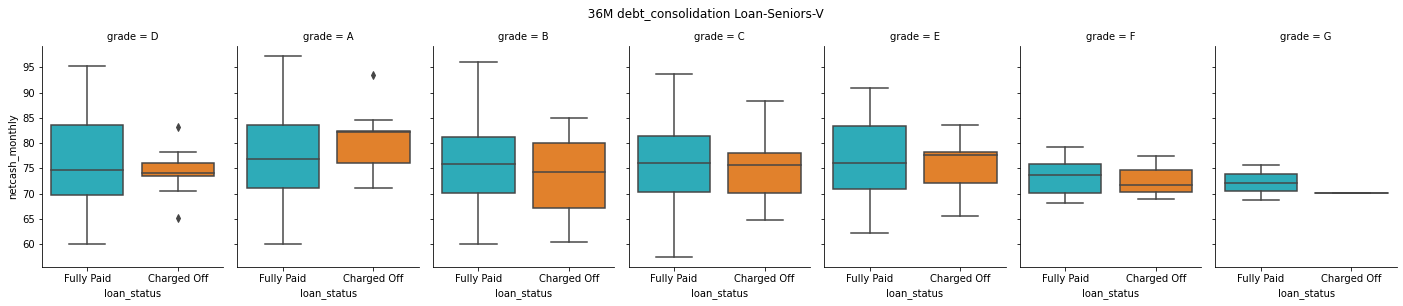

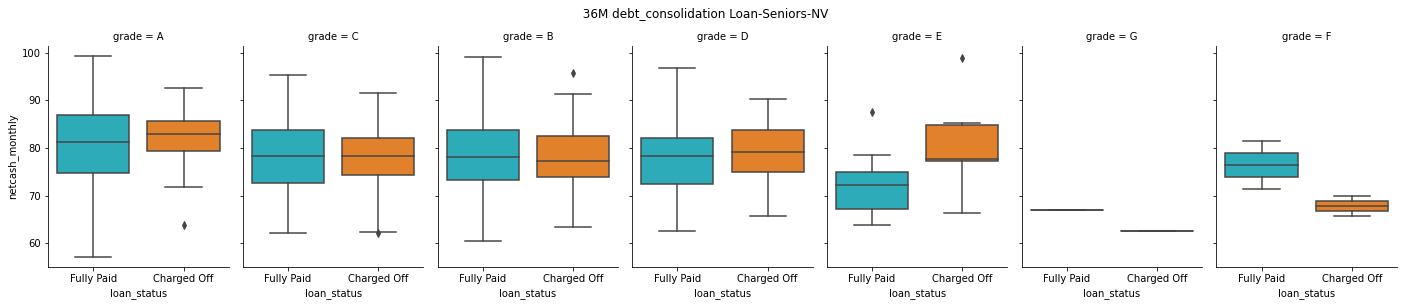

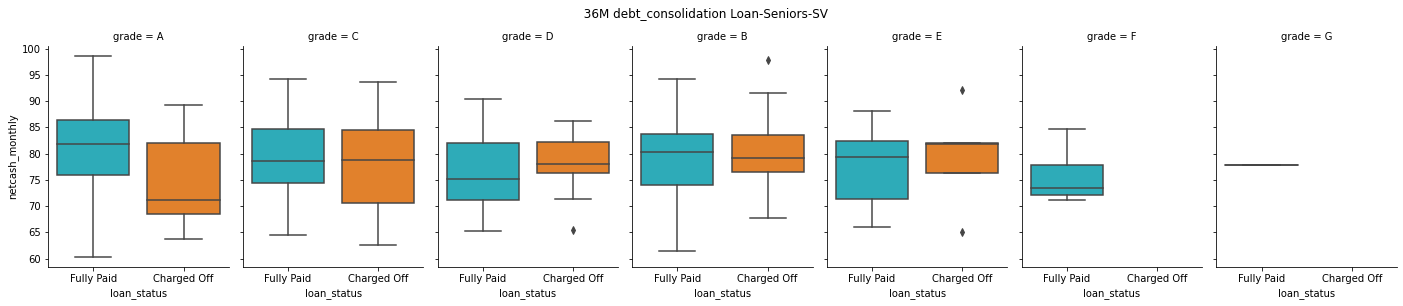

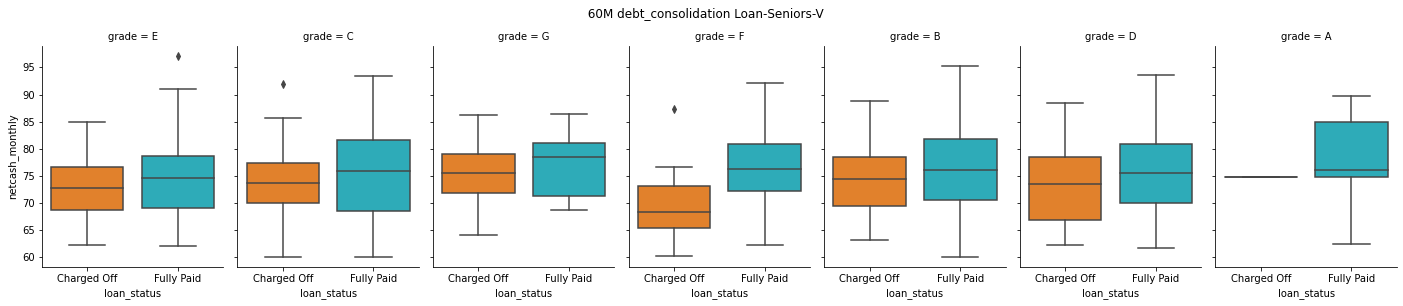

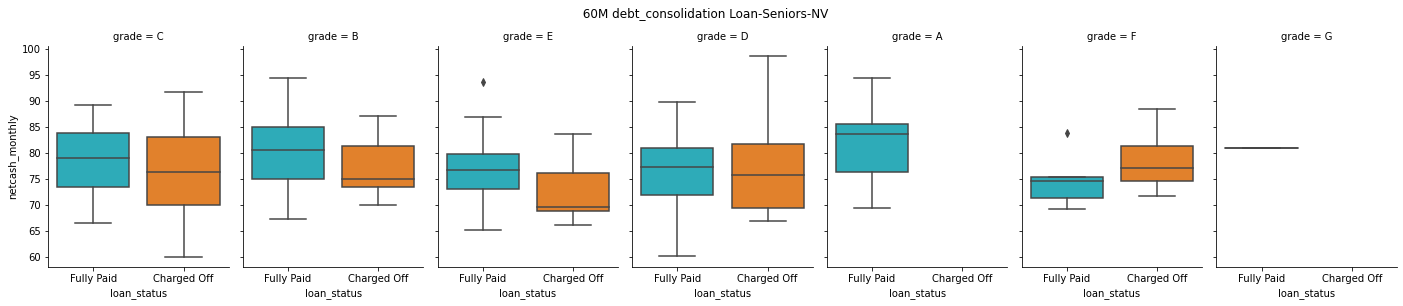

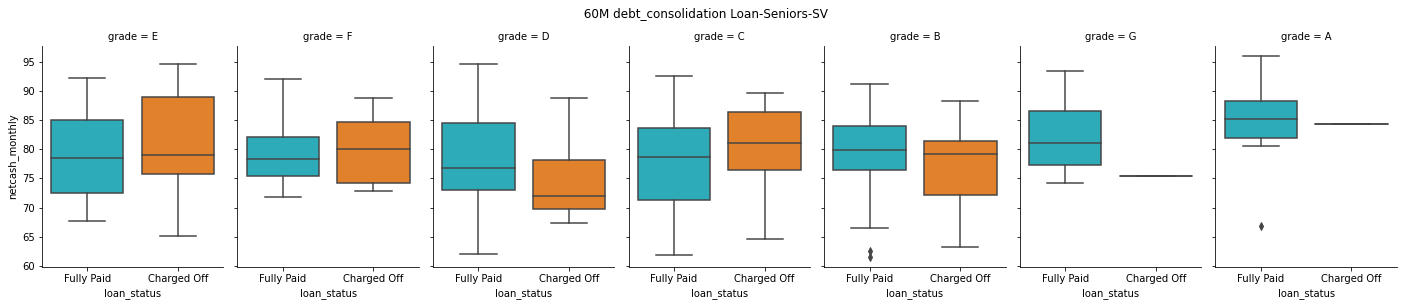

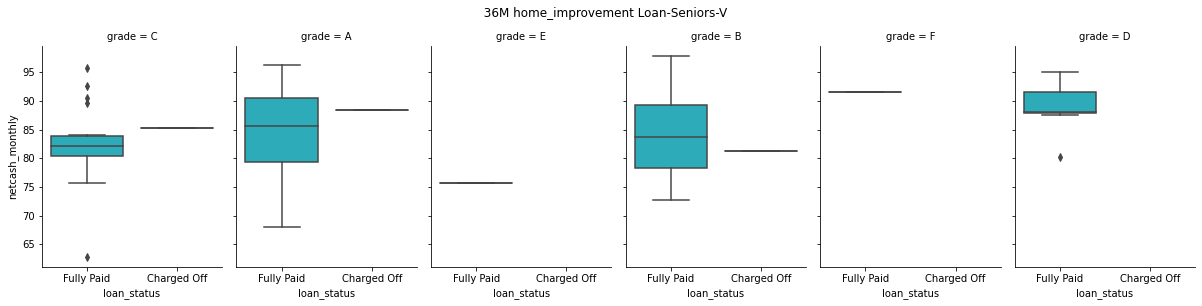

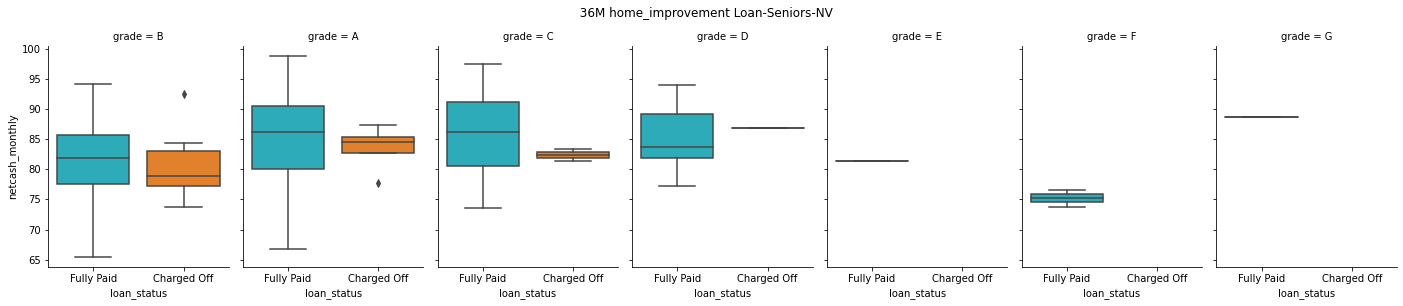

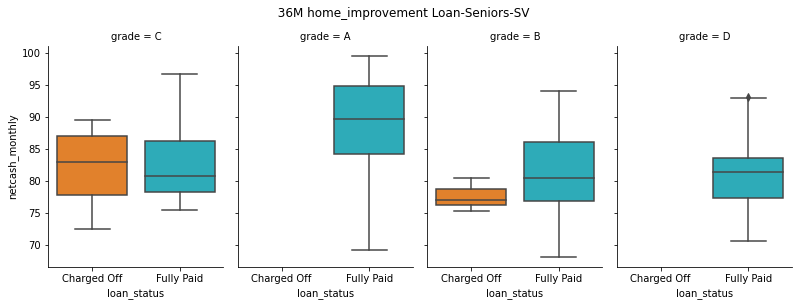

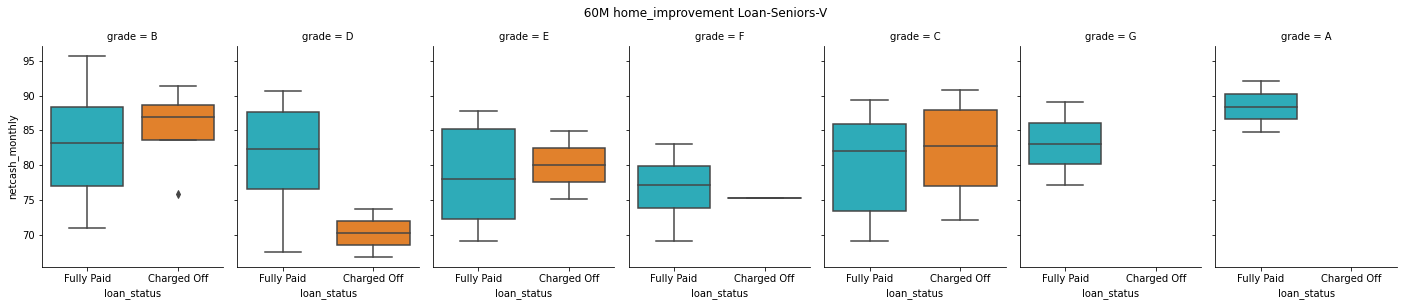

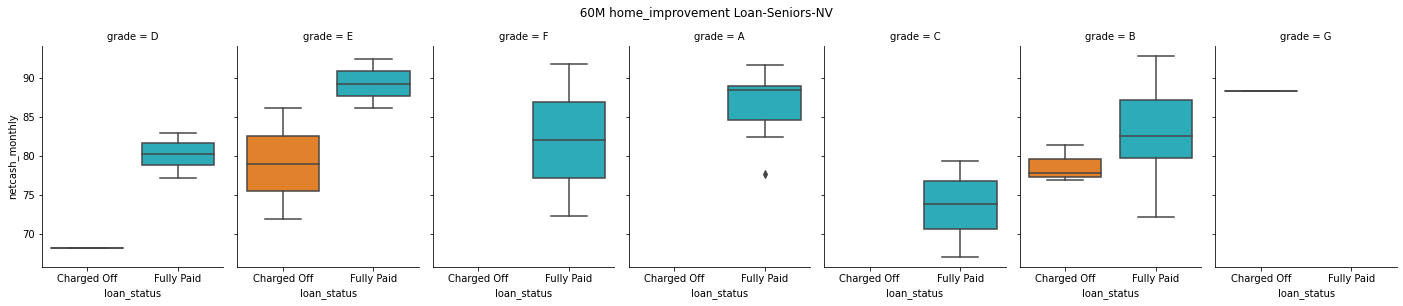

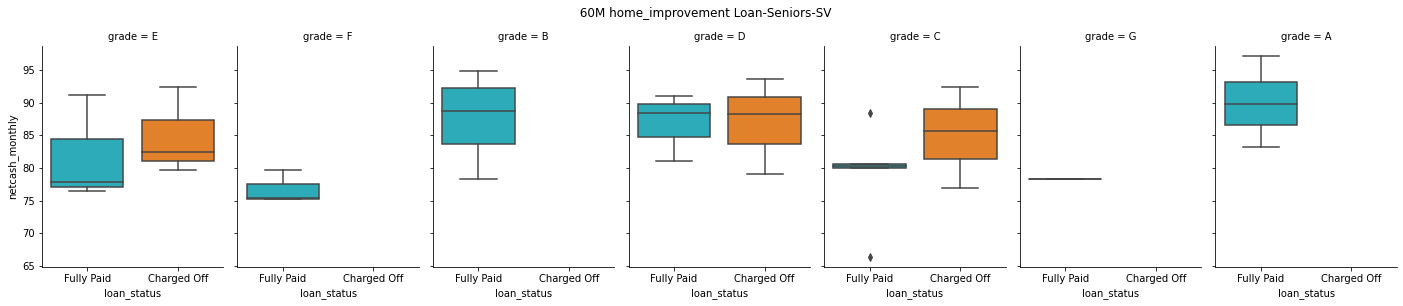

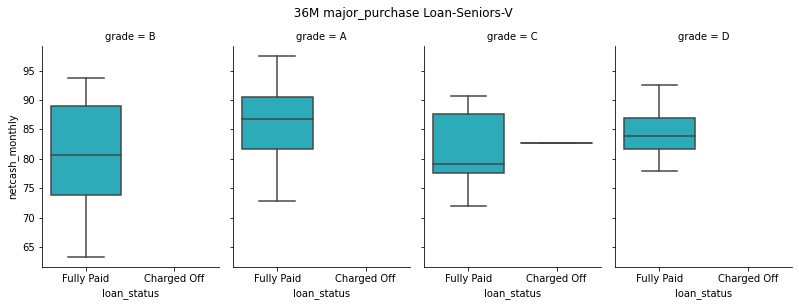

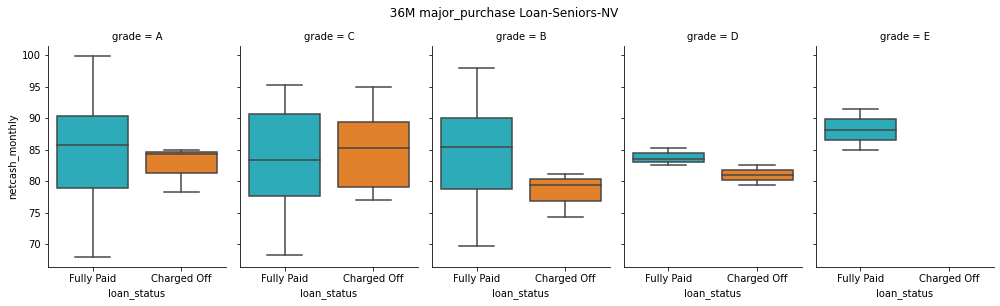

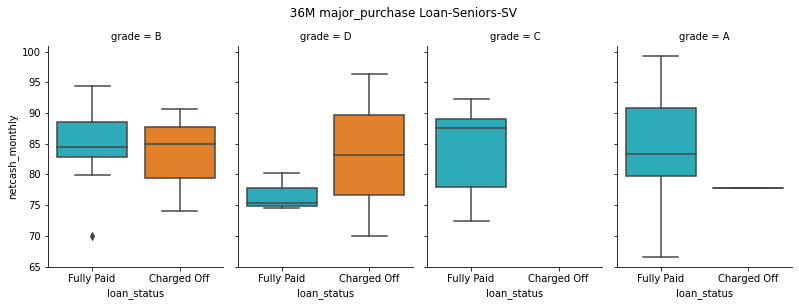

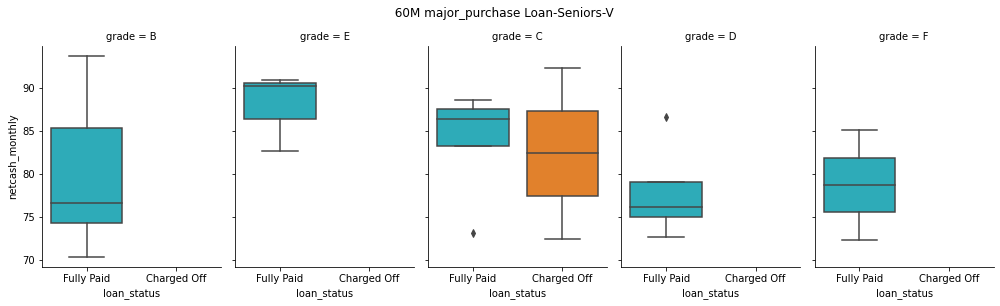

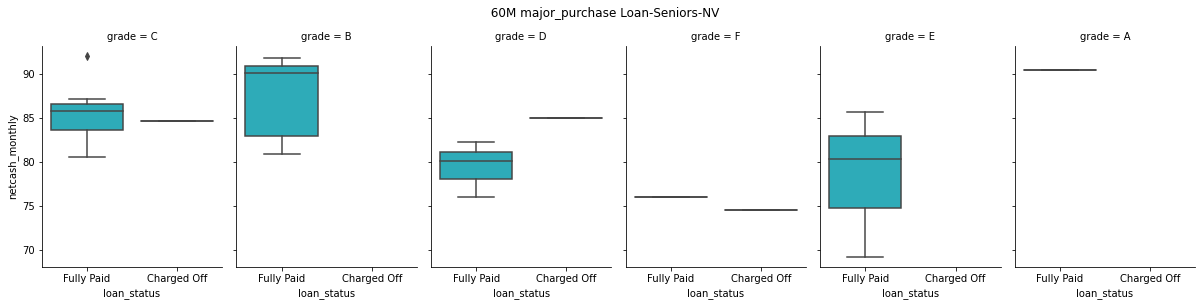

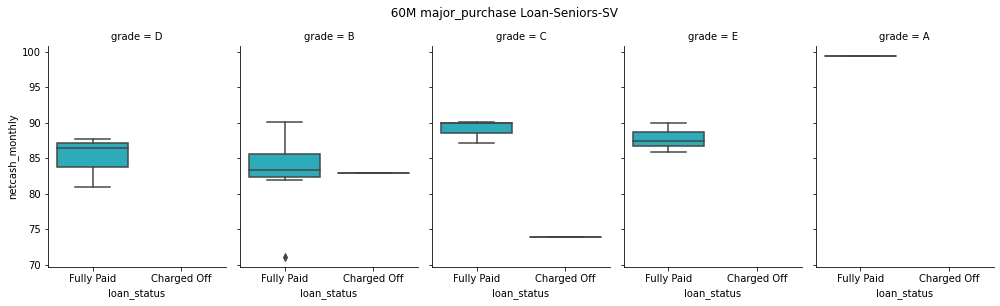

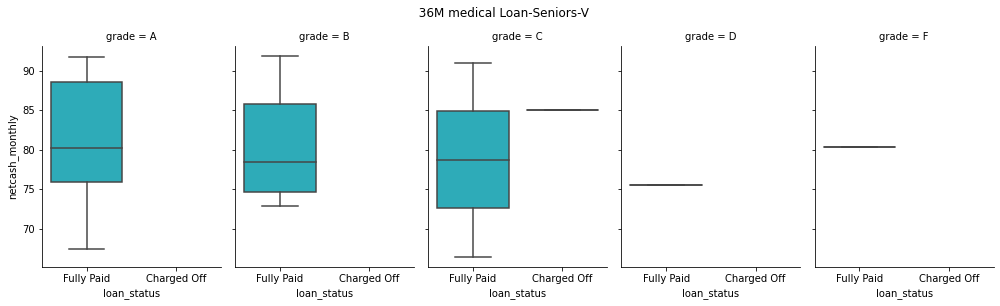

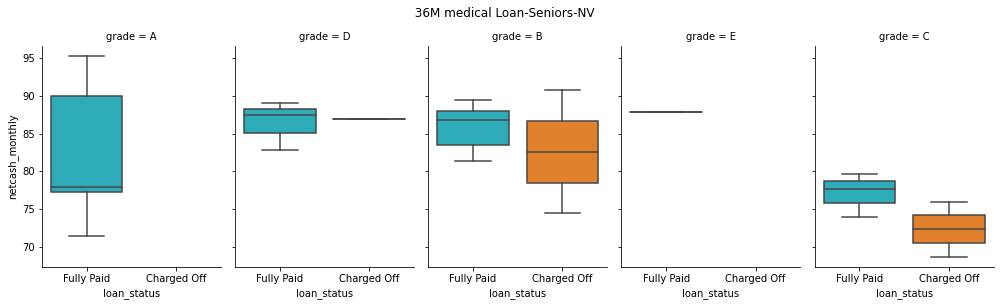

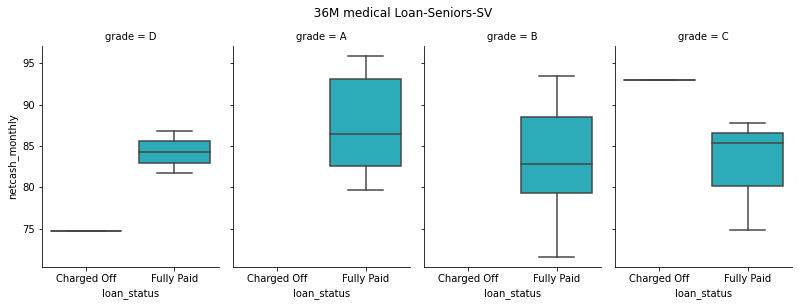

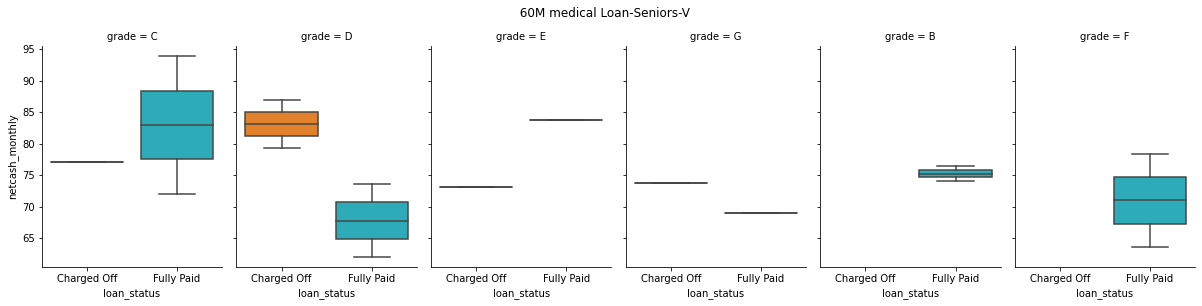

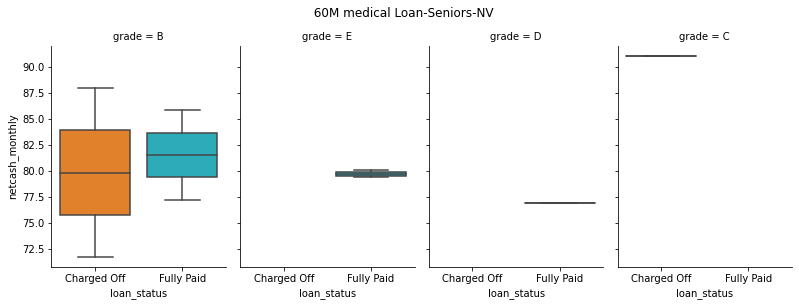

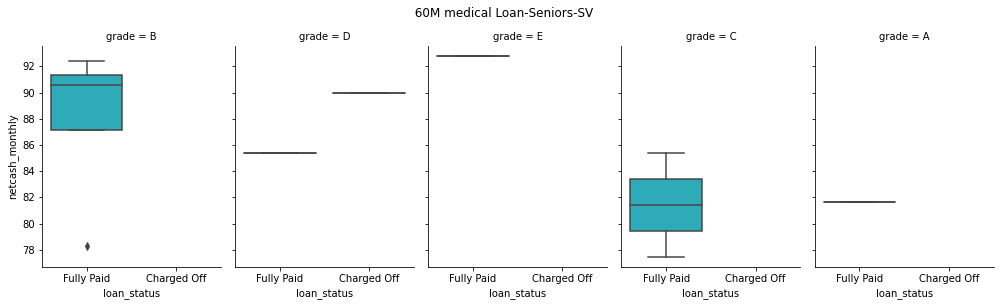

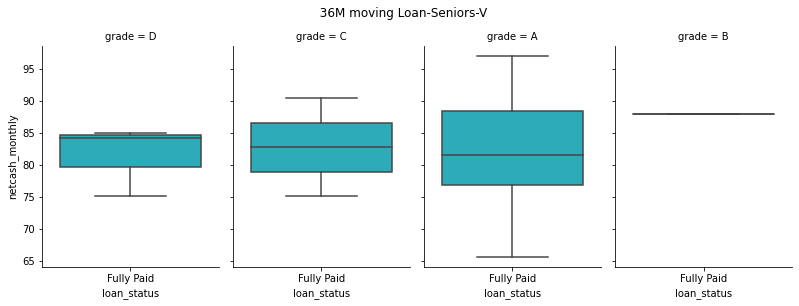

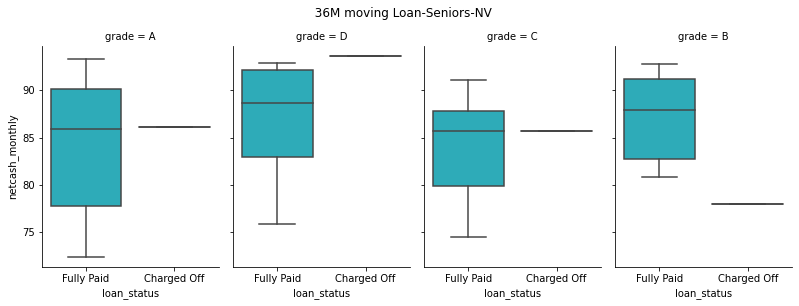

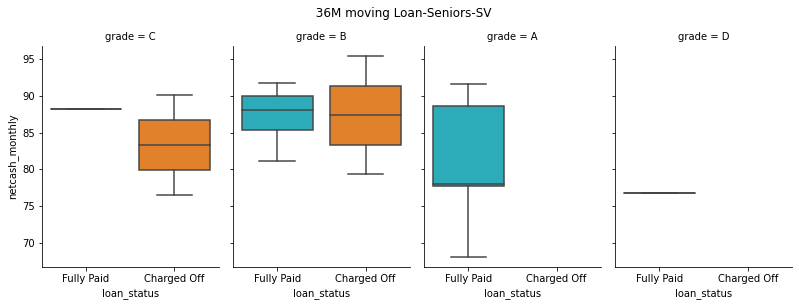

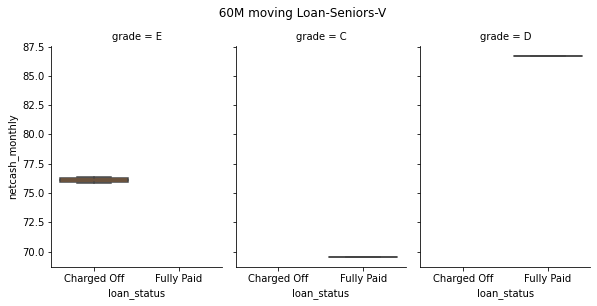

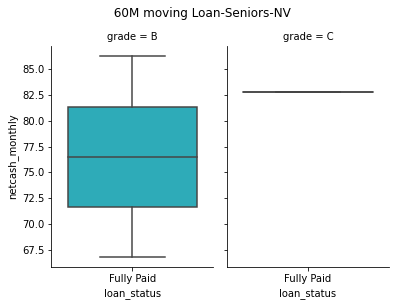

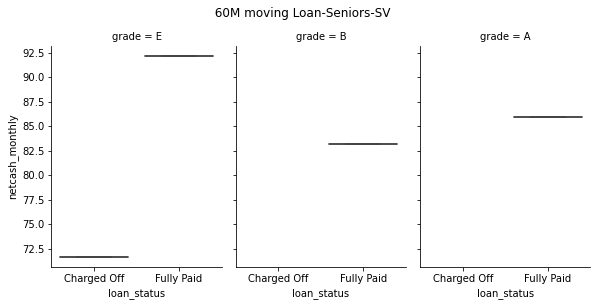

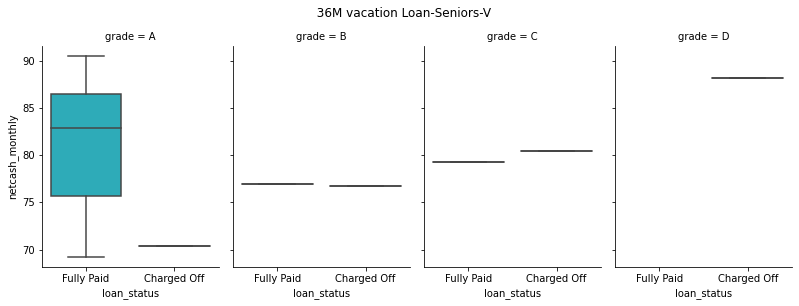

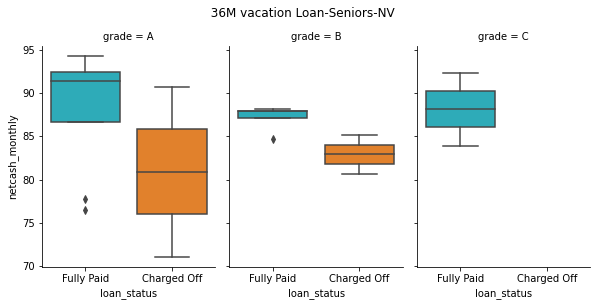

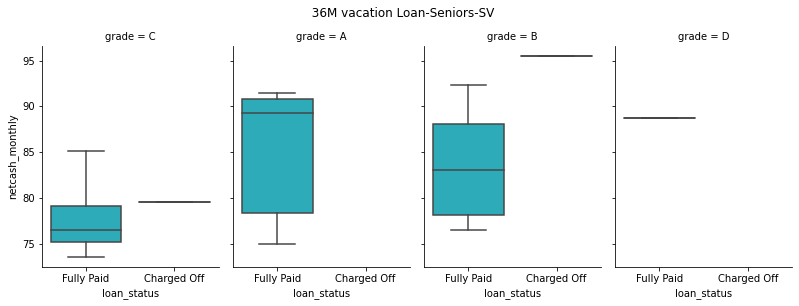

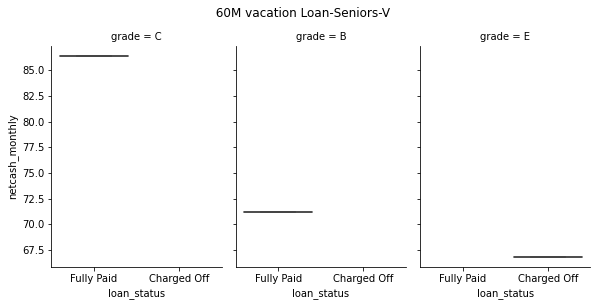

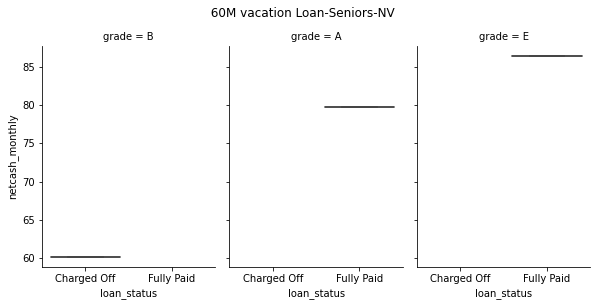

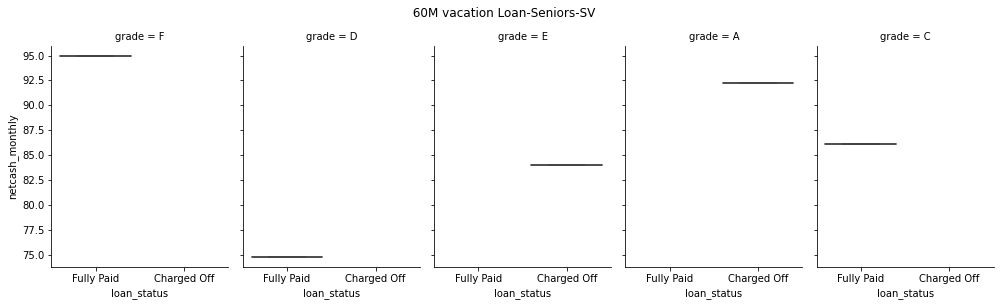

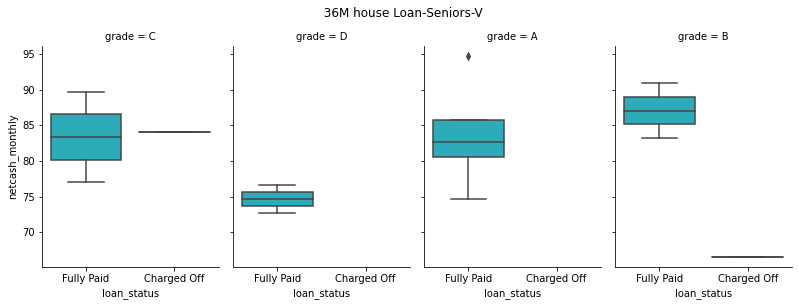

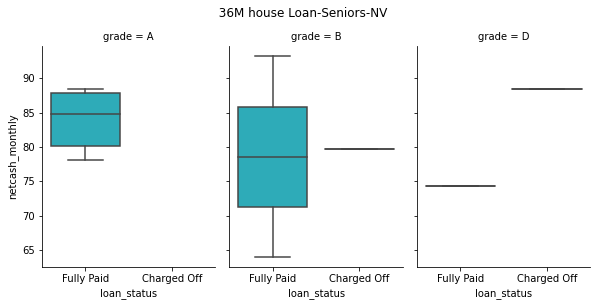

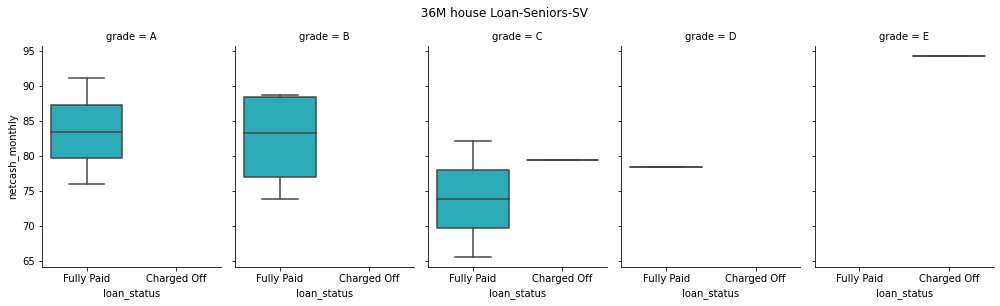

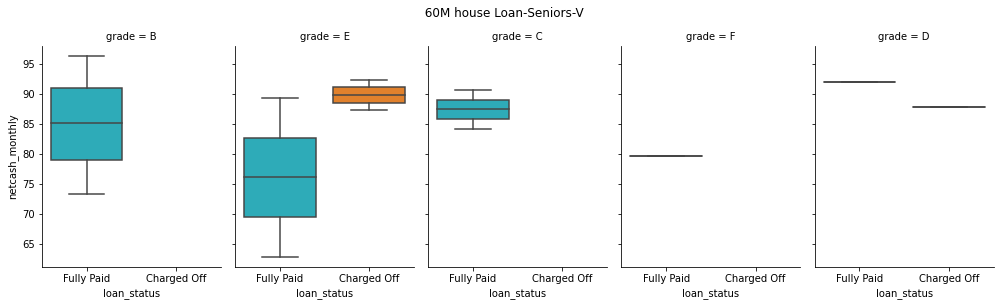

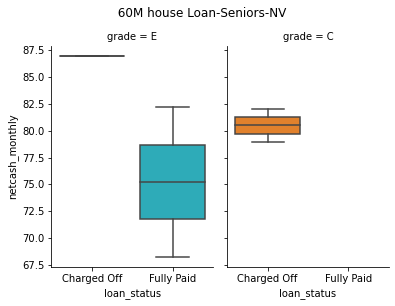

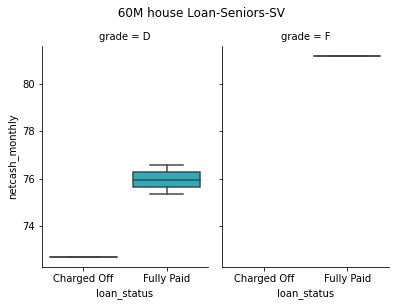

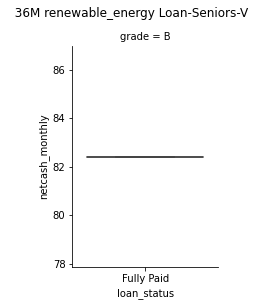

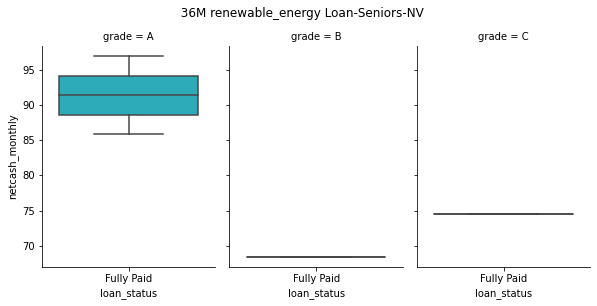

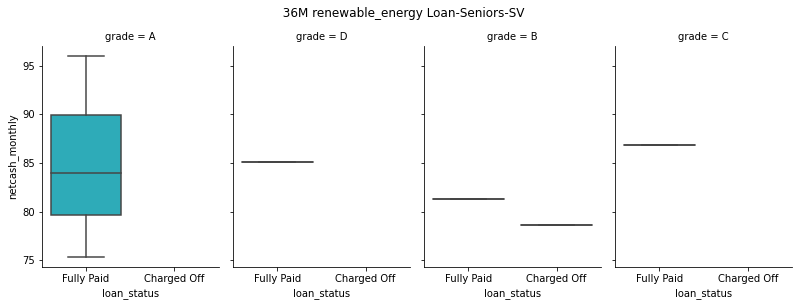

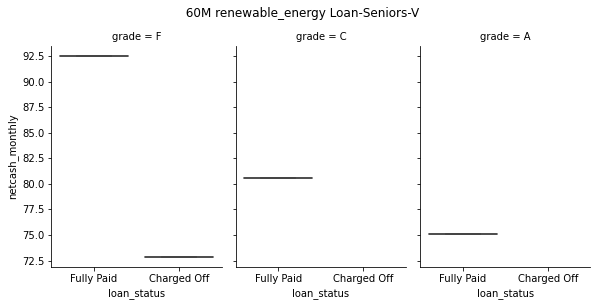

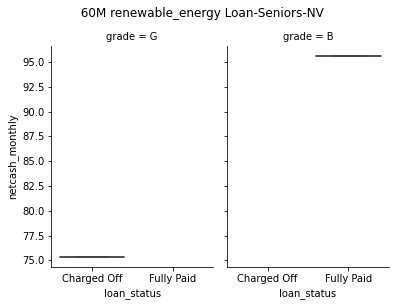

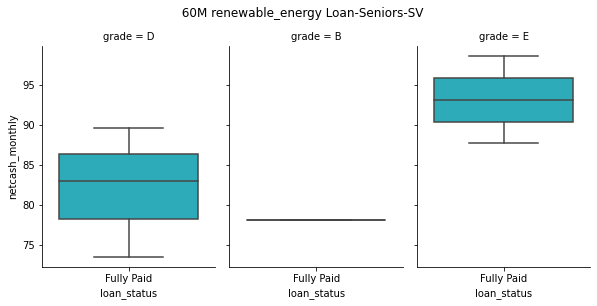

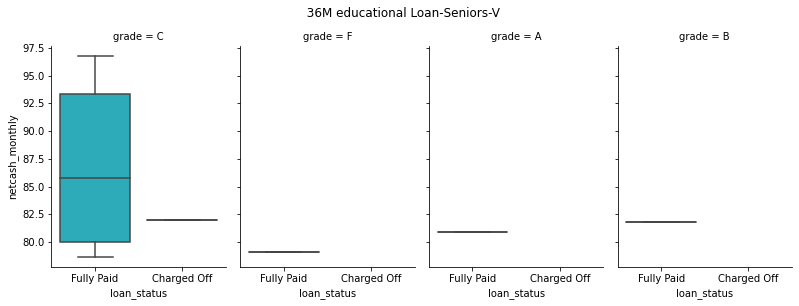

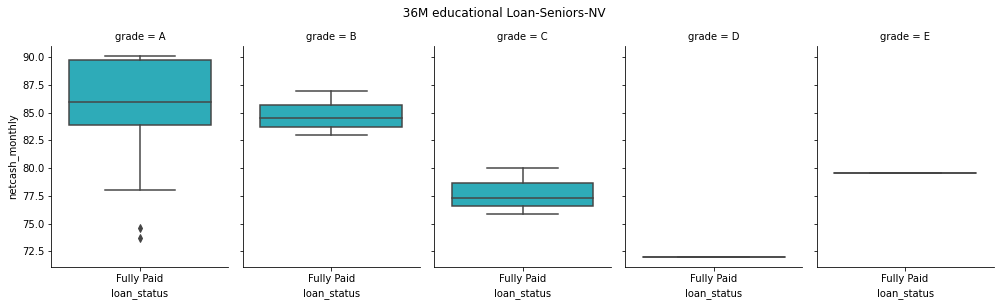

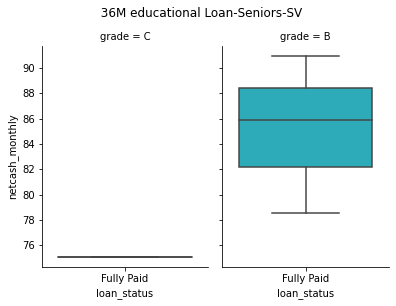

In [878]:
s151 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_senv, kind="box",height=4, aspect=.7,palette=palette)
s151.fig.suptitle("  36M credit_card Loan-Seniors-V",y=1.05)
s152=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_sennv, kind="box",height=4, aspect=.7,palette=palette)
s152.fig.suptitle("  36M credit_card Loan-Seniors-NV",y=1.05)

s153=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_sensv, kind="box",height=4, aspect=.7,palette=palette)
s153.fig.suptitle("  36M credit_card Loan-Seniors-SV",y=1.05)
s154=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_senv, kind="box",height=4, aspect=.7,palette=palette)
s154.fig.suptitle("  60M credit_card Loan-Seniors-V",y=1.05)

s155=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_sennv, kind="box",height=4, aspect=.7,palette=palette)
s155.fig.suptitle("  60M credit_card Loan-Seniors-NV",y=1.05)
s156=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_sensv, kind="box",height=4, aspect=.7,palette=palette)
s156.fig.suptitle("  60M credit_card Loan-Seniors-SV",y=1.05)

s161 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_senv, kind="box",height=4, aspect=.7,palette=palette)
s161.fig.suptitle("  36M small_business Loan-Seniors-V",y=1.05)
s162=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_sennv, kind="box",height=4, aspect=.7,palette=palette)
s162.fig.suptitle("  36M small_business Loan-Seniors-NV",y=1.05)

s163=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_sensv, kind="box",height=4, aspect=.7,palette=palette)
s163.fig.suptitle("  36M small_business Loan-Seniors-SV",y=1.05)
s164=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_senv, kind="box",height=4, aspect=.7,palette=palette)
s164.fig.suptitle("  60M small_business Loan-Seniors-V",y=1.05)

s165=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_sennv, kind="box",height=4, aspect=.7,palette=palette)
s165.fig.suptitle("  60M small_business Loan-Seniors-NV",y=1.05)
s166=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_sensv, kind="box",height=4, aspect=.7,palette=palette)
s166.fig.suptitle("  60M small_business Loan-Seniors-SV",y=1.05)

s171 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_senv, kind="box",height=4, aspect=.7,palette=palette)
s171.fig.suptitle("  36M other Loan-Seniors-V",y=1.05)
s172=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_sennv, kind="box",height=4, aspect=.7,palette=palette)
s172.fig.suptitle("  36M other Loan-Seniors-NV",y=1.05)

s173=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_sensv, kind="box",height=4, aspect=.7,palette=palette)
s173.fig.suptitle("  36M other Loan-Seniors-SV",y=1.05)
s174=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_senv, kind="box",height=4, aspect=.7,palette=palette)
s174.fig.suptitle("  60M other Loan-Seniors-V",y=1.05)

s175=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_sennv, kind="box",height=4, aspect=.7,palette=palette)
s175.fig.suptitle("  60M other Loan-Seniors-NV",y=1.05)
s176=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_sensv, kind="box",height=4, aspect=.7,palette=palette)
s176.fig.suptitle("  60M other Loan-Seniors-SV",y=1.05)

s181 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_senv, kind="box",height=4, aspect=.7,palette=palette)
s181.fig.suptitle("  36M wedding Loan-Seniors-V",y=1.05)
s182=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_sennv, kind="box",height=4, aspect=.7,palette=palette)
s182.fig.suptitle("  36M wedding Loan-Seniors-NV",y=1.05)

s183=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_sensv, kind="box",height=4, aspect=.7,palette=palette)
s183.fig.suptitle("  36M wedding Loan-Seniors-SV",y=1.05)
s184=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_senv, kind="box",height=4, aspect=.7,palette=palette)
s184.fig.suptitle("  60M wedding Loan-Seniors-V",y=1.05)

s185=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_sennv, kind="box",height=4, aspect=.7,palette=palette)
s185.fig.suptitle("  60M wedding Loan-Seniors-NV",y=1.05)
s186=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_sensv, kind="box",height=4, aspect=.7,palette=palette)
s186.fig.suptitle("  60M wedding Loan-Seniors-SV",y=1.05)

s191 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_senv, kind="box",height=4, aspect=.7,palette=palette)
s191.fig.suptitle("  36M car Loan-Seniors-V",y=1.05)
s192=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_sennv, kind="box",height=4, aspect=.7,palette=palette)
s192.fig.suptitle("  36M car Loan-Seniors-NV",y=1.05)

s193=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_sensv, kind="box",height=4, aspect=.7,palette=palette)
s193.fig.suptitle("  36M car Loan-Seniors-SV",y=1.05)
s194=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_senv, kind="box",height=4, aspect=.7,palette=palette)
s194.fig.suptitle("  60M car Loan-Seniors-V",y=1.05)

s195=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_sennv, kind="box",height=4, aspect=.7,palette=palette)
s195.fig.suptitle("  60M car Loan-Seniors-NV",y=1.05)
s196=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_sensv, kind="box",height=4, aspect=.7,palette=palette)
s196.fig.suptitle("  60M car Loan-Seniors-SV",y=1.05)

s201 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_senv, kind="box",height=4, aspect=.7,palette=palette)
s201.fig.suptitle("  36M debt_consolidation Loan-Seniors-V",y=1.05)
s202=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_sennv, kind="box",height=4, aspect=.7,palette=palette)
s202.fig.suptitle("  36M debt_consolidation Loan-Seniors-NV",y=1.05)

s203=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_sensv, kind="box",height=4, aspect=.7,palette=palette)
s203.fig.suptitle("  36M debt_consolidation Loan-Seniors-SV",y=1.05)
s204=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_senv, kind="box",height=4, aspect=.7,palette=palette)
s204.fig.suptitle("  60M debt_consolidation Loan-Seniors-V",y=1.05)

s205=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_sennv, kind="box",height=4, aspect=.7,palette=palette)
s205.fig.suptitle("  60M debt_consolidation Loan-Seniors-NV",y=1.05)
s206=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_sensv, kind="box",height=4, aspect=.7,palette=palette)
s206.fig.suptitle("  60M debt_consolidation Loan-Seniors-SV",y=1.05)

s211 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_senv, kind="box",height=4, aspect=.7,palette=palette)
s211.fig.suptitle("  36M home_improvement Loan-Seniors-V",y=1.05)
s212=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_sennv, kind="box",height=4, aspect=.7,palette=palette)
s212.fig.suptitle("  36M home_improvement Loan-Seniors-NV",y=1.05)

s213=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_sensv, kind="box",height=4, aspect=.7,palette=palette)
s213.fig.suptitle("  36M home_improvement Loan-Seniors-SV",y=1.05)
s214=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_senv, kind="box",height=4, aspect=.7,palette=palette)
s214.fig.suptitle("  60M home_improvement Loan-Seniors-V",y=1.05)

s215=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_sennv, kind="box",height=4, aspect=.7,palette=palette)
s215.fig.suptitle("  60M home_improvement Loan-Seniors-NV",y=1.05)
s216=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_sensv, kind="box",height=4, aspect=.7,palette=palette)
s216.fig.suptitle("  60M home_improvement Loan-Seniors-SV",y=1.05)

s221 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_senv, kind="box",height=4, aspect=.7,palette=palette)
s221.fig.suptitle("  36M major_purchase Loan-Seniors-V",y=1.05)
s222=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_sennv, kind="box",height=4, aspect=.7,palette=palette)
s222.fig.suptitle("  36M major_purchase Loan-Seniors-NV",y=1.05)

s223=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_sensv, kind="box",height=4, aspect=.7,palette=palette)
s223.fig.suptitle("  36M major_purchase Loan-Seniors-SV",y=1.05)
s224=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_senv, kind="box",height=4, aspect=.7,palette=palette)
s224.fig.suptitle("  60M major_purchase Loan-Seniors-V",y=1.05)

s225=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_sennv, kind="box",height=4, aspect=.7,palette=palette)
s225.fig.suptitle("  60M major_purchase Loan-Seniors-NV",y=1.05)
s226=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_sensv, kind="box",height=4, aspect=.7,palette=palette)
s226.fig.suptitle("  60M major_purchase Loan-Seniors-SV",y=1.05)

s231 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_senv, kind="box",height=4, aspect=.7,palette=palette)
s231.fig.suptitle("  36M medical Loan-Seniors-V",y=1.05)
s232=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_sennv, kind="box",height=4, aspect=.7,palette=palette)
s232.fig.suptitle("  36M medical Loan-Seniors-NV",y=1.05)

s233=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_sensv, kind="box",height=4, aspect=.7,palette=palette)
s233.fig.suptitle("  36M medical Loan-Seniors-SV",y=1.05)
s234=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_senv, kind="box",height=4, aspect=.7,palette=palette)
s234.fig.suptitle("  60M medical Loan-Seniors-V",y=1.05)

s235=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_sennv, kind="box",height=4, aspect=.7,palette=palette)
s235.fig.suptitle("  60M medical Loan-Seniors-NV",y=1.05)
s236=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_sensv, kind="box",height=4, aspect=.7,palette=palette)
s236.fig.suptitle("  60M medical Loan-Seniors-SV",y=1.05)

s241 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_senv, kind="box",height=4, aspect=.7,palette=palette)
s241.fig.suptitle("  36M moving Loan-Seniors-V",y=1.05)
s242=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_sennv, kind="box",height=4, aspect=.7,palette=palette)
s242.fig.suptitle("  36M moving Loan-Seniors-NV",y=1.05)

s243=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_sensv, kind="box",height=4, aspect=.7,palette=palette)
s243.fig.suptitle("  36M moving Loan-Seniors-SV",y=1.05)
s244=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_senv, kind="box",height=4, aspect=.7,palette=palette)
s244.fig.suptitle("  60M moving Loan-Seniors-V",y=1.05)

s245=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_sennv, kind="box",height=4, aspect=.7,palette=palette)
s245.fig.suptitle("  60M moving Loan-Seniors-NV",y=1.05)
s246=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_sensv, kind="box",height=4, aspect=.7,palette=palette)
s246.fig.suptitle("  60M moving Loan-Seniors-SV",y=1.05)

s251 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_senv, kind="box",height=4, aspect=.7,palette=palette)
s251.fig.suptitle("  36M vacation Loan-Seniors-V",y=1.05)
s252=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_sennv, kind="box",height=4, aspect=.7,palette=palette)
s252.fig.suptitle("  36M vacation Loan-Seniors-NV",y=1.05)

s253=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_sensv, kind="box",height=4, aspect=.7,palette=palette)
s253.fig.suptitle("  36M vacation Loan-Seniors-SV",y=1.05)
s254=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_senv, kind="box",height=4, aspect=.7,palette=palette)
s254.fig.suptitle("  60M vacation Loan-Seniors-V",y=1.05)

s255=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_sennv, kind="box",height=4, aspect=.7,palette=palette)
s255.fig.suptitle("  60M vacation Loan-Seniors-NV",y=1.05)
s256=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_sensv, kind="box",height=4, aspect=.7,palette=palette)
s256.fig.suptitle("  60M vacation Loan-Seniors-SV",y=1.05)

s261 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_senv, kind="box",height=4, aspect=.7,palette=palette)
s261.fig.suptitle("  36M house Loan-Seniors-V",y=1.05)
s262=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_sennv, kind="box",height=4, aspect=.7,palette=palette)
s262.fig.suptitle("  36M house Loan-Seniors-NV",y=1.05)

s263=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_sensv, kind="box",height=4, aspect=.7,palette=palette)
s263.fig.suptitle("  36M house Loan-Seniors-SV",y=1.05)
s264=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_senv, kind="box",height=4, aspect=.7,palette=palette)
s264.fig.suptitle("  60M house Loan-Seniors-V",y=1.05)

s265=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_sennv, kind="box",height=4, aspect=.7,palette=palette)
s265.fig.suptitle("  60M house Loan-Seniors-NV",y=1.05)
s266=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_sensv, kind="box",height=4, aspect=.7,palette=palette)
s266.fig.suptitle("  60M house Loan-Seniors-SV",y=1.05)

s271 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_senv, kind="box",height=4, aspect=.7,palette=palette)
s271.fig.suptitle("  36M renewable_energy Loan-Seniors-V",y=1.05)
s272=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_sennv, kind="box",height=4, aspect=.7,palette=palette)
s272.fig.suptitle("  36M renewable_energy Loan-Seniors-NV",y=1.05)

s273=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_sensv, kind="box",height=4, aspect=.7,palette=palette)
s273.fig.suptitle("  36M renewable_energy Loan-Seniors-SV",y=1.05)
s274=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_senv, kind="box",height=4, aspect=.7,palette=palette)
s274.fig.suptitle("  60M renewable_energy Loan-Seniors-V",y=1.05)

s275=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_sennv, kind="box",height=4, aspect=.7,palette=palette)
s275.fig.suptitle("  60M renewable_energy Loan-Seniors-NV",y=1.05)
s276=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_sensv, kind="box",height=4, aspect=.7,palette=palette)
s276.fig.suptitle("  60M renewable_energy Loan-Seniors-SV",y=1.05)

s281 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_senv, kind="box",height=4, aspect=.7,palette=palette)
s281.fig.suptitle("  36M educational Loan-Seniors-V",y=1.05)
s282=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_sennv, kind="box",height=4, aspect=.7,palette=palette)
s282.fig.suptitle("  36M educational Loan-Seniors-NV",y=1.05)

s283=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_sensv, kind="box",height=4, aspect=.7,palette=palette)
s283.fig.suptitle("  36M educational Loan-Seniors-SV",y=1.05)
s284=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_senv, kind="box",height=4, aspect=.7,palette=palette)
s284.fig.suptitle("  60M educational Loan-Seniors-V",y=1.05)

s285=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_sennv, kind="box",height=4, aspect=.7,palette=palette)
s285.fig.suptitle("  60M educational Loan-Seniors-NV",y=1.05)
s286=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_sensv, kind="box",height=4, aspect=.7,palette=palette)
s286.fig.suptitle("  60M educational Loan-Seniors-SV",y=1.05)


In [879]:
loan36cc_vsenv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36cc_vsennv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36cc_vsensv=loan_36M[(loan_36M["purpose"]=="credit_card")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60cc_vsenv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60cc_vsennv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60cc_vsensv=loan_60M[(loan_60M["purpose"]=="credit_card")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36sb_vsenv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36sb_vsennv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36sb_vsensv=loan_36M[(loan_36M["purpose"]=="small_business")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60sb_vsenv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60sb_vsennv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60sb_vsensv=loan_60M[(loan_60M["purpose"]=="small_business")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36oth_vsenv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36oth_vsennv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36oth_vsensv=loan_36M[(loan_36M["purpose"]=="other")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60oth_vsenv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60oth_vsennv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60oth_vsensv=loan_60M[(loan_60M["purpose"]=="other")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36wd_vsenv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36wd_vsennv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36wd_vsensv=loan_36M[(loan_36M["purpose"]=="wedding")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60wd_vsenv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60wd_vsennv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60wd_vsensv=loan_60M[(loan_60M["purpose"]=="wedding")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36car_vsenv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36car_vsennv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36car_vsensv=loan_36M[(loan_36M["purpose"]=="car")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60car_vsenv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60car_vsennv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60car_vsensv=loan_60M[(loan_60M["purpose"]=="car")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36dc_vsenv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36dc_vsennv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36dc_vsensv=loan_36M[(loan_36M["purpose"]=="debt_consolidation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60dc_vsenv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60dc_vsennv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60dc_vsensv=loan_60M[(loan_60M["purpose"]=="debt_consolidation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hi_vsenv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36hi_vsennv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hi_vsensv=loan_36M[(loan_36M["purpose"]=="home_improvement")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hi_vsenv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60hi_vsennv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hi_vsensv=loan_60M[(loan_60M["purpose"]=="home_improvement")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mp_vsenv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36mp_vsennv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mp_vsensv=loan_36M[(loan_36M["purpose"]=="major_purchase")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mp_vsenv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60mp_vsennv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mp_vsensv=loan_60M[(loan_60M["purpose"]=="major_purchase")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36med_vsenv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36med_vsennv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36med_vsensv=loan_36M[(loan_36M["purpose"]=="medical")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60med_vsenv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60med_vsennv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60med_vsensv=loan_60M[(loan_60M["purpose"]=="medical")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36mov_vsenv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36mov_vsennv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36mov_vsensv=loan_36M[(loan_36M["purpose"]=="moving")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60mov_vsenv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60mov_vsennv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60mov_vsensv=loan_60M[(loan_60M["purpose"]=="moving")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36vac_vsenv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36vac_vsennv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36vac_vsensv=loan_36M[(loan_36M["purpose"]=="vacation")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60vac_vsenv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60vac_vsennv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60vac_vsensv=loan_60M[(loan_60M["purpose"]=="vacation")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36hou_vsenv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36hou_vsennv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36hou_vsensv=loan_36M[(loan_36M["purpose"]=="house")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60hou_vsenv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60hou_vsennv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60hou_vsensv=loan_60M[(loan_60M["purpose"]=="house")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36re_vsenv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36re_vsennv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36re_vsensv=loan_36M[(loan_36M["purpose"]=="renewable_energy")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60re_vsenv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60re_vsennv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60re_vsensv=loan_60M[(loan_60M["purpose"]=="renewable_energy")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]

loan36edu_vsenv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Verified")]
loan36edu_vsennv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Not Verified")]

loan36edu_vsensv=loan_36M[(loan_36M["purpose"]=="educational")&(loan_36M["emp_exper"]=="vsenior")&(loan_36M["verification_status"]=="Source Verified")]
loan60edu_vsenv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Verified")]

loan60edu_vsennv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Not Verified")]
loan60edu_vsensv=loan_60M[(loan_60M["purpose"]=="educational")&(loan_60M["emp_exper"]=="vsenior")&(loan_60M["verification_status"]=="Source Verified")]


C:\Users\e880156\Anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


ValueError: min() arg is an empty sequence

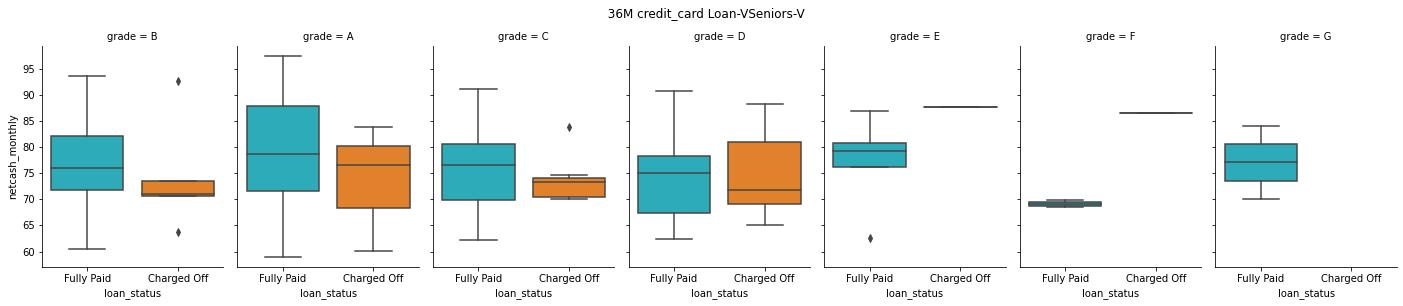

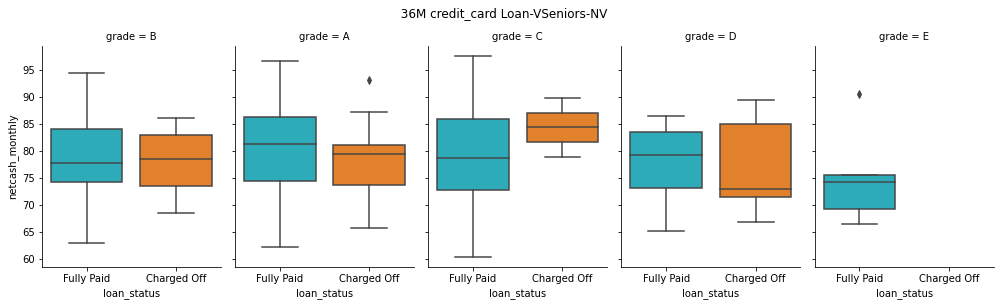

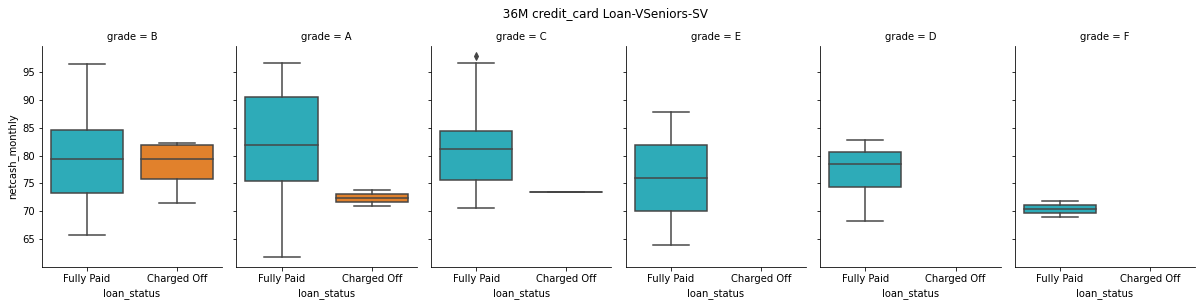

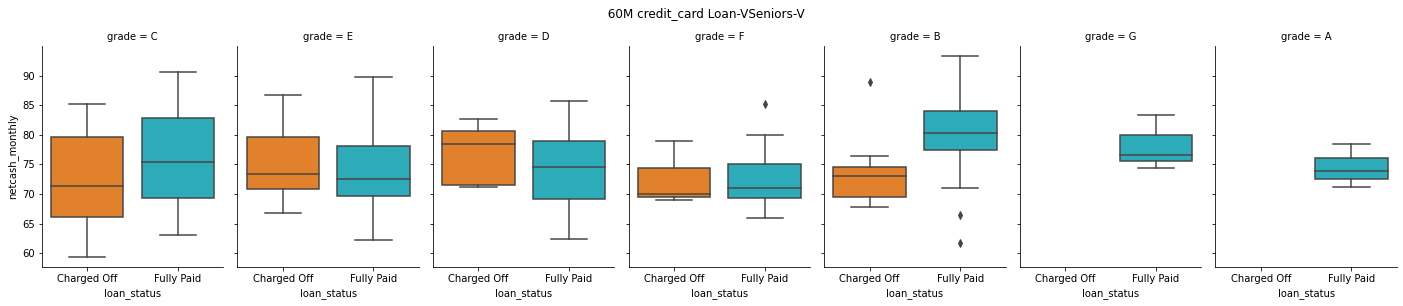

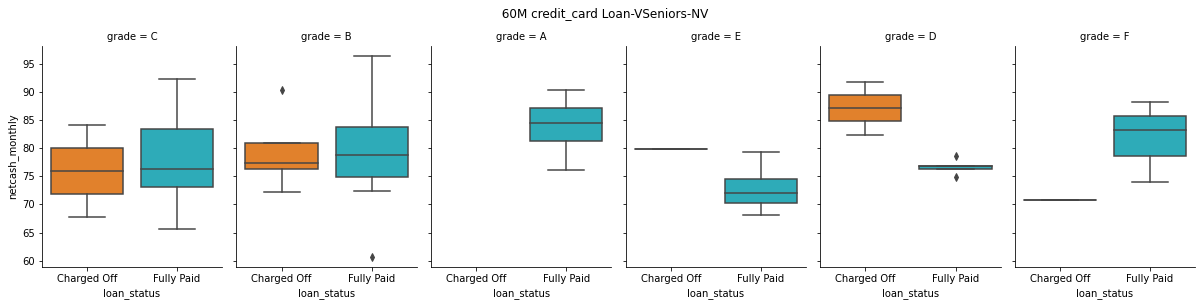

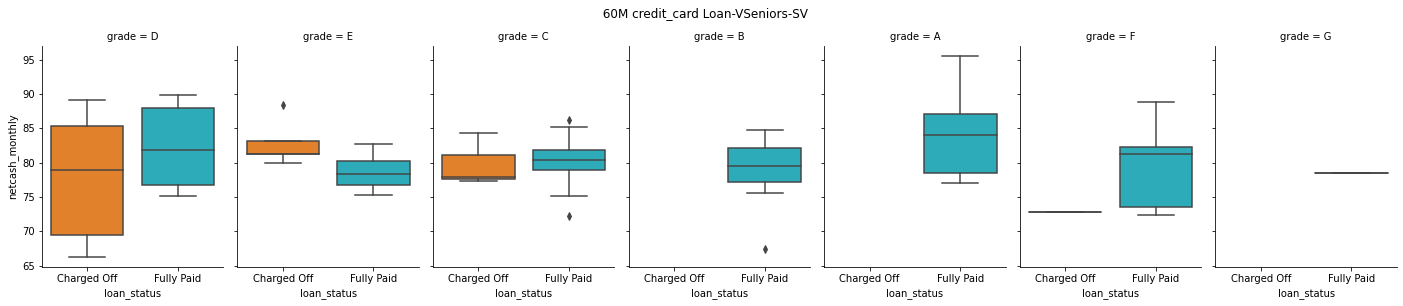

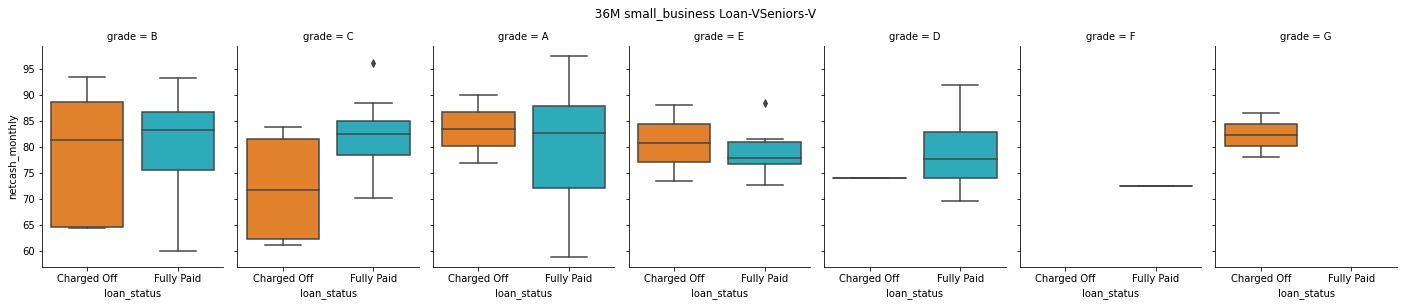

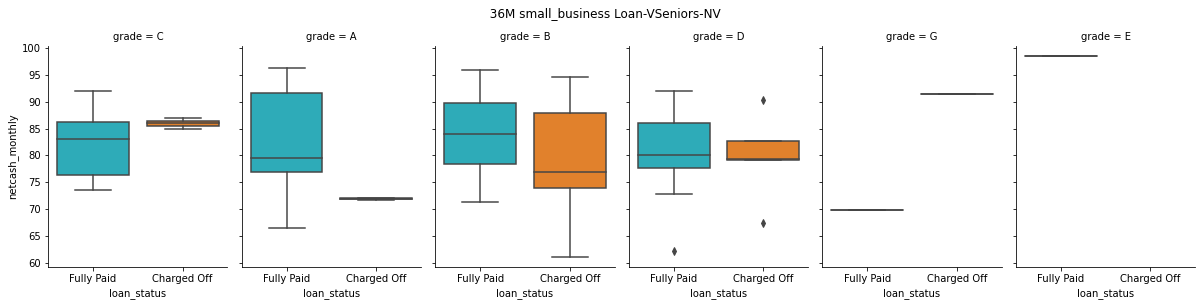

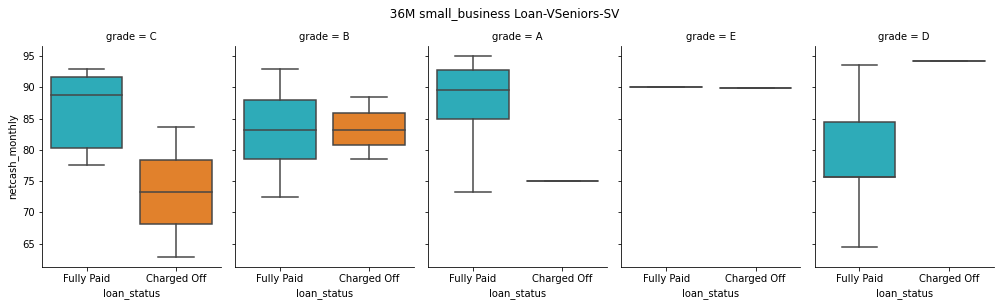

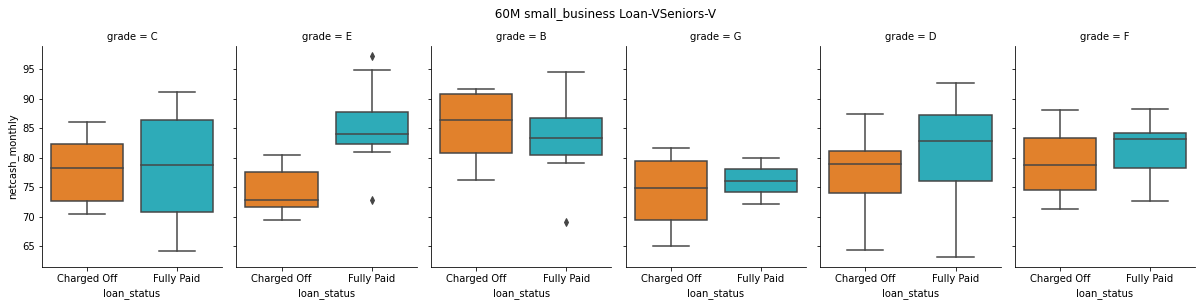

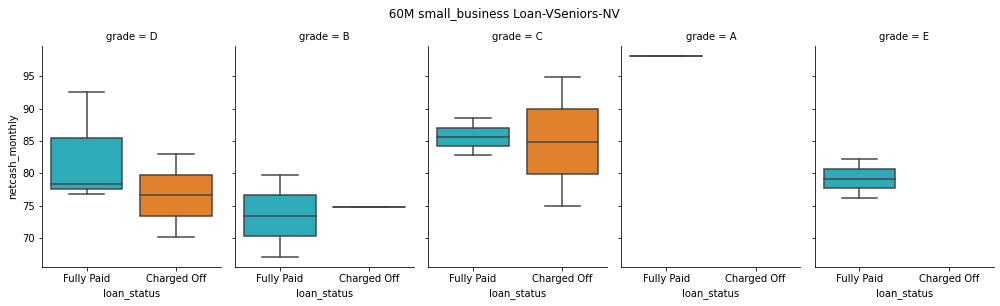

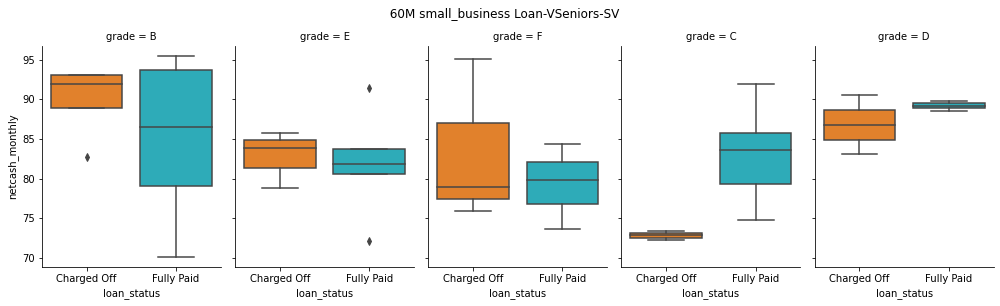

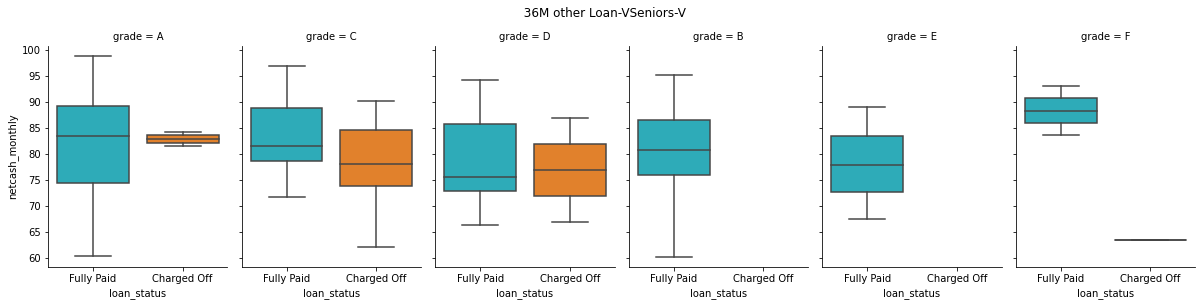

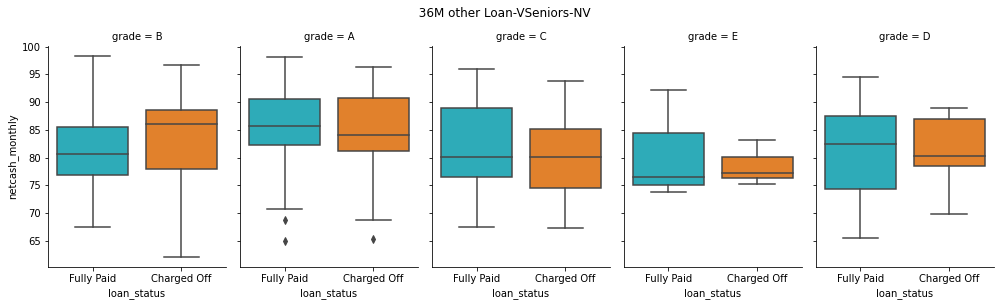

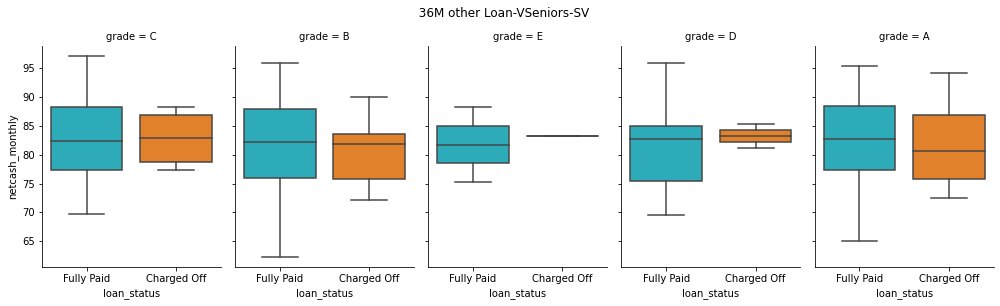

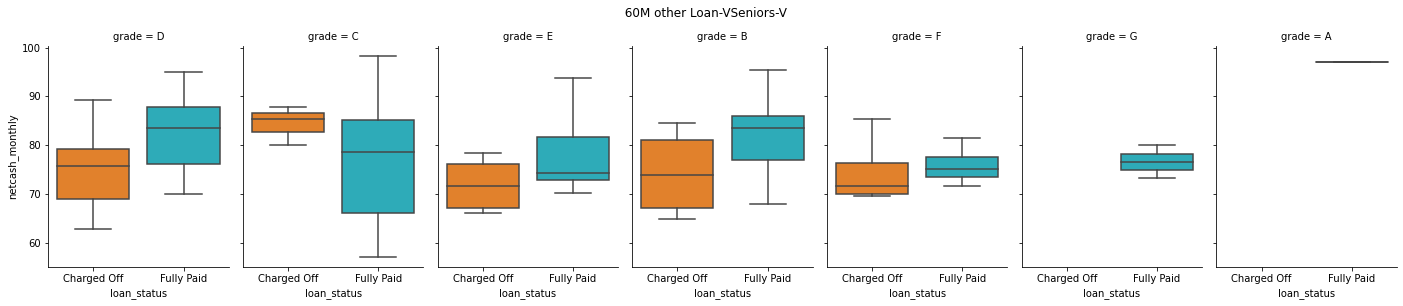

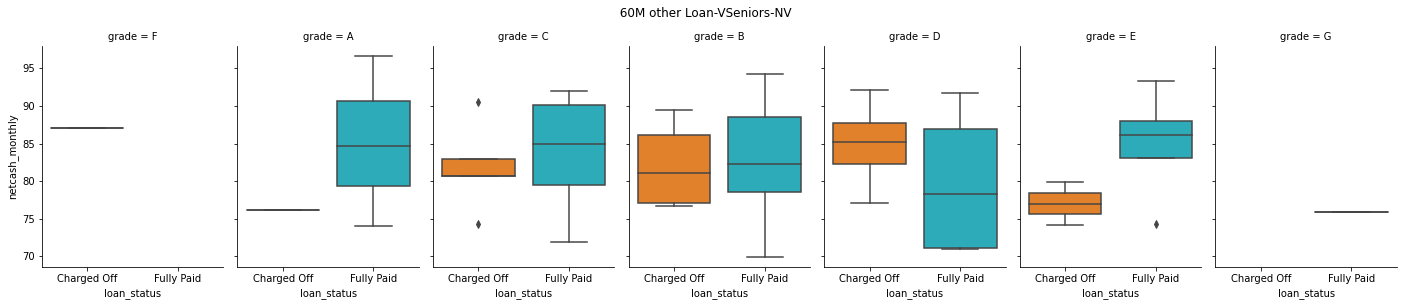

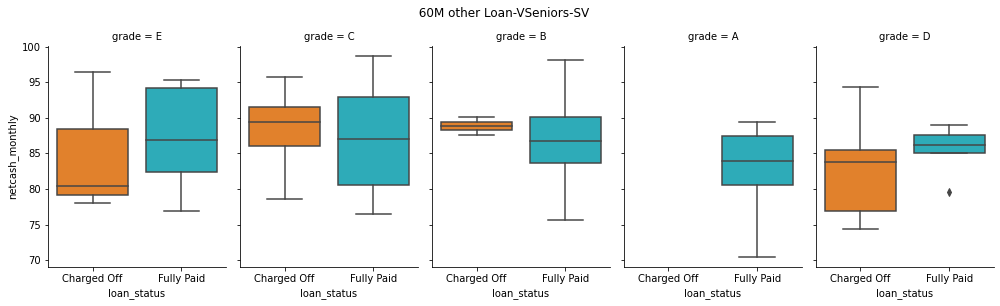

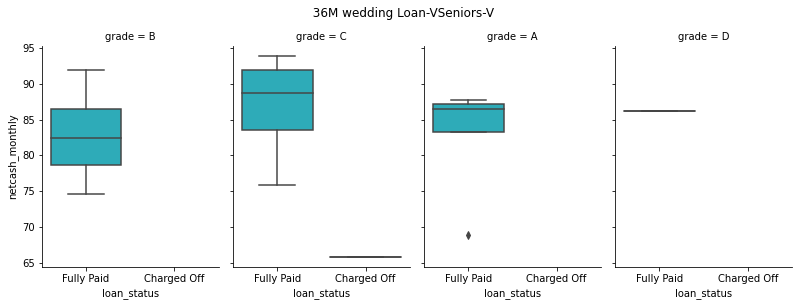

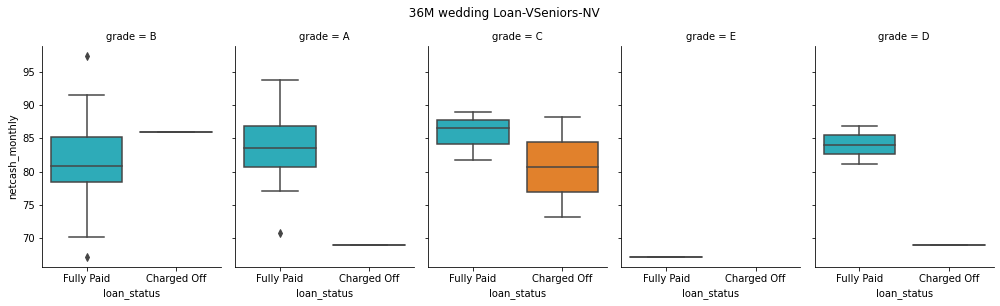

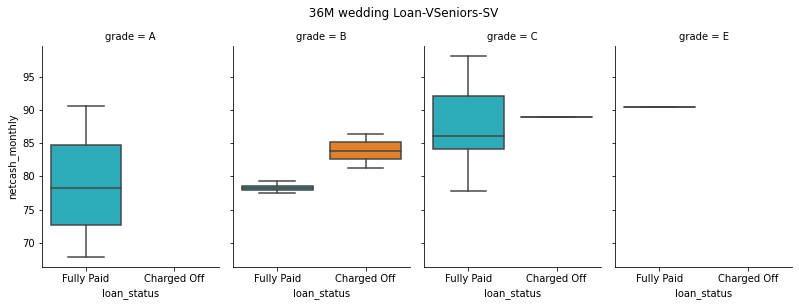

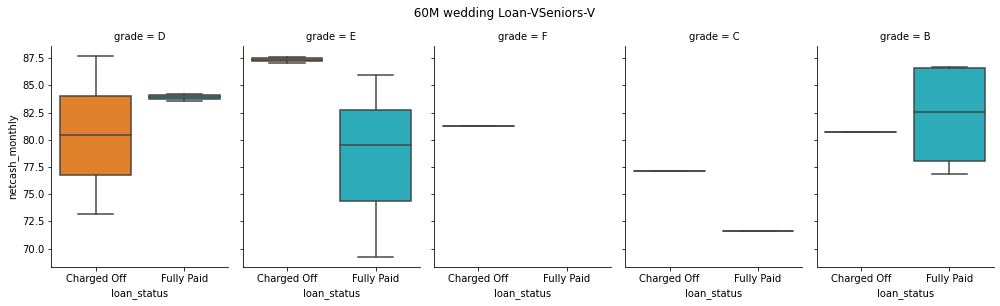

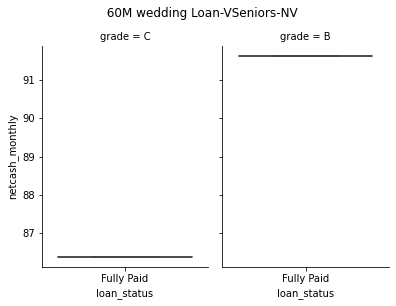

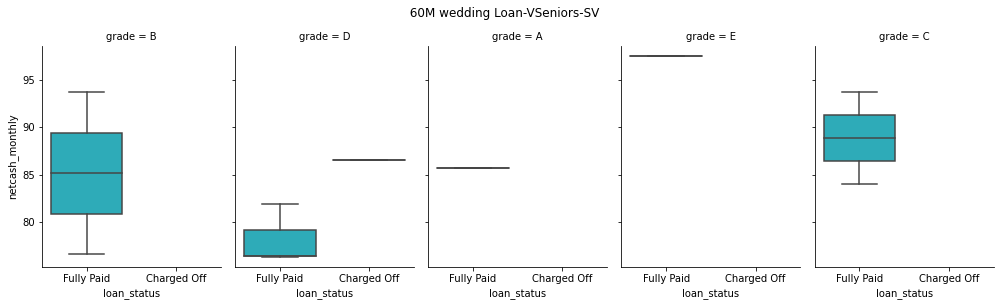

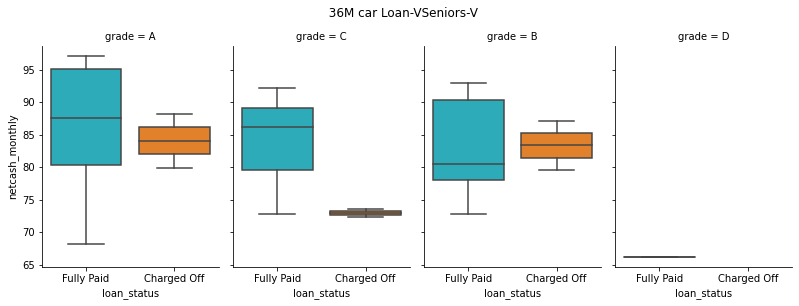

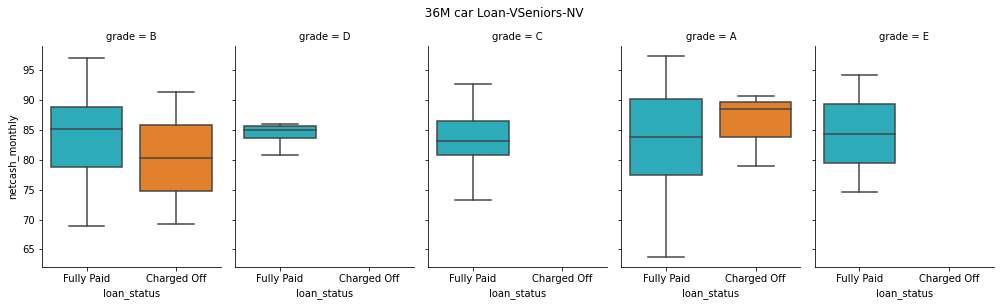

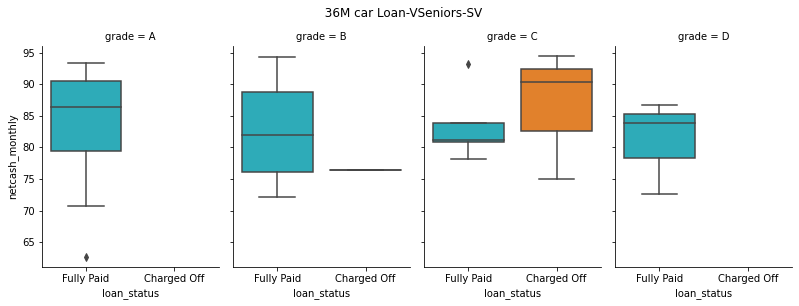

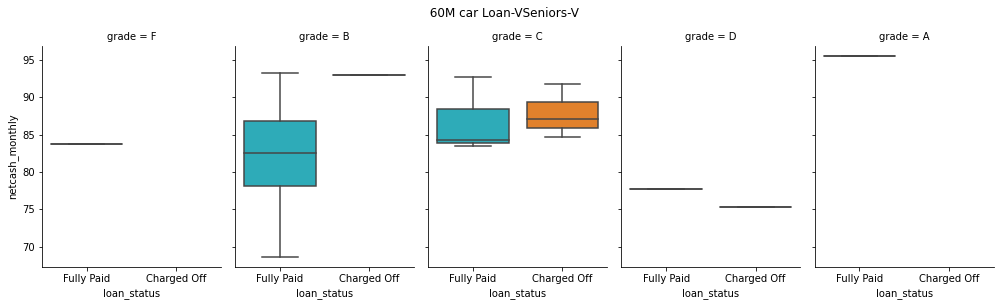

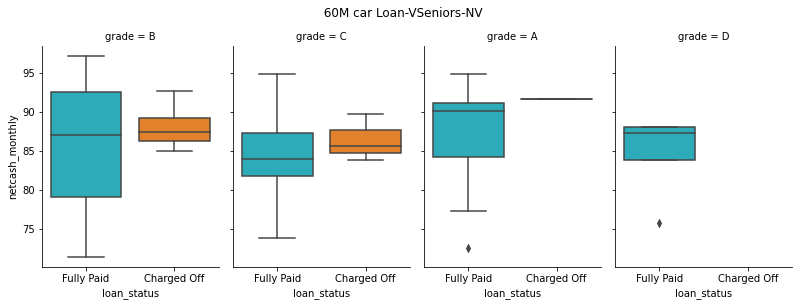

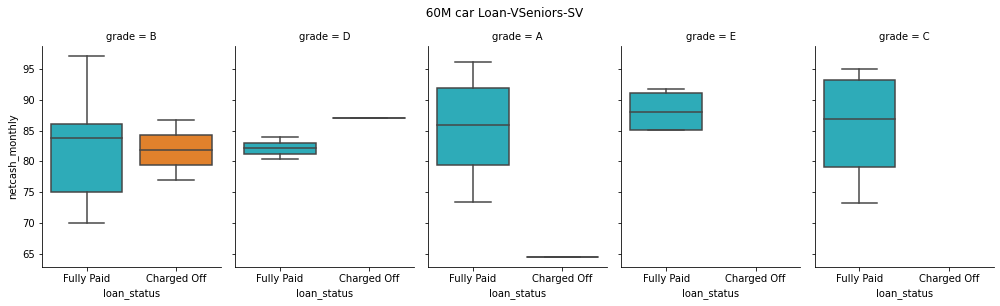

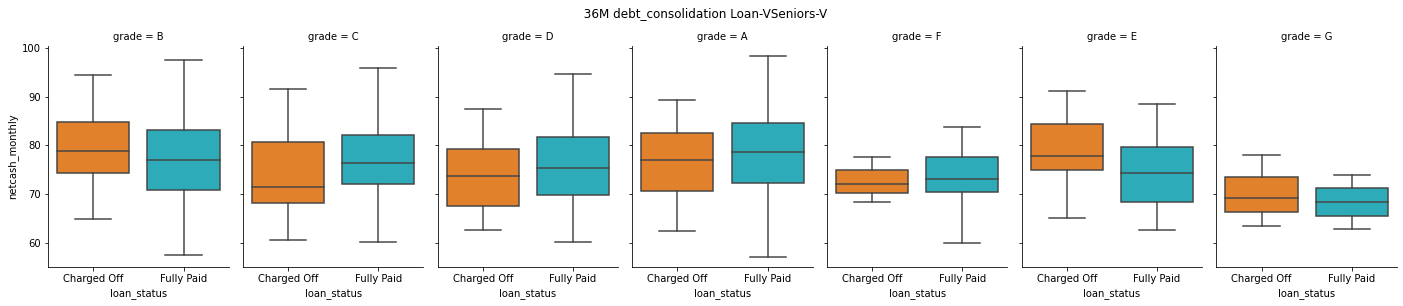

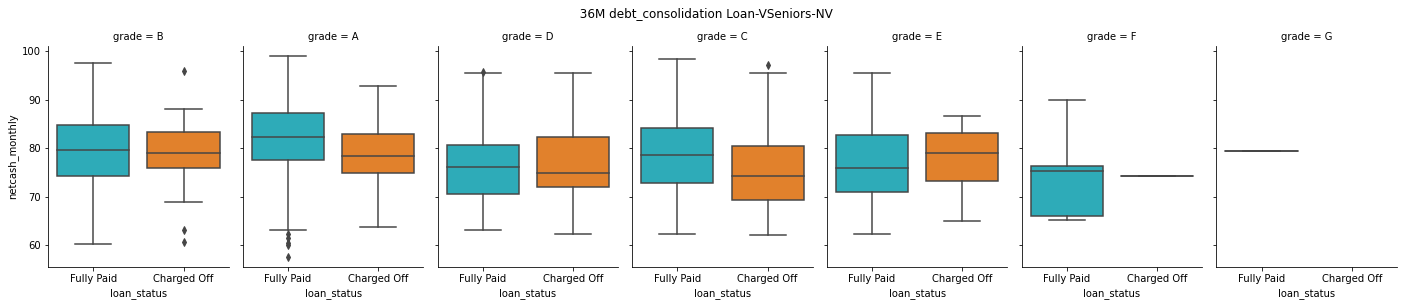

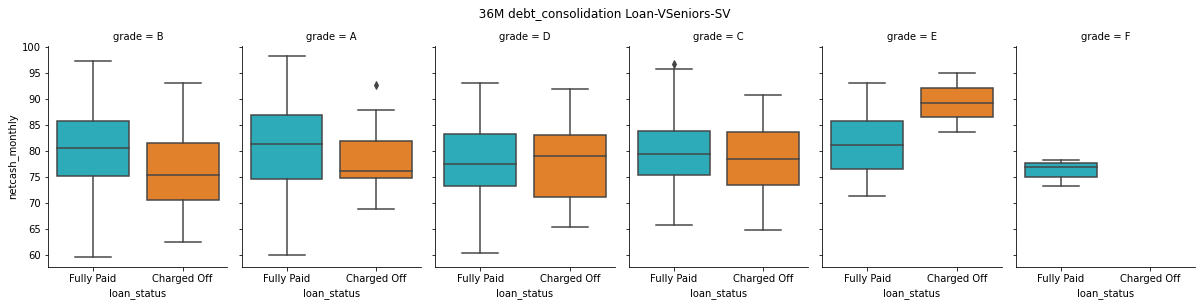

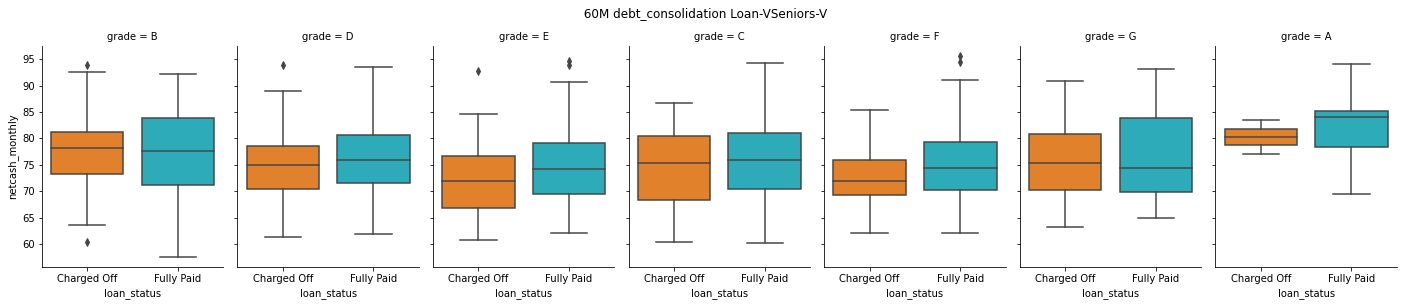

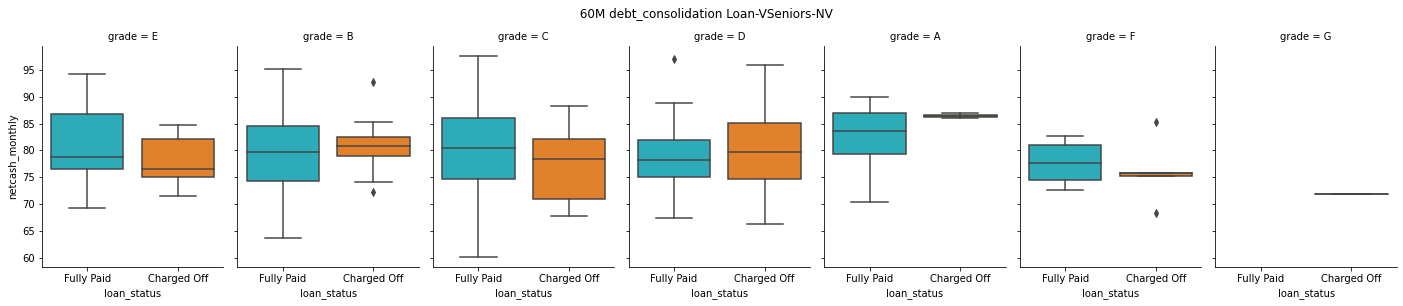

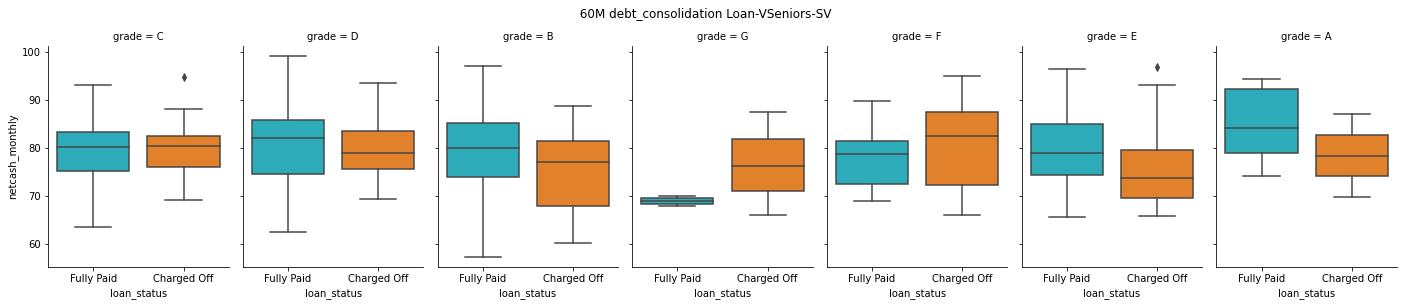

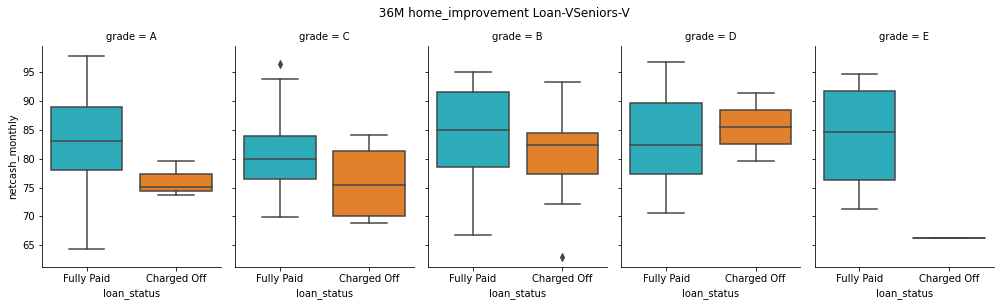

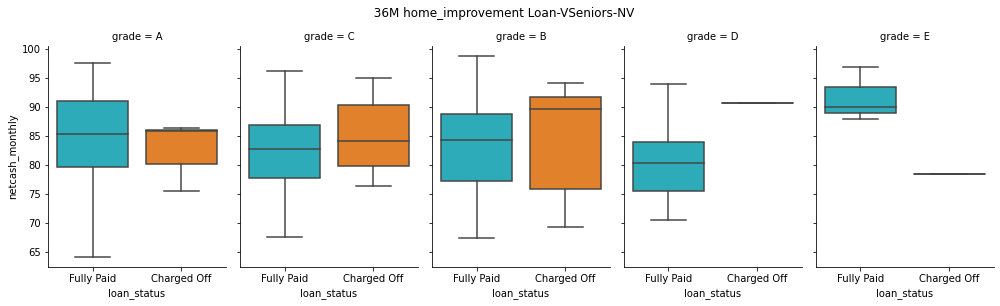

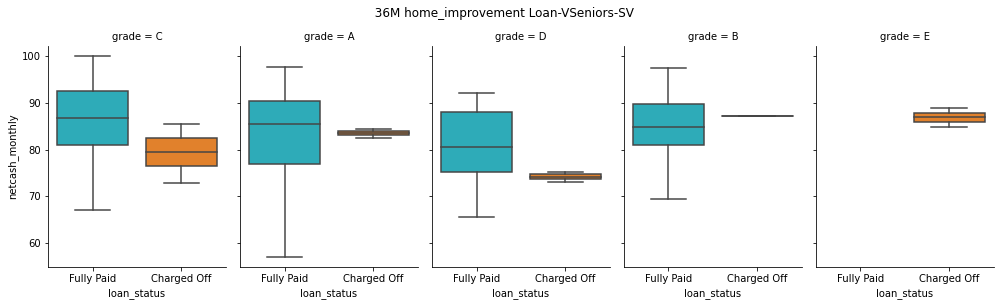

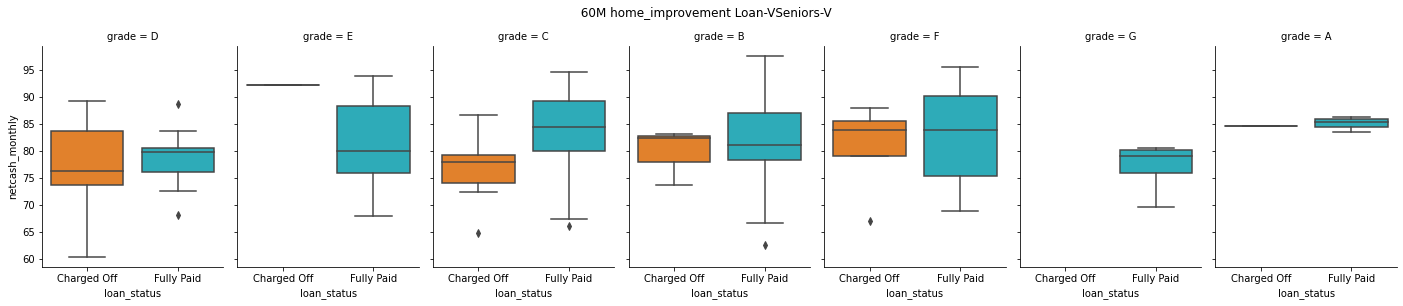

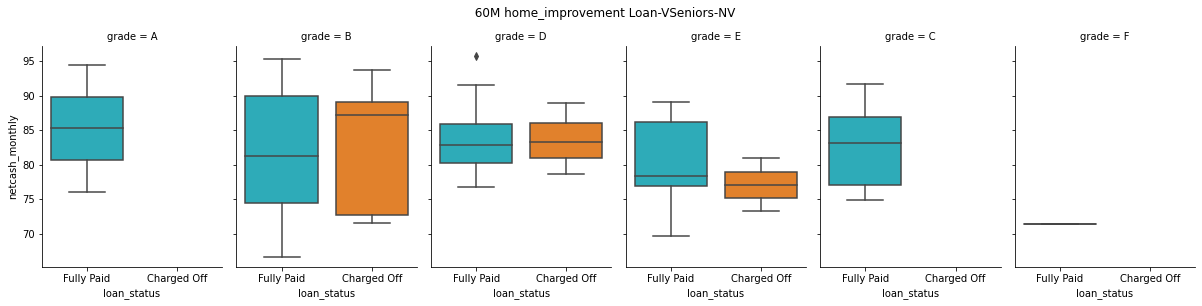

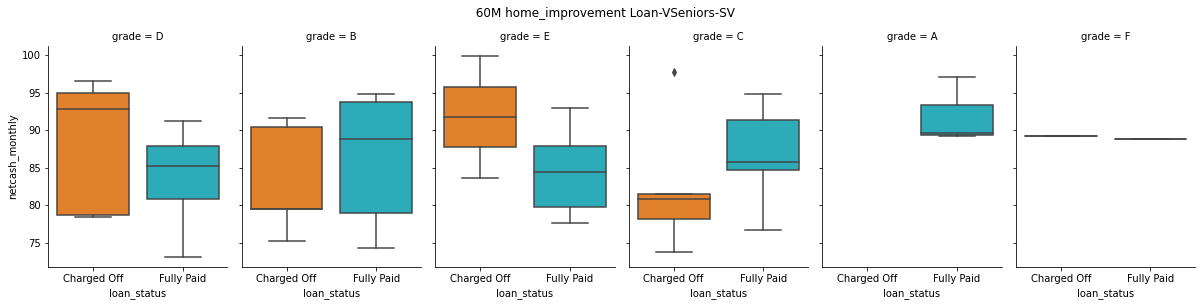

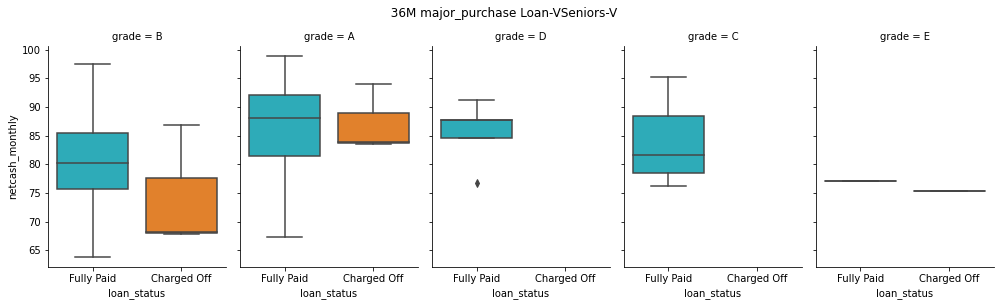

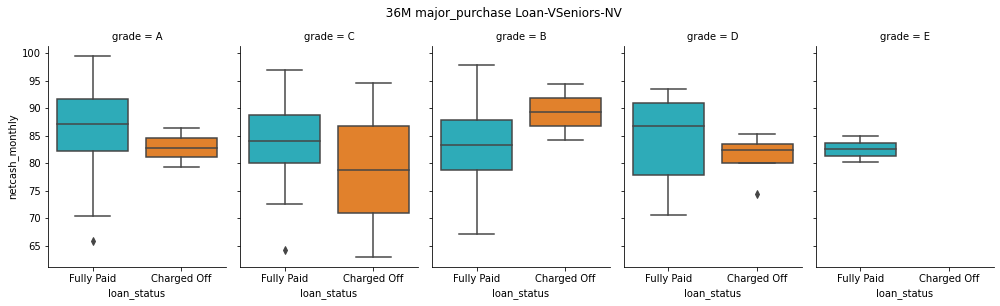

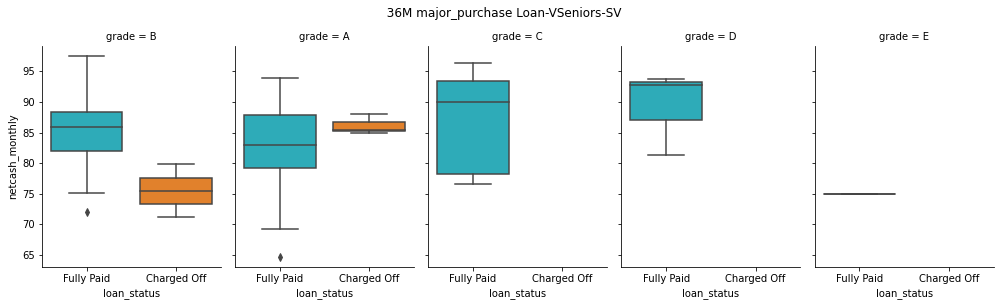

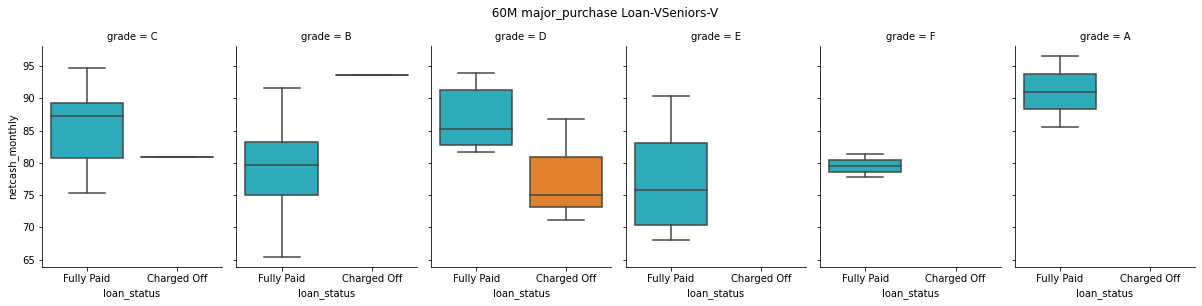

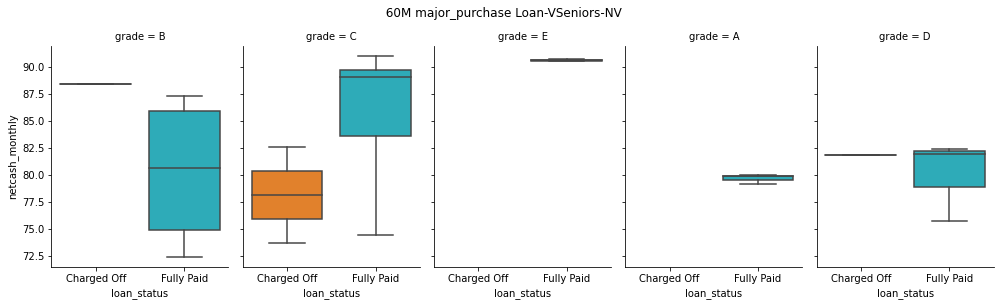

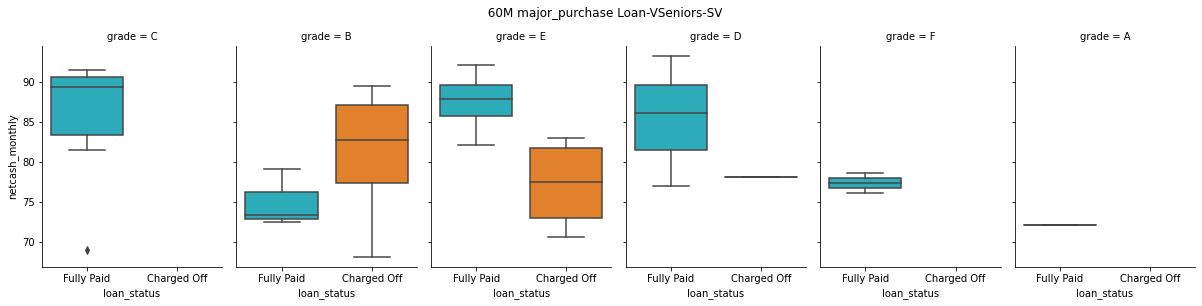

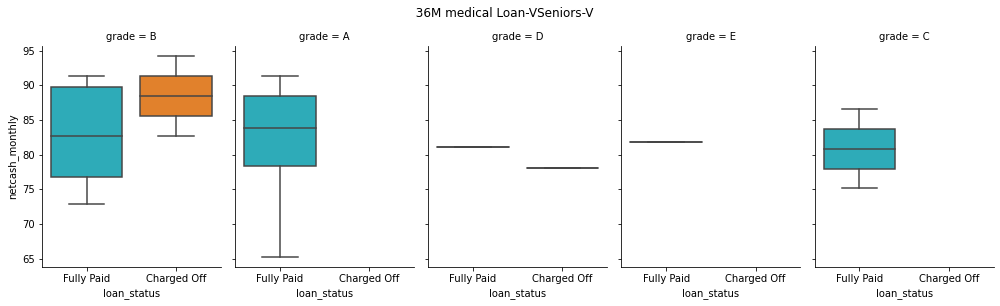

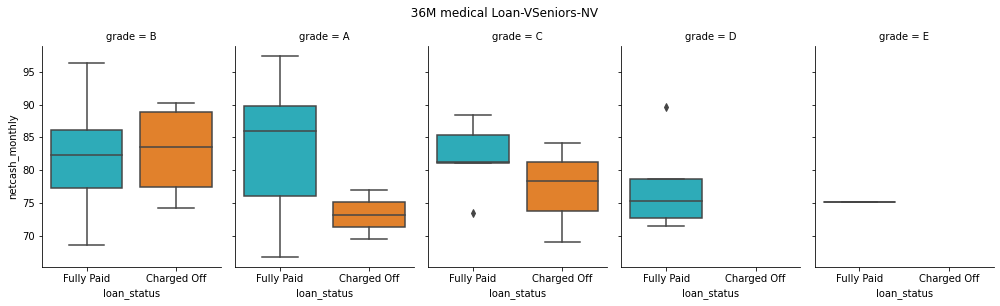

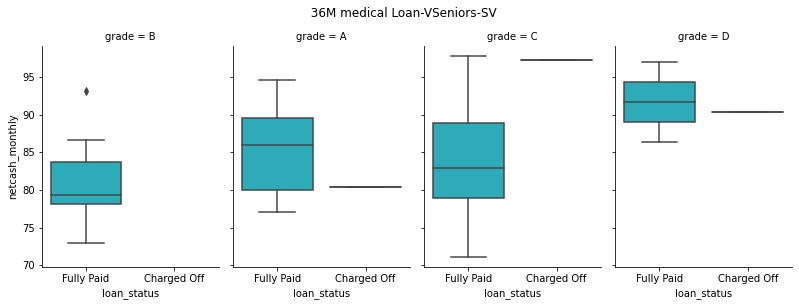

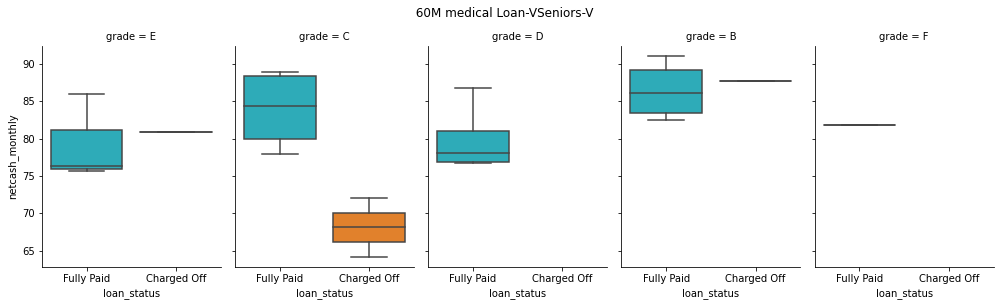

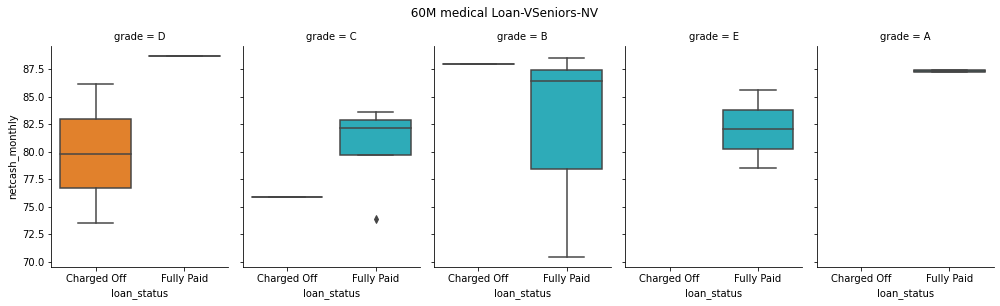

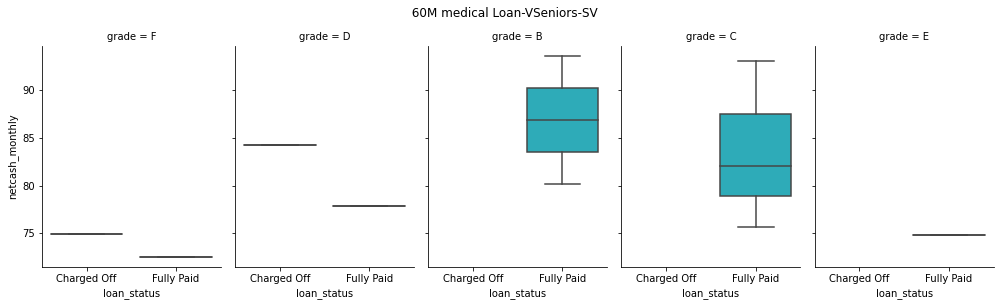

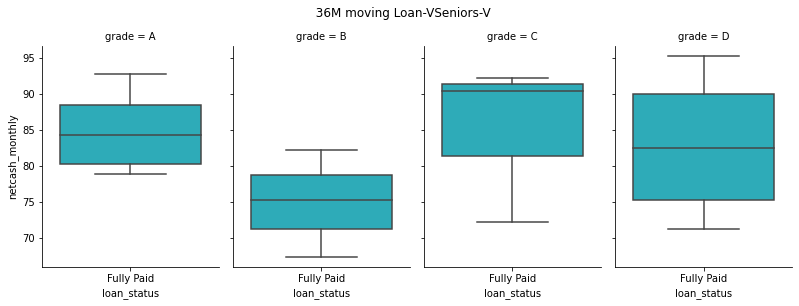

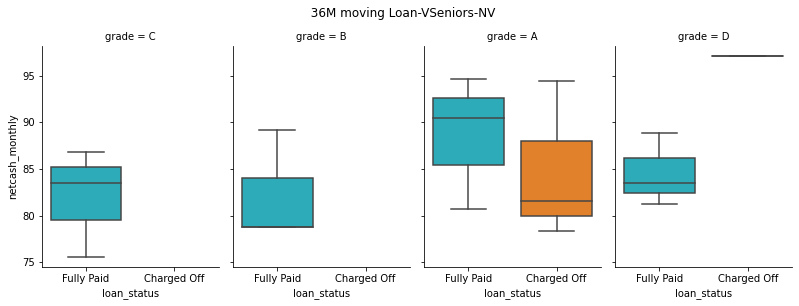

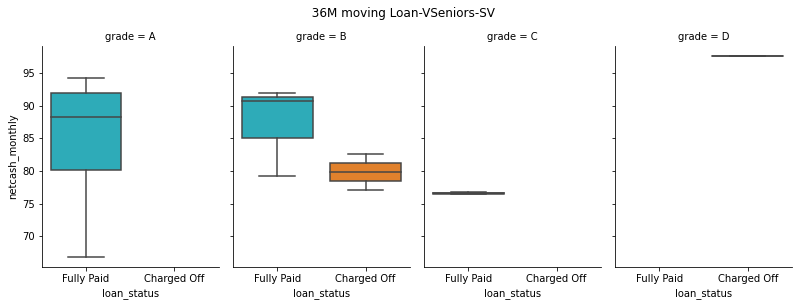

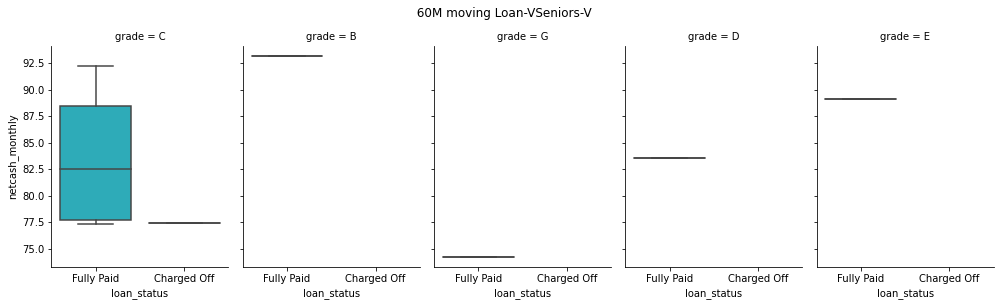

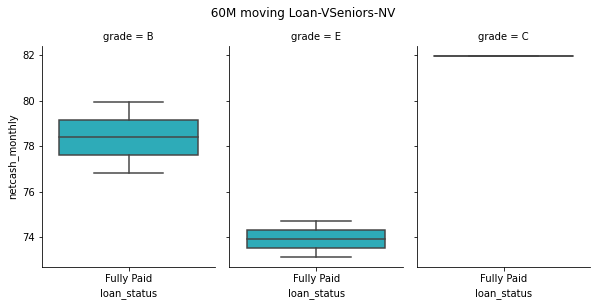

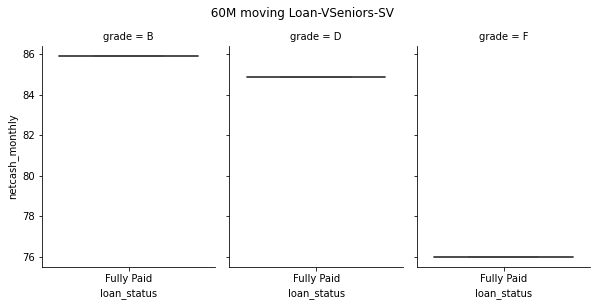

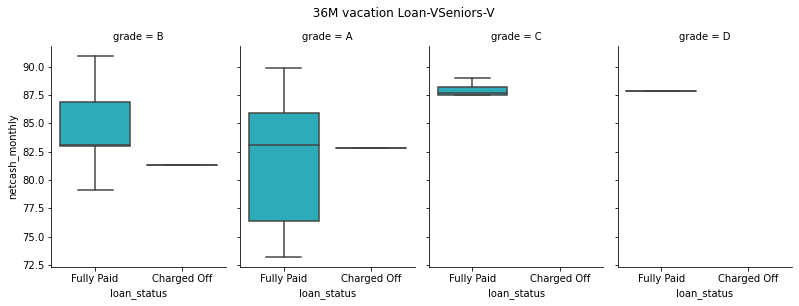

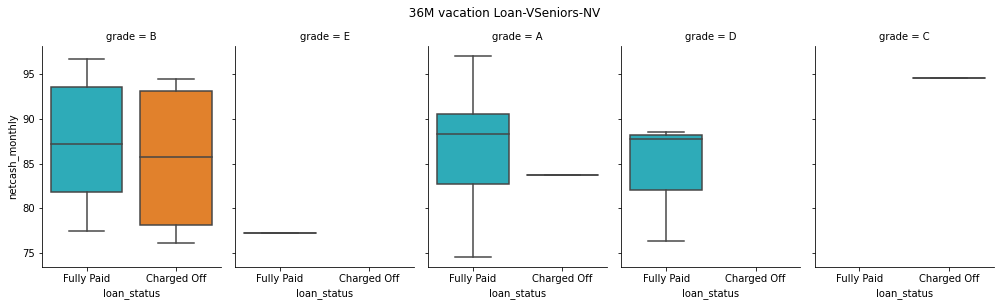

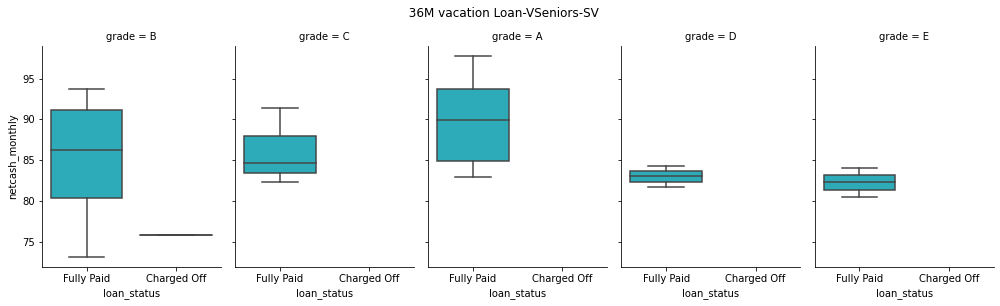

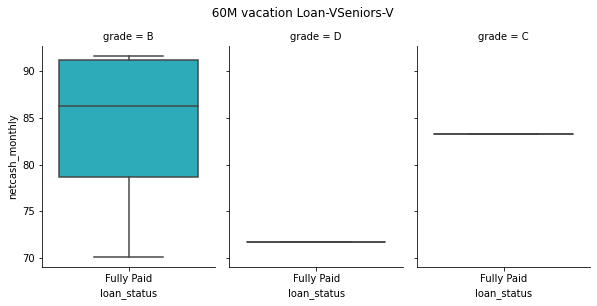

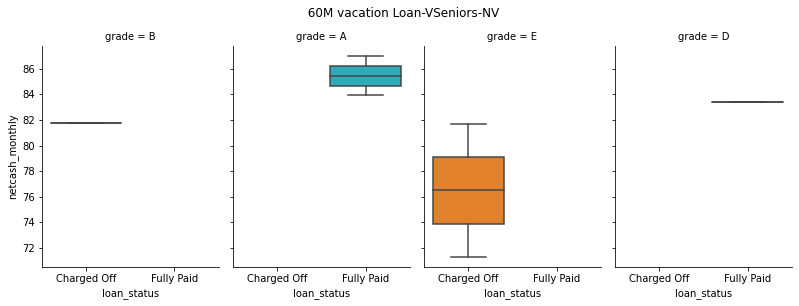

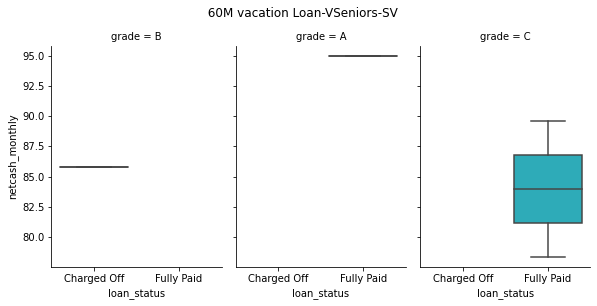

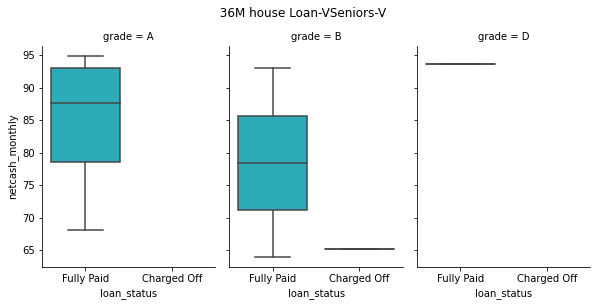

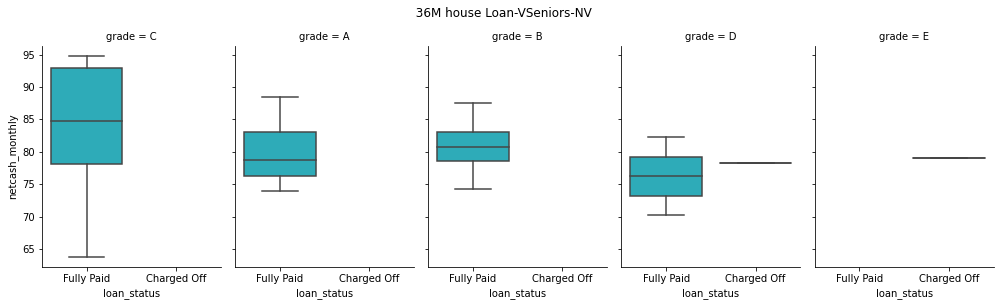

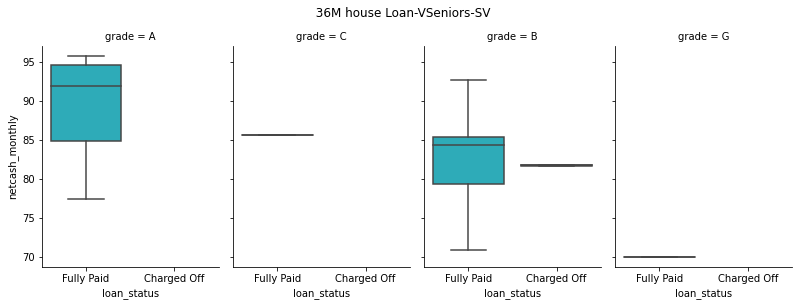

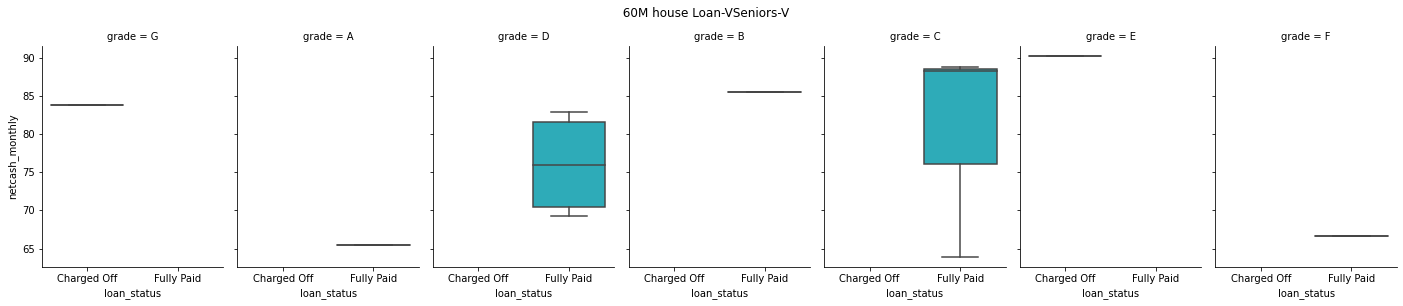

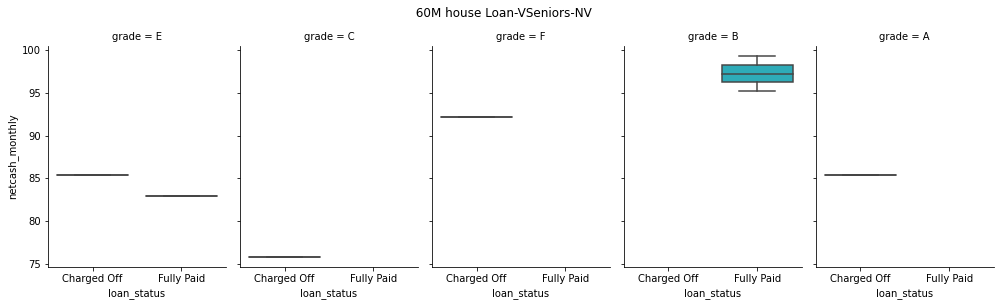

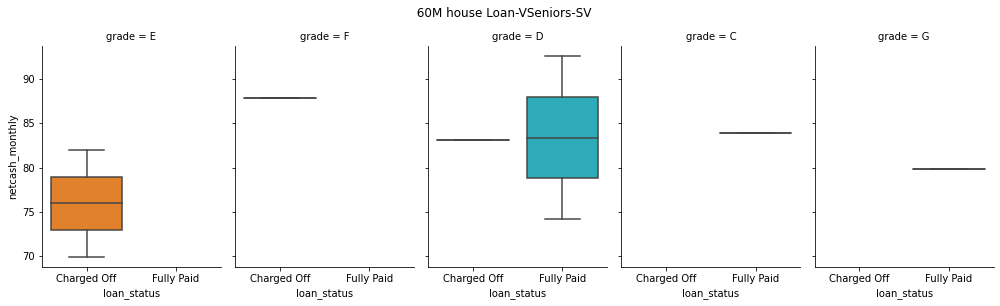

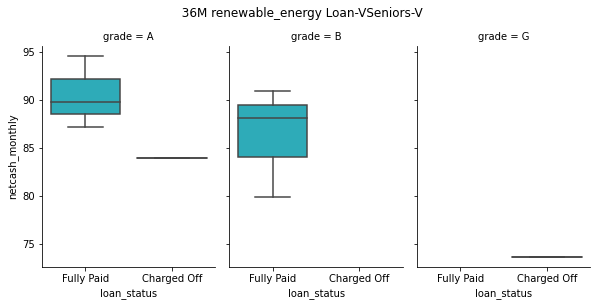

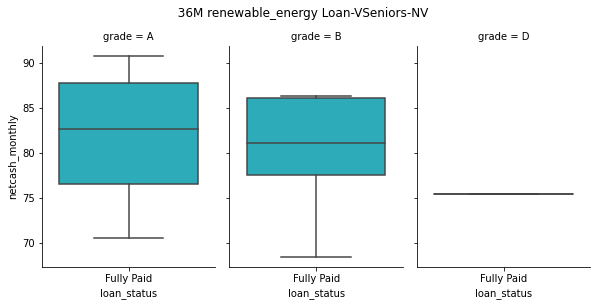

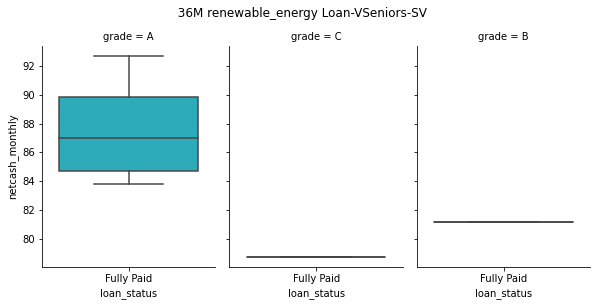

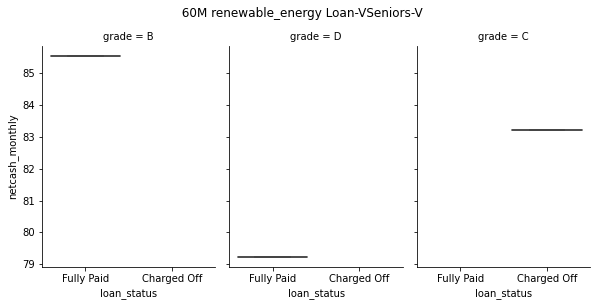

In [880]:
v151 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v151.fig.suptitle("  36M credit_card Loan-VSeniors-V",y=1.05)
v152=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v152.fig.suptitle("  36M credit_card Loan-VSeniors-NV",y=1.05)

v153=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36cc_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v153.fig.suptitle("  36M credit_card Loan-VSeniors-SV",y=1.05)
v154=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v154.fig.suptitle("  60M credit_card Loan-VSeniors-V",y=1.05)

v155=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v155.fig.suptitle("  60M credit_card Loan-VSeniors-NV",y=1.05)
v156=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60cc_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v156.fig.suptitle("  60M credit_card Loan-VSeniors-SV",y=1.05)

v161 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v161.fig.suptitle("  36M small_business Loan-VSeniors-V",y=1.05)
v162=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v162.fig.suptitle("  36M small_business Loan-VSeniors-NV",y=1.05)

v163=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36sb_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v163.fig.suptitle("  36M small_business Loan-VSeniors-SV",y=1.05)
v164=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v164.fig.suptitle("  60M small_business Loan-VSeniors-V",y=1.05)

v165=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v165.fig.suptitle("  60M small_business Loan-VSeniors-NV",y=1.05)
v166=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60sb_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v166.fig.suptitle("  60M small_business Loan-VSeniors-SV",y=1.05)

v171 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v171.fig.suptitle("  36M other Loan-VSeniors-V",y=1.05)
v172=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v172.fig.suptitle("  36M other Loan-VSeniors-NV",y=1.05)

v173=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36oth_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v173.fig.suptitle("  36M other Loan-VSeniors-SV",y=1.05)
v174=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v174.fig.suptitle("  60M other Loan-VSeniors-V",y=1.05)

v175=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v175.fig.suptitle("  60M other Loan-VSeniors-NV",y=1.05)
v176=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60oth_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v176.fig.suptitle("  60M other Loan-VSeniors-SV",y=1.05)

v181 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v181.fig.suptitle("  36M wedding Loan-VSeniors-V",y=1.05)
v182=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v182.fig.suptitle("  36M wedding Loan-VSeniors-NV",y=1.05)

v183=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36wd_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v183.fig.suptitle("  36M wedding Loan-VSeniors-SV",y=1.05)
v184=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v184.fig.suptitle("  60M wedding Loan-VSeniors-V",y=1.05)

v185=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v185.fig.suptitle("  60M wedding Loan-VSeniors-NV",y=1.05)
v186=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60wd_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v186.fig.suptitle("  60M wedding Loan-VSeniors-SV",y=1.05)

v191 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v191.fig.suptitle("  36M car Loan-VSeniors-V",y=1.05)
v192=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v192.fig.suptitle("  36M car Loan-VSeniors-NV",y=1.05)

v193=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36car_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v193.fig.suptitle("  36M car Loan-VSeniors-SV",y=1.05)
v194=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v194.fig.suptitle("  60M car Loan-VSeniors-V",y=1.05)

v195=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v195.fig.suptitle("  60M car Loan-VSeniors-NV",y=1.05)
v196=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60car_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v196.fig.suptitle("  60M car Loan-VSeniors-SV",y=1.05)

v201 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v201.fig.suptitle("  36M debt_consolidation Loan-VSeniors-V",y=1.05)
v202=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v202.fig.suptitle("  36M debt_consolidation Loan-VSeniors-NV",y=1.05)

v203=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36dc_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v203.fig.suptitle("  36M debt_consolidation Loan-VSeniors-SV",y=1.05)
v204=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v204.fig.suptitle("  60M debt_consolidation Loan-VSeniors-V",y=1.05)

v205=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v205.fig.suptitle("  60M debt_consolidation Loan-VSeniors-NV",y=1.05)
v206=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60dc_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v206.fig.suptitle("  60M debt_consolidation Loan-VSeniors-SV",y=1.05)

v211 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v211.fig.suptitle("  36M home_improvement Loan-VSeniors-V",y=1.05)
v212=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v212.fig.suptitle("  36M home_improvement Loan-VSeniors-NV",y=1.05)

v213=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hi_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v213.fig.suptitle("  36M home_improvement Loan-VSeniors-SV",y=1.05)
v214=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v214.fig.suptitle("  60M home_improvement Loan-VSeniors-V",y=1.05)

v215=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v215.fig.suptitle("  60M home_improvement Loan-VSeniors-NV",y=1.05)
v216=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hi_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v216.fig.suptitle("  60M home_improvement Loan-VSeniors-SV",y=1.05)

v221 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v221.fig.suptitle("  36M major_purchase Loan-VSeniors-V",y=1.05)
v222=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v222.fig.suptitle("  36M major_purchase Loan-VSeniors-NV",y=1.05)

v223=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mp_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v223.fig.suptitle("  36M major_purchase Loan-VSeniors-SV",y=1.05)
v224=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v224.fig.suptitle("  60M major_purchase Loan-VSeniors-V",y=1.05)

v225=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v225.fig.suptitle("  60M major_purchase Loan-VSeniors-NV",y=1.05)
v226=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mp_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v226.fig.suptitle("  60M major_purchase Loan-VSeniors-SV",y=1.05)

v231 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v231.fig.suptitle("  36M medical Loan-VSeniors-V",y=1.05)
v232=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v232.fig.suptitle("  36M medical Loan-VSeniors-NV",y=1.05)

v233=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36med_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v233.fig.suptitle("  36M medical Loan-VSeniors-SV",y=1.05)
v234=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v234.fig.suptitle("  60M medical Loan-VSeniors-V",y=1.05)

v235=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v235.fig.suptitle("  60M medical Loan-VSeniors-NV",y=1.05)
v236=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60med_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v236.fig.suptitle("  60M medical Loan-VSeniors-SV",y=1.05)

v241 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v241.fig.suptitle("  36M moving Loan-VSeniors-V",y=1.05)
v242=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v242.fig.suptitle("  36M moving Loan-VSeniors-NV",y=1.05)

v243=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36mov_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v243.fig.suptitle("  36M moving Loan-VSeniors-SV",y=1.05)
v244=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v244.fig.suptitle("  60M moving Loan-VSeniors-V",y=1.05)

v245=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v245.fig.suptitle("  60M moving Loan-VSeniors-NV",y=1.05)
v246=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60mov_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v246.fig.suptitle("  60M moving Loan-VSeniors-SV",y=1.05)

v251 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v251.fig.suptitle("  36M vacation Loan-VSeniors-V",y=1.05)
v252=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v252.fig.suptitle("  36M vacation Loan-VSeniors-NV",y=1.05)

v253=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36vac_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v253.fig.suptitle("  36M vacation Loan-VSeniors-SV",y=1.05)
v254=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v254.fig.suptitle("  60M vacation Loan-VSeniors-V",y=1.05)

v255=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v255.fig.suptitle("  60M vacation Loan-VSeniors-NV",y=1.05)
v256=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60vac_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v256.fig.suptitle("  60M vacation Loan-VSeniors-SV",y=1.05)

v261 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v261.fig.suptitle("  36M house Loan-VSeniors-V",y=1.05)
v262=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v262.fig.suptitle("  36M house Loan-VSeniors-NV",y=1.05)

v263=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36hou_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v263.fig.suptitle("  36M house Loan-VSeniors-SV",y=1.05)
v264=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v264.fig.suptitle("  60M house Loan-VSeniors-V",y=1.05)

v265=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v265.fig.suptitle("  60M house Loan-VSeniors-NV",y=1.05)
v266=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60hou_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v266.fig.suptitle("  60M house Loan-VSeniors-SV",y=1.05)

v271 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v271.fig.suptitle("  36M renewable_energy Loan-VSeniors-V",y=1.05)
v272=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v272.fig.suptitle("  36M renewable_energy Loan-VSeniors-NV",y=1.05)

v273=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36re_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v273.fig.suptitle("  36M renewable_energy Loan-VSeniors-SV",y=1.05)
v274=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v274.fig.suptitle("  60M renewable_energy Loan-VSeniors-V",y=1.05)

v275=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v275.fig.suptitle("  60M renewable_energy Loan-VSeniors-NV",y=1.05)
v276=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60re_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v276.fig.suptitle("  60M renewable_energy Loan-VSeniors-SV",y=1.05)

v281 = sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v281.fig.suptitle("  36M educational Loan-VSeniors-V",y=1.05)
v282=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v282.fig.suptitle("  36M educational Loan-VSeniors-NV",y=1.05)

v283=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan36edu_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v283.fig.suptitle("  36M educational Loan-VSeniors-SV",y=1.05)
v284=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_vsenv, kind="box",height=4, aspect=.7,palette=palette)
v284.fig.suptitle("  60M educational Loan-VSeniors-V",y=1.05)

v285=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_vsennv, kind="box",height=4, aspect=.7,palette=palette)
v285.fig.suptitle("  60M educational Loan-VSeniors-NV",y=1.05)
v286=sbn.catplot(x="loan_status", y="netcash_monthly", col="grade",data=loan60edu_vsensv, kind="box",height=4, aspect=.7,palette=palette)
v286.fig.suptitle("  60M educational Loan-VSeniors-SV",y=1.05)


In [888]:
#loanNcur.shape
loanNcur[loanNcur["loan_status"]=="Charged Off"].shape

(5399, 42)

In [898]:
#loands.shape
loands[(loands["purpose"]=="debt_consolidation")&(loands["loan_status"]=="Charged Off")].shape
loands[(loands["loan_status"]=="Charged Off")].shape

(5627, 113)